Assignment 1:

Question 1:

A.    The data has 120 classes (120 dog breeds) ,10222 train sample images and 10357 test sample images

B.     Each data sample image we insert needs to be 224x224 image with 3 RGB channels.so we need to preprocess the data before using it by resizing the images to the wanted size.

C.    Partly balanced, the number of samples per class varied from 60 to 130.
D.    No


Question 2:

A.    VGG19, without the weights of image-net, we used randomized weights instead due to inability to import it to the jupyter notenook (we tried to look for a solution but the results with the imported image-net database made the results worse)

C.    
- simply resizing the image at preprocessing might negatively impact the accuracy. Padding the images might improve the results.
- freezing the weights of the first 15 layers so that they remain intact throughout the fine-tuning process.
-  Applying the stochastic gradient descent optimizer to minimize the cross entropy loss .
D.    We chose to try to modify the model to get better results


Question 3:

D.    The classic ML algorithm we chose is SVM.    
    

Question 4:

The dataset we chose to work with is the Dog Breed Identification datasets. The dataset includes 120 dog breeds and about 20000 samples. The dataset is partly balanced as the range of samples per breed is 60-120. Each sample had to be resized in order to fit for processing.

The model we chose was VGG19 with changing the last layer of the network to dense and flatten correspond to the task at hand The model has trained and achieved the loss of 0.3% and accuarcy of 94% by the 70th epoch. We wanted to improve this by 3 methods and decided to implement 2 of them. 
We Chose to run the models for 70 epochs for each model.

First, we froze the weights of the 15 first layers of the network. This change did not yield any improvements and even yielded much worse results, the acccuarcy severly dropped and the loss rose to 15.9%. This change may work better with the weights from image-net.
The other method was to change the 'adam' optimizer to the stochastic gradient descent optimizer, this changed didnt work out really well for 70 epochs. but during its run there was an improvement that with improving the gradient parameters and letting it run for more epochs might result in better results. (maybe better than the 'adam' optimizer)
The changes are minor for 70 epochs but if we run each model for more time the improvements will yield better results.

To see how the model compares with different approaches, we use the predictions of the last lair as features with the SVM machine learning algorithm. we took out the last layers - layer 22: flatten ant took its outputs as features for the SVM algorithm. we tried to fit SVM with the small batch. The module failed to get significant results, probably due to a small batch of samples. 
SVM is also more likely to struggle with datasets where the number of features is much larger than the number of observations. So most likely our module would not hanlde it well as the dataset was not large and diverse enough to properly train the module.
* NOTE: The performance of each module is heavily impacted by our hardware constraints.We tried to get a large batch of samples to run on SVM but we kept getting the same error 'ResourceExhaustedError'. The biggest batch we could get is 140 samples.


In [2]:
import numpy as np
import pandas as pd 
import keras
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers
from random import randint
import matplotlib.pyplot as plt
import cv2
import PIL

import os
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
df_train = pd.read_csv('../input/labels.csv')
df_test = pd.read_csv('../input/sample_submission.csv')

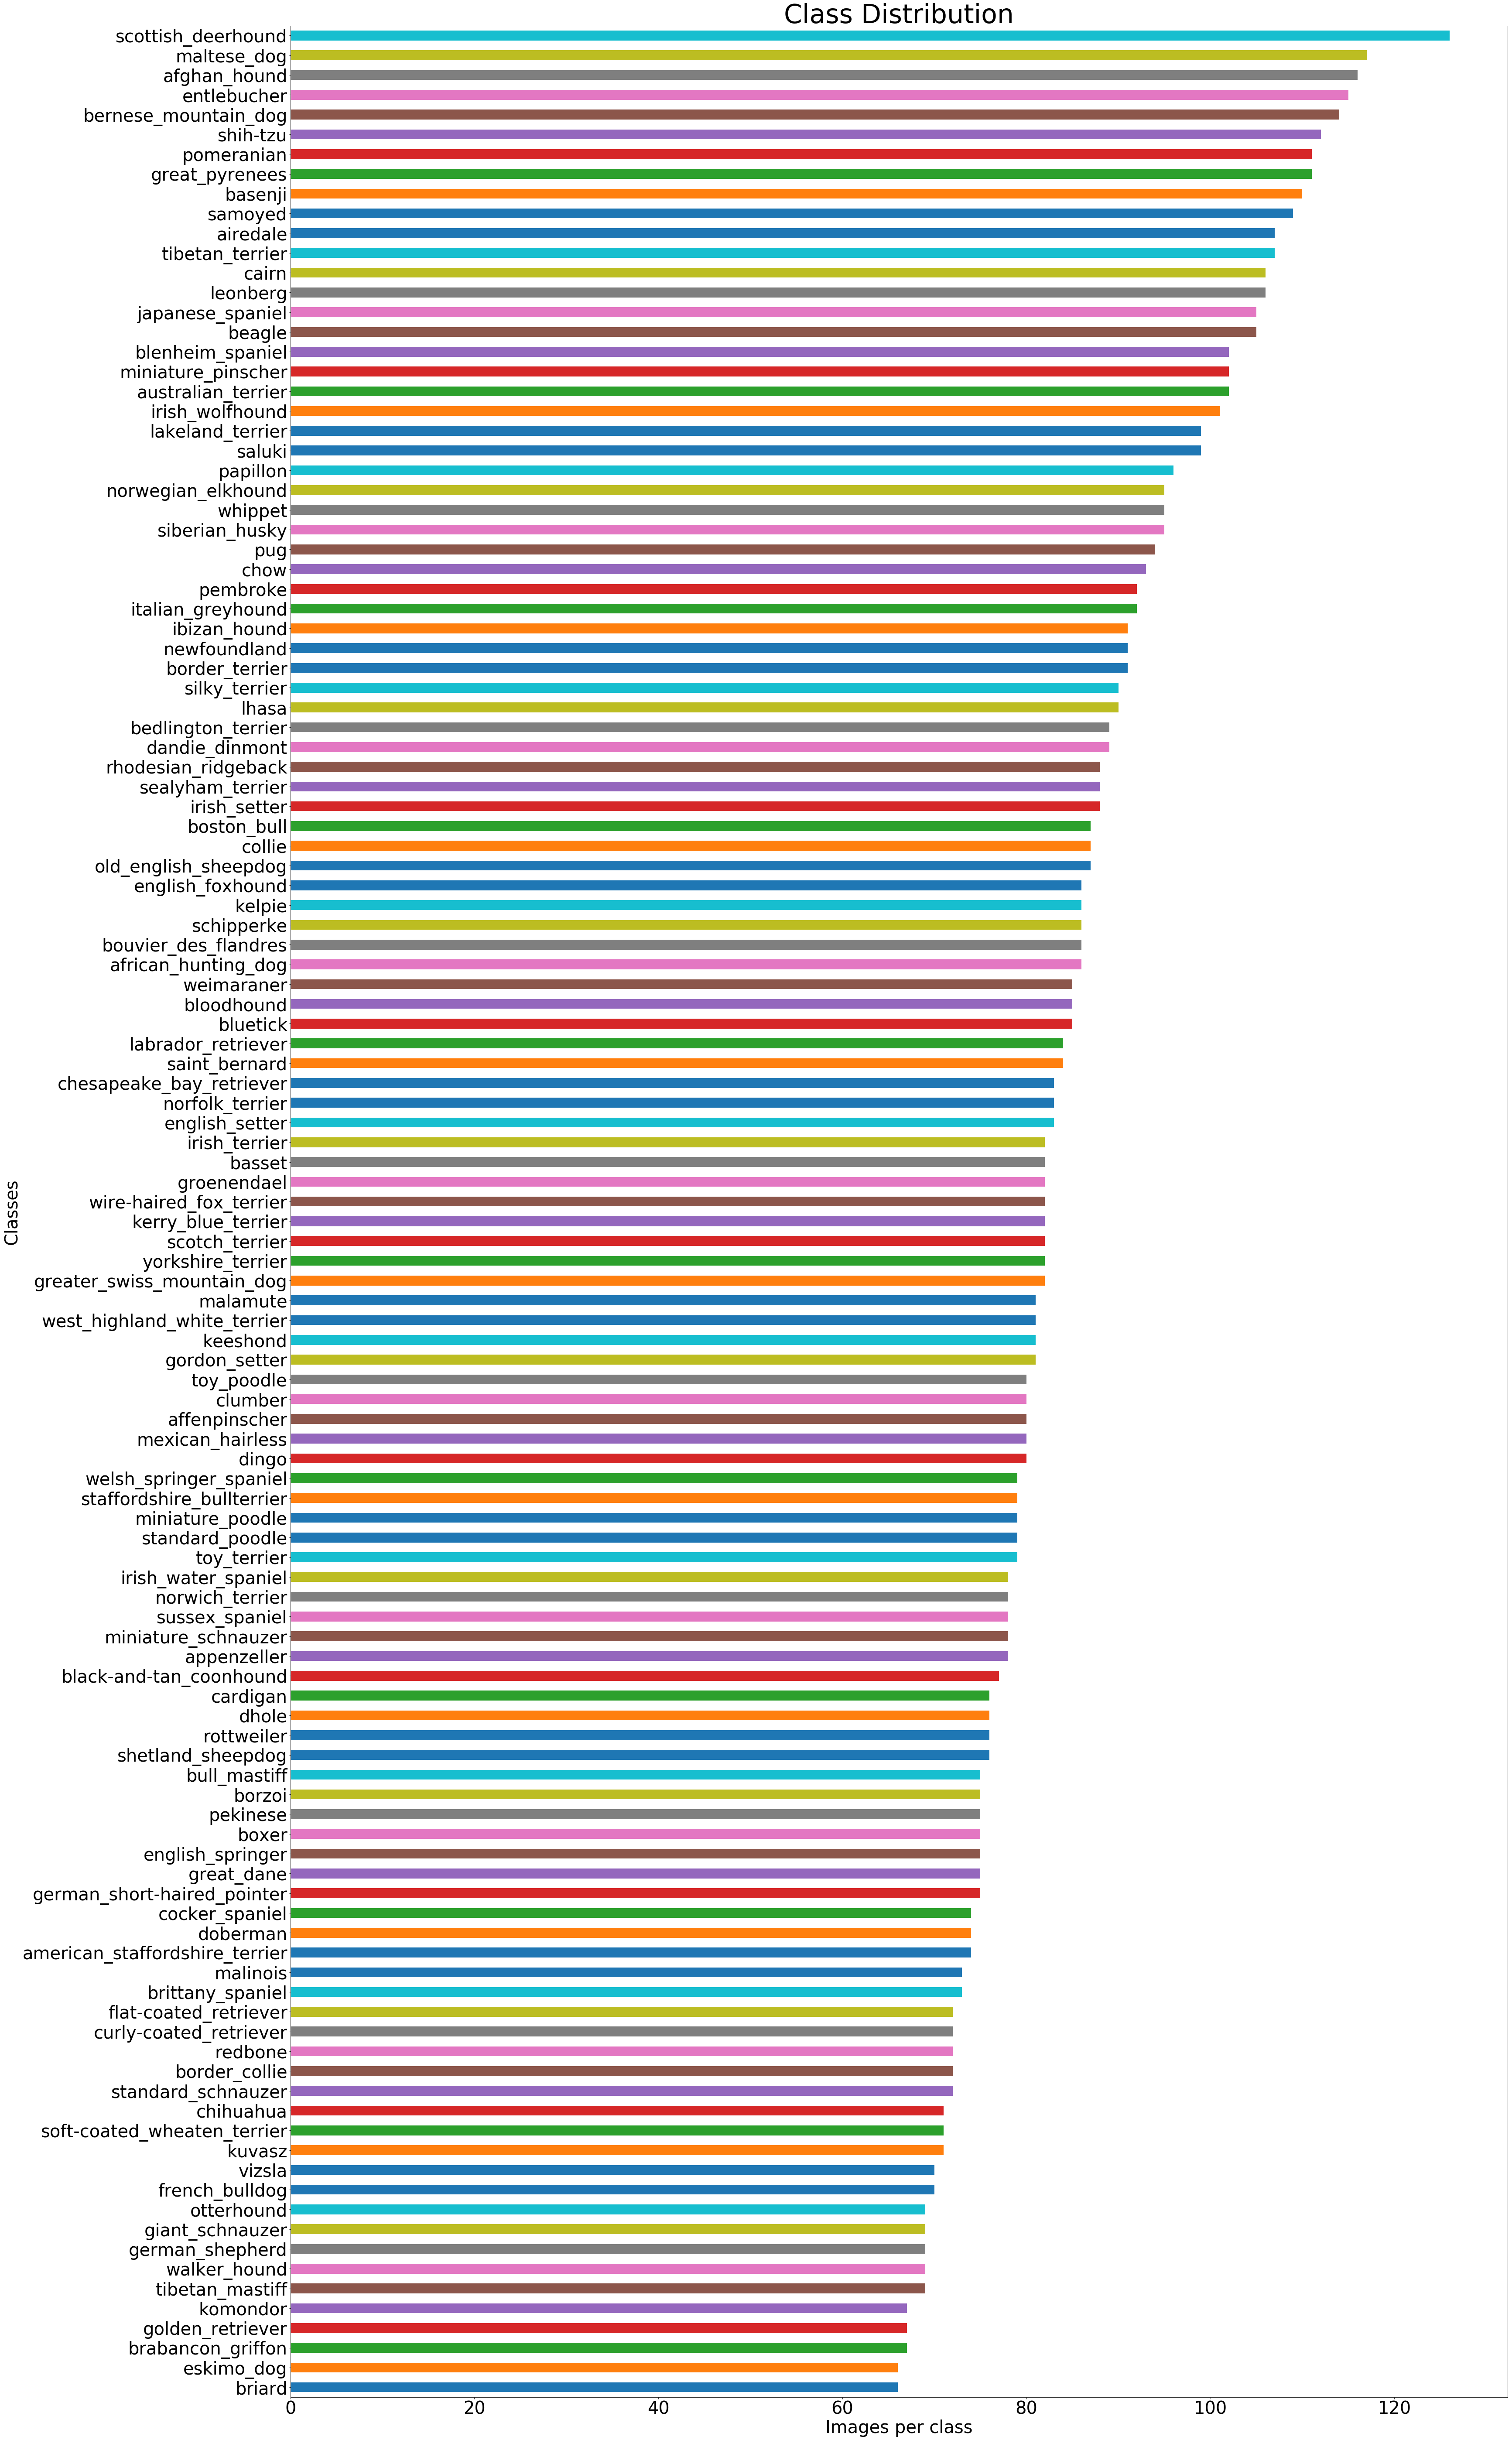

In [4]:
ax=pd.value_counts(df_train['breed'],ascending=True).plot(kind='barh',
                                                       fontsize="40",
                                                       title="Class Distribution",
                                                       figsize=(50,100))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(40)
ax.yaxis.label.set_size(40)
ax.title.set_size(60)

In [5]:
targets_series = pd.Series(df_train['breed'])
one_hot = pd.get_dummies(targets_series, sparse = True)

In [6]:
one_hot_labels = np.asarray(one_hot)

In [7]:
def read_and_resize_images(df,nrow=224,ncol=224,channels=3):
    i = 0
    x = []
    y = []
    breeds = []
    for f, breed in tqdm(df.values):
        img = PIL.Image.open(os.path.join('../input/train/' + f +'.jpg'))
        label = one_hot_labels[i]
        x.append(img.resize((nrow,ncol)))
        y.append(label)
        breeds.append(breed)
        i += 1
    return x,y,breeds

In [8]:
x_train,y_train,breeds_train = read_and_resize_images(df_train)

100%|██████████| 10222/10222 [00:43<00:00, 236.67it/s]


In [9]:
def read_and_resize_images_test(df,nrow=224,ncol=224,channels=3):
    x = []
    for f in tqdm(df['id'].values):
        img = PIL.Image.open(os.path.join('../input/test/' + f +'.jpg'))
        x.append(img.resize((nrow,ncol)))
    return x

In [10]:
x_test = read_and_resize_images_test(df_test)

100%|██████████| 10357/10357 [00:49<00:00, 207.56it/s]


In [11]:

x_train_raw = []
x_test_raw = []
y_train_raw = np.asarray(y_train) 
for img in x_train:
    x_train_raw.append(np.array(img))
for img in x_test:
    x_test_raw.append(np.array(img))
    
x_train_raw = np.array(x_train_raw)
x_test_raw = np.array(x_test_raw)

In [12]:
print(x_train_raw.shape)
print(y_train_raw.shape)
print(x_test_raw.shape)

(10222, 224, 224, 3)
(10222, 120)
(10357, 224, 224, 3)


In [13]:
def plot_images(images, classes):
    assert len(images) == len(classes) == 9
    
    fig, axes = plt.subplots(3, 3,figsize=(60,60),sharex=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
   
    for i, ax in enumerate(axes.flat):
        
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_RGB2BGR).reshape(224,224,3), cmap='hsv')    
        xlabel = "Breed: {0}".format(classes[i])
    
        ax.set_xlabel(xlabel)
        ax.xaxis.label.set_size(60)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

Images to show: 9
Classes to show: 9


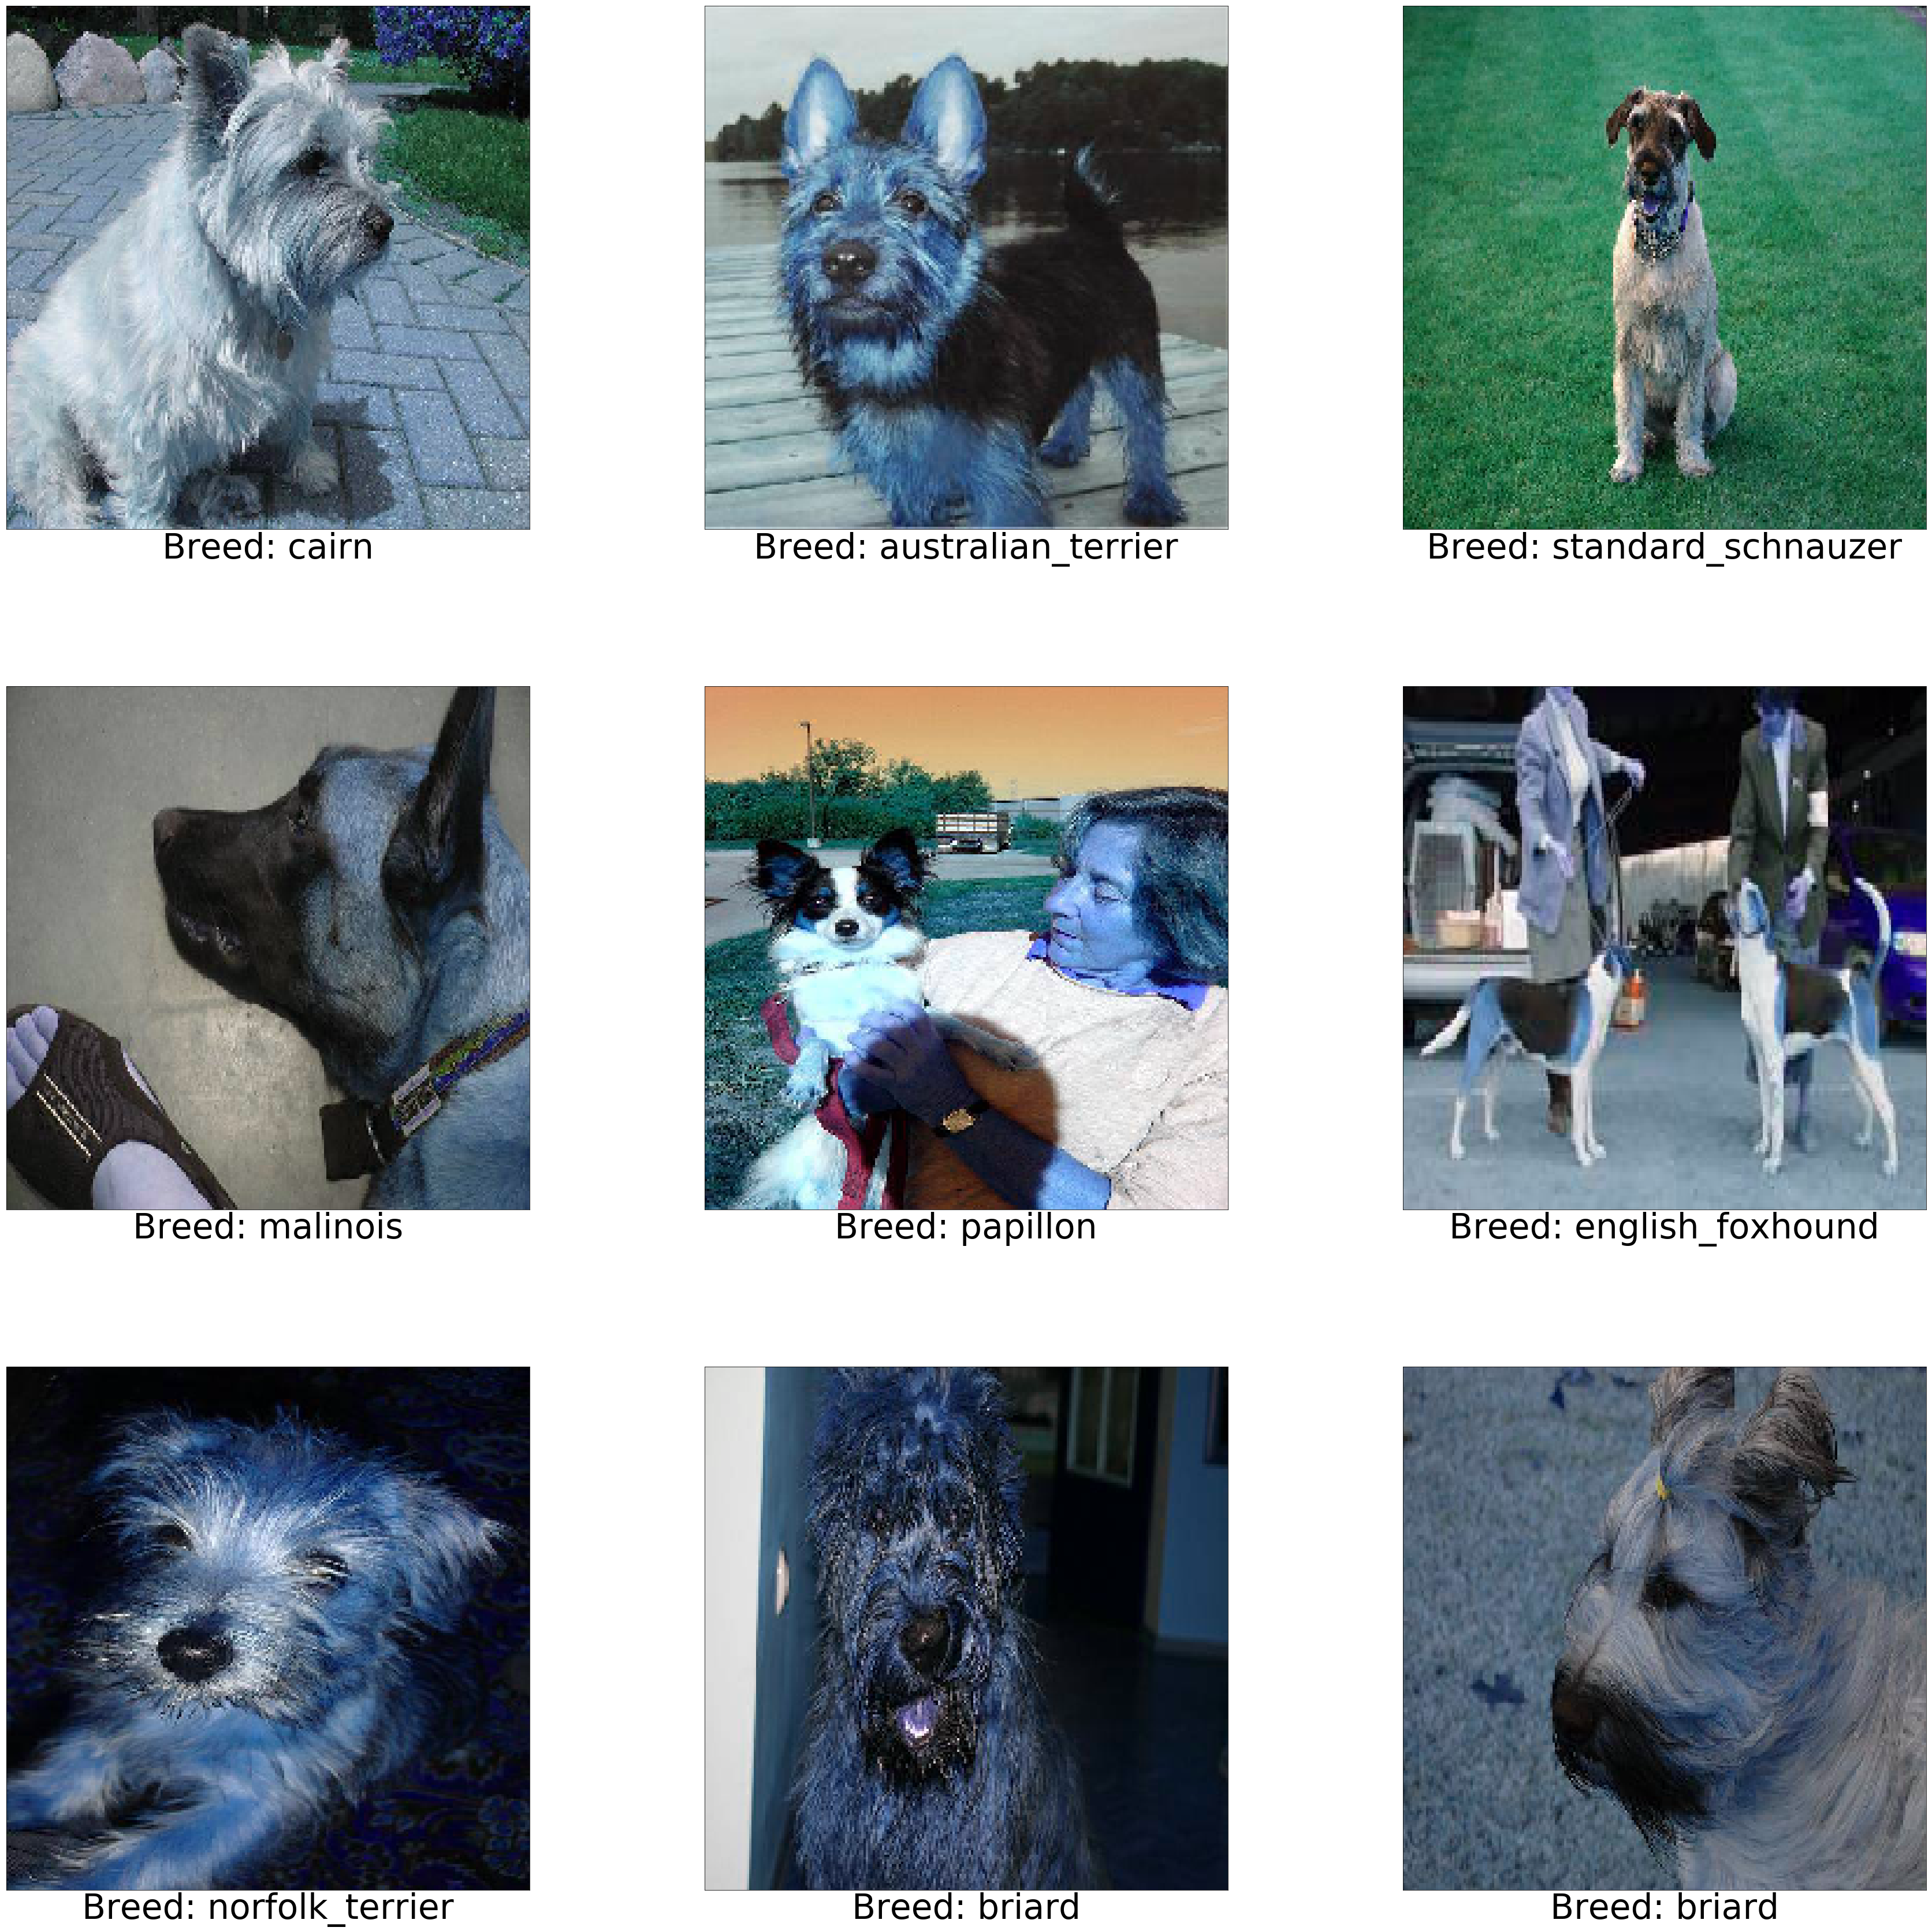

In [14]:

random_numbers = [randint(0, len(x_train)) for p in range(0,9)]
x_train_to_show = [x_train_raw[i] for i in random_numbers]
breeds_train_to_show = [breeds_train[i] for i in random_numbers]
print("Images to show: {0}".format(len(x_train_to_show)))
print("Classes to show: {0}".format(len(breeds_train_to_show)))

plot_images(x_train_to_show, breeds_train_to_show)

In [15]:
num_class = y_train_raw[1]


In [16]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train_raw, y_train_raw, test_size=0.3, random_state=1)

In [17]:
def prepareModel(num_class):
    base_model = VGG19(#weights='imagenet',
        weights = None, include_top=False, input_shape=(224, 224, 3))

    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    return model

In [18]:
firstModel = prepareModel(120)
firstModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [19]:
firstModel.fit(X_train, Y_train, epochs=70, validation_data=(X_valid, Y_valid), verbose=1)

Train on 7155 samples, validate on 3067 samples
Epoch 1/70


6656/7155 [==========================>...] - ETA: 1:21:19 - loss: 4.8282 - acc: 0.0000e+ - ETA: 40:58 - loss: 5.2907 - acc: 0.0000e+00 - ETA: 27:30 - loss: 5.7083 - acc: 0.0000e+ - ETA: 20:47 - loss: 5.8823 - acc: 0.0078   - ETA: 16:44 - loss: 6.1220 - acc: 0.00 - ETA: 14:01 - loss: 6.3299 - acc: 0.00 - ETA: 12:03 - loss: 6.3539 - acc: 0.00 - ETA: 10:34 - loss: 6.3291 - acc: 0.01 - ETA: 9:27 - loss: 6.2898 - acc: 0.0104 - ETA: 8:31 - loss: 6.3640 - acc: 0.009 - ETA: 7:46 - loss: 6.3823 - acc: 0.008 - ETA: 7:09 - loss: 6.3934 - acc: 0.007 - ETA: 6:37 - loss: 6.3685 - acc: 0.007 - ETA: 6:09 - loss: 6.3324 - acc: 0.006 - ETA: 5:46 - loss: 6.3551 - acc: 0.008 - ETA: 5:25 - loss: 6.3770 - acc: 0.007 - ETA: 5:06 - loss: 6.4021 - acc: 0.007 - ETA: 4:50 - loss: 6.3891 - acc: 0.008 - ETA: 4:35 - loss: 6.3520 - acc: 0.008 - ETA: 4:22 - loss: 6.3395 - acc: 0.007 - ETA: 4:10 - loss: 6.3282 - acc: 0.007 - ETA: 3:59 - loss: 6.3576 - acc: 0.007 - ETA: 3:49 - loss: 6.3385 - acc: 0.006 - ETA: 3:40 - lo

6880/7155 [===========================>..] - ETA: 39s - loss: 5.1633 - acc: 0.06 - ETA: 39s - loss: 5.4616 - acc: 0.04 - ETA: 39s - loss: 5.3611 - acc: 0.06 - ETA: 38s - loss: 5.3566 - acc: 0.04 - ETA: 38s - loss: 5.3656 - acc: 0.03 - ETA: 38s - loss: 5.3706 - acc: 0.03 - ETA: 38s - loss: 5.3674 - acc: 0.04 - ETA: 38s - loss: 5.2939 - acc: 0.03 - ETA: 38s - loss: 5.2749 - acc: 0.04 - ETA: 38s - loss: 5.2720 - acc: 0.04 - ETA: 37s - loss: 5.2355 - acc: 0.04 - ETA: 37s - loss: 5.2182 - acc: 0.04 - ETA: 37s - loss: 5.1756 - acc: 0.04 - ETA: 37s - loss: 5.2105 - acc: 0.03 - ETA: 37s - loss: 5.2253 - acc: 0.03 - ETA: 36s - loss: 5.2400 - acc: 0.03 - ETA: 36s - loss: 5.2095 - acc: 0.03 - ETA: 36s - loss: 5.1784 - acc: 0.03 - ETA: 36s - loss: 5.1687 - acc: 0.03 - ETA: 36s - loss: 5.1730 - acc: 0.03 - ETA: 36s - loss: 5.1694 - acc: 0.03 - ETA: 35s - loss: 5.1760 - acc: 0.03 - ETA: 35s - loss: 5.1953 - acc: 0.03 - ETA: 35s - loss: 5.2212 - acc: 0.03 - ETA: 35s - loss: 5.2236 - acc: 0.03 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 5.1545 - acc: 0.037 - ETA: 1s - loss: 5.1540 - acc: 0.037 - ETA: 0s - loss: 5.1557 - acc: 0.037 - ETA: 0s - loss: 5.1602 - acc: 0.037 - ETA: 0s - loss: 5.1609 - acc: 0.037 - ETA: 0s - loss: 5.1633 - acc: 0.037 - ETA: 0s - loss: 5.1608 - acc: 0.037 - ETA: 0s - loss: 5.1597 - acc: 0.037 - 56s 8ms/step - loss: 5.1595 - acc: 0.0373 - val_loss: 5.3562 - val_acc: 0.0163
Epoch 3/70


6880/7155 [===========================>..] - ETA: 39s - loss: 5.2373 - acc: 0.0000e+ - ETA: 39s - loss: 5.0992 - acc: 0.0000e+ - ETA: 39s - loss: 5.0252 - acc: 0.0208   - ETA: 39s - loss: 5.0327 - acc: 0.02 - ETA: 38s - loss: 5.0588 - acc: 0.03 - ETA: 38s - loss: 4.9656 - acc: 0.04 - ETA: 38s - loss: 4.9484 - acc: 0.04 - ETA: 38s - loss: 4.9772 - acc: 0.04 - ETA: 38s - loss: 5.0033 - acc: 0.04 - ETA: 38s - loss: 4.9567 - acc: 0.05 - ETA: 37s - loss: 5.0041 - acc: 0.04 - ETA: 37s - loss: 4.9475 - acc: 0.04 - ETA: 37s - loss: 4.9165 - acc: 0.05 - ETA: 37s - loss: 4.8923 - acc: 0.05 - ETA: 37s - loss: 4.8797 - acc: 0.05 - ETA: 36s - loss: 4.8897 - acc: 0.05 - ETA: 36s - loss: 4.9130 - acc: 0.05 - ETA: 36s - loss: 4.9276 - acc: 0.05 - ETA: 36s - loss: 4.9512 - acc: 0.05 - ETA: 36s - loss: 4.9771 - acc: 0.05 - ETA: 36s - loss: 4.9755 - acc: 0.04 - ETA: 35s - loss: 4.9517 - acc: 0.04 - ETA: 35s - loss: 4.9678 - acc: 0.04 - ETA: 35s - loss: 4.9532 - acc: 0.04 - ETA: 35s - loss: 4.9285 - acc: 

6880/7155 [===========================>..] - ETA: 39s - loss: 5.0182 - acc: 0.03 - ETA: 39s - loss: 4.9638 - acc: 0.01 - ETA: 39s - loss: 4.7673 - acc: 0.03 - ETA: 39s - loss: 4.6766 - acc: 0.03 - ETA: 39s - loss: 4.6168 - acc: 0.05 - ETA: 38s - loss: 4.6070 - acc: 0.05 - ETA: 38s - loss: 4.6851 - acc: 0.04 - ETA: 38s - loss: 4.6725 - acc: 0.05 - ETA: 38s - loss: 4.7113 - acc: 0.05 - ETA: 38s - loss: 4.6591 - acc: 0.05 - ETA: 37s - loss: 4.6460 - acc: 0.05 - ETA: 37s - loss: 4.6387 - acc: 0.05 - ETA: 37s - loss: 4.6019 - acc: 0.06 - ETA: 37s - loss: 4.5797 - acc: 0.07 - ETA: 37s - loss: 4.6288 - acc: 0.07 - ETA: 37s - loss: 4.6133 - acc: 0.07 - ETA: 36s - loss: 4.5964 - acc: 0.07 - ETA: 36s - loss: 4.5782 - acc: 0.07 - ETA: 36s - loss: 4.5905 - acc: 0.07 - ETA: 36s - loss: 4.5774 - acc: 0.08 - ETA: 36s - loss: 4.5779 - acc: 0.08 - ETA: 36s - loss: 4.5820 - acc: 0.08 - ETA: 35s - loss: 4.5856 - acc: 0.09 - ETA: 35s - loss: 4.5827 - acc: 0.09 - ETA: 35s - loss: 4.5967 - acc: 0.09 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.7338 - acc: 0.073 - ETA: 1s - loss: 4.7351 - acc: 0.073 - ETA: 0s - loss: 4.7368 - acc: 0.073 - ETA: 0s - loss: 4.7364 - acc: 0.073 - ETA: 0s - loss: 4.7376 - acc: 0.073 - ETA: 0s - loss: 4.7379 - acc: 0.073 - ETA: 0s - loss: 4.7355 - acc: 0.072 - ETA: 0s - loss: 4.7348 - acc: 0.072 - 56s 8ms/step - loss: 4.7367 - acc: 0.0727 - val_loss: 5.4117 - val_acc: 0.0342
Epoch 5/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.2228 - acc: 0.09 - ETA: 39s - loss: 4.1723 - acc: 0.12 - ETA: 39s - loss: 4.3618 - acc: 0.12 - ETA: 38s - loss: 4.4754 - acc: 0.11 - ETA: 38s - loss: 4.6278 - acc: 0.11 - ETA: 38s - loss: 4.5568 - acc: 0.11 - ETA: 38s - loss: 4.5600 - acc: 0.11 - ETA: 38s - loss: 4.5059 - acc: 0.10 - ETA: 38s - loss: 4.5728 - acc: 0.10 - ETA: 38s - loss: 4.5577 - acc: 0.10 - ETA: 37s - loss: 4.6021 - acc: 0.09 - ETA: 37s - loss: 4.6306 - acc: 0.09 - ETA: 37s - loss: 4.6040 - acc: 0.08 - ETA: 37s - loss: 4.5814 - acc: 0.08 - ETA: 37s - loss: 4.5521 - acc: 0.09 - ETA: 37s - loss: 4.5345 - acc: 0.08 - ETA: 36s - loss: 4.5670 - acc: 0.08 - ETA: 36s - loss: 4.6004 - acc: 0.07 - ETA: 36s - loss: 4.5878 - acc: 0.08 - ETA: 36s - loss: 4.5670 - acc: 0.08 - ETA: 36s - loss: 4.5823 - acc: 0.08 - ETA: 36s - loss: 4.5893 - acc: 0.08 - ETA: 35s - loss: 4.5868 - acc: 0.08 - ETA: 35s - loss: 4.5630 - acc: 0.08 - ETA: 35s - loss: 4.5360 - acc: 0.08 - ETA: 

6880/7155 [===========================>..] - ETA: 38s - loss: 4.3761 - acc: 0.09 - ETA: 39s - loss: 4.1173 - acc: 0.07 - ETA: 39s - loss: 4.2841 - acc: 0.06 - ETA: 38s - loss: 4.3201 - acc: 0.07 - ETA: 38s - loss: 4.3610 - acc: 0.08 - ETA: 38s - loss: 4.4186 - acc: 0.08 - ETA: 38s - loss: 4.3641 - acc: 0.10 - ETA: 38s - loss: 4.3816 - acc: 0.09 - ETA: 38s - loss: 4.4151 - acc: 0.09 - ETA: 37s - loss: 4.4108 - acc: 0.09 - ETA: 37s - loss: 4.4085 - acc: 0.09 - ETA: 37s - loss: 4.4396 - acc: 0.09 - ETA: 37s - loss: 4.4388 - acc: 0.09 - ETA: 37s - loss: 4.4104 - acc: 0.10 - ETA: 37s - loss: 4.3910 - acc: 0.10 - ETA: 36s - loss: 4.4022 - acc: 0.10 - ETA: 36s - loss: 4.3619 - acc: 0.11 - ETA: 36s - loss: 4.3432 - acc: 0.12 - ETA: 36s - loss: 4.3293 - acc: 0.11 - ETA: 36s - loss: 4.3516 - acc: 0.11 - ETA: 36s - loss: 4.3488 - acc: 0.11 - ETA: 35s - loss: 4.3698 - acc: 0.11 - ETA: 35s - loss: 4.3461 - acc: 0.11 - ETA: 35s - loss: 4.3661 - acc: 0.11 - ETA: 35s - loss: 4.3405 - acc: 0.11 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.3609 - acc: 0.109 - ETA: 1s - loss: 4.3601 - acc: 0.109 - ETA: 1s - loss: 4.3600 - acc: 0.108 - ETA: 0s - loss: 4.3627 - acc: 0.108 - ETA: 0s - loss: 4.3615 - acc: 0.108 - ETA: 0s - loss: 4.3632 - acc: 0.108 - ETA: 0s - loss: 4.3640 - acc: 0.107 - ETA: 0s - loss: 4.3635 - acc: 0.107 - 56s 8ms/step - loss: 4.3648 - acc: 0.1080 - val_loss: 5.4270 - val_acc: 0.0355
Epoch 7/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.3397 - acc: 0.03 - ETA: 39s - loss: 4.0655 - acc: 0.12 - ETA: 39s - loss: 4.1832 - acc: 0.13 - ETA: 39s - loss: 4.1681 - acc: 0.13 - ETA: 39s - loss: 4.2731 - acc: 0.11 - ETA: 38s - loss: 4.4348 - acc: 0.11 - ETA: 38s - loss: 4.4643 - acc: 0.10 - ETA: 38s - loss: 4.3779 - acc: 0.12 - ETA: 38s - loss: 4.4354 - acc: 0.12 - ETA: 38s - loss: 4.4135 - acc: 0.12 - ETA: 37s - loss: 4.4115 - acc: 0.12 - ETA: 37s - loss: 4.4171 - acc: 0.12 - ETA: 37s - loss: 4.4457 - acc: 0.12 - ETA: 37s - loss: 4.4213 - acc: 0.13 - ETA: 37s - loss: 4.4252 - acc: 0.13 - ETA: 37s - loss: 4.3912 - acc: 0.12 - ETA: 36s - loss: 4.3813 - acc: 0.13 - ETA: 36s - loss: 4.3802 - acc: 0.13 - ETA: 36s - loss: 4.3708 - acc: 0.13 - ETA: 36s - loss: 4.3611 - acc: 0.14 - ETA: 36s - loss: 4.3175 - acc: 0.14 - ETA: 35s - loss: 4.3357 - acc: 0.14 - ETA: 35s - loss: 4.3451 - acc: 0.14 - ETA: 35s - loss: 4.3292 - acc: 0.14 - ETA: 35s - loss: 4.3457 - acc: 0.13 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 4.5432 - acc: 0.09 - ETA: 39s - loss: 4.1403 - acc: 0.12 - ETA: 39s - loss: 3.9728 - acc: 0.16 - ETA: 39s - loss: 4.0182 - acc: 0.15 - ETA: 38s - loss: 4.0930 - acc: 0.15 - ETA: 38s - loss: 4.0571 - acc: 0.15 - ETA: 38s - loss: 4.0894 - acc: 0.15 - ETA: 38s - loss: 4.0171 - acc: 0.16 - ETA: 38s - loss: 4.0177 - acc: 0.15 - ETA: 38s - loss: 4.0015 - acc: 0.15 - ETA: 37s - loss: 4.0406 - acc: 0.15 - ETA: 37s - loss: 4.0511 - acc: 0.15 - ETA: 37s - loss: 4.0785 - acc: 0.14 - ETA: 37s - loss: 4.0391 - acc: 0.15 - ETA: 37s - loss: 4.0246 - acc: 0.16 - ETA: 37s - loss: 4.0153 - acc: 0.16 - ETA: 36s - loss: 4.0136 - acc: 0.16 - ETA: 36s - loss: 4.0336 - acc: 0.15 - ETA: 36s - loss: 4.0259 - acc: 0.15 - ETA: 36s - loss: 4.0368 - acc: 0.15 - ETA: 36s - loss: 4.0486 - acc: 0.15 - ETA: 35s - loss: 4.0520 - acc: 0.14 - ETA: 35s - loss: 4.0465 - acc: 0.15 - ETA: 35s - loss: 4.0131 - acc: 0.15 - ETA: 35s - loss: 4.0246 - acc: 0.15 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.0053 - acc: 0.159 - ETA: 1s - loss: 4.0056 - acc: 0.159 - ETA: 1s - loss: 4.0047 - acc: 0.159 - ETA: 0s - loss: 4.0052 - acc: 0.159 - ETA: 0s - loss: 4.0052 - acc: 0.158 - ETA: 0s - loss: 4.0060 - acc: 0.158 - ETA: 0s - loss: 4.0090 - acc: 0.157 - ETA: 0s - loss: 4.0114 - acc: 0.157 - 57s 8ms/step - loss: 4.0128 - acc: 0.1574 - val_loss: 5.1882 - val_acc: 0.0417
Epoch 9/70


6880/7155 [===========================>..] - ETA: 39s - loss: 3.2004 - acc: 0.18 - ETA: 39s - loss: 3.5978 - acc: 0.17 - ETA: 40s - loss: 3.7367 - acc: 0.15 - ETA: 40s - loss: 3.7401 - acc: 0.16 - ETA: 39s - loss: 3.7953 - acc: 0.15 - ETA: 39s - loss: 3.8191 - acc: 0.15 - ETA: 39s - loss: 3.8192 - acc: 0.16 - ETA: 39s - loss: 3.7798 - acc: 0.17 - ETA: 39s - loss: 3.7612 - acc: 0.17 - ETA: 39s - loss: 3.7683 - acc: 0.17 - ETA: 39s - loss: 3.7535 - acc: 0.17 - ETA: 38s - loss: 3.7425 - acc: 0.17 - ETA: 38s - loss: 3.7558 - acc: 0.17 - ETA: 38s - loss: 3.7507 - acc: 0.17 - ETA: 38s - loss: 3.7710 - acc: 0.16 - ETA: 38s - loss: 3.7746 - acc: 0.17 - ETA: 37s - loss: 3.7628 - acc: 0.17 - ETA: 37s - loss: 3.7746 - acc: 0.17 - ETA: 37s - loss: 3.7632 - acc: 0.18 - ETA: 37s - loss: 3.7576 - acc: 0.17 - ETA: 37s - loss: 3.7844 - acc: 0.17 - ETA: 37s - loss: 3.7756 - acc: 0.17 - ETA: 36s - loss: 3.7907 - acc: 0.17 - ETA: 36s - loss: 3.7874 - acc: 0.17 - ETA: 36s - loss: 3.8036 - acc: 0.18 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 4.1589 - acc: 0.15 - ETA: 39s - loss: 4.0135 - acc: 0.20 - ETA: 39s - loss: 3.8606 - acc: 0.22 - ETA: 39s - loss: 3.8735 - acc: 0.20 - ETA: 38s - loss: 3.8715 - acc: 0.20 - ETA: 38s - loss: 3.9223 - acc: 0.20 - ETA: 38s - loss: 3.8734 - acc: 0.20 - ETA: 38s - loss: 3.8091 - acc: 0.22 - ETA: 38s - loss: 3.7895 - acc: 0.22 - ETA: 38s - loss: 3.8147 - acc: 0.21 - ETA: 37s - loss: 3.8505 - acc: 0.20 - ETA: 37s - loss: 3.8114 - acc: 0.20 - ETA: 37s - loss: 3.7922 - acc: 0.20 - ETA: 37s - loss: 3.7629 - acc: 0.20 - ETA: 37s - loss: 3.7684 - acc: 0.20 - ETA: 37s - loss: 3.7500 - acc: 0.20 - ETA: 36s - loss: 3.7625 - acc: 0.20 - ETA: 36s - loss: 3.7557 - acc: 0.20 - ETA: 36s - loss: 3.7614 - acc: 0.19 - ETA: 36s - loss: 3.7269 - acc: 0.20 - ETA: 36s - loss: 3.7183 - acc: 0.20 - ETA: 36s - loss: 3.7447 - acc: 0.20 - ETA: 35s - loss: 3.7370 - acc: 0.20 - ETA: 35s - loss: 3.7224 - acc: 0.20 - ETA: 35s - loss: 3.7291 - acc: 0.20 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 3.7447 - acc: 0.202 - ETA: 1s - loss: 3.7433 - acc: 0.202 - ETA: 1s - loss: 3.7429 - acc: 0.202 - ETA: 0s - loss: 3.7428 - acc: 0.202 - ETA: 0s - loss: 3.7435 - acc: 0.202 - ETA: 0s - loss: 3.7431 - acc: 0.203 - ETA: 0s - loss: 3.7434 - acc: 0.203 - ETA: 0s - loss: 3.7420 - acc: 0.203 - 57s 8ms/step - loss: 3.7429 - acc: 0.2031 - val_loss: 5.2452 - val_acc: 0.0476
Epoch 11/70


6880/7155 [===========================>..] - ETA: 40s - loss: 3.4320 - acc: 0.25 - ETA: 40s - loss: 3.6259 - acc: 0.21 - ETA: 40s - loss: 3.6871 - acc: 0.17 - ETA: 40s - loss: 3.6322 - acc: 0.19 - ETA: 40s - loss: 3.7294 - acc: 0.18 - ETA: 39s - loss: 3.6428 - acc: 0.20 - ETA: 39s - loss: 3.6592 - acc: 0.19 - ETA: 39s - loss: 3.7230 - acc: 0.17 - ETA: 39s - loss: 3.8106 - acc: 0.17 - ETA: 39s - loss: 3.8142 - acc: 0.18 - ETA: 39s - loss: 3.8350 - acc: 0.18 - ETA: 39s - loss: 3.7841 - acc: 0.19 - ETA: 38s - loss: 3.7492 - acc: 0.19 - ETA: 38s - loss: 3.6874 - acc: 0.20 - ETA: 38s - loss: 3.6373 - acc: 0.21 - ETA: 38s - loss: 3.6472 - acc: 0.20 - ETA: 38s - loss: 3.6949 - acc: 0.20 - ETA: 37s - loss: 3.7399 - acc: 0.19 - ETA: 37s - loss: 3.7194 - acc: 0.19 - ETA: 37s - loss: 3.7043 - acc: 0.20 - ETA: 37s - loss: 3.6945 - acc: 0.20 - ETA: 37s - loss: 3.7003 - acc: 0.20 - ETA: 36s - loss: 3.6856 - acc: 0.21 - ETA: 36s - loss: 3.6795 - acc: 0.21 - ETA: 36s - loss: 3.6639 - acc: 0.21 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 3.7877 - acc: 0.18 - ETA: 39s - loss: 3.7807 - acc: 0.17 - ETA: 39s - loss: 3.7352 - acc: 0.17 - ETA: 39s - loss: 3.6017 - acc: 0.21 - ETA: 39s - loss: 3.5665 - acc: 0.24 - ETA: 38s - loss: 3.5293 - acc: 0.23 - ETA: 38s - loss: 3.5280 - acc: 0.23 - ETA: 38s - loss: 3.5022 - acc: 0.23 - ETA: 38s - loss: 3.4820 - acc: 0.23 - ETA: 38s - loss: 3.4827 - acc: 0.22 - ETA: 38s - loss: 3.4842 - acc: 0.23 - ETA: 37s - loss: 3.5147 - acc: 0.23 - ETA: 37s - loss: 3.4929 - acc: 0.23 - ETA: 37s - loss: 3.5119 - acc: 0.24 - ETA: 37s - loss: 3.4918 - acc: 0.24 - ETA: 37s - loss: 3.5194 - acc: 0.24 - ETA: 36s - loss: 3.5028 - acc: 0.24 - ETA: 36s - loss: 3.4912 - acc: 0.24 - ETA: 36s - loss: 3.4945 - acc: 0.24 - ETA: 36s - loss: 3.4757 - acc: 0.25 - ETA: 36s - loss: 3.4975 - acc: 0.24 - ETA: 36s - loss: 3.5090 - acc: 0.24 - ETA: 35s - loss: 3.4962 - acc: 0.24 - ETA: 35s - loss: 3.5087 - acc: 0.25 - ETA: 35s - loss: 3.5244 - acc: 0.25 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 3.4691 - acc: 0.247 - ETA: 1s - loss: 3.4698 - acc: 0.247 - ETA: 1s - loss: 3.4678 - acc: 0.247 - ETA: 0s - loss: 3.4641 - acc: 0.248 - ETA: 0s - loss: 3.4654 - acc: 0.247 - ETA: 0s - loss: 3.4635 - acc: 0.247 - ETA: 0s - loss: 3.4650 - acc: 0.247 - ETA: 0s - loss: 3.4653 - acc: 0.247 - 57s 8ms/step - loss: 3.4647 - acc: 0.2477 - val_loss: 5.3685 - val_acc: 0.0424
Epoch 13/70


6880/7155 [===========================>..] - ETA: 40s - loss: 3.1469 - acc: 0.31 - ETA: 40s - loss: 3.5846 - acc: 0.21 - ETA: 40s - loss: 3.5748 - acc: 0.25 - ETA: 40s - loss: 3.4100 - acc: 0.26 - ETA: 40s - loss: 3.3739 - acc: 0.28 - ETA: 39s - loss: 3.3439 - acc: 0.26 - ETA: 39s - loss: 3.3888 - acc: 0.25 - ETA: 39s - loss: 3.3104 - acc: 0.26 - ETA: 39s - loss: 3.3010 - acc: 0.26 - ETA: 39s - loss: 3.2663 - acc: 0.26 - ETA: 39s - loss: 3.2308 - acc: 0.27 - ETA: 38s - loss: 3.2477 - acc: 0.28 - ETA: 38s - loss: 3.2548 - acc: 0.28 - ETA: 38s - loss: 3.2665 - acc: 0.28 - ETA: 38s - loss: 3.2695 - acc: 0.27 - ETA: 38s - loss: 3.2756 - acc: 0.27 - ETA: 38s - loss: 3.2898 - acc: 0.27 - ETA: 37s - loss: 3.2736 - acc: 0.27 - ETA: 37s - loss: 3.2648 - acc: 0.28 - ETA: 37s - loss: 3.2537 - acc: 0.28 - ETA: 37s - loss: 3.2478 - acc: 0.28 - ETA: 37s - loss: 3.2422 - acc: 0.28 - ETA: 36s - loss: 3.2618 - acc: 0.28 - ETA: 36s - loss: 3.2558 - acc: 0.29 - ETA: 36s - loss: 3.2530 - acc: 0.29 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 3.6011 - acc: 0.28 - ETA: 40s - loss: 3.4500 - acc: 0.29 - ETA: 40s - loss: 3.4896 - acc: 0.28 - ETA: 40s - loss: 3.6304 - acc: 0.26 - ETA: 39s - loss: 3.5599 - acc: 0.28 - ETA: 39s - loss: 3.6318 - acc: 0.28 - ETA: 39s - loss: 3.5241 - acc: 0.29 - ETA: 39s - loss: 3.4926 - acc: 0.30 - ETA: 39s - loss: 3.4408 - acc: 0.29 - ETA: 39s - loss: 3.4698 - acc: 0.29 - ETA: 39s - loss: 3.5058 - acc: 0.28 - ETA: 38s - loss: 3.4531 - acc: 0.29 - ETA: 38s - loss: 3.4467 - acc: 0.30 - ETA: 38s - loss: 3.4446 - acc: 0.29 - ETA: 38s - loss: 3.4012 - acc: 0.30 - ETA: 38s - loss: 3.4009 - acc: 0.29 - ETA: 37s - loss: 3.3981 - acc: 0.28 - ETA: 37s - loss: 3.3843 - acc: 0.28 - ETA: 37s - loss: 3.3522 - acc: 0.28 - ETA: 37s - loss: 3.3482 - acc: 0.29 - ETA: 37s - loss: 3.3313 - acc: 0.29 - ETA: 37s - loss: 3.3177 - acc: 0.29 - ETA: 36s - loss: 3.3136 - acc: 0.29 - ETA: 36s - loss: 3.3244 - acc: 0.29 - ETA: 36s - loss: 3.3292 - acc: 0.29 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 3.2720 - acc: 0.288 - ETA: 1s - loss: 3.2717 - acc: 0.288 - ETA: 1s - loss: 3.2732 - acc: 0.288 - ETA: 0s - loss: 3.2723 - acc: 0.288 - ETA: 0s - loss: 3.2738 - acc: 0.288 - ETA: 0s - loss: 3.2744 - acc: 0.287 - ETA: 0s - loss: 3.2755 - acc: 0.287 - ETA: 0s - loss: 3.2746 - acc: 0.287 - 58s 8ms/step - loss: 3.2760 - acc: 0.2881 - val_loss: 5.3286 - val_acc: 0.0561
Epoch 15/70


6880/7155 [===========================>..] - ETA: 40s - loss: 3.2553 - acc: 0.43 - ETA: 40s - loss: 3.4272 - acc: 0.31 - ETA: 40s - loss: 3.3627 - acc: 0.29 - ETA: 40s - loss: 3.1861 - acc: 0.32 - ETA: 39s - loss: 3.0700 - acc: 0.36 - ETA: 39s - loss: 3.1008 - acc: 0.34 - ETA: 39s - loss: 3.0253 - acc: 0.34 - ETA: 39s - loss: 3.0617 - acc: 0.33 - ETA: 39s - loss: 3.0131 - acc: 0.34 - ETA: 39s - loss: 3.0305 - acc: 0.33 - ETA: 38s - loss: 3.0154 - acc: 0.34 - ETA: 38s - loss: 3.0372 - acc: 0.33 - ETA: 38s - loss: 3.0280 - acc: 0.33 - ETA: 38s - loss: 3.0460 - acc: 0.33 - ETA: 38s - loss: 3.0328 - acc: 0.34 - ETA: 38s - loss: 3.0214 - acc: 0.34 - ETA: 37s - loss: 3.0033 - acc: 0.34 - ETA: 37s - loss: 3.0009 - acc: 0.34 - ETA: 37s - loss: 3.0028 - acc: 0.34 - ETA: 37s - loss: 3.0077 - acc: 0.34 - ETA: 37s - loss: 3.0024 - acc: 0.34 - ETA: 36s - loss: 3.0016 - acc: 0.34 - ETA: 36s - loss: 2.9855 - acc: 0.35 - ETA: 36s - loss: 2.9966 - acc: 0.35 - ETA: 36s - loss: 2.9986 - acc: 0.35 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 2.6959 - acc: 0.25 - ETA: 39s - loss: 2.9140 - acc: 0.31 - ETA: 39s - loss: 3.0620 - acc: 0.26 - ETA: 39s - loss: 3.1895 - acc: 0.25 - ETA: 39s - loss: 3.1921 - acc: 0.26 - ETA: 38s - loss: 3.1881 - acc: 0.25 - ETA: 38s - loss: 3.1524 - acc: 0.25 - ETA: 38s - loss: 3.0912 - acc: 0.26 - ETA: 38s - loss: 3.0379 - acc: 0.28 - ETA: 38s - loss: 3.0734 - acc: 0.29 - ETA: 38s - loss: 3.1093 - acc: 0.29 - ETA: 37s - loss: 3.1155 - acc: 0.29 - ETA: 37s - loss: 3.1162 - acc: 0.29 - ETA: 37s - loss: 3.0858 - acc: 0.29 - ETA: 37s - loss: 3.0661 - acc: 0.30 - ETA: 37s - loss: 3.0651 - acc: 0.30 - ETA: 36s - loss: 3.0641 - acc: 0.30 - ETA: 36s - loss: 3.0370 - acc: 0.31 - ETA: 36s - loss: 3.0270 - acc: 0.31 - ETA: 36s - loss: 2.9930 - acc: 0.32 - ETA: 36s - loss: 2.9808 - acc: 0.32 - ETA: 36s - loss: 3.0254 - acc: 0.31 - ETA: 35s - loss: 3.0222 - acc: 0.31 - ETA: 35s - loss: 3.0249 - acc: 0.31 - ETA: 35s - loss: 3.0167 - acc: 0.31 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 3.0452 - acc: 0.337 - ETA: 1s - loss: 3.0479 - acc: 0.337 - ETA: 1s - loss: 3.0468 - acc: 0.337 - ETA: 0s - loss: 3.0476 - acc: 0.336 - ETA: 0s - loss: 3.0477 - acc: 0.336 - ETA: 0s - loss: 3.0495 - acc: 0.336 - ETA: 0s - loss: 3.0502 - acc: 0.335 - ETA: 0s - loss: 3.0508 - acc: 0.335 - 56s 8ms/step - loss: 3.0495 - acc: 0.3360 - val_loss: 5.2301 - val_acc: 0.0479
Epoch 17/70


6880/7155 [===========================>..] - ETA: 40s - loss: 2.5386 - acc: 0.43 - ETA: 40s - loss: 2.7154 - acc: 0.37 - ETA: 40s - loss: 2.7754 - acc: 0.34 - ETA: 40s - loss: 2.8363 - acc: 0.32 - ETA: 40s - loss: 2.7797 - acc: 0.32 - ETA: 39s - loss: 2.7192 - acc: 0.33 - ETA: 39s - loss: 2.7164 - acc: 0.35 - ETA: 39s - loss: 2.6704 - acc: 0.38 - ETA: 39s - loss: 2.6838 - acc: 0.40 - ETA: 39s - loss: 2.7464 - acc: 0.39 - ETA: 39s - loss: 2.7298 - acc: 0.40 - ETA: 38s - loss: 2.7752 - acc: 0.40 - ETA: 38s - loss: 2.8210 - acc: 0.39 - ETA: 38s - loss: 2.8298 - acc: 0.38 - ETA: 38s - loss: 2.8677 - acc: 0.38 - ETA: 38s - loss: 2.8871 - acc: 0.38 - ETA: 37s - loss: 2.8741 - acc: 0.38 - ETA: 37s - loss: 2.8365 - acc: 0.39 - ETA: 37s - loss: 2.8714 - acc: 0.38 - ETA: 37s - loss: 2.8632 - acc: 0.38 - ETA: 37s - loss: 2.8475 - acc: 0.39 - ETA: 37s - loss: 2.8248 - acc: 0.39 - ETA: 36s - loss: 2.8117 - acc: 0.39 - ETA: 36s - loss: 2.8226 - acc: 0.39 - ETA: 36s - loss: 2.8287 - acc: 0.39 - ETA: 

6880/7155 [===========================>..] - ETA: 40s - loss: 2.3485 - acc: 0.59 - ETA: 40s - loss: 2.3590 - acc: 0.54 - ETA: 40s - loss: 2.4187 - acc: 0.52 - ETA: 40s - loss: 2.5270 - acc: 0.46 - ETA: 39s - loss: 2.5801 - acc: 0.45 - ETA: 39s - loss: 2.6564 - acc: 0.40 - ETA: 39s - loss: 2.7303 - acc: 0.38 - ETA: 39s - loss: 2.7261 - acc: 0.39 - ETA: 39s - loss: 2.7364 - acc: 0.38 - ETA: 39s - loss: 2.7715 - acc: 0.38 - ETA: 38s - loss: 2.7590 - acc: 0.38 - ETA: 38s - loss: 2.7255 - acc: 0.38 - ETA: 38s - loss: 2.6883 - acc: 0.39 - ETA: 38s - loss: 2.6679 - acc: 0.40 - ETA: 38s - loss: 2.6649 - acc: 0.40 - ETA: 38s - loss: 2.6866 - acc: 0.40 - ETA: 37s - loss: 2.7492 - acc: 0.39 - ETA: 37s - loss: 2.7444 - acc: 0.39 - ETA: 37s - loss: 2.7457 - acc: 0.39 - ETA: 37s - loss: 2.7355 - acc: 0.40 - ETA: 37s - loss: 2.7209 - acc: 0.40 - ETA: 36s - loss: 2.7370 - acc: 0.40 - ETA: 36s - loss: 2.7329 - acc: 0.39 - ETA: 36s - loss: 2.7294 - acc: 0.39 - ETA: 36s - loss: 2.7326 - acc: 0.39 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 2.7890 - acc: 0.386 - ETA: 1s - loss: 2.7885 - acc: 0.386 - ETA: 1s - loss: 2.7874 - acc: 0.386 - ETA: 0s - loss: 2.7866 - acc: 0.387 - ETA: 0s - loss: 2.7871 - acc: 0.386 - ETA: 0s - loss: 2.7867 - acc: 0.386 - ETA: 0s - loss: 2.7888 - acc: 0.385 - ETA: 0s - loss: 2.7894 - acc: 0.385 - 58s 8ms/step - loss: 2.7888 - acc: 0.3856 - val_loss: 5.1930 - val_acc: 0.0476
Epoch 19/70


6880/7155 [===========================>..] - ETA: 40s - loss: 3.2928 - acc: 0.28 - ETA: 40s - loss: 2.9949 - acc: 0.32 - ETA: 40s - loss: 3.0615 - acc: 0.35 - ETA: 40s - loss: 2.9321 - acc: 0.36 - ETA: 40s - loss: 2.9102 - acc: 0.36 - ETA: 40s - loss: 2.9528 - acc: 0.35 - ETA: 40s - loss: 2.9620 - acc: 0.35 - ETA: 39s - loss: 2.8610 - acc: 0.37 - ETA: 39s - loss: 2.8141 - acc: 0.39 - ETA: 39s - loss: 2.7703 - acc: 0.39 - ETA: 39s - loss: 2.7212 - acc: 0.40 - ETA: 39s - loss: 2.6991 - acc: 0.41 - ETA: 38s - loss: 2.6971 - acc: 0.40 - ETA: 38s - loss: 2.6729 - acc: 0.41 - ETA: 38s - loss: 2.6812 - acc: 0.41 - ETA: 38s - loss: 2.6779 - acc: 0.41 - ETA: 38s - loss: 2.6792 - acc: 0.41 - ETA: 38s - loss: 2.6802 - acc: 0.40 - ETA: 37s - loss: 2.6871 - acc: 0.41 - ETA: 37s - loss: 2.6815 - acc: 0.42 - ETA: 37s - loss: 2.6677 - acc: 0.42 - ETA: 37s - loss: 2.6515 - acc: 0.42 - ETA: 37s - loss: 2.6597 - acc: 0.41 - ETA: 36s - loss: 2.6618 - acc: 0.41 - ETA: 36s - loss: 2.6623 - acc: 0.42 - ETA: 

6880/7155 [===========================>..] - ETA: 40s - loss: 2.8424 - acc: 0.37 - ETA: 40s - loss: 2.7487 - acc: 0.39 - ETA: 40s - loss: 2.7679 - acc: 0.34 - ETA: 40s - loss: 2.7788 - acc: 0.36 - ETA: 40s - loss: 2.7859 - acc: 0.37 - ETA: 40s - loss: 2.7413 - acc: 0.39 - ETA: 39s - loss: 2.6666 - acc: 0.41 - ETA: 39s - loss: 2.6565 - acc: 0.41 - ETA: 39s - loss: 2.6707 - acc: 0.40 - ETA: 39s - loss: 2.7017 - acc: 0.40 - ETA: 39s - loss: 2.7010 - acc: 0.40 - ETA: 38s - loss: 2.6904 - acc: 0.39 - ETA: 38s - loss: 2.6649 - acc: 0.40 - ETA: 38s - loss: 2.6386 - acc: 0.41 - ETA: 38s - loss: 2.6351 - acc: 0.41 - ETA: 38s - loss: 2.6248 - acc: 0.42 - ETA: 37s - loss: 2.6022 - acc: 0.43 - ETA: 37s - loss: 2.6016 - acc: 0.42 - ETA: 37s - loss: 2.5723 - acc: 0.42 - ETA: 37s - loss: 2.5713 - acc: 0.42 - ETA: 37s - loss: 2.5724 - acc: 0.42 - ETA: 37s - loss: 2.5944 - acc: 0.42 - ETA: 36s - loss: 2.6012 - acc: 0.42 - ETA: 36s - loss: 2.6000 - acc: 0.42 - ETA: 36s - loss: 2.5909 - acc: 0.42 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 2.5792 - acc: 0.436 - ETA: 1s - loss: 2.5770 - acc: 0.436 - ETA: 1s - loss: 2.5757 - acc: 0.437 - ETA: 0s - loss: 2.5772 - acc: 0.436 - ETA: 0s - loss: 2.5778 - acc: 0.437 - ETA: 0s - loss: 2.5770 - acc: 0.437 - ETA: 0s - loss: 2.5749 - acc: 0.438 - ETA: 0s - loss: 2.5763 - acc: 0.437 - 58s 8ms/step - loss: 2.5764 - acc: 0.4380 - val_loss: 5.3508 - val_acc: 0.0460
Epoch 21/70


6880/7155 [===========================>..] - ETA: 40s - loss: 1.9452 - acc: 0.53 - ETA: 40s - loss: 2.3631 - acc: 0.46 - ETA: 40s - loss: 2.2884 - acc: 0.52 - ETA: 40s - loss: 2.4230 - acc: 0.47 - ETA: 40s - loss: 2.3028 - acc: 0.50 - ETA: 40s - loss: 2.2551 - acc: 0.52 - ETA: 39s - loss: 2.2532 - acc: 0.53 - ETA: 39s - loss: 2.2468 - acc: 0.53 - ETA: 39s - loss: 2.2644 - acc: 0.51 - ETA: 39s - loss: 2.3354 - acc: 0.49 - ETA: 39s - loss: 2.3174 - acc: 0.50 - ETA: 38s - loss: 2.3444 - acc: 0.50 - ETA: 38s - loss: 2.3249 - acc: 0.50 - ETA: 38s - loss: 2.3559 - acc: 0.49 - ETA: 38s - loss: 2.3487 - acc: 0.48 - ETA: 38s - loss: 2.3575 - acc: 0.49 - ETA: 38s - loss: 2.3787 - acc: 0.49 - ETA: 37s - loss: 2.4147 - acc: 0.48 - ETA: 37s - loss: 2.4276 - acc: 0.47 - ETA: 37s - loss: 2.4292 - acc: 0.47 - ETA: 37s - loss: 2.4134 - acc: 0.48 - ETA: 37s - loss: 2.3922 - acc: 0.49 - ETA: 36s - loss: 2.3624 - acc: 0.50 - ETA: 36s - loss: 2.3528 - acc: 0.50 - ETA: 36s - loss: 2.3651 - acc: 0.49 - ETA: 

6880/7155 [===========================>..] - ETA: 40s - loss: 2.0128 - acc: 0.62 - ETA: 40s - loss: 2.1221 - acc: 0.60 - ETA: 40s - loss: 2.3176 - acc: 0.55 - ETA: 40s - loss: 2.3795 - acc: 0.53 - ETA: 40s - loss: 2.2170 - acc: 0.56 - ETA: 39s - loss: 2.3280 - acc: 0.54 - ETA: 39s - loss: 2.3847 - acc: 0.52 - ETA: 39s - loss: 2.3435 - acc: 0.52 - ETA: 39s - loss: 2.3387 - acc: 0.52 - ETA: 39s - loss: 2.3640 - acc: 0.51 - ETA: 39s - loss: 2.3269 - acc: 0.51 - ETA: 38s - loss: 2.3313 - acc: 0.52 - ETA: 38s - loss: 2.3276 - acc: 0.52 - ETA: 38s - loss: 2.3276 - acc: 0.51 - ETA: 38s - loss: 2.3141 - acc: 0.51 - ETA: 38s - loss: 2.3259 - acc: 0.51 - ETA: 38s - loss: 2.3382 - acc: 0.51 - ETA: 37s - loss: 2.3395 - acc: 0.51 - ETA: 37s - loss: 2.3453 - acc: 0.50 - ETA: 37s - loss: 2.3560 - acc: 0.50 - ETA: 37s - loss: 2.3509 - acc: 0.50 - ETA: 37s - loss: 2.3621 - acc: 0.50 - ETA: 36s - loss: 2.3657 - acc: 0.50 - ETA: 36s - loss: 2.3469 - acc: 0.50 - ETA: 36s - loss: 2.3220 - acc: 0.50 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 2.3830 - acc: 0.488 - ETA: 1s - loss: 2.3833 - acc: 0.487 - ETA: 1s - loss: 2.3833 - acc: 0.488 - ETA: 0s - loss: 2.3834 - acc: 0.488 - ETA: 0s - loss: 2.3851 - acc: 0.488 - ETA: 0s - loss: 2.3851 - acc: 0.488 - ETA: 0s - loss: 2.3835 - acc: 0.488 - ETA: 0s - loss: 2.3819 - acc: 0.488 - 58s 8ms/step - loss: 2.3831 - acc: 0.4882 - val_loss: 5.1575 - val_acc: 0.0538
Epoch 23/70


6880/7155 [===========================>..] - ETA: 40s - loss: 1.7596 - acc: 0.71 - ETA: 40s - loss: 2.1428 - acc: 0.59 - ETA: 40s - loss: 2.2710 - acc: 0.52 - ETA: 40s - loss: 2.2282 - acc: 0.51 - ETA: 39s - loss: 2.2478 - acc: 0.48 - ETA: 39s - loss: 2.1868 - acc: 0.50 - ETA: 39s - loss: 2.1391 - acc: 0.52 - ETA: 39s - loss: 2.1836 - acc: 0.51 - ETA: 39s - loss: 2.2009 - acc: 0.51 - ETA: 39s - loss: 2.2181 - acc: 0.51 - ETA: 38s - loss: 2.2465 - acc: 0.51 - ETA: 38s - loss: 2.2188 - acc: 0.51 - ETA: 38s - loss: 2.1932 - acc: 0.52 - ETA: 38s - loss: 2.2284 - acc: 0.51 - ETA: 38s - loss: 2.2096 - acc: 0.51 - ETA: 38s - loss: 2.1808 - acc: 0.52 - ETA: 37s - loss: 2.1947 - acc: 0.52 - ETA: 37s - loss: 2.1890 - acc: 0.53 - ETA: 37s - loss: 2.1857 - acc: 0.52 - ETA: 37s - loss: 2.2006 - acc: 0.52 - ETA: 37s - loss: 2.2144 - acc: 0.51 - ETA: 36s - loss: 2.2476 - acc: 0.50 - ETA: 36s - loss: 2.2535 - acc: 0.50 - ETA: 36s - loss: 2.2562 - acc: 0.51 - ETA: 36s - loss: 2.2419 - acc: 0.51 - ETA: 

6880/7155 [===========================>..] - ETA: 40s - loss: 1.9360 - acc: 0.53 - ETA: 40s - loss: 2.3168 - acc: 0.53 - ETA: 40s - loss: 2.2361 - acc: 0.55 - ETA: 40s - loss: 2.2873 - acc: 0.53 - ETA: 40s - loss: 2.3292 - acc: 0.50 - ETA: 39s - loss: 2.3327 - acc: 0.50 - ETA: 39s - loss: 2.3029 - acc: 0.51 - ETA: 39s - loss: 2.3052 - acc: 0.51 - ETA: 39s - loss: 2.2902 - acc: 0.51 - ETA: 39s - loss: 2.2537 - acc: 0.53 - ETA: 38s - loss: 2.2630 - acc: 0.52 - ETA: 38s - loss: 2.2425 - acc: 0.53 - ETA: 38s - loss: 2.2093 - acc: 0.53 - ETA: 38s - loss: 2.2383 - acc: 0.52 - ETA: 38s - loss: 2.2223 - acc: 0.52 - ETA: 38s - loss: 2.2221 - acc: 0.52 - ETA: 37s - loss: 2.2293 - acc: 0.52 - ETA: 37s - loss: 2.2560 - acc: 0.52 - ETA: 37s - loss: 2.2496 - acc: 0.52 - ETA: 37s - loss: 2.2358 - acc: 0.53 - ETA: 37s - loss: 2.2335 - acc: 0.52 - ETA: 36s - loss: 2.2090 - acc: 0.53 - ETA: 36s - loss: 2.2038 - acc: 0.53 - ETA: 36s - loss: 2.2213 - acc: 0.52 - ETA: 36s - loss: 2.2235 - acc: 0.52 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 2.2404 - acc: 0.519 - ETA: 1s - loss: 2.2385 - acc: 0.519 - ETA: 1s - loss: 2.2399 - acc: 0.519 - ETA: 0s - loss: 2.2407 - acc: 0.518 - ETA: 0s - loss: 2.2422 - acc: 0.518 - ETA: 0s - loss: 2.2420 - acc: 0.518 - ETA: 0s - loss: 2.2412 - acc: 0.519 - ETA: 0s - loss: 2.2416 - acc: 0.518 - 58s 8ms/step - loss: 2.2427 - acc: 0.5184 - val_loss: 5.1637 - val_acc: 0.0659
Epoch 25/70


6880/7155 [===========================>..] - ETA: 40s - loss: 2.4050 - acc: 0.56 - ETA: 40s - loss: 2.2810 - acc: 0.59 - ETA: 40s - loss: 2.0187 - acc: 0.65 - ETA: 40s - loss: 1.9815 - acc: 0.64 - ETA: 40s - loss: 2.0003 - acc: 0.63 - ETA: 40s - loss: 2.0036 - acc: 0.63 - ETA: 39s - loss: 2.0128 - acc: 0.61 - ETA: 39s - loss: 2.0180 - acc: 0.61 - ETA: 39s - loss: 2.0214 - acc: 0.60 - ETA: 39s - loss: 2.0537 - acc: 0.59 - ETA: 39s - loss: 2.0441 - acc: 0.59 - ETA: 38s - loss: 2.0622 - acc: 0.59 - ETA: 38s - loss: 2.0554 - acc: 0.60 - ETA: 38s - loss: 2.0945 - acc: 0.60 - ETA: 38s - loss: 2.0896 - acc: 0.60 - ETA: 38s - loss: 2.0966 - acc: 0.58 - ETA: 38s - loss: 2.0846 - acc: 0.58 - ETA: 37s - loss: 2.0936 - acc: 0.58 - ETA: 37s - loss: 2.1055 - acc: 0.57 - ETA: 37s - loss: 2.0790 - acc: 0.58 - ETA: 37s - loss: 2.0883 - acc: 0.58 - ETA: 37s - loss: 2.0793 - acc: 0.58 - ETA: 36s - loss: 2.0735 - acc: 0.58 - ETA: 36s - loss: 2.0650 - acc: 0.58 - ETA: 36s - loss: 2.0842 - acc: 0.58 - ETA: 

6880/7155 [===========================>..] - ETA: 40s - loss: 2.2443 - acc: 0.50 - ETA: 40s - loss: 2.3563 - acc: 0.48 - ETA: 40s - loss: 2.2819 - acc: 0.50 - ETA: 40s - loss: 2.1417 - acc: 0.54 - ETA: 40s - loss: 2.0415 - acc: 0.57 - ETA: 40s - loss: 2.0503 - acc: 0.56 - ETA: 39s - loss: 1.9565 - acc: 0.59 - ETA: 39s - loss: 1.9926 - acc: 0.58 - ETA: 39s - loss: 2.0038 - acc: 0.59 - ETA: 39s - loss: 1.9829 - acc: 0.59 - ETA: 39s - loss: 1.9488 - acc: 0.60 - ETA: 38s - loss: 1.9589 - acc: 0.59 - ETA: 38s - loss: 1.9981 - acc: 0.59 - ETA: 38s - loss: 2.0032 - acc: 0.59 - ETA: 38s - loss: 2.0008 - acc: 0.60 - ETA: 38s - loss: 1.9824 - acc: 0.60 - ETA: 37s - loss: 1.9415 - acc: 0.60 - ETA: 37s - loss: 1.9115 - acc: 0.61 - ETA: 37s - loss: 1.9072 - acc: 0.61 - ETA: 37s - loss: 1.9295 - acc: 0.61 - ETA: 37s - loss: 1.9271 - acc: 0.60 - ETA: 37s - loss: 1.9243 - acc: 0.60 - ETA: 36s - loss: 1.9308 - acc: 0.59 - ETA: 36s - loss: 1.9195 - acc: 0.60 - ETA: 36s - loss: 1.9101 - acc: 0.60 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 2.0488 - acc: 0.572 - ETA: 1s - loss: 2.0500 - acc: 0.571 - ETA: 1s - loss: 2.0501 - acc: 0.572 - ETA: 0s - loss: 2.0506 - acc: 0.571 - ETA: 0s - loss: 2.0517 - acc: 0.571 - ETA: 0s - loss: 2.0508 - acc: 0.571 - ETA: 0s - loss: 2.0498 - acc: 0.571 - ETA: 0s - loss: 2.0509 - acc: 0.571 - 58s 8ms/step - loss: 2.0510 - acc: 0.5713 - val_loss: 5.1932 - val_acc: 0.0567
Epoch 27/70


6880/7155 [===========================>..] - ETA: 38s - loss: 1.7291 - acc: 0.65 - ETA: 39s - loss: 1.8376 - acc: 0.62 - ETA: 39s - loss: 1.7634 - acc: 0.66 - ETA: 38s - loss: 1.9590 - acc: 0.61 - ETA: 38s - loss: 1.9726 - acc: 0.61 - ETA: 38s - loss: 1.8931 - acc: 0.63 - ETA: 38s - loss: 1.9018 - acc: 0.62 - ETA: 38s - loss: 1.8662 - acc: 0.62 - ETA: 38s - loss: 1.8505 - acc: 0.62 - ETA: 38s - loss: 1.9000 - acc: 0.61 - ETA: 38s - loss: 1.9336 - acc: 0.59 - ETA: 37s - loss: 1.9186 - acc: 0.60 - ETA: 37s - loss: 1.9123 - acc: 0.60 - ETA: 37s - loss: 1.9110 - acc: 0.59 - ETA: 37s - loss: 1.9336 - acc: 0.59 - ETA: 37s - loss: 1.9435 - acc: 0.58 - ETA: 37s - loss: 1.9504 - acc: 0.58 - ETA: 36s - loss: 1.9717 - acc: 0.58 - ETA: 36s - loss: 1.9721 - acc: 0.58 - ETA: 36s - loss: 1.9444 - acc: 0.59 - ETA: 36s - loss: 1.9552 - acc: 0.58 - ETA: 36s - loss: 1.9452 - acc: 0.59 - ETA: 35s - loss: 1.9259 - acc: 0.59 - ETA: 35s - loss: 1.9112 - acc: 0.60 - ETA: 35s - loss: 1.9103 - acc: 0.60 - ETA: 

6880/7155 [===========================>..] - ETA: 38s - loss: 1.7964 - acc: 0.62 - ETA: 38s - loss: 1.8903 - acc: 0.62 - ETA: 38s - loss: 1.7948 - acc: 0.64 - ETA: 38s - loss: 1.8468 - acc: 0.65 - ETA: 38s - loss: 1.7822 - acc: 0.67 - ETA: 38s - loss: 1.6885 - acc: 0.68 - ETA: 38s - loss: 1.7024 - acc: 0.67 - ETA: 38s - loss: 1.6887 - acc: 0.68 - ETA: 38s - loss: 1.7397 - acc: 0.66 - ETA: 37s - loss: 1.7512 - acc: 0.65 - ETA: 37s - loss: 1.7119 - acc: 0.67 - ETA: 37s - loss: 1.7359 - acc: 0.66 - ETA: 37s - loss: 1.7101 - acc: 0.66 - ETA: 37s - loss: 1.7059 - acc: 0.66 - ETA: 37s - loss: 1.7054 - acc: 0.66 - ETA: 36s - loss: 1.6905 - acc: 0.66 - ETA: 36s - loss: 1.6875 - acc: 0.66 - ETA: 36s - loss: 1.6855 - acc: 0.66 - ETA: 36s - loss: 1.6811 - acc: 0.66 - ETA: 36s - loss: 1.6959 - acc: 0.66 - ETA: 36s - loss: 1.6677 - acc: 0.67 - ETA: 35s - loss: 1.6770 - acc: 0.67 - ETA: 35s - loss: 1.6753 - acc: 0.67 - ETA: 35s - loss: 1.6927 - acc: 0.67 - ETA: 35s - loss: 1.6901 - acc: 0.66 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.8885 - acc: 0.604 - ETA: 1s - loss: 1.8902 - acc: 0.603 - ETA: 1s - loss: 1.8912 - acc: 0.603 - ETA: 0s - loss: 1.8926 - acc: 0.603 - ETA: 0s - loss: 1.8913 - acc: 0.604 - ETA: 0s - loss: 1.8910 - acc: 0.604 - ETA: 0s - loss: 1.8929 - acc: 0.603 - ETA: 0s - loss: 1.8929 - acc: 0.604 - 57s 8ms/step - loss: 1.8953 - acc: 0.6035 - val_loss: 5.3664 - val_acc: 0.0535
Epoch 29/70


6880/7155 [===========================>..] - ETA: 38s - loss: 1.7685 - acc: 0.65 - ETA: 39s - loss: 1.5050 - acc: 0.73 - ETA: 39s - loss: 1.6865 - acc: 0.70 - ETA: 39s - loss: 1.7780 - acc: 0.64 - ETA: 39s - loss: 1.7632 - acc: 0.65 - ETA: 38s - loss: 1.7803 - acc: 0.63 - ETA: 38s - loss: 1.7864 - acc: 0.64 - ETA: 38s - loss: 1.9024 - acc: 0.62 - ETA: 38s - loss: 1.9235 - acc: 0.61 - ETA: 38s - loss: 1.8755 - acc: 0.62 - ETA: 38s - loss: 1.9063 - acc: 0.62 - ETA: 38s - loss: 1.8912 - acc: 0.62 - ETA: 37s - loss: 1.9060 - acc: 0.61 - ETA: 37s - loss: 1.9187 - acc: 0.60 - ETA: 37s - loss: 1.9005 - acc: 0.60 - ETA: 37s - loss: 1.9183 - acc: 0.59 - ETA: 37s - loss: 1.9346 - acc: 0.59 - ETA: 36s - loss: 1.9429 - acc: 0.58 - ETA: 37s - loss: 1.9425 - acc: 0.58 - ETA: 36s - loss: 1.9234 - acc: 0.58 - ETA: 36s - loss: 1.9090 - acc: 0.59 - ETA: 36s - loss: 1.9263 - acc: 0.58 - ETA: 36s - loss: 1.9246 - acc: 0.58 - ETA: 36s - loss: 1.9200 - acc: 0.58 - ETA: 35s - loss: 1.9280 - acc: 0.58 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 1.5480 - acc: 0.65 - ETA: 39s - loss: 1.8944 - acc: 0.59 - ETA: 39s - loss: 1.9259 - acc: 0.55 - ETA: 39s - loss: 1.9816 - acc: 0.53 - ETA: 38s - loss: 1.9232 - acc: 0.57 - ETA: 38s - loss: 1.9028 - acc: 0.58 - ETA: 38s - loss: 1.9186 - acc: 0.58 - ETA: 38s - loss: 1.8606 - acc: 0.61 - ETA: 38s - loss: 1.8583 - acc: 0.61 - ETA: 38s - loss: 1.8375 - acc: 0.62 - ETA: 38s - loss: 1.8513 - acc: 0.61 - ETA: 37s - loss: 1.8506 - acc: 0.61 - ETA: 37s - loss: 1.8519 - acc: 0.61 - ETA: 37s - loss: 1.8332 - acc: 0.61 - ETA: 37s - loss: 1.8219 - acc: 0.61 - ETA: 37s - loss: 1.8850 - acc: 0.62 - ETA: 37s - loss: 1.8844 - acc: 0.62 - ETA: 36s - loss: 1.8891 - acc: 0.61 - ETA: 36s - loss: 1.8741 - acc: 0.62 - ETA: 36s - loss: 1.8988 - acc: 0.61 - ETA: 36s - loss: 1.8790 - acc: 0.62 - ETA: 36s - loss: 1.8869 - acc: 0.62 - ETA: 35s - loss: 1.8959 - acc: 0.61 - ETA: 35s - loss: 1.8911 - acc: 0.61 - ETA: 35s - loss: 1.8712 - acc: 0.62 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.7859 - acc: 0.641 - ETA: 1s - loss: 1.7881 - acc: 0.641 - ETA: 1s - loss: 1.7895 - acc: 0.640 - ETA: 0s - loss: 1.7883 - acc: 0.641 - ETA: 0s - loss: 1.7888 - acc: 0.641 - ETA: 0s - loss: 1.7886 - acc: 0.641 - ETA: 0s - loss: 1.7886 - acc: 0.640 - ETA: 0s - loss: 1.7905 - acc: 0.639 - 56s 8ms/step - loss: 1.7928 - acc: 0.6393 - val_loss: 5.2549 - val_acc: 0.0479
Epoch 31/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.6267 - acc: 0.71 - ETA: 39s - loss: 1.5317 - acc: 0.71 - ETA: 39s - loss: 1.5160 - acc: 0.73 - ETA: 39s - loss: 1.6342 - acc: 0.70 - ETA: 39s - loss: 1.6083 - acc: 0.70 - ETA: 38s - loss: 1.6054 - acc: 0.69 - ETA: 38s - loss: 1.5648 - acc: 0.70 - ETA: 38s - loss: 1.5909 - acc: 0.70 - ETA: 38s - loss: 1.5593 - acc: 0.70 - ETA: 38s - loss: 1.5696 - acc: 0.69 - ETA: 38s - loss: 1.6001 - acc: 0.68 - ETA: 37s - loss: 1.5860 - acc: 0.69 - ETA: 37s - loss: 1.5620 - acc: 0.69 - ETA: 37s - loss: 1.5664 - acc: 0.69 - ETA: 37s - loss: 1.5974 - acc: 0.69 - ETA: 37s - loss: 1.5754 - acc: 0.70 - ETA: 37s - loss: 1.5594 - acc: 0.70 - ETA: 36s - loss: 1.5578 - acc: 0.70 - ETA: 36s - loss: 1.5563 - acc: 0.71 - ETA: 36s - loss: 1.5666 - acc: 0.70 - ETA: 36s - loss: 1.5699 - acc: 0.70 - ETA: 36s - loss: 1.5540 - acc: 0.71 - ETA: 36s - loss: 1.5571 - acc: 0.71 - ETA: 35s - loss: 1.5752 - acc: 0.71 - ETA: 35s - loss: 1.5786 - acc: 0.71 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 1.3859 - acc: 0.78 - ETA: 39s - loss: 1.8543 - acc: 0.70 - ETA: 39s - loss: 1.7365 - acc: 0.69 - ETA: 39s - loss: 1.6835 - acc: 0.67 - ETA: 39s - loss: 1.7263 - acc: 0.67 - ETA: 39s - loss: 1.6353 - acc: 0.69 - ETA: 39s - loss: 1.6288 - acc: 0.70 - ETA: 38s - loss: 1.6357 - acc: 0.68 - ETA: 38s - loss: 1.6328 - acc: 0.68 - ETA: 38s - loss: 1.6420 - acc: 0.68 - ETA: 38s - loss: 1.7092 - acc: 0.66 - ETA: 38s - loss: 1.7314 - acc: 0.66 - ETA: 38s - loss: 1.7162 - acc: 0.67 - ETA: 37s - loss: 1.7354 - acc: 0.66 - ETA: 37s - loss: 1.7494 - acc: 0.66 - ETA: 37s - loss: 1.7922 - acc: 0.65 - ETA: 37s - loss: 1.8224 - acc: 0.64 - ETA: 37s - loss: 1.8282 - acc: 0.64 - ETA: 36s - loss: 1.7841 - acc: 0.65 - ETA: 36s - loss: 1.7549 - acc: 0.66 - ETA: 36s - loss: 1.7548 - acc: 0.65 - ETA: 36s - loss: 1.7702 - acc: 0.64 - ETA: 36s - loss: 1.7954 - acc: 0.63 - ETA: 35s - loss: 1.7814 - acc: 0.63 - ETA: 35s - loss: 1.7907 - acc: 0.63 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.6656 - acc: 0.663 - ETA: 1s - loss: 1.6664 - acc: 0.663 - ETA: 1s - loss: 1.6682 - acc: 0.662 - ETA: 0s - loss: 1.6716 - acc: 0.661 - ETA: 0s - loss: 1.6719 - acc: 0.661 - ETA: 0s - loss: 1.6730 - acc: 0.661 - ETA: 0s - loss: 1.6730 - acc: 0.661 - ETA: 0s - loss: 1.6728 - acc: 0.660 - 57s 8ms/step - loss: 1.6714 - acc: 0.6614 - val_loss: 5.4422 - val_acc: 0.0505
Epoch 33/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.6346 - acc: 0.62 - ETA: 39s - loss: 1.8589 - acc: 0.60 - ETA: 39s - loss: 1.9174 - acc: 0.59 - ETA: 39s - loss: 1.8278 - acc: 0.60 - ETA: 39s - loss: 1.7775 - acc: 0.63 - ETA: 39s - loss: 1.7608 - acc: 0.62 - ETA: 38s - loss: 1.7233 - acc: 0.62 - ETA: 38s - loss: 1.6503 - acc: 0.64 - ETA: 38s - loss: 1.6526 - acc: 0.64 - ETA: 38s - loss: 1.6335 - acc: 0.65 - ETA: 38s - loss: 1.6759 - acc: 0.64 - ETA: 37s - loss: 1.6445 - acc: 0.65 - ETA: 37s - loss: 1.6307 - acc: 0.66 - ETA: 37s - loss: 1.6124 - acc: 0.67 - ETA: 37s - loss: 1.6364 - acc: 0.67 - ETA: 37s - loss: 1.6196 - acc: 0.68 - ETA: 37s - loss: 1.6097 - acc: 0.68 - ETA: 36s - loss: 1.5791 - acc: 0.68 - ETA: 36s - loss: 1.6060 - acc: 0.68 - ETA: 36s - loss: 1.5910 - acc: 0.69 - ETA: 36s - loss: 1.6253 - acc: 0.68 - ETA: 36s - loss: 1.6185 - acc: 0.68 - ETA: 36s - loss: 1.6109 - acc: 0.69 - ETA: 35s - loss: 1.6057 - acc: 0.69 - ETA: 35s - loss: 1.5941 - acc: 0.69 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 2.1050 - acc: 0.68 - ETA: 39s - loss: 1.7992 - acc: 0.70 - ETA: 39s - loss: 1.7492 - acc: 0.72 - ETA: 39s - loss: 1.6297 - acc: 0.74 - ETA: 38s - loss: 1.5884 - acc: 0.73 - ETA: 38s - loss: 1.5295 - acc: 0.73 - ETA: 38s - loss: 1.5179 - acc: 0.73 - ETA: 38s - loss: 1.5135 - acc: 0.73 - ETA: 38s - loss: 1.4947 - acc: 0.72 - ETA: 38s - loss: 1.4864 - acc: 0.72 - ETA: 37s - loss: 1.4728 - acc: 0.72 - ETA: 37s - loss: 1.4766 - acc: 0.72 - ETA: 37s - loss: 1.4819 - acc: 0.71 - ETA: 37s - loss: 1.5404 - acc: 0.70 - ETA: 37s - loss: 1.5290 - acc: 0.70 - ETA: 37s - loss: 1.5407 - acc: 0.70 - ETA: 36s - loss: 1.5447 - acc: 0.70 - ETA: 36s - loss: 1.5533 - acc: 0.69 - ETA: 36s - loss: 1.5543 - acc: 0.69 - ETA: 36s - loss: 1.5513 - acc: 0.69 - ETA: 36s - loss: 1.5431 - acc: 0.69 - ETA: 36s - loss: 1.5654 - acc: 0.69 - ETA: 35s - loss: 1.5625 - acc: 0.69 - ETA: 35s - loss: 1.5537 - acc: 0.69 - ETA: 35s - loss: 1.5499 - acc: 0.69 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.5171 - acc: 0.707 - ETA: 1s - loss: 1.5171 - acc: 0.707 - ETA: 1s - loss: 1.5170 - acc: 0.707 - ETA: 0s - loss: 1.5156 - acc: 0.708 - ETA: 0s - loss: 1.5174 - acc: 0.707 - ETA: 0s - loss: 1.5204 - acc: 0.706 - ETA: 0s - loss: 1.5227 - acc: 0.706 - ETA: 0s - loss: 1.5225 - acc: 0.706 - 56s 8ms/step - loss: 1.5236 - acc: 0.7055 - val_loss: 5.2891 - val_acc: 0.0554
Epoch 35/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.3006 - acc: 0.81 - ETA: 39s - loss: 1.3688 - acc: 0.76 - ETA: 39s - loss: 1.4709 - acc: 0.73 - ETA: 39s - loss: 1.5253 - acc: 0.71 - ETA: 39s - loss: 1.5376 - acc: 0.70 - ETA: 38s - loss: 1.5310 - acc: 0.70 - ETA: 38s - loss: 1.5011 - acc: 0.71 - ETA: 38s - loss: 1.4711 - acc: 0.71 - ETA: 38s - loss: 1.4789 - acc: 0.70 - ETA: 38s - loss: 1.4340 - acc: 0.72 - ETA: 38s - loss: 1.4165 - acc: 0.72 - ETA: 37s - loss: 1.4370 - acc: 0.71 - ETA: 37s - loss: 1.4319 - acc: 0.72 - ETA: 37s - loss: 1.4390 - acc: 0.72 - ETA: 37s - loss: 1.4375 - acc: 0.72 - ETA: 37s - loss: 1.4614 - acc: 0.72 - ETA: 36s - loss: 1.4433 - acc: 0.73 - ETA: 36s - loss: 1.4193 - acc: 0.73 - ETA: 36s - loss: 1.4186 - acc: 0.73 - ETA: 36s - loss: 1.4116 - acc: 0.73 - ETA: 36s - loss: 1.4234 - acc: 0.73 - ETA: 36s - loss: 1.4214 - acc: 0.73 - ETA: 35s - loss: 1.4277 - acc: 0.72 - ETA: 35s - loss: 1.4186 - acc: 0.73 - ETA: 35s - loss: 1.4080 - acc: 0.73 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 1.3311 - acc: 0.78 - ETA: 39s - loss: 1.4879 - acc: 0.68 - ETA: 39s - loss: 1.5552 - acc: 0.67 - ETA: 39s - loss: 1.5773 - acc: 0.68 - ETA: 39s - loss: 1.5986 - acc: 0.65 - ETA: 38s - loss: 1.6394 - acc: 0.65 - ETA: 38s - loss: 1.6268 - acc: 0.66 - ETA: 38s - loss: 1.6009 - acc: 0.66 - ETA: 38s - loss: 1.5808 - acc: 0.66 - ETA: 38s - loss: 1.5682 - acc: 0.67 - ETA: 38s - loss: 1.5554 - acc: 0.67 - ETA: 37s - loss: 1.5780 - acc: 0.66 - ETA: 37s - loss: 1.5563 - acc: 0.67 - ETA: 37s - loss: 1.5247 - acc: 0.67 - ETA: 37s - loss: 1.5003 - acc: 0.68 - ETA: 37s - loss: 1.4604 - acc: 0.69 - ETA: 37s - loss: 1.4574 - acc: 0.69 - ETA: 36s - loss: 1.4409 - acc: 0.69 - ETA: 36s - loss: 1.4585 - acc: 0.69 - ETA: 36s - loss: 1.4402 - acc: 0.70 - ETA: 36s - loss: 1.4606 - acc: 0.69 - ETA: 36s - loss: 1.4479 - acc: 0.70 - ETA: 36s - loss: 1.4518 - acc: 0.70 - ETA: 35s - loss: 1.4651 - acc: 0.70 - ETA: 35s - loss: 1.4507 - acc: 0.70 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.4381 - acc: 0.719 - ETA: 1s - loss: 1.4376 - acc: 0.719 - ETA: 1s - loss: 1.4380 - acc: 0.719 - ETA: 0s - loss: 1.4376 - acc: 0.719 - ETA: 0s - loss: 1.4380 - acc: 0.719 - ETA: 0s - loss: 1.4360 - acc: 0.719 - ETA: 0s - loss: 1.4365 - acc: 0.719 - ETA: 0s - loss: 1.4359 - acc: 0.719 - 57s 8ms/step - loss: 1.4347 - acc: 0.7203 - val_loss: 5.3126 - val_acc: 0.0499
Epoch 37/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.5518 - acc: 0.78 - ETA: 39s - loss: 1.3948 - acc: 0.76 - ETA: 39s - loss: 1.4872 - acc: 0.73 - ETA: 39s - loss: 1.4693 - acc: 0.72 - ETA: 39s - loss: 1.4266 - acc: 0.72 - ETA: 39s - loss: 1.3948 - acc: 0.73 - ETA: 38s - loss: 1.3902 - acc: 0.74 - ETA: 38s - loss: 1.4198 - acc: 0.72 - ETA: 38s - loss: 1.4324 - acc: 0.72 - ETA: 38s - loss: 1.4259 - acc: 0.71 - ETA: 38s - loss: 1.4145 - acc: 0.72 - ETA: 38s - loss: 1.4480 - acc: 0.71 - ETA: 38s - loss: 1.4547 - acc: 0.69 - ETA: 37s - loss: 1.4452 - acc: 0.70 - ETA: 37s - loss: 1.4263 - acc: 0.71 - ETA: 37s - loss: 1.4355 - acc: 0.70 - ETA: 37s - loss: 1.4366 - acc: 0.71 - ETA: 37s - loss: 1.4420 - acc: 0.71 - ETA: 37s - loss: 1.4523 - acc: 0.70 - ETA: 36s - loss: 1.4403 - acc: 0.70 - ETA: 36s - loss: 1.4233 - acc: 0.71 - ETA: 36s - loss: 1.4362 - acc: 0.71 - ETA: 36s - loss: 1.4618 - acc: 0.70 - ETA: 36s - loss: 1.4655 - acc: 0.69 - ETA: 35s - loss: 1.4715 - acc: 0.69 - ETA: 

6880/7155 [===========================>..] - ETA: 38s - loss: 1.1359 - acc: 0.71 - ETA: 39s - loss: 1.3615 - acc: 0.68 - ETA: 39s - loss: 1.3125 - acc: 0.70 - ETA: 39s - loss: 1.3212 - acc: 0.71 - ETA: 39s - loss: 1.3911 - acc: 0.70 - ETA: 38s - loss: 1.3865 - acc: 0.71 - ETA: 38s - loss: 1.3997 - acc: 0.70 - ETA: 38s - loss: 1.4507 - acc: 0.71 - ETA: 38s - loss: 1.4270 - acc: 0.72 - ETA: 38s - loss: 1.4199 - acc: 0.72 - ETA: 38s - loss: 1.3836 - acc: 0.73 - ETA: 38s - loss: 1.3706 - acc: 0.74 - ETA: 37s - loss: 1.3759 - acc: 0.74 - ETA: 37s - loss: 1.3451 - acc: 0.74 - ETA: 37s - loss: 1.3381 - acc: 0.75 - ETA: 37s - loss: 1.3415 - acc: 0.75 - ETA: 37s - loss: 1.3445 - acc: 0.74 - ETA: 36s - loss: 1.3256 - acc: 0.74 - ETA: 36s - loss: 1.3430 - acc: 0.74 - ETA: 36s - loss: 1.3416 - acc: 0.75 - ETA: 36s - loss: 1.3271 - acc: 0.75 - ETA: 36s - loss: 1.3251 - acc: 0.75 - ETA: 36s - loss: 1.3179 - acc: 0.76 - ETA: 35s - loss: 1.3009 - acc: 0.76 - ETA: 35s - loss: 1.2981 - acc: 0.76 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.3417 - acc: 0.747 - ETA: 1s - loss: 1.3417 - acc: 0.746 - ETA: 1s - loss: 1.3422 - acc: 0.746 - ETA: 0s - loss: 1.3418 - acc: 0.746 - ETA: 0s - loss: 1.3410 - acc: 0.747 - ETA: 0s - loss: 1.3404 - acc: 0.747 - ETA: 0s - loss: 1.3404 - acc: 0.747 - ETA: 0s - loss: 1.3383 - acc: 0.748 - 56s 8ms/step - loss: 1.3375 - acc: 0.7483 - val_loss: 5.3792 - val_acc: 0.0499
Epoch 39/70


6880/7155 [===========================>..] - ETA: 38s - loss: 1.4254 - acc: 0.75 - ETA: 39s - loss: 1.3324 - acc: 0.79 - ETA: 39s - loss: 1.2753 - acc: 0.81 - ETA: 39s - loss: 1.2506 - acc: 0.78 - ETA: 38s - loss: 1.3603 - acc: 0.76 - ETA: 38s - loss: 1.2795 - acc: 0.78 - ETA: 38s - loss: 1.3165 - acc: 0.76 - ETA: 38s - loss: 1.2994 - acc: 0.76 - ETA: 38s - loss: 1.3384 - acc: 0.75 - ETA: 38s - loss: 1.3578 - acc: 0.74 - ETA: 37s - loss: 1.3010 - acc: 0.76 - ETA: 37s - loss: 1.2871 - acc: 0.76 - ETA: 37s - loss: 1.2762 - acc: 0.76 - ETA: 37s - loss: 1.2817 - acc: 0.76 - ETA: 37s - loss: 1.3001 - acc: 0.75 - ETA: 37s - loss: 1.3050 - acc: 0.75 - ETA: 36s - loss: 1.3031 - acc: 0.75 - ETA: 36s - loss: 1.2998 - acc: 0.75 - ETA: 36s - loss: 1.3007 - acc: 0.75 - ETA: 36s - loss: 1.2956 - acc: 0.76 - ETA: 36s - loss: 1.3076 - acc: 0.75 - ETA: 35s - loss: 1.3109 - acc: 0.76 - ETA: 35s - loss: 1.3093 - acc: 0.76 - ETA: 35s - loss: 1.3097 - acc: 0.76 - ETA: 35s - loss: 1.3259 - acc: 0.75 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 0.8440 - acc: 0.84 - ETA: 39s - loss: 1.2244 - acc: 0.70 - ETA: 39s - loss: 1.2055 - acc: 0.71 - ETA: 39s - loss: 1.1395 - acc: 0.75 - ETA: 39s - loss: 1.2142 - acc: 0.73 - ETA: 39s - loss: 1.2150 - acc: 0.75 - ETA: 38s - loss: 1.2195 - acc: 0.74 - ETA: 38s - loss: 1.2224 - acc: 0.75 - ETA: 38s - loss: 1.2785 - acc: 0.74 - ETA: 38s - loss: 1.2979 - acc: 0.74 - ETA: 38s - loss: 1.2714 - acc: 0.74 - ETA: 37s - loss: 1.2727 - acc: 0.75 - ETA: 37s - loss: 1.2873 - acc: 0.74 - ETA: 37s - loss: 1.2804 - acc: 0.74 - ETA: 37s - loss: 1.3042 - acc: 0.73 - ETA: 37s - loss: 1.2908 - acc: 0.73 - ETA: 36s - loss: 1.2800 - acc: 0.74 - ETA: 36s - loss: 1.2716 - acc: 0.74 - ETA: 36s - loss: 1.2512 - acc: 0.74 - ETA: 36s - loss: 1.2507 - acc: 0.75 - ETA: 36s - loss: 1.2633 - acc: 0.74 - ETA: 36s - loss: 1.2816 - acc: 0.74 - ETA: 35s - loss: 1.2693 - acc: 0.74 - ETA: 35s - loss: 1.2627 - acc: 0.75 - ETA: 35s - loss: 1.2684 - acc: 0.75 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.2274 - acc: 0.769 - ETA: 1s - loss: 1.2299 - acc: 0.768 - ETA: 1s - loss: 1.2292 - acc: 0.768 - ETA: 0s - loss: 1.2301 - acc: 0.768 - ETA: 0s - loss: 1.2309 - acc: 0.768 - ETA: 0s - loss: 1.2300 - acc: 0.768 - ETA: 0s - loss: 1.2292 - acc: 0.768 - ETA: 0s - loss: 1.2291 - acc: 0.769 - 56s 8ms/step - loss: 1.2288 - acc: 0.7694 - val_loss: 5.2813 - val_acc: 0.0574
Epoch 41/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.1131 - acc: 0.81 - ETA: 39s - loss: 1.1781 - acc: 0.79 - ETA: 39s - loss: 1.1572 - acc: 0.82 - ETA: 39s - loss: 1.1534 - acc: 0.82 - ETA: 38s - loss: 1.1365 - acc: 0.80 - ETA: 38s - loss: 1.1389 - acc: 0.78 - ETA: 38s - loss: 1.1441 - acc: 0.79 - ETA: 38s - loss: 1.1118 - acc: 0.80 - ETA: 38s - loss: 1.1721 - acc: 0.78 - ETA: 38s - loss: 1.1842 - acc: 0.78 - ETA: 37s - loss: 1.1789 - acc: 0.78 - ETA: 37s - loss: 1.1493 - acc: 0.79 - ETA: 37s - loss: 1.1768 - acc: 0.79 - ETA: 37s - loss: 1.1790 - acc: 0.78 - ETA: 37s - loss: 1.1741 - acc: 0.79 - ETA: 37s - loss: 1.1579 - acc: 0.79 - ETA: 36s - loss: 1.1477 - acc: 0.79 - ETA: 36s - loss: 1.1492 - acc: 0.80 - ETA: 36s - loss: 1.1476 - acc: 0.79 - ETA: 36s - loss: 1.1352 - acc: 0.80 - ETA: 36s - loss: 1.1205 - acc: 0.80 - ETA: 36s - loss: 1.1216 - acc: 0.80 - ETA: 35s - loss: 1.1203 - acc: 0.80 - ETA: 35s - loss: 1.1061 - acc: 0.80 - ETA: 35s - loss: 1.1022 - acc: 0.81 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 1.1930 - acc: 0.84 - ETA: 40s - loss: 1.1444 - acc: 0.82 - ETA: 40s - loss: 1.0714 - acc: 0.84 - ETA: 39s - loss: 1.1413 - acc: 0.80 - ETA: 39s - loss: 1.1344 - acc: 0.80 - ETA: 39s - loss: 1.0848 - acc: 0.82 - ETA: 39s - loss: 1.1460 - acc: 0.81 - ETA: 39s - loss: 1.1378 - acc: 0.80 - ETA: 38s - loss: 1.1614 - acc: 0.79 - ETA: 38s - loss: 1.1508 - acc: 0.80 - ETA: 38s - loss: 1.1583 - acc: 0.80 - ETA: 38s - loss: 1.1899 - acc: 0.79 - ETA: 38s - loss: 1.1735 - acc: 0.79 - ETA: 38s - loss: 1.1718 - acc: 0.79 - ETA: 37s - loss: 1.1786 - acc: 0.79 - ETA: 37s - loss: 1.1855 - acc: 0.78 - ETA: 37s - loss: 1.1938 - acc: 0.78 - ETA: 37s - loss: 1.2123 - acc: 0.77 - ETA: 37s - loss: 1.2022 - acc: 0.77 - ETA: 36s - loss: 1.2140 - acc: 0.77 - ETA: 36s - loss: 1.1958 - acc: 0.77 - ETA: 36s - loss: 1.2180 - acc: 0.77 - ETA: 36s - loss: 1.2166 - acc: 0.77 - ETA: 36s - loss: 1.2031 - acc: 0.77 - ETA: 35s - loss: 1.1964 - acc: 0.78 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.1073 - acc: 0.804 - ETA: 1s - loss: 1.1069 - acc: 0.804 - ETA: 1s - loss: 1.1075 - acc: 0.803 - ETA: 0s - loss: 1.1092 - acc: 0.803 - ETA: 0s - loss: 1.1084 - acc: 0.803 - ETA: 0s - loss: 1.1069 - acc: 0.803 - ETA: 0s - loss: 1.1075 - acc: 0.803 - ETA: 0s - loss: 1.1061 - acc: 0.803 - 57s 8ms/step - loss: 1.1071 - acc: 0.8035 - val_loss: 5.3777 - val_acc: 0.0629
Epoch 43/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.9755 - acc: 0.84 - ETA: 39s - loss: 1.0500 - acc: 0.84 - ETA: 39s - loss: 1.0726 - acc: 0.83 - ETA: 39s - loss: 1.0813 - acc: 0.82 - ETA: 38s - loss: 1.0371 - acc: 0.82 - ETA: 38s - loss: 0.9822 - acc: 0.84 - ETA: 38s - loss: 0.9979 - acc: 0.83 - ETA: 38s - loss: 0.9883 - acc: 0.83 - ETA: 38s - loss: 1.0960 - acc: 0.80 - ETA: 38s - loss: 1.0940 - acc: 0.81 - ETA: 37s - loss: 1.1109 - acc: 0.81 - ETA: 37s - loss: 1.0612 - acc: 0.82 - ETA: 37s - loss: 1.0515 - acc: 0.82 - ETA: 37s - loss: 1.0433 - acc: 0.83 - ETA: 37s - loss: 1.0335 - acc: 0.83 - ETA: 37s - loss: 1.0571 - acc: 0.82 - ETA: 36s - loss: 1.0619 - acc: 0.81 - ETA: 36s - loss: 1.0708 - acc: 0.81 - ETA: 36s - loss: 1.0559 - acc: 0.82 - ETA: 36s - loss: 1.0560 - acc: 0.82 - ETA: 36s - loss: 1.0596 - acc: 0.82 - ETA: 36s - loss: 1.0444 - acc: 0.82 - ETA: 35s - loss: 1.0345 - acc: 0.82 - ETA: 35s - loss: 1.0239 - acc: 0.82 - ETA: 35s - loss: 1.0209 - acc: 0.82 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 1.2923 - acc: 0.65 - ETA: 39s - loss: 1.1597 - acc: 0.75 - ETA: 39s - loss: 1.1168 - acc: 0.76 - ETA: 39s - loss: 1.0410 - acc: 0.77 - ETA: 39s - loss: 1.0690 - acc: 0.78 - ETA: 39s - loss: 1.0618 - acc: 0.78 - ETA: 38s - loss: 1.0780 - acc: 0.76 - ETA: 38s - loss: 1.0699 - acc: 0.77 - ETA: 38s - loss: 1.0859 - acc: 0.77 - ETA: 38s - loss: 1.0506 - acc: 0.79 - ETA: 38s - loss: 1.0749 - acc: 0.78 - ETA: 37s - loss: 1.0605 - acc: 0.78 - ETA: 37s - loss: 1.0809 - acc: 0.78 - ETA: 37s - loss: 1.0857 - acc: 0.78 - ETA: 37s - loss: 1.0605 - acc: 0.80 - ETA: 37s - loss: 1.0459 - acc: 0.80 - ETA: 37s - loss: 1.0397 - acc: 0.80 - ETA: 36s - loss: 1.0601 - acc: 0.80 - ETA: 36s - loss: 1.0675 - acc: 0.80 - ETA: 36s - loss: 1.0718 - acc: 0.80 - ETA: 36s - loss: 1.0688 - acc: 0.80 - ETA: 36s - loss: 1.0657 - acc: 0.80 - ETA: 36s - loss: 1.0637 - acc: 0.80 - ETA: 35s - loss: 1.0626 - acc: 0.80 - ETA: 35s - loss: 1.0622 - acc: 0.80 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.0388 - acc: 0.818 - ETA: 1s - loss: 1.0382 - acc: 0.818 - ETA: 1s - loss: 1.0374 - acc: 0.819 - ETA: 0s - loss: 1.0368 - acc: 0.819 - ETA: 0s - loss: 1.0368 - acc: 0.819 - ETA: 0s - loss: 1.0355 - acc: 0.819 - ETA: 0s - loss: 1.0370 - acc: 0.819 - ETA: 0s - loss: 1.0401 - acc: 0.818 - 57s 8ms/step - loss: 1.0401 - acc: 0.8183 - val_loss: 5.3629 - val_acc: 0.0593
Epoch 45/70


6880/7155 [===========================>..] - ETA: 38s - loss: 1.2647 - acc: 0.75 - ETA: 38s - loss: 1.0793 - acc: 0.79 - ETA: 39s - loss: 0.9529 - acc: 0.81 - ETA: 39s - loss: 0.8545 - acc: 0.84 - ETA: 39s - loss: 0.8413 - acc: 0.84 - ETA: 38s - loss: 0.8824 - acc: 0.83 - ETA: 38s - loss: 0.9386 - acc: 0.83 - ETA: 38s - loss: 0.9513 - acc: 0.82 - ETA: 38s - loss: 0.9471 - acc: 0.82 - ETA: 38s - loss: 0.9743 - acc: 0.82 - ETA: 38s - loss: 0.9872 - acc: 0.82 - ETA: 37s - loss: 1.0226 - acc: 0.82 - ETA: 37s - loss: 1.0462 - acc: 0.81 - ETA: 37s - loss: 1.0408 - acc: 0.81 - ETA: 37s - loss: 1.0267 - acc: 0.81 - ETA: 37s - loss: 1.0135 - acc: 0.82 - ETA: 37s - loss: 1.0096 - acc: 0.82 - ETA: 36s - loss: 1.0139 - acc: 0.81 - ETA: 36s - loss: 1.0097 - acc: 0.81 - ETA: 36s - loss: 1.0207 - acc: 0.80 - ETA: 36s - loss: 1.0235 - acc: 0.80 - ETA: 36s - loss: 1.0168 - acc: 0.80 - ETA: 35s - loss: 1.0172 - acc: 0.80 - ETA: 35s - loss: 0.9990 - acc: 0.81 - ETA: 35s - loss: 0.9898 - acc: 0.81 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 0.7130 - acc: 0.93 - ETA: 39s - loss: 0.7897 - acc: 0.92 - ETA: 38s - loss: 0.8619 - acc: 0.90 - ETA: 38s - loss: 0.8732 - acc: 0.90 - ETA: 38s - loss: 0.9123 - acc: 0.87 - ETA: 38s - loss: 0.9091 - acc: 0.86 - ETA: 38s - loss: 0.8590 - acc: 0.87 - ETA: 38s - loss: 0.8277 - acc: 0.89 - ETA: 38s - loss: 0.8099 - acc: 0.89 - ETA: 38s - loss: 0.8417 - acc: 0.88 - ETA: 37s - loss: 0.8695 - acc: 0.86 - ETA: 37s - loss: 0.9002 - acc: 0.86 - ETA: 37s - loss: 0.9116 - acc: 0.85 - ETA: 37s - loss: 0.9164 - acc: 0.85 - ETA: 37s - loss: 0.9065 - acc: 0.86 - ETA: 37s - loss: 0.8899 - acc: 0.86 - ETA: 36s - loss: 0.8951 - acc: 0.86 - ETA: 36s - loss: 0.8971 - acc: 0.86 - ETA: 36s - loss: 0.9103 - acc: 0.85 - ETA: 36s - loss: 0.9166 - acc: 0.85 - ETA: 36s - loss: 0.9150 - acc: 0.85 - ETA: 36s - loss: 0.9386 - acc: 0.84 - ETA: 35s - loss: 0.9354 - acc: 0.84 - ETA: 35s - loss: 0.9273 - acc: 0.85 - ETA: 35s - loss: 0.9416 - acc: 0.84 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.9882 - acc: 0.828 - ETA: 1s - loss: 0.9872 - acc: 0.828 - ETA: 1s - loss: 0.9869 - acc: 0.829 - ETA: 0s - loss: 0.9851 - acc: 0.829 - ETA: 0s - loss: 0.9861 - acc: 0.829 - ETA: 0s - loss: 0.9860 - acc: 0.829 - ETA: 0s - loss: 0.9869 - acc: 0.829 - ETA: 0s - loss: 0.9853 - acc: 0.829 - 57s 8ms/step - loss: 0.9867 - acc: 0.8291 - val_loss: 5.2228 - val_acc: 0.0665
Epoch 47/70


6880/7155 [===========================>..] - ETA: 41s - loss: 1.1915 - acc: 0.75 - ETA: 42s - loss: 0.9489 - acc: 0.84 - ETA: 45s - loss: 0.9504 - acc: 0.86 - ETA: 44s - loss: 0.9076 - acc: 0.86 - ETA: 43s - loss: 0.8873 - acc: 0.86 - ETA: 42s - loss: 0.8666 - acc: 0.85 - ETA: 41s - loss: 0.9163 - acc: 0.85 - ETA: 41s - loss: 0.9382 - acc: 0.83 - ETA: 40s - loss: 0.9097 - acc: 0.85 - ETA: 40s - loss: 0.9318 - acc: 0.84 - ETA: 40s - loss: 0.9329 - acc: 0.84 - ETA: 39s - loss: 0.9823 - acc: 0.83 - ETA: 39s - loss: 0.9808 - acc: 0.83 - ETA: 39s - loss: 0.9778 - acc: 0.83 - ETA: 39s - loss: 0.9749 - acc: 0.83 - ETA: 39s - loss: 0.9529 - acc: 0.84 - ETA: 38s - loss: 0.9580 - acc: 0.83 - ETA: 38s - loss: 0.9591 - acc: 0.83 - ETA: 38s - loss: 0.9581 - acc: 0.83 - ETA: 38s - loss: 0.9576 - acc: 0.83 - ETA: 37s - loss: 0.9485 - acc: 0.84 - ETA: 37s - loss: 0.9473 - acc: 0.84 - ETA: 37s - loss: 0.9412 - acc: 0.84 - ETA: 37s - loss: 0.9242 - acc: 0.84 - ETA: 36s - loss: 0.9286 - acc: 0.84 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 0.9806 - acc: 0.81 - ETA: 39s - loss: 0.7121 - acc: 0.87 - ETA: 39s - loss: 0.6549 - acc: 0.88 - ETA: 39s - loss: 0.6906 - acc: 0.86 - ETA: 39s - loss: 0.6731 - acc: 0.89 - ETA: 38s - loss: 0.7499 - acc: 0.87 - ETA: 38s - loss: 0.7758 - acc: 0.86 - ETA: 38s - loss: 0.7895 - acc: 0.85 - ETA: 38s - loss: 0.7712 - acc: 0.86 - ETA: 38s - loss: 0.7786 - acc: 0.86 - ETA: 38s - loss: 0.7777 - acc: 0.86 - ETA: 37s - loss: 0.7538 - acc: 0.87 - ETA: 37s - loss: 0.7729 - acc: 0.86 - ETA: 37s - loss: 0.7688 - acc: 0.86 - ETA: 37s - loss: 0.7622 - acc: 0.86 - ETA: 37s - loss: 0.7830 - acc: 0.85 - ETA: 37s - loss: 0.7726 - acc: 0.86 - ETA: 36s - loss: 0.7892 - acc: 0.86 - ETA: 36s - loss: 0.7855 - acc: 0.86 - ETA: 36s - loss: 0.7980 - acc: 0.86 - ETA: 36s - loss: 0.8091 - acc: 0.86 - ETA: 36s - loss: 0.8076 - acc: 0.86 - ETA: 35s - loss: 0.8114 - acc: 0.86 - ETA: 35s - loss: 0.8206 - acc: 0.86 - ETA: 35s - loss: 0.8255 - acc: 0.86 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.8830 - acc: 0.858 - ETA: 1s - loss: 0.8863 - acc: 0.857 - ETA: 1s - loss: 0.8868 - acc: 0.857 - ETA: 0s - loss: 0.8858 - acc: 0.858 - ETA: 0s - loss: 0.8863 - acc: 0.857 - ETA: 0s - loss: 0.8850 - acc: 0.858 - ETA: 0s - loss: 0.8839 - acc: 0.858 - ETA: 0s - loss: 0.8837 - acc: 0.858 - 57s 8ms/step - loss: 0.8825 - acc: 0.8593 - val_loss: 5.3411 - val_acc: 0.0668
Epoch 49/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.7626 - acc: 0.87 - ETA: 39s - loss: 0.8055 - acc: 0.90 - ETA: 39s - loss: 0.7638 - acc: 0.91 - ETA: 38s - loss: 0.6847 - acc: 0.92 - ETA: 38s - loss: 0.6870 - acc: 0.93 - ETA: 38s - loss: 0.6830 - acc: 0.92 - ETA: 38s - loss: 0.6997 - acc: 0.91 - ETA: 38s - loss: 0.7004 - acc: 0.91 - ETA: 38s - loss: 0.7114 - acc: 0.91 - ETA: 38s - loss: 0.7473 - acc: 0.90 - ETA: 37s - loss: 0.7300 - acc: 0.90 - ETA: 37s - loss: 0.7076 - acc: 0.90 - ETA: 37s - loss: 0.7209 - acc: 0.90 - ETA: 37s - loss: 0.7070 - acc: 0.90 - ETA: 37s - loss: 0.7215 - acc: 0.89 - ETA: 37s - loss: 0.7178 - acc: 0.90 - ETA: 36s - loss: 0.7060 - acc: 0.90 - ETA: 36s - loss: 0.6872 - acc: 0.90 - ETA: 36s - loss: 0.6947 - acc: 0.90 - ETA: 36s - loss: 0.7036 - acc: 0.90 - ETA: 36s - loss: 0.7070 - acc: 0.90 - ETA: 36s - loss: 0.7136 - acc: 0.90 - ETA: 35s - loss: 0.7266 - acc: 0.89 - ETA: 35s - loss: 0.7190 - acc: 0.89 - ETA: 35s - loss: 0.7149 - acc: 0.90 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 1.0232 - acc: 0.87 - ETA: 39s - loss: 0.8742 - acc: 0.87 - ETA: 39s - loss: 0.9019 - acc: 0.85 - ETA: 39s - loss: 0.8890 - acc: 0.85 - ETA: 39s - loss: 0.9075 - acc: 0.85 - ETA: 38s - loss: 0.9207 - acc: 0.85 - ETA: 38s - loss: 0.9481 - acc: 0.83 - ETA: 38s - loss: 0.9604 - acc: 0.82 - ETA: 38s - loss: 0.9581 - acc: 0.82 - ETA: 38s - loss: 0.9318 - acc: 0.83 - ETA: 38s - loss: 0.9167 - acc: 0.83 - ETA: 37s - loss: 0.8982 - acc: 0.84 - ETA: 37s - loss: 0.9134 - acc: 0.84 - ETA: 37s - loss: 0.9140 - acc: 0.84 - ETA: 37s - loss: 0.8932 - acc: 0.85 - ETA: 37s - loss: 0.8856 - acc: 0.85 - ETA: 37s - loss: 0.8888 - acc: 0.85 - ETA: 36s - loss: 0.8702 - acc: 0.85 - ETA: 36s - loss: 0.8731 - acc: 0.85 - ETA: 36s - loss: 0.8711 - acc: 0.85 - ETA: 36s - loss: 0.8917 - acc: 0.84 - ETA: 36s - loss: 0.8833 - acc: 0.85 - ETA: 36s - loss: 0.8639 - acc: 0.85 - ETA: 35s - loss: 0.8560 - acc: 0.85 - ETA: 35s - loss: 0.8549 - acc: 0.85 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.8206 - acc: 0.868 - ETA: 1s - loss: 0.8204 - acc: 0.868 - ETA: 1s - loss: 0.8211 - acc: 0.868 - ETA: 0s - loss: 0.8203 - acc: 0.868 - ETA: 0s - loss: 0.8216 - acc: 0.868 - ETA: 0s - loss: 0.8202 - acc: 0.868 - ETA: 0s - loss: 0.8209 - acc: 0.868 - ETA: 0s - loss: 0.8215 - acc: 0.868 - 57s 8ms/step - loss: 0.8217 - acc: 0.8685 - val_loss: 5.3448 - val_acc: 0.0633
Epoch 51/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.2281 - acc: 0.81 - ETA: 39s - loss: 1.0176 - acc: 0.85 - ETA: 39s - loss: 0.8993 - acc: 0.87 - ETA: 39s - loss: 0.8551 - acc: 0.88 - ETA: 39s - loss: 0.8581 - acc: 0.88 - ETA: 38s - loss: 0.8577 - acc: 0.86 - ETA: 38s - loss: 0.8475 - acc: 0.86 - ETA: 38s - loss: 0.8066 - acc: 0.87 - ETA: 38s - loss: 0.8076 - acc: 0.87 - ETA: 38s - loss: 0.7959 - acc: 0.87 - ETA: 38s - loss: 0.7928 - acc: 0.86 - ETA: 37s - loss: 0.8206 - acc: 0.86 - ETA: 37s - loss: 0.8283 - acc: 0.86 - ETA: 37s - loss: 0.8205 - acc: 0.86 - ETA: 37s - loss: 0.8235 - acc: 0.86 - ETA: 37s - loss: 0.8316 - acc: 0.85 - ETA: 37s - loss: 0.8403 - acc: 0.85 - ETA: 36s - loss: 0.8238 - acc: 0.85 - ETA: 36s - loss: 0.8227 - acc: 0.86 - ETA: 36s - loss: 0.8214 - acc: 0.86 - ETA: 36s - loss: 0.8177 - acc: 0.86 - ETA: 36s - loss: 0.8050 - acc: 0.86 - ETA: 35s - loss: 0.8126 - acc: 0.86 - ETA: 35s - loss: 0.8041 - acc: 0.86 - ETA: 35s - loss: 0.8129 - acc: 0.86 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 0.8243 - acc: 0.87 - ETA: 39s - loss: 0.7048 - acc: 0.89 - ETA: 39s - loss: 0.8536 - acc: 0.81 - ETA: 39s - loss: 0.8817 - acc: 0.81 - ETA: 39s - loss: 0.8527 - acc: 0.83 - ETA: 38s - loss: 0.8624 - acc: 0.83 - ETA: 38s - loss: 0.8385 - acc: 0.83 - ETA: 38s - loss: 0.9102 - acc: 0.82 - ETA: 38s - loss: 0.8614 - acc: 0.84 - ETA: 38s - loss: 0.8837 - acc: 0.83 - ETA: 38s - loss: 0.8612 - acc: 0.84 - ETA: 37s - loss: 0.8776 - acc: 0.84 - ETA: 37s - loss: 0.8783 - acc: 0.84 - ETA: 37s - loss: 0.8704 - acc: 0.84 - ETA: 37s - loss: 0.8616 - acc: 0.84 - ETA: 37s - loss: 0.8568 - acc: 0.85 - ETA: 37s - loss: 0.8521 - acc: 0.85 - ETA: 36s - loss: 0.8294 - acc: 0.85 - ETA: 36s - loss: 0.8389 - acc: 0.85 - ETA: 36s - loss: 0.8410 - acc: 0.85 - ETA: 36s - loss: 0.8383 - acc: 0.85 - ETA: 36s - loss: 0.8248 - acc: 0.85 - ETA: 35s - loss: 0.8167 - acc: 0.85 - ETA: 35s - loss: 0.8067 - acc: 0.86 - ETA: 35s - loss: 0.8062 - acc: 0.86 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.7689 - acc: 0.878 - ETA: 1s - loss: 0.7688 - acc: 0.878 - ETA: 1s - loss: 0.7699 - acc: 0.878 - ETA: 0s - loss: 0.7689 - acc: 0.878 - ETA: 0s - loss: 0.7680 - acc: 0.878 - ETA: 0s - loss: 0.7668 - acc: 0.879 - ETA: 0s - loss: 0.7681 - acc: 0.879 - ETA: 0s - loss: 0.7680 - acc: 0.879 - 57s 8ms/step - loss: 0.7695 - acc: 0.8790 - val_loss: 5.3001 - val_acc: 0.0613
Epoch 53/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.3988 - acc: 1.00 - ETA: 39s - loss: 0.5177 - acc: 0.96 - ETA: 39s - loss: 0.5534 - acc: 0.94 - ETA: 39s - loss: 0.6265 - acc: 0.91 - ETA: 39s - loss: 0.6387 - acc: 0.90 - ETA: 39s - loss: 0.6257 - acc: 0.90 - ETA: 38s - loss: 0.6648 - acc: 0.89 - ETA: 38s - loss: 0.6587 - acc: 0.89 - ETA: 38s - loss: 0.6934 - acc: 0.88 - ETA: 38s - loss: 0.6775 - acc: 0.89 - ETA: 38s - loss: 0.6800 - acc: 0.89 - ETA: 38s - loss: 0.6881 - acc: 0.89 - ETA: 37s - loss: 0.6736 - acc: 0.89 - ETA: 37s - loss: 0.6775 - acc: 0.89 - ETA: 37s - loss: 0.6745 - acc: 0.89 - ETA: 37s - loss: 0.6747 - acc: 0.89 - ETA: 37s - loss: 0.6727 - acc: 0.89 - ETA: 36s - loss: 0.6797 - acc: 0.89 - ETA: 36s - loss: 0.6885 - acc: 0.89 - ETA: 36s - loss: 0.6915 - acc: 0.89 - ETA: 36s - loss: 0.7072 - acc: 0.88 - ETA: 36s - loss: 0.7272 - acc: 0.88 - ETA: 36s - loss: 0.7380 - acc: 0.88 - ETA: 35s - loss: 0.7360 - acc: 0.88 - ETA: 35s - loss: 0.7271 - acc: 0.88 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 0.6768 - acc: 0.93 - ETA: 39s - loss: 0.7116 - acc: 0.90 - ETA: 39s - loss: 0.8443 - acc: 0.85 - ETA: 39s - loss: 0.8179 - acc: 0.85 - ETA: 39s - loss: 0.8070 - acc: 0.85 - ETA: 39s - loss: 0.8496 - acc: 0.84 - ETA: 39s - loss: 0.8331 - acc: 0.84 - ETA: 39s - loss: 0.8178 - acc: 0.84 - ETA: 38s - loss: 0.8635 - acc: 0.83 - ETA: 38s - loss: 0.8489 - acc: 0.84 - ETA: 38s - loss: 0.8885 - acc: 0.83 - ETA: 38s - loss: 0.9333 - acc: 0.82 - ETA: 38s - loss: 0.9289 - acc: 0.82 - ETA: 37s - loss: 0.9044 - acc: 0.83 - ETA: 37s - loss: 0.8935 - acc: 0.83 - ETA: 37s - loss: 0.8704 - acc: 0.84 - ETA: 37s - loss: 0.8385 - acc: 0.85 - ETA: 37s - loss: 0.8257 - acc: 0.85 - ETA: 36s - loss: 0.8239 - acc: 0.85 - ETA: 36s - loss: 0.8221 - acc: 0.85 - ETA: 36s - loss: 0.8257 - acc: 0.86 - ETA: 36s - loss: 0.8294 - acc: 0.85 - ETA: 36s - loss: 0.8184 - acc: 0.86 - ETA: 36s - loss: 0.8103 - acc: 0.86 - ETA: 35s - loss: 0.7985 - acc: 0.86 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.7157 - acc: 0.889 - ETA: 1s - loss: 0.7181 - acc: 0.889 - ETA: 1s - loss: 0.7203 - acc: 0.888 - ETA: 0s - loss: 0.7214 - acc: 0.888 - ETA: 0s - loss: 0.7212 - acc: 0.888 - ETA: 0s - loss: 0.7206 - acc: 0.888 - ETA: 0s - loss: 0.7213 - acc: 0.888 - ETA: 0s - loss: 0.7217 - acc: 0.888 - 57s 8ms/step - loss: 0.7223 - acc: 0.8881 - val_loss: 5.5668 - val_acc: 0.0574
Epoch 55/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.9141 - acc: 0.84 - ETA: 39s - loss: 0.7621 - acc: 0.89 - ETA: 39s - loss: 0.7217 - acc: 0.90 - ETA: 39s - loss: 0.6601 - acc: 0.92 - ETA: 39s - loss: 0.6842 - acc: 0.91 - ETA: 38s - loss: 0.7494 - acc: 0.88 - ETA: 38s - loss: 0.7536 - acc: 0.87 - ETA: 38s - loss: 0.7243 - acc: 0.88 - ETA: 38s - loss: 0.7206 - acc: 0.87 - ETA: 38s - loss: 0.7326 - acc: 0.87 - ETA: 38s - loss: 0.7215 - acc: 0.87 - ETA: 38s - loss: 0.7266 - acc: 0.87 - ETA: 38s - loss: 0.7486 - acc: 0.87 - ETA: 37s - loss: 0.7513 - acc: 0.87 - ETA: 37s - loss: 0.7445 - acc: 0.87 - ETA: 37s - loss: 0.7453 - acc: 0.87 - ETA: 37s - loss: 0.7437 - acc: 0.87 - ETA: 37s - loss: 0.7661 - acc: 0.86 - ETA: 36s - loss: 0.7620 - acc: 0.86 - ETA: 36s - loss: 0.7735 - acc: 0.86 - ETA: 36s - loss: 0.7759 - acc: 0.86 - ETA: 36s - loss: 0.7894 - acc: 0.86 - ETA: 36s - loss: 0.7877 - acc: 0.86 - ETA: 35s - loss: 0.7781 - acc: 0.86 - ETA: 35s - loss: 0.7668 - acc: 0.86 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 0.8576 - acc: 0.81 - ETA: 39s - loss: 0.8907 - acc: 0.81 - ETA: 39s - loss: 0.7757 - acc: 0.85 - ETA: 39s - loss: 0.7962 - acc: 0.84 - ETA: 39s - loss: 0.7956 - acc: 0.84 - ETA: 39s - loss: 0.7679 - acc: 0.84 - ETA: 38s - loss: 0.7448 - acc: 0.85 - ETA: 38s - loss: 0.7079 - acc: 0.87 - ETA: 38s - loss: 0.6772 - acc: 0.87 - ETA: 38s - loss: 0.6900 - acc: 0.87 - ETA: 38s - loss: 0.7257 - acc: 0.87 - ETA: 37s - loss: 0.7226 - acc: 0.87 - ETA: 37s - loss: 0.7050 - acc: 0.88 - ETA: 37s - loss: 0.7199 - acc: 0.87 - ETA: 37s - loss: 0.7379 - acc: 0.87 - ETA: 37s - loss: 0.7376 - acc: 0.87 - ETA: 37s - loss: 0.7356 - acc: 0.88 - ETA: 36s - loss: 0.7193 - acc: 0.88 - ETA: 36s - loss: 0.7127 - acc: 0.89 - ETA: 36s - loss: 0.7059 - acc: 0.89 - ETA: 36s - loss: 0.7161 - acc: 0.88 - ETA: 36s - loss: 0.7204 - acc: 0.89 - ETA: 36s - loss: 0.7300 - acc: 0.88 - ETA: 35s - loss: 0.7197 - acc: 0.89 - ETA: 35s - loss: 0.7247 - acc: 0.89 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.6541 - acc: 0.911 - ETA: 1s - loss: 0.6559 - acc: 0.910 - ETA: 1s - loss: 0.6557 - acc: 0.911 - ETA: 0s - loss: 0.6557 - acc: 0.910 - ETA: 0s - loss: 0.6558 - acc: 0.910 - ETA: 0s - loss: 0.6564 - acc: 0.910 - ETA: 0s - loss: 0.6552 - acc: 0.911 - ETA: 0s - loss: 0.6557 - acc: 0.910 - 57s 8ms/step - loss: 0.6552 - acc: 0.9108 - val_loss: 5.4297 - val_acc: 0.0593
Epoch 57/70


6880/7155 [===========================>..] - ETA: 38s - loss: 0.6073 - acc: 0.93 - ETA: 38s - loss: 0.6346 - acc: 0.92 - ETA: 38s - loss: 0.6276 - acc: 0.89 - ETA: 38s - loss: 0.6423 - acc: 0.87 - ETA: 38s - loss: 0.5988 - acc: 0.90 - ETA: 38s - loss: 0.5977 - acc: 0.89 - ETA: 38s - loss: 0.5826 - acc: 0.89 - ETA: 38s - loss: 0.5644 - acc: 0.90 - ETA: 38s - loss: 0.5732 - acc: 0.90 - ETA: 38s - loss: 0.5918 - acc: 0.89 - ETA: 37s - loss: 0.6196 - acc: 0.89 - ETA: 37s - loss: 0.6555 - acc: 0.88 - ETA: 37s - loss: 0.6324 - acc: 0.89 - ETA: 37s - loss: 0.6245 - acc: 0.90 - ETA: 37s - loss: 0.6641 - acc: 0.89 - ETA: 37s - loss: 0.6509 - acc: 0.90 - ETA: 36s - loss: 0.6481 - acc: 0.90 - ETA: 36s - loss: 0.6401 - acc: 0.90 - ETA: 36s - loss: 0.6337 - acc: 0.90 - ETA: 36s - loss: 0.6194 - acc: 0.90 - ETA: 36s - loss: 0.6224 - acc: 0.90 - ETA: 35s - loss: 0.6137 - acc: 0.90 - ETA: 35s - loss: 0.6111 - acc: 0.91 - ETA: 35s - loss: 0.6092 - acc: 0.91 - ETA: 35s - loss: 0.6145 - acc: 0.91 - ETA: 

6880/7155 [===========================>..] - ETA: 38s - loss: 0.4091 - acc: 1.00 - ETA: 38s - loss: 0.3753 - acc: 0.96 - ETA: 38s - loss: 0.4416 - acc: 0.95 - ETA: 38s - loss: 0.4907 - acc: 0.96 - ETA: 38s - loss: 0.4876 - acc: 0.96 - ETA: 38s - loss: 0.4887 - acc: 0.96 - ETA: 38s - loss: 0.4980 - acc: 0.95 - ETA: 38s - loss: 0.4986 - acc: 0.95 - ETA: 38s - loss: 0.5421 - acc: 0.93 - ETA: 37s - loss: 0.5520 - acc: 0.92 - ETA: 37s - loss: 0.5702 - acc: 0.92 - ETA: 37s - loss: 0.5587 - acc: 0.92 - ETA: 37s - loss: 0.5596 - acc: 0.91 - ETA: 37s - loss: 0.5432 - acc: 0.92 - ETA: 37s - loss: 0.5591 - acc: 0.92 - ETA: 36s - loss: 0.5474 - acc: 0.92 - ETA: 36s - loss: 0.5572 - acc: 0.91 - ETA: 36s - loss: 0.5509 - acc: 0.92 - ETA: 36s - loss: 0.5582 - acc: 0.91 - ETA: 36s - loss: 0.5633 - acc: 0.91 - ETA: 36s - loss: 0.5672 - acc: 0.91 - ETA: 35s - loss: 0.5643 - acc: 0.91 - ETA: 35s - loss: 0.5780 - acc: 0.91 - ETA: 35s - loss: 0.5811 - acc: 0.91 - ETA: 35s - loss: 0.5853 - acc: 0.91 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.6319 - acc: 0.905 - ETA: 1s - loss: 0.6324 - acc: 0.905 - ETA: 1s - loss: 0.6318 - acc: 0.905 - ETA: 0s - loss: 0.6326 - acc: 0.905 - ETA: 0s - loss: 0.6326 - acc: 0.905 - ETA: 0s - loss: 0.6325 - acc: 0.905 - ETA: 0s - loss: 0.6322 - acc: 0.905 - ETA: 0s - loss: 0.6319 - acc: 0.905 - 57s 8ms/step - loss: 0.6312 - acc: 0.9055 - val_loss: 5.4784 - val_acc: 0.0646
Epoch 59/70


6880/7155 [===========================>..] - ETA: 38s - loss: 0.4222 - acc: 0.93 - ETA: 39s - loss: 0.4665 - acc: 0.92 - ETA: 39s - loss: 0.5218 - acc: 0.93 - ETA: 39s - loss: 0.5365 - acc: 0.93 - ETA: 39s - loss: 0.6148 - acc: 0.90 - ETA: 39s - loss: 0.5843 - acc: 0.90 - ETA: 39s - loss: 0.6065 - acc: 0.90 - ETA: 39s - loss: 0.5623 - acc: 0.91 - ETA: 38s - loss: 0.5492 - acc: 0.92 - ETA: 38s - loss: 0.5314 - acc: 0.92 - ETA: 38s - loss: 0.5438 - acc: 0.91 - ETA: 38s - loss: 0.5403 - acc: 0.91 - ETA: 38s - loss: 0.5410 - acc: 0.92 - ETA: 37s - loss: 0.5533 - acc: 0.92 - ETA: 37s - loss: 0.5433 - acc: 0.92 - ETA: 37s - loss: 0.5327 - acc: 0.92 - ETA: 37s - loss: 0.5285 - acc: 0.93 - ETA: 37s - loss: 0.5456 - acc: 0.92 - ETA: 37s - loss: 0.5621 - acc: 0.92 - ETA: 36s - loss: 0.5578 - acc: 0.92 - ETA: 36s - loss: 0.5687 - acc: 0.92 - ETA: 36s - loss: 0.5704 - acc: 0.92 - ETA: 36s - loss: 0.5655 - acc: 0.92 - ETA: 36s - loss: 0.5626 - acc: 0.92 - ETA: 35s - loss: 0.5587 - acc: 0.92 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 0.4258 - acc: 0.93 - ETA: 39s - loss: 0.5882 - acc: 0.92 - ETA: 39s - loss: 0.5661 - acc: 0.92 - ETA: 39s - loss: 0.5927 - acc: 0.89 - ETA: 39s - loss: 0.5665 - acc: 0.91 - ETA: 38s - loss: 0.5762 - acc: 0.91 - ETA: 38s - loss: 0.5702 - acc: 0.91 - ETA: 38s - loss: 0.5790 - acc: 0.91 - ETA: 38s - loss: 0.5836 - acc: 0.91 - ETA: 38s - loss: 0.5936 - acc: 0.91 - ETA: 38s - loss: 0.5703 - acc: 0.91 - ETA: 37s - loss: 0.5612 - acc: 0.91 - ETA: 37s - loss: 0.5606 - acc: 0.92 - ETA: 37s - loss: 0.5648 - acc: 0.92 - ETA: 37s - loss: 0.5660 - acc: 0.92 - ETA: 37s - loss: 0.5537 - acc: 0.92 - ETA: 36s - loss: 0.5453 - acc: 0.93 - ETA: 36s - loss: 0.5488 - acc: 0.93 - ETA: 36s - loss: 0.5499 - acc: 0.93 - ETA: 36s - loss: 0.5463 - acc: 0.93 - ETA: 36s - loss: 0.5533 - acc: 0.93 - ETA: 36s - loss: 0.5476 - acc: 0.93 - ETA: 35s - loss: 0.5381 - acc: 0.93 - ETA: 35s - loss: 0.5294 - acc: 0.93 - ETA: 35s - loss: 0.5320 - acc: 0.93 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.5787 - acc: 0.918 - ETA: 1s - loss: 0.5784 - acc: 0.917 - ETA: 1s - loss: 0.5778 - acc: 0.918 - ETA: 0s - loss: 0.5787 - acc: 0.918 - ETA: 0s - loss: 0.5788 - acc: 0.918 - ETA: 0s - loss: 0.5793 - acc: 0.917 - ETA: 0s - loss: 0.5794 - acc: 0.917 - ETA: 0s - loss: 0.5800 - acc: 0.917 - 57s 8ms/step - loss: 0.5805 - acc: 0.9171 - val_loss: 5.3785 - val_acc: 0.0681
Epoch 61/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.4015 - acc: 1.00 - ETA: 39s - loss: 0.5016 - acc: 0.95 - ETA: 39s - loss: 0.5377 - acc: 0.94 - ETA: 39s - loss: 0.5005 - acc: 0.95 - ETA: 39s - loss: 0.4856 - acc: 0.95 - ETA: 39s - loss: 0.5361 - acc: 0.94 - ETA: 39s - loss: 0.5348 - acc: 0.94 - ETA: 39s - loss: 0.5428 - acc: 0.93 - ETA: 38s - loss: 0.5282 - acc: 0.94 - ETA: 38s - loss: 0.5235 - acc: 0.94 - ETA: 38s - loss: 0.5342 - acc: 0.93 - ETA: 38s - loss: 0.5074 - acc: 0.94 - ETA: 38s - loss: 0.4932 - acc: 0.94 - ETA: 37s - loss: 0.4948 - acc: 0.93 - ETA: 37s - loss: 0.4950 - acc: 0.93 - ETA: 37s - loss: 0.4865 - acc: 0.94 - ETA: 37s - loss: 0.5063 - acc: 0.93 - ETA: 37s - loss: 0.4991 - acc: 0.94 - ETA: 36s - loss: 0.5143 - acc: 0.93 - ETA: 36s - loss: 0.5121 - acc: 0.93 - ETA: 36s - loss: 0.5134 - acc: 0.93 - ETA: 36s - loss: 0.5106 - acc: 0.93 - ETA: 36s - loss: 0.5094 - acc: 0.94 - ETA: 36s - loss: 0.5048 - acc: 0.94 - ETA: 35s - loss: 0.4992 - acc: 0.94 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 0.3386 - acc: 0.96 - ETA: 39s - loss: 0.3682 - acc: 0.96 - ETA: 39s - loss: 0.4269 - acc: 0.94 - ETA: 39s - loss: 0.4222 - acc: 0.95 - ETA: 39s - loss: 0.4326 - acc: 0.95 - ETA: 39s - loss: 0.4449 - acc: 0.95 - ETA: 38s - loss: 0.4405 - acc: 0.95 - ETA: 38s - loss: 0.4431 - acc: 0.95 - ETA: 38s - loss: 0.4373 - acc: 0.95 - ETA: 38s - loss: 0.4576 - acc: 0.95 - ETA: 38s - loss: 0.4583 - acc: 0.94 - ETA: 38s - loss: 0.4794 - acc: 0.93 - ETA: 37s - loss: 0.4827 - acc: 0.93 - ETA: 37s - loss: 0.4866 - acc: 0.93 - ETA: 37s - loss: 0.4922 - acc: 0.93 - ETA: 37s - loss: 0.4841 - acc: 0.93 - ETA: 37s - loss: 0.4843 - acc: 0.93 - ETA: 37s - loss: 0.4819 - acc: 0.93 - ETA: 36s - loss: 0.4914 - acc: 0.93 - ETA: 36s - loss: 0.5073 - acc: 0.92 - ETA: 36s - loss: 0.5070 - acc: 0.92 - ETA: 36s - loss: 0.5028 - acc: 0.93 - ETA: 36s - loss: 0.4995 - acc: 0.93 - ETA: 36s - loss: 0.4970 - acc: 0.93 - ETA: 35s - loss: 0.4866 - acc: 0.93 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.5105 - acc: 0.930 - ETA: 1s - loss: 0.5111 - acc: 0.930 - ETA: 1s - loss: 0.5113 - acc: 0.930 - ETA: 0s - loss: 0.5116 - acc: 0.930 - ETA: 0s - loss: 0.5121 - acc: 0.929 - ETA: 0s - loss: 0.5117 - acc: 0.929 - ETA: 0s - loss: 0.5113 - acc: 0.930 - ETA: 0s - loss: 0.5115 - acc: 0.929 - 57s 8ms/step - loss: 0.5119 - acc: 0.9297 - val_loss: 5.5427 - val_acc: 0.0564
Epoch 63/70


6880/7155 [===========================>..] - ETA: 38s - loss: 0.6831 - acc: 0.84 - ETA: 38s - loss: 0.5047 - acc: 0.89 - ETA: 38s - loss: 0.5017 - acc: 0.90 - ETA: 38s - loss: 0.4790 - acc: 0.91 - ETA: 39s - loss: 0.4591 - acc: 0.93 - ETA: 39s - loss: 0.4535 - acc: 0.93 - ETA: 38s - loss: 0.4648 - acc: 0.93 - ETA: 38s - loss: 0.4648 - acc: 0.93 - ETA: 38s - loss: 0.4718 - acc: 0.93 - ETA: 38s - loss: 0.4684 - acc: 0.94 - ETA: 38s - loss: 0.4521 - acc: 0.94 - ETA: 38s - loss: 0.4671 - acc: 0.94 - ETA: 37s - loss: 0.4717 - acc: 0.94 - ETA: 37s - loss: 0.4845 - acc: 0.93 - ETA: 37s - loss: 0.4853 - acc: 0.93 - ETA: 37s - loss: 0.4768 - acc: 0.94 - ETA: 37s - loss: 0.5040 - acc: 0.93 - ETA: 37s - loss: 0.4947 - acc: 0.93 - ETA: 36s - loss: 0.4817 - acc: 0.93 - ETA: 36s - loss: 0.4799 - acc: 0.94 - ETA: 36s - loss: 0.4890 - acc: 0.94 - ETA: 36s - loss: 0.4837 - acc: 0.94 - ETA: 36s - loss: 0.4933 - acc: 0.93 - ETA: 35s - loss: 0.5030 - acc: 0.93 - ETA: 35s - loss: 0.4972 - acc: 0.93 - ETA: 

6880/7155 [===========================>..] - ETA: 40s - loss: 0.4269 - acc: 1.00 - ETA: 40s - loss: 0.4096 - acc: 0.98 - ETA: 39s - loss: 0.4152 - acc: 0.95 - ETA: 39s - loss: 0.3973 - acc: 0.96 - ETA: 39s - loss: 0.3988 - acc: 0.96 - ETA: 39s - loss: 0.4087 - acc: 0.95 - ETA: 39s - loss: 0.4429 - acc: 0.95 - ETA: 38s - loss: 0.4475 - acc: 0.94 - ETA: 38s - loss: 0.4401 - acc: 0.95 - ETA: 38s - loss: 0.4478 - acc: 0.95 - ETA: 38s - loss: 0.4464 - acc: 0.94 - ETA: 38s - loss: 0.4297 - acc: 0.95 - ETA: 37s - loss: 0.4478 - acc: 0.94 - ETA: 37s - loss: 0.4388 - acc: 0.94 - ETA: 37s - loss: 0.4350 - acc: 0.95 - ETA: 37s - loss: 0.4434 - acc: 0.94 - ETA: 37s - loss: 0.4423 - acc: 0.94 - ETA: 37s - loss: 0.4342 - acc: 0.94 - ETA: 36s - loss: 0.4383 - acc: 0.94 - ETA: 36s - loss: 0.4417 - acc: 0.94 - ETA: 36s - loss: 0.4407 - acc: 0.94 - ETA: 36s - loss: 0.4396 - acc: 0.94 - ETA: 36s - loss: 0.4385 - acc: 0.94 - ETA: 36s - loss: 0.4418 - acc: 0.94 - ETA: 35s - loss: 0.4386 - acc: 0.94 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.5242 - acc: 0.928 - ETA: 1s - loss: 0.5252 - acc: 0.928 - ETA: 1s - loss: 0.5254 - acc: 0.927 - ETA: 0s - loss: 0.5264 - acc: 0.927 - ETA: 0s - loss: 0.5268 - acc: 0.927 - ETA: 0s - loss: 0.5263 - acc: 0.927 - ETA: 0s - loss: 0.5261 - acc: 0.927 - ETA: 0s - loss: 0.5267 - acc: 0.927 - 57s 8ms/step - loss: 0.5263 - acc: 0.9277 - val_loss: 5.6255 - val_acc: 0.0512
Epoch 65/70


6880/7155 [===========================>..] - ETA: 40s - loss: 0.3919 - acc: 1.00 - ETA: 39s - loss: 0.2915 - acc: 1.00 - ETA: 39s - loss: 0.3955 - acc: 0.95 - ETA: 39s - loss: 0.4076 - acc: 0.94 - ETA: 39s - loss: 0.4734 - acc: 0.91 - ETA: 39s - loss: 0.5117 - acc: 0.91 - ETA: 38s - loss: 0.5072 - acc: 0.91 - ETA: 38s - loss: 0.4772 - acc: 0.92 - ETA: 38s - loss: 0.4839 - acc: 0.93 - ETA: 38s - loss: 0.4825 - acc: 0.93 - ETA: 38s - loss: 0.4944 - acc: 0.92 - ETA: 38s - loss: 0.5162 - acc: 0.91 - ETA: 37s - loss: 0.5051 - acc: 0.92 - ETA: 37s - loss: 0.4928 - acc: 0.92 - ETA: 37s - loss: 0.4945 - acc: 0.92 - ETA: 37s - loss: 0.4821 - acc: 0.93 - ETA: 37s - loss: 0.5203 - acc: 0.92 - ETA: 37s - loss: 0.5092 - acc: 0.93 - ETA: 36s - loss: 0.5299 - acc: 0.92 - ETA: 36s - loss: 0.5764 - acc: 0.91 - ETA: 36s - loss: 0.5759 - acc: 0.92 - ETA: 36s - loss: 0.5792 - acc: 0.92 - ETA: 36s - loss: 0.5760 - acc: 0.92 - ETA: 36s - loss: 0.5712 - acc: 0.92 - ETA: 35s - loss: 0.5612 - acc: 0.92 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 0.3399 - acc: 0.96 - ETA: 39s - loss: 0.3369 - acc: 0.96 - ETA: 39s - loss: 0.3548 - acc: 0.94 - ETA: 39s - loss: 0.4356 - acc: 0.93 - ETA: 39s - loss: 0.5004 - acc: 0.91 - ETA: 39s - loss: 0.5037 - acc: 0.92 - ETA: 39s - loss: 0.4646 - acc: 0.93 - ETA: 39s - loss: 0.4496 - acc: 0.94 - ETA: 38s - loss: 0.4633 - acc: 0.94 - ETA: 38s - loss: 0.4840 - acc: 0.93 - ETA: 38s - loss: 0.4725 - acc: 0.93 - ETA: 38s - loss: 0.4633 - acc: 0.94 - ETA: 38s - loss: 0.4567 - acc: 0.94 - ETA: 38s - loss: 0.4480 - acc: 0.94 - ETA: 37s - loss: 0.4371 - acc: 0.94 - ETA: 37s - loss: 0.4409 - acc: 0.94 - ETA: 37s - loss: 0.4387 - acc: 0.94 - ETA: 37s - loss: 0.4395 - acc: 0.94 - ETA: 37s - loss: 0.4405 - acc: 0.94 - ETA: 36s - loss: 0.4363 - acc: 0.94 - ETA: 36s - loss: 0.4369 - acc: 0.94 - ETA: 36s - loss: 0.4330 - acc: 0.94 - ETA: 36s - loss: 0.4276 - acc: 0.94 - ETA: 36s - loss: 0.4234 - acc: 0.95 - ETA: 36s - loss: 0.4287 - acc: 0.94 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.4458 - acc: 0.944 - ETA: 1s - loss: 0.4447 - acc: 0.945 - ETA: 1s - loss: 0.4446 - acc: 0.945 - ETA: 0s - loss: 0.4448 - acc: 0.944 - ETA: 0s - loss: 0.4457 - acc: 0.944 - ETA: 0s - loss: 0.4457 - acc: 0.944 - ETA: 0s - loss: 0.4460 - acc: 0.944 - ETA: 0s - loss: 0.4455 - acc: 0.944 - 57s 8ms/step - loss: 0.4451 - acc: 0.9445 - val_loss: 5.6553 - val_acc: 0.0518
Epoch 67/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.3862 - acc: 0.96 - ETA: 39s - loss: 0.5053 - acc: 0.92 - ETA: 39s - loss: 0.5503 - acc: 0.91 - ETA: 39s - loss: 0.5070 - acc: 0.92 - ETA: 39s - loss: 0.4790 - acc: 0.92 - ETA: 39s - loss: 0.4430 - acc: 0.93 - ETA: 38s - loss: 0.4284 - acc: 0.94 - ETA: 38s - loss: 0.4261 - acc: 0.94 - ETA: 38s - loss: 0.4516 - acc: 0.93 - ETA: 38s - loss: 0.4228 - acc: 0.94 - ETA: 38s - loss: 0.4723 - acc: 0.92 - ETA: 38s - loss: 0.4682 - acc: 0.93 - ETA: 37s - loss: 0.4748 - acc: 0.93 - ETA: 37s - loss: 0.4739 - acc: 0.93 - ETA: 37s - loss: 0.4782 - acc: 0.93 - ETA: 37s - loss: 0.5029 - acc: 0.92 - ETA: 37s - loss: 0.5042 - acc: 0.92 - ETA: 37s - loss: 0.5048 - acc: 0.92 - ETA: 36s - loss: 0.5125 - acc: 0.91 - ETA: 36s - loss: 0.5040 - acc: 0.91 - ETA: 36s - loss: 0.4984 - acc: 0.92 - ETA: 36s - loss: 0.4916 - acc: 0.92 - ETA: 36s - loss: 0.4796 - acc: 0.92 - ETA: 35s - loss: 0.4792 - acc: 0.92 - ETA: 35s - loss: 0.4917 - acc: 0.92 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 0.2927 - acc: 1.00 - ETA: 39s - loss: 0.2932 - acc: 0.98 - ETA: 39s - loss: 0.3347 - acc: 0.97 - ETA: 39s - loss: 0.3244 - acc: 0.97 - ETA: 39s - loss: 0.3226 - acc: 0.98 - ETA: 38s - loss: 0.3257 - acc: 0.98 - ETA: 38s - loss: 0.3467 - acc: 0.98 - ETA: 38s - loss: 0.3307 - acc: 0.98 - ETA: 38s - loss: 0.3215 - acc: 0.98 - ETA: 38s - loss: 0.3136 - acc: 0.98 - ETA: 38s - loss: 0.3235 - acc: 0.98 - ETA: 38s - loss: 0.3199 - acc: 0.98 - ETA: 37s - loss: 0.3233 - acc: 0.98 - ETA: 37s - loss: 0.3236 - acc: 0.98 - ETA: 37s - loss: 0.3353 - acc: 0.97 - ETA: 37s - loss: 0.3464 - acc: 0.97 - ETA: 37s - loss: 0.3439 - acc: 0.97 - ETA: 37s - loss: 0.3402 - acc: 0.97 - ETA: 37s - loss: 0.3453 - acc: 0.97 - ETA: 36s - loss: 0.3471 - acc: 0.97 - ETA: 36s - loss: 0.3452 - acc: 0.97 - ETA: 36s - loss: 0.3504 - acc: 0.97 - ETA: 36s - loss: 0.3483 - acc: 0.97 - ETA: 36s - loss: 0.3428 - acc: 0.97 - ETA: 35s - loss: 0.3385 - acc: 0.97 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.3890 - acc: 0.957 - ETA: 1s - loss: 0.3889 - acc: 0.957 - ETA: 1s - loss: 0.3891 - acc: 0.957 - ETA: 0s - loss: 0.3887 - acc: 0.957 - ETA: 0s - loss: 0.3895 - acc: 0.957 - ETA: 0s - loss: 0.3899 - acc: 0.957 - ETA: 0s - loss: 0.3892 - acc: 0.957 - ETA: 0s - loss: 0.3895 - acc: 0.957 - 57s 8ms/step - loss: 0.3908 - acc: 0.9570 - val_loss: 5.5773 - val_acc: 0.0512
Epoch 69/70


6880/7155 [===========================>..] - ETA: 40s - loss: 0.5056 - acc: 0.90 - ETA: 40s - loss: 0.4487 - acc: 0.92 - ETA: 39s - loss: 0.4135 - acc: 0.92 - ETA: 39s - loss: 0.3977 - acc: 0.93 - ETA: 39s - loss: 0.3741 - acc: 0.95 - ETA: 39s - loss: 0.3957 - acc: 0.94 - ETA: 39s - loss: 0.3769 - acc: 0.95 - ETA: 38s - loss: 0.3798 - acc: 0.95 - ETA: 38s - loss: 0.3784 - acc: 0.95 - ETA: 38s - loss: 0.3779 - acc: 0.95 - ETA: 38s - loss: 0.3704 - acc: 0.96 - ETA: 38s - loss: 0.3871 - acc: 0.95 - ETA: 38s - loss: 0.3831 - acc: 0.95 - ETA: 37s - loss: 0.4012 - acc: 0.94 - ETA: 37s - loss: 0.4206 - acc: 0.94 - ETA: 37s - loss: 0.4182 - acc: 0.94 - ETA: 37s - loss: 0.4184 - acc: 0.94 - ETA: 37s - loss: 0.4242 - acc: 0.94 - ETA: 37s - loss: 0.4273 - acc: 0.94 - ETA: 36s - loss: 0.4214 - acc: 0.94 - ETA: 36s - loss: 0.4163 - acc: 0.94 - ETA: 36s - loss: 0.4140 - acc: 0.95 - ETA: 36s - loss: 0.4140 - acc: 0.94 - ETA: 36s - loss: 0.4136 - acc: 0.94 - ETA: 35s - loss: 0.4087 - acc: 0.95 - ETA: 

6880/7155 [===========================>..] - ETA: 39s - loss: 0.2683 - acc: 0.96 - ETA: 39s - loss: 0.2764 - acc: 0.98 - ETA: 39s - loss: 0.2701 - acc: 0.97 - ETA: 39s - loss: 0.2662 - acc: 0.97 - ETA: 39s - loss: 0.2615 - acc: 0.98 - ETA: 39s - loss: 0.2787 - acc: 0.97 - ETA: 39s - loss: 0.2791 - acc: 0.97 - ETA: 38s - loss: 0.3468 - acc: 0.95 - ETA: 38s - loss: 0.3541 - acc: 0.95 - ETA: 38s - loss: 0.3658 - acc: 0.95 - ETA: 38s - loss: 0.3562 - acc: 0.95 - ETA: 38s - loss: 0.3567 - acc: 0.95 - ETA: 37s - loss: 0.3835 - acc: 0.95 - ETA: 37s - loss: 0.3813 - acc: 0.95 - ETA: 37s - loss: 0.3707 - acc: 0.95 - ETA: 37s - loss: 0.3735 - acc: 0.95 - ETA: 37s - loss: 0.3793 - acc: 0.95 - ETA: 37s - loss: 0.3822 - acc: 0.95 - ETA: 36s - loss: 0.3973 - acc: 0.95 - ETA: 36s - loss: 0.4216 - acc: 0.95 - ETA: 36s - loss: 0.4244 - acc: 0.94 - ETA: 36s - loss: 0.4269 - acc: 0.94 - ETA: 36s - loss: 0.4249 - acc: 0.95 - ETA: 36s - loss: 0.4173 - acc: 0.95 - ETA: 35s - loss: 0.4190 - acc: 0.95 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.3854 - acc: 0.956 - ETA: 1s - loss: 0.3848 - acc: 0.956 - ETA: 1s - loss: 0.3861 - acc: 0.956 - ETA: 0s - loss: 0.3870 - acc: 0.956 - ETA: 0s - loss: 0.3873 - acc: 0.956 - ETA: 0s - loss: 0.3886 - acc: 0.955 - ETA: 0s - loss: 0.3886 - acc: 0.955 - ETA: 0s - loss: 0.3890 - acc: 0.955 - 57s 8ms/step - loss: 0.3909 - acc: 0.9557 - val_loss: 5.8085 - val_acc: 0.0577


In [20]:
preds = firstModel.predict(x_test_raw, verbose=1)

10357/10357 [==============================] - ETA: 3: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 59 - ETA: 59 - ETA: 58 - ETA: 58 - ETA: 58 - ETA: 57 - ETA: 57 - ETA: 57 - ETA: 56 - ETA: 56 - ETA: 56 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 50 - ETA: 50 - ETA: 50 - ETA: 50 - ETA: 49 - ETA: 49 - ETA: 49 - ETA: 49 - ETA: 49 - ETA: 48 - ETA: 48 - ETA: 48 - ETA: 48 - ETA: 47 - ETA: 47 - ETA: 47 - ETA: 47 - ETA: 47 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 45 - ETA: 45 - ETA: 45 - ETA: 45 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 43 - ETA: 43 - ETA: 43 - ETA: 43 - ET

In [21]:
sub = pd.DataFrame(preds)
col_names = one_hot.columns.values
sub.columns = col_names
sub.insert(0, 'id', df_test['id'])
sub.head(20)

id  affenpinscher  afghan_hound  \
0   000621fb3cbb32d8935728e48679680e   1.145472e-04      0.008414   
1   00102ee9d8eb90812350685311fe5890   1.917643e-06      0.000171   
2   0012a730dfa437f5f3613fb75efcd4ce   6.090407e-05      0.029717   
3   001510bc8570bbeee98c8d80c8a95ec1   5.521721e-05      0.000402   
4   001a5f3114548acdefa3d4da05474c2e   2.505059e-05      0.002256   
5   00225dcd3e4d2410dd53239f95c0352f   7.518844e-04      0.019508   
6   002c2a3117c2193b4d26400ce431eebd   3.853962e-04      0.003365   
7   002c58d413a521ae8d1a5daeb35fc803   1.526671e-06      0.000450   
8   002f80396f1e3db687c5932d7978b196   2.716483e-04      0.002972   
9   0036c6bcec6031be9e62a257b1c3c442   2.327227e-05      0.000221   
10  0041940322116ae58c38130f5a6f71f9   1.150964e-03      0.000691   
11  0042d6bf3e5f3700865886db32689436   8.239408e-07      0.003937   
12  004476c96f575879af4af471af65cae8   1.507433e-03      0.001736   
13  00485d47de966a9437ad3b33ac193b6f   4.386983e-05      0.009133   
14  00496f65de6cc319145ce97bd6e90360   3.090775e-03      0.000659   
15  004bf14426d1a830d459a9e0c0721309   6.680380e-04      0.000808   
16  004c3721eb88358f462cdcec6b2380b7   4.077784e-03      0.005463   
17  00559f56aab7e0a7749220f6aed65162   1.042289e-06      0.028342   
18  005b281f1a4d6f29d527c9585e9bd33c   1.159139e-03      0.014974   
19  005b6c6c76fefd6b458ef6fb6e54da6e   2.110594e-04      0.009459   
20  006870b49353779b25eeb91fed43c31a   6.804700e-03      0.004105   
21  0068f3a21b159ece126a28580cdad7a0   7.009471e-05      0.008029   
22  0069b1cc4546fc98f84f981bf9a0696a   2.138594e-02      0.000803   
23  0077bc3c63486ff09d3774d956af8f76   5.543162e-05      0.002424   
24  00780e5d2bf4f7e4b5f96d08ddde669a   1.098109e-01      0.013378   
25  007ed71136966728f5c0936e23c8286b   1.472707e-03      0.000379   
26  0081831ceb49cd64212c32b884036b82   1.344785e-02      0.021880   
27  00846c0edd5aa4f10ee5e9b84d7310a6   3.583673e-05      0.064283   
28  0092bd9e90a13403373fc0e9e1218938   4.469198e-05      0.000095   
29  009a3c4f6626e4750f74ceb8e8ed8760   1.456745e-04      0.000256   
..                               ...            ...           ...   
70  019545d00bc1a0641d7471c1afde42c4   2.685716e-02      0.000113   
71  0196984af8d9e25aaff3dd2a9df372fa   6.190024e-06      0.002423   
72  01b09dccd56851eadb6ac3f2add3c822   1.597542e-05      0.000008   
73  01b2d28b2d793d02043220cb469d87e5   5.677405e-04      0.000063   
74  01b52961a39ed2f83e5b18ca9e069850   1.233542e-03      0.002121   
75  01b6b6a0a6fddda170de5b1db776326a   1.253365e-05      0.000908   
76  01b7405f4c920e98e0a462f3a99b542c   7.541890e-04      0.002708   
77  01b77c99d6ecf7aee49c8ec326bcb07c   1.159681e-04      0.006838   
78  01c5377f30398c17dd5b23a32fa66760   5.159929e-05      0.003734   
79  01cb4c4d181a23e157429168e948fe5a   1.842920e-03      0.000694   
80  01cb83d33e905e825df41b88dd4ef277   1.128950e-04      0.104115   
81  01cd792c6360ff9300ca60be40487549   7.931827e-03      0.003771   
82  01ce0bd1dff470548ac5c5122aa2d44f   8.354812e-04      0.019060   
83  01d333d5c288be97bffd76005f559f41   2.724066e-04      0.057731   
84  01d5ffa4de01074483149bec0f6e5a59   9.098973e-05      0.000034   
85  01d9fc5195f7cd2ca9e12b9c9e3eaca2   6.105569e-03      0.011009   
86  01deef5e85f2573f4689780b94aa58c0   5.146731e-03      0.000981   
87  01df86b786d0a5b4cde3713a1314ceaf   9.973002e-05      0.009474   
88  01f3be56aaa63fb47fd576a17f1f60b6   6.471412e-04      0.000530   
89  01fc8d4fec16bb8dcb5a0e60db1dc7fb   9.850442e-03      0.000103   
90  0201de3d74ad48774e0bd55d04d2966d   3.690644e-05      0.078777   
91  02094b19b383b85741353fc00c085895   1.748245e-04      0.015600   
92  020999e4f2b9509d90a59de565a0c723   6.237014e-04      0.001495   
93  020d14c04769cdc0aba82befd41816da   1.365644e-04      0.115982   
94  02113c6c2c25cb7bfe1d743c17a93b0d   2.561522e-04      0.000006   
95  021ad1825ea4fc5c0af6edc805fbcb8e   1.351169e-03      0.072391   
96  02215f26ca6ece8786daecc15c60

In [23]:
def prepareSecondModel(num_class):
    base_model = VGG19(#weights='imagenet',
        weights = None, include_top=False, input_shape=(224, 224, 3))

    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers[:15]:
        layer.trainable = False

    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    return model

In [24]:
secondModel = prepareSecondModel(120)
secondModel.summary()
secondModel.fit(X_train, Y_train, epochs=70, validation_data=(X_valid, Y_valid), verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

6528/7155 [==========================>...] - ETA: 9:38 - loss: 4.7685 - acc: 0.0000e+0 - ETA: 5:14 - loss: 10.1176 - acc: 0.0000e+ - ETA: 3:45 - loss: 11.9854 - acc: 0.0000e+ - ETA: 3:00 - loss: 13.0186 - acc: 0.0000e+ - ETA: 2:33 - loss: 13.6385 - acc: 0.0000e+ - ETA: 2:15 - loss: 14.0517 - acc: 0.0000e+ - ETA: 2:02 - loss: 14.3469 - acc: 0.0000e+ - ETA: 1:52 - loss: 14.5683 - acc: 0.0000e+ - ETA: 1:45 - loss: 14.6846 - acc: 0.0035   - ETA: 1:39 - loss: 14.7775 - acc: 0.00 - ETA: 1:34 - loss: 14.8994 - acc: 0.00 - ETA: 1:29 - loss: 14.9590 - acc: 0.00 - ETA: 1:26 - loss: 15.0482 - acc: 0.00 - ETA: 1:23 - loss: 15.1246 - acc: 0.00 - ETA: 1:20 - loss: 15.1908 - acc: 0.00 - ETA: 1:18 - loss: 15.2488 - acc: 0.00 - ETA: 1:15 - loss: 15.2999 - acc: 0.00 - ETA: 1:13 - loss: 15.3454 - acc: 0.00 - ETA: 1:12 - loss: 15.3860 - acc: 0.00 - ETA: 1:10 - loss: 15.4226 - acc: 0.00 - ETA: 1:08 - loss: 15.4558 - acc: 0.00 - ETA: 1:07 - loss: 15.4859 - acc: 0.00 - ETA: 1:06 - loss: 15.5133 - acc: 0.00 -

7155/7155 [==============================] - ETA: 4s - loss: 15.8856 - acc: 0.01 - ETA: 4s - loss: 15.8843 - acc: 0.01 - ETA: 3s - loss: 15.8854 - acc: 0.01 - ETA: 3s - loss: 15.8841 - acc: 0.01 - ETA: 3s - loss: 15.8828 - acc: 0.01 - ETA: 3s - loss: 15.8840 - acc: 0.01 - ETA: 2s - loss: 15.8851 - acc: 0.01 - ETA: 2s - loss: 15.8862 - acc: 0.01 - ETA: 2s - loss: 15.8873 - acc: 0.01 - ETA: 2s - loss: 15.8860 - acc: 0.01 - ETA: 2s - loss: 15.8847 - acc: 0.01 - ETA: 1s - loss: 15.8835 - acc: 0.01 - ETA: 1s - loss: 15.8846 - acc: 0.01 - ETA: 1s - loss: 15.8856 - acc: 0.01 - ETA: 1s - loss: 15.8867 - acc: 0.01 - ETA: 0s - loss: 15.8854 - acc: 0.01 - ETA: 0s - loss: 15.8865 - acc: 0.01 - ETA: 0s - loss: 15.8875 - acc: 0.01 - ETA: 0s - loss: 15.8886 - acc: 0.01 - 70s 10ms/step - loss: 15.8892 - acc: 0.0108 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 2/70


6560/7155 [==========================>...] - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.6144 - acc: 0.0312    - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.7403 - acc: 0.023 - ETA: 49s - loss: 15.7151 - acc: 0.025 - ETA: 49s - loss: 15.7823 - acc: 0.020 - ETA: 49s - loss: 15.7583 - acc: 0.022 - ETA: 48s - loss: 15.8033 - acc: 0.019 - ETA: 48s - loss: 15.8383 - acc: 0.017 - ETA: 48s - loss: 15.7655 - acc: 0.021 - ETA: 48s - loss: 15.7976 - acc: 0.019 - ETA: 47s - loss: 15.8243 - acc: 0.018 - ETA: 47s - loss: 15.8469 - acc: 0.016 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.8830 - acc: 0.014 - ETA: 46s - loss: 15.8977 - acc: 0.013 - ETA: 46s - loss: 15.9107 - acc: 0.012 - ETA: 46s - loss: 15.9222 - acc: 0.012 - ETA: 46s - loss: 15.9325 - acc: 0.011 - ETA: 45s - loss: 15.8914 - acc: 0.014 - ETA: 45s - loss: 15.9022 - acc: 0.013 - ETA: 45s - loss: 15.9120 - acc: 0.012 - ETA: 45s - loss: 15.9210 - acc: 0.012 - ETA: 45s - loss: 15.9292 - 

7155/7155 [==============================] - ETA: 4s - loss: 15.9372 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9398 - acc: 0.01 - ETA: 3s - loss: 15.9406 - acc: 0.01 - ETA: 2s - loss: 15.9391 - acc: 0.01 - ETA: 2s - loss: 15.9375 - acc: 0.01 - ETA: 2s - loss: 15.9384 - acc: 0.01 - ETA: 2s - loss: 15.9392 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 68s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 3/70


6560/7155 [==========================>...] - ETA: 51s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 50s - loss: 15.8663 - acc: 0.0156    - ETA: 50s - loss: 15.9502 - acc: 0.010 - ETA: 50s - loss: 15.9922 - acc: 0.007 - ETA: 50s - loss: 16.0174 - acc: 0.006 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9742 - acc: 0.008 - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 16.0062 - acc: 0.006 - ETA: 48s - loss: 15.9670 - acc: 0.009 - ETA: 48s - loss: 15.8891 - acc: 0.014 - ETA: 48s - loss: 15.9082 - acc: 0.013 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9382 - acc: 0.011 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9607 - acc: 0.009 - ETA: 47s - loss: 15.9700 - acc: 0.009 - ETA: 46s - loss: 15.9222 - acc: 0.012 - ETA: 46s - loss: 15.9325 - acc: 0.011 - ETA: 46s - loss: 15.9166 - acc: 0.012 - ETA: 46s - loss: 15.9262 - acc: 0.011 - ETA: 45s - loss: 15.9349 - acc: 0.011 - ETA: 45s - loss: 15.9429 - acc: 0.010 - ETA: 45s - loss: 15.9292 - 

7155/7155 [==============================] - ETA: 4s - loss: 15.9372 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9373 - acc: 0.01 - ETA: 3s - loss: 15.9358 - acc: 0.01 - ETA: 2s - loss: 15.9367 - acc: 0.01 - ETA: 2s - loss: 15.9375 - acc: 0.01 - ETA: 2s - loss: 15.9384 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9377 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9387 - acc: 0.01 - ETA: 0s - loss: 15.9395 - acc: 0.01 - ETA: 0s - loss: 15.9403 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 68s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 4/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.9502 - acc: 0.0104    - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 16.0174 - acc: 0.006 - ETA: 48s - loss: 16.0341 - acc: 0.005 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 47s - loss: 16.0062 - acc: 0.006 - ETA: 47s - loss: 15.9670 - acc: 0.009 - ETA: 47s - loss: 15.9807 - acc: 0.008 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9631 - acc: 0.009 - ETA: 47s - loss: 15.9742 - acc: 0.008 - ETA: 46s - loss: 15.9838 - acc: 0.008 - ETA: 46s - loss: 15.9292 - acc: 0.011 - ETA: 46s - loss: 15.9107 - acc: 0.012 - ETA: 46s - loss: 15.9222 - acc: 0.012 - ETA: 46s - loss: 15.9325 - acc: 0.011 - ETA: 45s - loss: 15.9418 - acc: 0.010 - ETA: 45s - loss: 15.9502 - acc: 0.010 - ETA: 45s - loss: 15.9578 - acc: 0.009 - ETA: 45s - loss: 15.9648 - acc: 0.009 - ETA: 44s - loss: 15.950

7155/7155 [==============================] - ETA: 3s - loss: 15.9396 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9373 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9391 - acc: 0.01 - ETA: 2s - loss: 15.9328 - acc: 0.01 - ETA: 2s - loss: 15.9336 - acc: 0.01 - ETA: 2s - loss: 15.9322 - acc: 0.01 - ETA: 1s - loss: 15.9330 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 5/70


6560/7155 [==========================>...] - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 50s - loss: 15.7403 - acc: 0.023 - ETA: 49s - loss: 15.8159 - acc: 0.018 - ETA: 49s - loss: 15.7823 - acc: 0.020 - ETA: 49s - loss: 15.6864 - acc: 0.026 - ETA: 49s - loss: 15.7403 - acc: 0.023 - ETA: 48s - loss: 15.7263 - acc: 0.024 - ETA: 48s - loss: 15.7655 - acc: 0.021 - ETA: 48s - loss: 15.7976 - acc: 0.019 - ETA: 47s - loss: 15.8243 - acc: 0.018 - ETA: 47s - loss: 15.8081 - acc: 0.019 - ETA: 47s - loss: 15.7943 - acc: 0.020 - ETA: 47s - loss: 15.8159 - acc: 0.018 - ETA: 47s - loss: 15.8348 - acc: 0.017 - ETA: 46s - loss: 15.8514 - acc: 0.016 - ETA: 46s - loss: 15.8663 - acc: 0.015 - ETA: 46s - loss: 15.8795 - acc: 0.014 - ETA: 46s - loss: 15.8914 - acc: 0.014 - ETA: 45s - loss: 15.8543 - acc: 0.016 - ETA: 45s - loss: 15.8663 - acc: 0.015 - ETA: 45s - loss: 15.8553 - acc: 0.016 - ETA: 45s - loss: 15.8453 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9396 - acc: 0.01 - ETA: 3s - loss: 15.9405 - acc: 0.01 - ETA: 3s - loss: 15.9413 - acc: 0.01 - ETA: 3s - loss: 15.9422 - acc: 0.01 - ETA: 3s - loss: 15.9406 - acc: 0.01 - ETA: 2s - loss: 15.9414 - acc: 0.01 - ETA: 2s - loss: 15.9423 - acc: 0.01 - ETA: 2s - loss: 15.9431 - acc: 0.01 - ETA: 2s - loss: 15.9439 - acc: 0.01 - ETA: 1s - loss: 15.9424 - acc: 0.01 - ETA: 1s - loss: 15.9409 - acc: 0.01 - ETA: 1s - loss: 15.9394 - acc: 0.01 - ETA: 1s - loss: 15.9402 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 6/70


6560/7155 [==========================>...] - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 50s - loss: 15.6144 - acc: 0.031 - ETA: 50s - loss: 15.7823 - acc: 0.020 - ETA: 49s - loss: 15.7403 - acc: 0.023 - ETA: 49s - loss: 15.8159 - acc: 0.018 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.9022 - acc: 0.013 - ETA: 48s - loss: 15.9292 - acc: 0.011 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9670 - acc: 0.009 - ETA: 47s - loss: 15.9807 - acc: 0.008 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9631 - acc: 0.009 - ETA: 47s - loss: 15.9742 - acc: 0.008 - ETA: 46s - loss: 15.9838 - acc: 0.008 - ETA: 46s - loss: 15.9922 - acc: 0.007 - ETA: 46s - loss: 15.9996 - acc: 0.007 - ETA: 46s - loss: 16.0062 - acc: 0.006 - ETA: 45s - loss: 16.0121 - acc: 0.006 - ETA: 45s - loss: 15.9922 - acc: 0.007 - ETA: 45s - loss: 15.9982 - acc: 0.007 - ETA: 45s - loss: 15.9807 - acc: 0.008 - ETA: 45s - loss: 15.9867 - acc: 0.008 - ETA: 44s - loss: 15.9922 - acc: 0.0

7155/7155 [==============================] - ETA: 4s - loss: 15.9420 - acc: 0.01 - ETA: 3s - loss: 15.9405 - acc: 0.01 - ETA: 3s - loss: 15.9413 - acc: 0.01 - ETA: 3s - loss: 15.9398 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9391 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9345 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9387 - acc: 0.01 - ETA: 0s - loss: 15.9395 - acc: 0.01 - ETA: 0s - loss: 15.9403 - acc: 0.01 - ETA: 0s - loss: 15.9411 - acc: 0.01 - ETA: 0s - loss: 15.9397 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 7/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.8663 - acc: 0.0156    - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 48s - loss: 15.8033 - acc: 0.019 - ETA: 48s - loss: 15.7823 - acc: 0.020 - ETA: 47s - loss: 15.8159 - acc: 0.018 - ETA: 47s - loss: 15.8434 - acc: 0.017 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.8856 - acc: 0.014 - ETA: 46s - loss: 15.8663 - acc: 0.015 - ETA: 46s - loss: 15.8830 - acc: 0.014 - ETA: 46s - loss: 15.8977 - acc: 0.013 - ETA: 46s - loss: 15.9107 - acc: 0.012 - ETA: 46s - loss: 15.8942 - acc: 0.013 - ETA: 45s - loss: 15.8795 - acc: 0.014 - ETA: 45s - loss: 15.8914 - acc: 0.014 - ETA: 45s - loss: 15.8782 - acc: 0.014 - ETA: 45s - loss: 15.8663 - acc: 0.015 - ETA: 45s - loss: 15.8772 - acc: 0.014 - ETA: 44s - loss: 15

7155/7155 [==============================] - ETA: 3s - loss: 15.9420 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9365 - acc: 0.01 - ETA: 3s - loss: 15.9373 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9391 - acc: 0.01 - ETA: 2s - loss: 15.9375 - acc: 0.01 - ETA: 2s - loss: 15.9384 - acc: 0.01 - ETA: 2s - loss: 15.9392 - acc: 0.01 - ETA: 1s - loss: 15.9400 - acc: 0.01 - ETA: 1s - loss: 15.9409 - acc: 0.01 - ETA: 1s - loss: 15.9417 - acc: 0.01 - ETA: 1s - loss: 15.9402 - acc: 0.01 - ETA: 1s - loss: 15.9410 - acc: 0.01 - ETA: 0s - loss: 15.9418 - acc: 0.01 - ETA: 0s - loss: 15.9403 - acc: 0.01 - ETA: 0s - loss: 15.9411 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 8/70


6560/7155 [==========================>...] - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.9502 - acc: 0.0104    - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 16.0174 - acc: 0.006 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 47s - loss: 15.9292 - acc: 0.011 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9670 - acc: 0.009 - ETA: 47s - loss: 15.9807 - acc: 0.008 - ETA: 46s - loss: 15.9922 - acc: 0.007 - ETA: 46s - loss: 16.0019 - acc: 0.007 - ETA: 46s - loss: 16.0102 - acc: 0.006 - ETA: 46s - loss: 16.0174 - acc: 0.006 - ETA: 46s - loss: 16.0237 - acc: 0.005 - ETA: 45s - loss: 16.0292 - acc: 0.005 - ETA: 45s - loss: 16.0341 - acc: 0.005 - ETA: 45s - loss: 16.0386 - acc: 0.004 - ETA: 45s - loss: 16.0425 - acc: 0.004 - ETA: 44s - loss: 16.0461 - acc: 0.004 - ETA: 44s - loss: 16.0494 - acc: 0.004 - ETA: 44s - loss: 16.0524 - acc: 0.004 - ETA: 44s - loss: 16.013

7155/7155 [==============================] - ETA: 3s - loss: 15.9274 - acc: 0.01 - ETA: 3s - loss: 15.9283 - acc: 0.01 - ETA: 3s - loss: 15.9292 - acc: 0.01 - ETA: 3s - loss: 15.9277 - acc: 0.01 - ETA: 3s - loss: 15.9286 - acc: 0.01 - ETA: 2s - loss: 15.9295 - acc: 0.01 - ETA: 2s - loss: 15.9304 - acc: 0.01 - ETA: 2s - loss: 15.9313 - acc: 0.01 - ETA: 2s - loss: 15.9322 - acc: 0.01 - ETA: 1s - loss: 15.9330 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 9/70


6560/7155 [==========================>...] - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.9922 - acc: 0.0078    - ETA: 49s - loss: 16.0174 - acc: 0.006 - ETA: 48s - loss: 16.0341 - acc: 0.005 - ETA: 48s - loss: 16.0461 - acc: 0.004 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 16.0062 - acc: 0.006 - ETA: 48s - loss: 16.0174 - acc: 0.006 - ETA: 48s - loss: 15.9807 - acc: 0.008 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 47s - loss: 16.0019 - acc: 0.007 - ETA: 47s - loss: 15.9742 - acc: 0.008 - ETA: 47s - loss: 15.9838 - acc: 0.008 - ETA: 47s - loss: 15.9607 - acc: 0.009 - ETA: 46s - loss: 15.9700 - acc: 0.009 - ETA: 46s - loss: 15.9782 - acc: 0.008 - ETA: 46s - loss: 15.9855 - acc: 0.008 - ETA: 46s - loss: 15.9922 - acc: 0.007 - ETA: 45s - loss: 15.9982 - acc: 0.007 - ETA: 45s - loss: 16.0036 - acc: 0.007 - ETA: 45s - loss: 15.9867 - acc: 0.008 - ETA: 45s - loss: 15

7155/7155 [==============================] - ETA: 3s - loss: 15.9347 - acc: 0.01 - ETA: 3s - loss: 15.9332 - acc: 0.01 - ETA: 3s - loss: 15.9341 - acc: 0.01 - ETA: 3s - loss: 15.9349 - acc: 0.01 - ETA: 3s - loss: 15.9358 - acc: 0.01 - ETA: 2s - loss: 15.9367 - acc: 0.01 - ETA: 2s - loss: 15.9375 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9377 - acc: 0.01 - ETA: 1s - loss: 15.9385 - acc: 0.01 - ETA: 1s - loss: 15.9394 - acc: 0.01 - ETA: 1s - loss: 15.9402 - acc: 0.01 - ETA: 1s - loss: 15.9387 - acc: 0.01 - ETA: 0s - loss: 15.9395 - acc: 0.01 - ETA: 0s - loss: 15.9403 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 10/70


6592/7155 [==========================>...] - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 48s - loss: 15.7823 - acc: 0.020 - ETA: 48s - loss: 15.6144 - acc: 0.031 - ETA: 48s - loss: 15.6144 - acc: 0.031 - ETA: 48s - loss: 15.6984 - acc: 0.026 - ETA: 48s - loss: 15.6144 - acc: 0.031 - ETA: 47s - loss: 15.6774 - acc: 0.027 - ETA: 47s - loss: 15.7263 - acc: 0.024 - ETA: 47s - loss: 15.7655 - acc: 0.021 - ETA: 47s - loss: 15.7518 - acc: 0.022 - ETA: 47s - loss: 15.7823 - acc: 0.020 - ETA: 46s - loss: 15.8081 - acc: 0.019 - ETA: 46s - loss: 15.8303 - acc: 0.017 - ETA: 46s - loss: 15.8495 - acc: 0.016 - ETA: 46s - loss: 15.8663 - acc: 0.015 - ETA: 46s - loss: 15.8811 - acc: 0.014 - ETA: 45s - loss: 15.8942 - acc: 0.013 - ETA: 45s - loss: 15.9060 - acc: 0.013 - ETA: 45s - loss: 15.9166 - acc: 0.012 - ETA: 45s - loss: 15.9262 - acc: 0.011 - ETA: 44s - loss: 15.9349 - acc: 0.011 - ETA: 44s - loss: 15.9429 - acc: 0.010 - ETA: 44s - loss: 15.9502 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9429 - acc: 0.01 - ETA: 3s - loss: 15.9437 - acc: 0.01 - ETA: 3s - loss: 15.9446 - acc: 0.01 - ETA: 3s - loss: 15.9430 - acc: 0.01 - ETA: 2s - loss: 15.9414 - acc: 0.01 - ETA: 2s - loss: 15.9423 - acc: 0.01 - ETA: 2s - loss: 15.9431 - acc: 0.01 - ETA: 2s - loss: 15.9439 - acc: 0.01 - ETA: 1s - loss: 15.9447 - acc: 0.01 - ETA: 1s - loss: 15.9455 - acc: 0.01 - ETA: 1s - loss: 15.9463 - acc: 0.01 - ETA: 1s - loss: 15.9425 - acc: 0.01 - ETA: 1s - loss: 15.9433 - acc: 0.01 - ETA: 0s - loss: 15.9418 - acc: 0.01 - ETA: 0s - loss: 15.9426 - acc: 0.01 - ETA: 0s - loss: 15.9434 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 11/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.8663 - acc: 0.0156    - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 16.0174 - acc: 0.006 - ETA: 48s - loss: 16.0341 - acc: 0.005 - ETA: 48s - loss: 16.0461 - acc: 0.004 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9670 - acc: 0.009 - ETA: 47s - loss: 15.9807 - acc: 0.008 - ETA: 47s - loss: 15.9922 - acc: 0.007 - ETA: 47s - loss: 15.9631 - acc: 0.009 - ETA: 46s - loss: 15.9742 - acc: 0.008 - ETA: 46s - loss: 15.9166 - acc: 0.012 - ETA: 46s - loss: 15.9292 - acc: 0.011 - ETA: 46s - loss: 15.8811 - acc: 0.014 - ETA: 46s - loss: 15.8942 - acc: 0.013 - ETA: 46s - loss: 15.9060 - acc: 0.013 - ETA: 45s - loss: 15.8663 - acc: 0.015 - ETA: 45s - loss: 15.8782 - acc: 0.014 - ETA: 45s - loss: 15.8663 - acc: 0.015 - ETA: 45s - loss: 15.8772 - acc: 0.014 - ETA: 45s - loss: 15.8872 - 

7155/7155 [==============================] - ETA: 4s - loss: 15.9445 - acc: 0.01 - ETA: 3s - loss: 15.9453 - acc: 0.01 - ETA: 3s - loss: 15.9437 - acc: 0.01 - ETA: 3s - loss: 15.9422 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9367 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9377 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9341 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 12/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.9502 - acc: 0.0104    - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 16.0174 - acc: 0.006 - ETA: 49s - loss: 16.0341 - acc: 0.005 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 16.0062 - acc: 0.006 - ETA: 48s - loss: 16.0174 - acc: 0.006 - ETA: 48s - loss: 15.9807 - acc: 0.008 - ETA: 47s - loss: 15.9922 - acc: 0.007 - ETA: 47s - loss: 16.0019 - acc: 0.007 - ETA: 47s - loss: 15.9742 - acc: 0.008 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.8977 - acc: 0.013 - ETA: 46s - loss: 15.8811 - acc: 0.014 - ETA: 46s - loss: 15.8942 - acc: 0.013 - ETA: 46s - loss: 15.9060 - acc: 0.013 - ETA: 46s - loss: 15.8914 - acc: 0.014 - ETA: 46s - loss: 15.9022 - acc: 0.013 - ETA: 45s - loss: 15.9120 - acc: 0.012 - ETA: 45s - loss: 15.8991 - acc: 0.013 - ETA: 45s - loss: 15.908

7155/7155 [==============================] - ETA: 4s - loss: 15.9372 - acc: 0.01 - ETA: 3s - loss: 15.9356 - acc: 0.01 - ETA: 3s - loss: 15.9341 - acc: 0.01 - ETA: 3s - loss: 15.9349 - acc: 0.01 - ETA: 3s - loss: 15.9358 - acc: 0.01 - ETA: 2s - loss: 15.9343 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 13/70


6560/7155 [==========================>...] - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 50s - loss: 15.6144 - acc: 0.0312    - ETA: 49s - loss: 15.4465 - acc: 0.041 - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.7151 - acc: 0.025 - ETA: 49s - loss: 15.7823 - acc: 0.020 - ETA: 49s - loss: 15.8303 - acc: 0.017 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8942 - acc: 0.013 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8434 - acc: 0.017 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.8469 - acc: 0.016 - ETA: 47s - loss: 15.8303 - acc: 0.017 - ETA: 47s - loss: 15.8495 - acc: 0.016 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 46s - loss: 15.8811 - acc: 0.014 - ETA: 46s - loss: 15.8942 - acc: 0.013 - ETA: 46s - loss: 15.9060 - acc: 0.013 - ETA: 46s - loss: 15.9166 - acc: 0.012 - ETA: 45s - loss: 15.9262 - acc: 0.011 - ETA: 45s - loss: 15.9349 - acc: 0.011 - ETA: 45s - loss: 15.8991 - acc: 0.013 - ETA: 45s - loss: 15.9082 - 

7155/7155 [==============================] - ETA: 3s - loss: 15.9372 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9398 - acc: 0.01 - ETA: 3s - loss: 15.9406 - acc: 0.01 - ETA: 2s - loss: 15.9391 - acc: 0.01 - ETA: 2s - loss: 15.9375 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9341 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 14/70


6560/7155 [==========================>...] - ETA: 50s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.9166 - acc: 0.012 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.9022 - acc: 0.013 - ETA: 48s - loss: 15.9292 - acc: 0.011 - ETA: 48s - loss: 15.8942 - acc: 0.013 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.8891 - acc: 0.014 - ETA: 47s - loss: 15.9082 - acc: 0.013 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9022 - acc: 0.013 - ETA: 47s - loss: 15.9166 - acc: 0.012 - ETA: 47s - loss: 15.9292 - acc: 0.011 - ETA: 46s - loss: 15.8514 - acc: 0.016 - ETA: 46s - loss: 15.8663 - acc: 0.015 - ETA: 46s - loss: 15.8795 - acc: 0.014 - ETA: 46s - loss: 15.8914 - acc: 0.014 - ETA: 45s - loss: 15.9022 - acc: 0.013 - ETA: 45s - loss: 15.8891 - acc: 0.014 - ETA: 45s - loss: 15.8991 - acc: 0.013 - ETA: 45s - loss: 15.8872 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9420 - acc: 0.01 - ETA: 3s - loss: 15.9429 - acc: 0.01 - ETA: 3s - loss: 15.9437 - acc: 0.01 - ETA: 3s - loss: 15.9422 - acc: 0.01 - ETA: 3s - loss: 15.9430 - acc: 0.01 - ETA: 2s - loss: 15.9438 - acc: 0.01 - ETA: 2s - loss: 15.9447 - acc: 0.01 - ETA: 2s - loss: 15.9455 - acc: 0.01 - ETA: 2s - loss: 15.9439 - acc: 0.01 - ETA: 1s - loss: 15.9424 - acc: 0.01 - ETA: 1s - loss: 15.9432 - acc: 0.01 - ETA: 1s - loss: 15.9417 - acc: 0.01 - ETA: 1s - loss: 15.9402 - acc: 0.01 - ETA: 1s - loss: 15.9410 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 15/70


6560/7155 [==========================>...] - ETA: 50s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.7823 - acc: 0.020 - ETA: 49s - loss: 15.7403 - acc: 0.023 - ETA: 49s - loss: 15.8159 - acc: 0.018 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.8303 - acc: 0.017 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8942 - acc: 0.013 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.9349 - acc: 0.011 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9631 - acc: 0.009 - ETA: 47s - loss: 15.9742 - acc: 0.008 - ETA: 47s - loss: 15.9838 - acc: 0.008 - ETA: 47s - loss: 15.9607 - acc: 0.009 - ETA: 46s - loss: 15.9700 - acc: 0.009 - ETA: 46s - loss: 15.9782 - acc: 0.008 - ETA: 46s - loss: 15.9855 - acc: 0.008 - ETA: 46s - loss: 15.9670 - acc: 0.009 - ETA: 45s - loss: 15.9742 - acc: 0.008 - ETA: 45s - loss: 15.9807 - acc: 0.008 - ETA: 45s - loss: 15.9648 - acc: 0.009 - ETA: 45s - loss: 15.9502 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9372 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9373 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9343 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9336 - acc: 0.01 - ETA: 2s - loss: 15.9345 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9341 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 16/70


6560/7155 [==========================>...] - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 50s - loss: 15.9922 - acc: 0.0078    - ETA: 49s - loss: 16.0174 - acc: 0.006 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9022 - acc: 0.013 - ETA: 49s - loss: 15.9292 - acc: 0.011 - ETA: 49s - loss: 15.8942 - acc: 0.013 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.9349 - acc: 0.011 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9022 - acc: 0.013 - ETA: 47s - loss: 15.9166 - acc: 0.012 - ETA: 46s - loss: 15.9292 - acc: 0.011 - ETA: 46s - loss: 15.9403 - acc: 0.011 - ETA: 46s - loss: 15.9502 - acc: 0.010 - ETA: 46s - loss: 15.9590 - acc: 0.009 - ETA: 45s - loss: 15.9670 - acc: 0.009 - ETA: 45s - loss: 15.9742 - acc: 0.008 - ETA: 45s - loss: 15.9807 - acc: 0.008 - ETA: 45s - loss: 15.9867 - acc: 0.008 - ETA: 45s - loss: 15

7155/7155 [==============================] - ETA: 3s - loss: 15.9420 - acc: 0.01 - ETA: 3s - loss: 15.9429 - acc: 0.01 - ETA: 3s - loss: 15.9437 - acc: 0.01 - ETA: 3s - loss: 15.9422 - acc: 0.01 - ETA: 3s - loss: 15.9430 - acc: 0.01 - ETA: 2s - loss: 15.9438 - acc: 0.01 - ETA: 2s - loss: 15.9447 - acc: 0.01 - ETA: 2s - loss: 15.9455 - acc: 0.01 - ETA: 2s - loss: 15.9463 - acc: 0.01 - ETA: 1s - loss: 15.9424 - acc: 0.01 - ETA: 1s - loss: 15.9409 - acc: 0.01 - ETA: 1s - loss: 15.9394 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9387 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 17/70


6560/7155 [==========================>...] - ETA: 52s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 51s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 51s - loss: 15.9502 - acc: 0.0104    - ETA: 51s - loss: 15.8663 - acc: 0.015 - ETA: 50s - loss: 15.7151 - acc: 0.025 - ETA: 50s - loss: 15.7823 - acc: 0.020 - ETA: 50s - loss: 15.8303 - acc: 0.017 - ETA: 50s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.8942 - acc: 0.013 - ETA: 49s - loss: 15.9166 - acc: 0.012 - ETA: 49s - loss: 15.9349 - acc: 0.011 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9631 - acc: 0.009 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 48s - loss: 15.9838 - acc: 0.008 - ETA: 47s - loss: 15.9607 - acc: 0.009 - ETA: 47s - loss: 15.9700 - acc: 0.009 - ETA: 47s - loss: 15.9782 - acc: 0.008 - ETA: 47s - loss: 15.9855 - acc: 0.008 - ETA: 46s - loss: 15.9922 - acc: 0.007 - ETA: 46s - loss: 15.9742 - acc: 0.008 - ETA: 46s - loss: 15.9578 - acc: 0.009 - ETA: 45s - loss: 15.9648 - acc: 0.009 - ETA: 45s - loss: 15.971

7155/7155 [==============================] - ETA: 3s - loss: 15.9396 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9373 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9391 - acc: 0.01 - ETA: 2s - loss: 15.9399 - acc: 0.01 - ETA: 2s - loss: 15.9407 - acc: 0.01 - ETA: 2s - loss: 15.9392 - acc: 0.01 - ETA: 1s - loss: 15.9377 - acc: 0.01 - ETA: 1s - loss: 15.9385 - acc: 0.01 - ETA: 1s - loss: 15.9394 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9387 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 68s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 18/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.8663 - acc: 0.0156    - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 16.0174 - acc: 0.006 - ETA: 49s - loss: 16.0341 - acc: 0.005 - ETA: 49s - loss: 15.9742 - acc: 0.008 - ETA: 48s - loss: 15.9292 - acc: 0.011 - ETA: 48s - loss: 15.8383 - acc: 0.017 - ETA: 48s - loss: 15.8159 - acc: 0.018 - ETA: 48s - loss: 15.7976 - acc: 0.019 - ETA: 47s - loss: 15.8243 - acc: 0.018 - ETA: 47s - loss: 15.8469 - acc: 0.016 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.8830 - acc: 0.014 - ETA: 47s - loss: 15.8977 - acc: 0.013 - ETA: 46s - loss: 15.9107 - acc: 0.012 - ETA: 46s - loss: 15.8942 - acc: 0.013 - ETA: 46s - loss: 15.9060 - acc: 0.013 - ETA: 46s - loss: 15.9166 - acc: 0.012 - ETA: 45s - loss: 15.9262 - acc: 0.011 - ETA: 45s - loss: 15.9120 - acc: 0.012 - ETA: 45s - loss: 15.9210 - acc: 0.012 - ETA: 45s - loss: 15.9292 - 

7155/7155 [==============================] - ETA: 4s - loss: 15.9396 - acc: 0.01 - ETA: 3s - loss: 15.9405 - acc: 0.01 - ETA: 3s - loss: 15.9413 - acc: 0.01 - ETA: 3s - loss: 15.9422 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9367 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9377 - acc: 0.01 - ETA: 1s - loss: 15.9385 - acc: 0.01 - ETA: 1s - loss: 15.9394 - acc: 0.01 - ETA: 1s - loss: 15.9402 - acc: 0.01 - ETA: 1s - loss: 15.9341 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 68s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 19/70


6560/7155 [==========================>...] - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 50s - loss: 15.8663 - acc: 0.0156    - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.7403 - acc: 0.023 - ETA: 49s - loss: 15.8159 - acc: 0.018 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.9022 - acc: 0.013 - ETA: 48s - loss: 15.9292 - acc: 0.011 - ETA: 48s - loss: 15.8942 - acc: 0.013 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.8891 - acc: 0.014 - ETA: 48s - loss: 15.9082 - acc: 0.013 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9382 - acc: 0.011 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9607 - acc: 0.009 - ETA: 47s - loss: 15.9403 - acc: 0.011 - ETA: 47s - loss: 15.9222 - acc: 0.012 - ETA: 46s - loss: 15.9325 - acc: 0.011 - ETA: 46s - loss: 15.9166 - acc: 0.012 - ETA: 46s - loss: 15.9262 - acc: 0.011 - ETA: 46s - loss: 15.9349 - acc: 0.011 - ETA: 45s - loss: 15.9429 - acc: 0.010 - ETA: 45s - loss: 15.9502 - 

7155/7155 [==============================] - ETA: 4s - loss: 15.9445 - acc: 0.01 - ETA: 3s - loss: 15.9429 - acc: 0.01 - ETA: 3s - loss: 15.9413 - acc: 0.01 - ETA: 3s - loss: 15.9398 - acc: 0.01 - ETA: 3s - loss: 15.9406 - acc: 0.01 - ETA: 2s - loss: 15.9414 - acc: 0.01 - ETA: 2s - loss: 15.9423 - acc: 0.01 - ETA: 2s - loss: 15.9407 - acc: 0.01 - ETA: 2s - loss: 15.9416 - acc: 0.01 - ETA: 1s - loss: 15.9424 - acc: 0.01 - ETA: 1s - loss: 15.9432 - acc: 0.01 - ETA: 1s - loss: 15.9417 - acc: 0.01 - ETA: 1s - loss: 15.9402 - acc: 0.01 - ETA: 1s - loss: 15.9410 - acc: 0.01 - ETA: 0s - loss: 15.9395 - acc: 0.01 - ETA: 0s - loss: 15.9403 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9397 - acc: 0.01 - 68s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 20/70


6560/7155 [==========================>...] - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 50s - loss: 15.6144 - acc: 0.0312    - ETA: 49s - loss: 15.7823 - acc: 0.020 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.9166 - acc: 0.012 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.9022 - acc: 0.013 - ETA: 49s - loss: 15.9292 - acc: 0.011 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.9349 - acc: 0.011 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.8856 - acc: 0.014 - ETA: 47s - loss: 15.9022 - acc: 0.013 - ETA: 47s - loss: 15.9166 - acc: 0.012 - ETA: 47s - loss: 15.9292 - acc: 0.011 - ETA: 47s - loss: 15.9403 - acc: 0.011 - ETA: 46s - loss: 15.9502 - acc: 0.010 - ETA: 46s - loss: 15.9590 - acc: 0.009 - ETA: 46s - loss: 15.9670 - acc: 0.009 - ETA: 46s - loss: 15.9742 - acc: 0.008 - ETA: 46s - loss: 15.9807 - acc: 0.008 - ETA: 45s - loss: 15.9867 - acc: 0.008 - ETA: 45s - loss: 15.9922 - 

7155/7155 [==============================] - ETA: 3s - loss: 15.9274 - acc: 0.01 - ETA: 3s - loss: 15.9283 - acc: 0.01 - ETA: 3s - loss: 15.9292 - acc: 0.01 - ETA: 3s - loss: 15.9301 - acc: 0.01 - ETA: 3s - loss: 15.9310 - acc: 0.01 - ETA: 2s - loss: 15.9319 - acc: 0.01 - ETA: 2s - loss: 15.9328 - acc: 0.01 - ETA: 2s - loss: 15.9336 - acc: 0.01 - ETA: 2s - loss: 15.9345 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 21/70


6592/7155 [==========================>...] - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.7823 - acc: 0.020 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8159 - acc: 0.018 - ETA: 48s - loss: 15.7823 - acc: 0.020 - ETA: 48s - loss: 15.7583 - acc: 0.022 - ETA: 48s - loss: 15.8033 - acc: 0.019 - ETA: 47s - loss: 15.8383 - acc: 0.017 - ETA: 47s - loss: 15.8159 - acc: 0.018 - ETA: 47s - loss: 15.8434 - acc: 0.017 - ETA: 47s - loss: 15.8243 - acc: 0.018 - ETA: 46s - loss: 15.8081 - acc: 0.019 - ETA: 46s - loss: 15.7223 - acc: 0.024 - ETA: 46s - loss: 15.7487 - acc: 0.022 - ETA: 46s - loss: 15.7718 - acc: 0.021 - ETA: 46s - loss: 15.7625 - acc: 0.022 - ETA: 45s - loss: 15.7823 - acc: 0.020 - ETA: 45s - loss: 15.8000 - acc: 0.019 - ETA: 45s - loss: 15.8159 - acc: 0.018 - ETA: 45s - loss: 15.8303 - acc: 0.017 - ETA: 45s - loss: 15.8434 - acc: 0.017 - ETA: 44s - loss: 15.8553 - acc: 0.016 - ETA: 44s - loss: 15.8663 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9373 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9391 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9377 - acc: 0.01 - ETA: 1s - loss: 15.9385 - acc: 0.01 - ETA: 1s - loss: 15.9394 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9387 - acc: 0.01 - ETA: 0s - loss: 15.9395 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9397 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 22/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 15.9502 - acc: 0.0104    - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 47s - loss: 16.0062 - acc: 0.006 - ETA: 47s - loss: 15.9670 - acc: 0.009 - ETA: 47s - loss: 15.9807 - acc: 0.008 - ETA: 47s - loss: 15.9922 - acc: 0.007 - ETA: 46s - loss: 16.0019 - acc: 0.007 - ETA: 46s - loss: 16.0102 - acc: 0.006 - ETA: 46s - loss: 16.0174 - acc: 0.006 - ETA: 46s - loss: 16.0237 - acc: 0.005 - ETA: 46s - loss: 16.0292 - acc: 0.005 - ETA: 45s - loss: 16.0062 - acc: 0.006 - ETA: 45s - loss: 15.9855 - acc: 0.008 - ETA: 45s - loss: 15.9670 - acc: 0.009 - ETA: 45s - loss: 15.9742 - acc: 0.008 - ETA: 44s - loss: 15.9578 - acc: 0.009 - ETA: 44s - loss: 15.9429 - acc: 0.010 - ETA: 44s - loss: 15.950

7155/7155 [==============================] - ETA: 3s - loss: 15.9445 - acc: 0.01 - ETA: 3s - loss: 15.9453 - acc: 0.01 - ETA: 3s - loss: 15.9437 - acc: 0.01 - ETA: 3s - loss: 15.9422 - acc: 0.01 - ETA: 3s - loss: 15.9406 - acc: 0.01 - ETA: 2s - loss: 15.9414 - acc: 0.01 - ETA: 2s - loss: 15.9423 - acc: 0.01 - ETA: 2s - loss: 15.9431 - acc: 0.01 - ETA: 2s - loss: 15.9439 - acc: 0.01 - ETA: 1s - loss: 15.9424 - acc: 0.01 - ETA: 1s - loss: 15.9409 - acc: 0.01 - ETA: 1s - loss: 15.9394 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 23/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.9502 - acc: 0.0104    - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 16.0174 - acc: 0.006 - ETA: 48s - loss: 16.0341 - acc: 0.005 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9670 - acc: 0.009 - ETA: 47s - loss: 15.9807 - acc: 0.008 - ETA: 47s - loss: 15.9922 - acc: 0.007 - ETA: 46s - loss: 15.9631 - acc: 0.009 - ETA: 46s - loss: 15.9742 - acc: 0.008 - ETA: 46s - loss: 15.9838 - acc: 0.008 - ETA: 46s - loss: 15.9607 - acc: 0.009 - ETA: 46s - loss: 15.9403 - acc: 0.011 - ETA: 45s - loss: 15.9502 - acc: 0.010 - ETA: 45s - loss: 15.9590 - acc: 0.009 - ETA: 45s - loss: 15.9418 - acc: 0.010 - ETA: 45s - loss: 15.9022 - acc: 0.013 - ETA: 44s - loss: 15.8891 - acc: 0.014 - ETA: 44s - loss: 15.8991 - acc: 0.013 - ETA: 44s - loss: 15.908

7155/7155 [==============================] - ETA: 3s - loss: 15.9323 - acc: 0.01 - ETA: 3s - loss: 15.9332 - acc: 0.01 - ETA: 3s - loss: 15.9316 - acc: 0.01 - ETA: 3s - loss: 15.9325 - acc: 0.01 - ETA: 3s - loss: 15.9334 - acc: 0.01 - ETA: 2s - loss: 15.9343 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9336 - acc: 0.01 - ETA: 2s - loss: 15.9322 - acc: 0.01 - ETA: 1s - loss: 15.9330 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 24/70


6560/7155 [==========================>...] - ETA: 50s - loss: 15.6144 - acc: 0.031 - ETA: 50s - loss: 15.8663 - acc: 0.015 - ETA: 50s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.7151 - acc: 0.025 - ETA: 49s - loss: 15.7823 - acc: 0.020 - ETA: 49s - loss: 15.8303 - acc: 0.017 - ETA: 48s - loss: 15.7403 - acc: 0.023 - ETA: 48s - loss: 15.7823 - acc: 0.020 - ETA: 48s - loss: 15.8159 - acc: 0.018 - ETA: 48s - loss: 15.8434 - acc: 0.017 - ETA: 47s - loss: 15.8243 - acc: 0.018 - ETA: 47s - loss: 15.8469 - acc: 0.016 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.8495 - acc: 0.016 - ETA: 46s - loss: 15.8663 - acc: 0.015 - ETA: 46s - loss: 15.8811 - acc: 0.014 - ETA: 46s - loss: 15.8942 - acc: 0.013 - ETA: 46s - loss: 15.9060 - acc: 0.013 - ETA: 46s - loss: 15.9166 - acc: 0.012 - ETA: 45s - loss: 15.9262 - acc: 0.011 - ETA: 45s - loss: 15.9349 - acc: 0.011 - ETA: 45s - loss: 15.9429 - acc: 0.010 - ETA: 45s - loss: 15.9502 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9274 - acc: 0.01 - ETA: 3s - loss: 15.9283 - acc: 0.01 - ETA: 3s - loss: 15.9292 - acc: 0.01 - ETA: 3s - loss: 15.9301 - acc: 0.01 - ETA: 3s - loss: 15.9310 - acc: 0.01 - ETA: 2s - loss: 15.9319 - acc: 0.01 - ETA: 2s - loss: 15.9328 - acc: 0.01 - ETA: 2s - loss: 15.9336 - acc: 0.01 - ETA: 2s - loss: 15.9322 - acc: 0.01 - ETA: 1s - loss: 15.9330 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 25/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.9502 - acc: 0.0104    - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.9166 - acc: 0.012 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9022 - acc: 0.013 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8942 - acc: 0.013 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8891 - acc: 0.014 - ETA: 47s - loss: 15.9082 - acc: 0.013 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9382 - acc: 0.011 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 46s - loss: 15.9607 - acc: 0.009 - ETA: 46s - loss: 15.9700 - acc: 0.009 - ETA: 46s - loss: 15.9782 - acc: 0.008 - ETA: 46s - loss: 15.9855 - acc: 0.008 - ETA: 46s - loss: 15.9922 - acc: 0.007 - ETA: 45s - loss: 15.9742 - acc: 0.008 - ETA: 45s - loss: 15.9807 - acc: 0.008 - ETA: 45s - loss: 15.9867 - acc: 0.008 - ETA: 45s - loss: 15.992

7155/7155 [==============================] - ETA: 3s - loss: 15.9420 - acc: 0.01 - ETA: 3s - loss: 15.9405 - acc: 0.01 - ETA: 3s - loss: 15.9413 - acc: 0.01 - ETA: 3s - loss: 15.9422 - acc: 0.01 - ETA: 3s - loss: 15.9430 - acc: 0.01 - ETA: 2s - loss: 15.9438 - acc: 0.01 - ETA: 2s - loss: 15.9423 - acc: 0.01 - ETA: 2s - loss: 15.9407 - acc: 0.01 - ETA: 2s - loss: 15.9416 - acc: 0.01 - ETA: 1s - loss: 15.9424 - acc: 0.01 - ETA: 1s - loss: 15.9385 - acc: 0.01 - ETA: 1s - loss: 15.9394 - acc: 0.01 - ETA: 1s - loss: 15.9402 - acc: 0.01 - ETA: 1s - loss: 15.9410 - acc: 0.01 - ETA: 0s - loss: 15.9395 - acc: 0.01 - ETA: 0s - loss: 15.9403 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 26/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.9922 - acc: 0.0078    - ETA: 49s - loss: 16.0174 - acc: 0.006 - ETA: 49s - loss: 16.0341 - acc: 0.005 - ETA: 48s - loss: 16.0461 - acc: 0.004 - ETA: 48s - loss: 16.0551 - acc: 0.003 - ETA: 48s - loss: 16.0062 - acc: 0.006 - ETA: 48s - loss: 15.9670 - acc: 0.009 - ETA: 48s - loss: 15.9807 - acc: 0.008 - ETA: 47s - loss: 15.9922 - acc: 0.007 - ETA: 47s - loss: 16.0019 - acc: 0.007 - ETA: 47s - loss: 15.9742 - acc: 0.008 - ETA: 47s - loss: 15.9838 - acc: 0.008 - ETA: 46s - loss: 15.9922 - acc: 0.007 - ETA: 46s - loss: 15.9996 - acc: 0.007 - ETA: 46s - loss: 16.0062 - acc: 0.006 - ETA: 46s - loss: 16.0121 - acc: 0.006 - ETA: 46s - loss: 16.0174 - acc: 0.006 - ETA: 45s - loss: 16.0222 - acc: 0.006 - ETA: 45s - loss: 16.0265 - acc: 0.005 - ETA: 45s - loss: 16.0305 - acc: 0.005 - ETA: 45s - loss: 16

7155/7155 [==============================] - ETA: 3s - loss: 15.9420 - acc: 0.01 - ETA: 3s - loss: 15.9429 - acc: 0.01 - ETA: 3s - loss: 15.9437 - acc: 0.01 - ETA: 3s - loss: 15.9446 - acc: 0.01 - ETA: 3s - loss: 15.9454 - acc: 0.01 - ETA: 2s - loss: 15.9462 - acc: 0.01 - ETA: 2s - loss: 15.9470 - acc: 0.01 - ETA: 2s - loss: 15.9455 - acc: 0.01 - ETA: 2s - loss: 15.9416 - acc: 0.01 - ETA: 1s - loss: 15.9424 - acc: 0.01 - ETA: 1s - loss: 15.9432 - acc: 0.01 - ETA: 1s - loss: 15.9440 - acc: 0.01 - ETA: 1s - loss: 15.9448 - acc: 0.01 - ETA: 1s - loss: 15.9433 - acc: 0.01 - ETA: 0s - loss: 15.9418 - acc: 0.01 - ETA: 0s - loss: 15.9403 - acc: 0.01 - ETA: 0s - loss: 15.9411 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 27/70


6560/7155 [==========================>...] - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.7823 - acc: 0.020 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.9166 - acc: 0.012 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 16.0062 - acc: 0.006 - ETA: 48s - loss: 15.9670 - acc: 0.009 - ETA: 48s - loss: 15.9807 - acc: 0.008 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9631 - acc: 0.009 - ETA: 47s - loss: 15.9742 - acc: 0.008 - ETA: 47s - loss: 15.9838 - acc: 0.008 - ETA: 47s - loss: 15.9922 - acc: 0.007 - ETA: 46s - loss: 15.9996 - acc: 0.007 - ETA: 46s - loss: 16.0062 - acc: 0.006 - ETA: 46s - loss: 16.0121 - acc: 0.006 - ETA: 46s - loss: 15.9922 - acc: 0.007 - ETA: 45s - loss: 15.9982 - acc: 0.007 - ETA: 45s - loss: 16.0036 - acc: 0.007 - ETA: 45s - loss: 16.0086 - acc: 0.006 - ETA: 45s - loss: 16.0132 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9469 - acc: 0.01 - ETA: 3s - loss: 15.9478 - acc: 0.01 - ETA: 3s - loss: 15.9486 - acc: 0.01 - ETA: 3s - loss: 15.9494 - acc: 0.01 - ETA: 3s - loss: 15.9478 - acc: 0.01 - ETA: 2s - loss: 15.9462 - acc: 0.01 - ETA: 2s - loss: 15.9447 - acc: 0.01 - ETA: 2s - loss: 15.9431 - acc: 0.01 - ETA: 2s - loss: 15.9416 - acc: 0.01 - ETA: 1s - loss: 15.9424 - acc: 0.01 - ETA: 1s - loss: 15.9432 - acc: 0.01 - ETA: 1s - loss: 15.9394 - acc: 0.01 - ETA: 1s - loss: 15.9402 - acc: 0.01 - ETA: 1s - loss: 15.9410 - acc: 0.01 - ETA: 0s - loss: 15.9418 - acc: 0.01 - ETA: 0s - loss: 15.9403 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9397 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 28/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.8663 - acc: 0.0156    - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 16.0174 - acc: 0.006 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8942 - acc: 0.013 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8891 - acc: 0.014 - ETA: 47s - loss: 15.9082 - acc: 0.013 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9382 - acc: 0.011 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9607 - acc: 0.009 - ETA: 46s - loss: 15.9700 - acc: 0.009 - ETA: 46s - loss: 15.9782 - acc: 0.008 - ETA: 46s - loss: 15.9855 - acc: 0.008 - ETA: 46s - loss: 15.9922 - acc: 0.007 - ETA: 45s - loss: 15.9982 - acc: 0.007 - ETA: 45s - loss: 15.9578 - acc: 0.009 - ETA: 45s - loss: 15.9648 - acc: 0.009 - ETA: 45s - loss: 15.9712 - 

7155/7155 [==============================] - ETA: 3s - loss: 15.9396 - acc: 0.01 - ETA: 3s - loss: 15.9405 - acc: 0.01 - ETA: 3s - loss: 15.9413 - acc: 0.01 - ETA: 3s - loss: 15.9422 - acc: 0.01 - ETA: 3s - loss: 15.9430 - acc: 0.01 - ETA: 2s - loss: 15.9414 - acc: 0.01 - ETA: 2s - loss: 15.9399 - acc: 0.01 - ETA: 2s - loss: 15.9384 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 29/70


6560/7155 [==========================>...] - ETA: 50s - loss: 15.6144 - acc: 0.031 - ETA: 50s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.7583 - acc: 0.022 - ETA: 48s - loss: 15.8033 - acc: 0.019 - ETA: 48s - loss: 15.7823 - acc: 0.020 - ETA: 48s - loss: 15.8159 - acc: 0.018 - ETA: 47s - loss: 15.7976 - acc: 0.019 - ETA: 47s - loss: 15.8243 - acc: 0.018 - ETA: 47s - loss: 15.8081 - acc: 0.019 - ETA: 47s - loss: 15.8303 - acc: 0.017 - ETA: 47s - loss: 15.8495 - acc: 0.016 - ETA: 46s - loss: 15.8348 - acc: 0.017 - ETA: 46s - loss: 15.8514 - acc: 0.016 - ETA: 46s - loss: 15.8663 - acc: 0.015 - ETA: 46s - loss: 15.8795 - acc: 0.014 - ETA: 46s - loss: 15.8914 - acc: 0.014 - ETA: 45s - loss: 15.9022 - acc: 0.013 - ETA: 45s - loss: 15.8663 - acc: 0.015 - ETA: 45s - loss: 15.8772 - acc: 0.014 - ETA: 45s - loss: 15.8872 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9396 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9341 - acc: 0.01 - ETA: 3s - loss: 15.9325 - acc: 0.01 - ETA: 3s - loss: 15.9334 - acc: 0.01 - ETA: 2s - loss: 15.9319 - acc: 0.01 - ETA: 2s - loss: 15.9328 - acc: 0.01 - ETA: 2s - loss: 15.9336 - acc: 0.01 - ETA: 2s - loss: 15.9345 - acc: 0.01 - ETA: 1s - loss: 15.9330 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 30/70


6560/7155 [==========================>...] - ETA: 49s - loss: 15.1107 - acc: 0.062 - ETA: 49s - loss: 15.3626 - acc: 0.046 - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.7151 - acc: 0.025 - ETA: 49s - loss: 15.6984 - acc: 0.026 - ETA: 49s - loss: 15.7583 - acc: 0.022 - ETA: 48s - loss: 15.8033 - acc: 0.019 - ETA: 48s - loss: 15.8383 - acc: 0.017 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8891 - acc: 0.014 - ETA: 47s - loss: 15.9082 - acc: 0.013 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9382 - acc: 0.011 - ETA: 47s - loss: 15.9166 - acc: 0.012 - ETA: 47s - loss: 15.9292 - acc: 0.011 - ETA: 46s - loss: 15.9403 - acc: 0.011 - ETA: 46s - loss: 15.9222 - acc: 0.012 - ETA: 46s - loss: 15.9060 - acc: 0.013 - ETA: 46s - loss: 15.8914 - acc: 0.014 - ETA: 45s - loss: 15.9022 - acc: 0.013 - ETA: 45s - loss: 15.9120 - acc: 0.012 - ETA: 45s - loss: 15.8991 - acc: 0.013 - ETA: 45s - loss: 15.8872 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9420 - acc: 0.01 - ETA: 3s - loss: 15.9405 - acc: 0.01 - ETA: 3s - loss: 15.9365 - acc: 0.01 - ETA: 3s - loss: 15.9349 - acc: 0.01 - ETA: 3s - loss: 15.9358 - acc: 0.01 - ETA: 2s - loss: 15.9343 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9377 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9397 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 31/70


6560/7155 [==========================>...] - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.9922 - acc: 0.0078    - ETA: 49s - loss: 15.9166 - acc: 0.012 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9742 - acc: 0.008 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 16.0062 - acc: 0.006 - ETA: 48s - loss: 15.9670 - acc: 0.009 - ETA: 48s - loss: 15.9807 - acc: 0.008 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9631 - acc: 0.009 - ETA: 47s - loss: 15.9742 - acc: 0.008 - ETA: 47s - loss: 15.9838 - acc: 0.008 - ETA: 47s - loss: 15.9922 - acc: 0.007 - ETA: 46s - loss: 15.9996 - acc: 0.007 - ETA: 46s - loss: 15.9782 - acc: 0.008 - ETA: 46s - loss: 15.9855 - acc: 0.008 - ETA: 46s - loss: 15.9670 - acc: 0.009 - ETA: 45s - loss: 15.9742 - acc: 0.008 - ETA: 45s - loss: 15.9807 - acc: 0.008 - ETA: 45s - loss: 15.9867 - acc: 0.008 - ETA: 45s - loss: 15

7155/7155 [==============================] - ETA: 3s - loss: 15.9445 - acc: 0.01 - ETA: 3s - loss: 15.9429 - acc: 0.01 - ETA: 3s - loss: 15.9413 - acc: 0.01 - ETA: 3s - loss: 15.9422 - acc: 0.01 - ETA: 3s - loss: 15.9430 - acc: 0.01 - ETA: 2s - loss: 15.9414 - acc: 0.01 - ETA: 2s - loss: 15.9423 - acc: 0.01 - ETA: 2s - loss: 15.9431 - acc: 0.01 - ETA: 2s - loss: 15.9392 - acc: 0.01 - ETA: 1s - loss: 15.9377 - acc: 0.01 - ETA: 1s - loss: 15.9385 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9397 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 32/70


6560/7155 [==========================>...] - ETA: 50s - loss: 15.6144 - acc: 0.031 - ETA: 50s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 16.0174 - acc: 0.006 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.9022 - acc: 0.013 - ETA: 48s - loss: 15.9292 - acc: 0.011 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.8891 - acc: 0.014 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.8469 - acc: 0.016 - ETA: 47s - loss: 15.8303 - acc: 0.017 - ETA: 47s - loss: 15.8495 - acc: 0.016 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 46s - loss: 15.8514 - acc: 0.016 - ETA: 46s - loss: 15.8663 - acc: 0.015 - ETA: 46s - loss: 15.8530 - acc: 0.016 - ETA: 46s - loss: 15.8663 - acc: 0.015 - ETA: 45s - loss: 15.8782 - acc: 0.014 - ETA: 45s - loss: 15.8891 - acc: 0.014 - ETA: 45s - loss: 15.8991 - acc: 0.013 - ETA: 45s - loss: 15.9082 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9372 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9373 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9367 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 33/70


6560/7155 [==========================>...] - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.8663 - acc: 0.0156    - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 16.0174 - acc: 0.006 - ETA: 49s - loss: 16.0341 - acc: 0.005 - ETA: 49s - loss: 16.0461 - acc: 0.004 - ETA: 49s - loss: 16.0551 - acc: 0.003 - ETA: 48s - loss: 16.0621 - acc: 0.003 - ETA: 48s - loss: 16.0174 - acc: 0.006 - ETA: 48s - loss: 15.9807 - acc: 0.008 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.8856 - acc: 0.014 - ETA: 47s - loss: 15.9022 - acc: 0.013 - ETA: 47s - loss: 15.8830 - acc: 0.014 - ETA: 47s - loss: 15.8977 - acc: 0.013 - ETA: 46s - loss: 15.9107 - acc: 0.012 - ETA: 46s - loss: 15.8942 - acc: 0.013 - ETA: 46s - loss: 15.9060 - acc: 0.013 - ETA: 46s - loss: 15.9166 - acc: 0.012 - ETA: 46s - loss: 15.9262 - acc: 0.011 - ETA: 45s - loss: 15.9349 - acc: 0.011 - ETA: 45s - loss: 15.9429 - acc: 0.010 - ETA: 45s - loss: 15.9502 - 

7155/7155 [==============================] - ETA: 3s - loss: 15.9396 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9365 - acc: 0.01 - ETA: 3s - loss: 15.9349 - acc: 0.01 - ETA: 3s - loss: 15.9358 - acc: 0.01 - ETA: 2s - loss: 15.9367 - acc: 0.01 - ETA: 2s - loss: 15.9375 - acc: 0.01 - ETA: 2s - loss: 15.9384 - acc: 0.01 - ETA: 2s - loss: 15.9392 - acc: 0.01 - ETA: 1s - loss: 15.9400 - acc: 0.01 - ETA: 1s - loss: 15.9385 - acc: 0.01 - ETA: 1s - loss: 15.9394 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 34/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.8663 - acc: 0.0156    - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 15.9166 - acc: 0.012 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9670 - acc: 0.009 - ETA: 48s - loss: 15.9807 - acc: 0.008 - ETA: 47s - loss: 15.9922 - acc: 0.007 - ETA: 47s - loss: 16.0019 - acc: 0.007 - ETA: 47s - loss: 16.0102 - acc: 0.006 - ETA: 47s - loss: 16.0174 - acc: 0.006 - ETA: 47s - loss: 16.0237 - acc: 0.005 - ETA: 46s - loss: 16.0292 - acc: 0.005 - ETA: 46s - loss: 16.0341 - acc: 0.005 - ETA: 46s - loss: 16.0121 - acc: 0.006 - ETA: 46s - loss: 15.9922 - acc: 0.007 - ETA: 45s - loss: 15.9742 - acc: 0.008 - ETA: 45s - loss: 15.9807 - acc: 0.008 - ETA: 45s - loss: 15.9867 - acc: 0.008 - ETA: 45s - loss: 15.9922 - 

7155/7155 [==============================] - ETA: 3s - loss: 15.9323 - acc: 0.01 - ETA: 3s - loss: 15.9332 - acc: 0.01 - ETA: 3s - loss: 15.9341 - acc: 0.01 - ETA: 3s - loss: 15.9349 - acc: 0.01 - ETA: 3s - loss: 15.9358 - acc: 0.01 - ETA: 2s - loss: 15.9367 - acc: 0.01 - ETA: 2s - loss: 15.9375 - acc: 0.01 - ETA: 2s - loss: 15.9384 - acc: 0.01 - ETA: 2s - loss: 15.9392 - acc: 0.01 - ETA: 1s - loss: 15.9400 - acc: 0.01 - ETA: 1s - loss: 15.9385 - acc: 0.01 - ETA: 1s - loss: 15.9394 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9341 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 35/70


6560/7155 [==========================>...] - ETA: 50s - loss: 15.1107 - acc: 0.062 - ETA: 50s - loss: 15.6144 - acc: 0.031 - ETA: 50s - loss: 15.7823 - acc: 0.020 - ETA: 50s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.9166 - acc: 0.012 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.9022 - acc: 0.013 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8942 - acc: 0.013 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8891 - acc: 0.014 - ETA: 48s - loss: 15.9082 - acc: 0.013 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9022 - acc: 0.013 - ETA: 47s - loss: 15.9166 - acc: 0.012 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 46s - loss: 15.8811 - acc: 0.014 - ETA: 46s - loss: 15.8942 - acc: 0.013 - ETA: 46s - loss: 15.9060 - acc: 0.013 - ETA: 46s - loss: 15.9166 - acc: 0.012 - ETA: 46s - loss: 15.9262 - acc: 0.011 - ETA: 45s - loss: 15.9349 - acc: 0.011 - ETA: 45s - loss: 15.9429 - acc: 0.010 - ETA: 45s - loss: 15.9502 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9372 - acc: 0.01 - ETA: 3s - loss: 15.9356 - acc: 0.01 - ETA: 3s - loss: 15.9365 - acc: 0.01 - ETA: 3s - loss: 15.9349 - acc: 0.01 - ETA: 3s - loss: 15.9358 - acc: 0.01 - ETA: 2s - loss: 15.9367 - acc: 0.01 - ETA: 2s - loss: 15.9375 - acc: 0.01 - ETA: 2s - loss: 15.9384 - acc: 0.01 - ETA: 2s - loss: 15.9392 - acc: 0.01 - ETA: 1s - loss: 15.9400 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 36/70


6560/7155 [==========================>...] - ETA: 50s - loss: 15.6144 - acc: 0.031 - ETA: 50s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 15.9166 - acc: 0.012 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9022 - acc: 0.013 - ETA: 48s - loss: 15.9292 - acc: 0.011 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.9349 - acc: 0.011 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9382 - acc: 0.011 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 46s - loss: 15.9607 - acc: 0.009 - ETA: 46s - loss: 15.9700 - acc: 0.009 - ETA: 46s - loss: 15.9782 - acc: 0.008 - ETA: 46s - loss: 15.9855 - acc: 0.008 - ETA: 46s - loss: 15.9670 - acc: 0.009 - ETA: 45s - loss: 15.9502 - acc: 0.010 - ETA: 45s - loss: 15.9578 - acc: 0.009 - ETA: 45s - loss: 15.9648 - acc: 0.009 - ETA: 45s - loss: 15.9712 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9347 - acc: 0.01 - ETA: 3s - loss: 15.9356 - acc: 0.01 - ETA: 3s - loss: 15.9365 - acc: 0.01 - ETA: 3s - loss: 15.9373 - acc: 0.01 - ETA: 3s - loss: 15.9358 - acc: 0.01 - ETA: 2s - loss: 15.9343 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9377 - acc: 0.01 - ETA: 1s - loss: 15.9385 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 37/70


6560/7155 [==========================>...] - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 50s - loss: 15.8663 - acc: 0.0156    - ETA: 50s - loss: 15.9502 - acc: 0.010 - ETA: 50s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 16.0174 - acc: 0.006 - ETA: 49s - loss: 16.0341 - acc: 0.005 - ETA: 49s - loss: 16.0461 - acc: 0.004 - ETA: 48s - loss: 16.0551 - acc: 0.003 - ETA: 48s - loss: 16.0621 - acc: 0.003 - ETA: 48s - loss: 15.9670 - acc: 0.009 - ETA: 48s - loss: 15.8891 - acc: 0.014 - ETA: 48s - loss: 15.9082 - acc: 0.013 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9382 - acc: 0.011 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9607 - acc: 0.009 - ETA: 46s - loss: 15.9403 - acc: 0.011 - ETA: 46s - loss: 15.9502 - acc: 0.010 - ETA: 46s - loss: 15.9060 - acc: 0.013 - ETA: 46s - loss: 15.8914 - acc: 0.014 - ETA: 45s - loss: 15.9022 - acc: 0.013 - ETA: 45s - loss: 15.8891 - acc: 0.014 - ETA: 45s - loss: 15.8772 - acc: 0.014 - ETA: 45s - loss: 15.8872 - 

7155/7155 [==============================] - ETA: 3s - loss: 15.9372 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9398 - acc: 0.01 - ETA: 3s - loss: 15.9406 - acc: 0.01 - ETA: 2s - loss: 15.9391 - acc: 0.01 - ETA: 2s - loss: 15.9375 - acc: 0.01 - ETA: 2s - loss: 15.9384 - acc: 0.01 - ETA: 2s - loss: 15.9392 - acc: 0.01 - ETA: 1s - loss: 15.9400 - acc: 0.01 - ETA: 1s - loss: 15.9409 - acc: 0.01 - ETA: 1s - loss: 15.9394 - acc: 0.01 - ETA: 1s - loss: 15.9402 - acc: 0.01 - ETA: 1s - loss: 15.9387 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 38/70


6560/7155 [==========================>...] - ETA: 50s - loss: 15.6144 - acc: 0.031 - ETA: 50s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 16.0174 - acc: 0.006 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.9022 - acc: 0.013 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8383 - acc: 0.017 - ETA: 48s - loss: 15.8159 - acc: 0.018 - ETA: 48s - loss: 15.8434 - acc: 0.017 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.8856 - acc: 0.014 - ETA: 47s - loss: 15.9022 - acc: 0.013 - ETA: 47s - loss: 15.8830 - acc: 0.014 - ETA: 46s - loss: 15.8977 - acc: 0.013 - ETA: 46s - loss: 15.9107 - acc: 0.012 - ETA: 46s - loss: 15.8942 - acc: 0.013 - ETA: 46s - loss: 15.9060 - acc: 0.013 - ETA: 46s - loss: 15.8914 - acc: 0.014 - ETA: 45s - loss: 15.8782 - acc: 0.014 - ETA: 45s - loss: 15.8891 - acc: 0.014 - ETA: 45s - loss: 15.8991 - acc: 0.013 - ETA: 45s - loss: 15.9082 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9372 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9398 - acc: 0.01 - ETA: 3s - loss: 15.9406 - acc: 0.01 - ETA: 2s - loss: 15.9414 - acc: 0.01 - ETA: 2s - loss: 15.9423 - acc: 0.01 - ETA: 2s - loss: 15.9431 - acc: 0.01 - ETA: 2s - loss: 15.9416 - acc: 0.01 - ETA: 1s - loss: 15.9400 - acc: 0.01 - ETA: 1s - loss: 15.9409 - acc: 0.01 - ETA: 1s - loss: 15.9417 - acc: 0.01 - ETA: 1s - loss: 15.9425 - acc: 0.01 - ETA: 1s - loss: 15.9410 - acc: 0.01 - ETA: 0s - loss: 15.9395 - acc: 0.01 - ETA: 0s - loss: 15.9403 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 39/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.9502 - acc: 0.0104    - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 16.0174 - acc: 0.006 - ETA: 49s - loss: 16.0341 - acc: 0.005 - ETA: 48s - loss: 16.0461 - acc: 0.004 - ETA: 48s - loss: 16.0551 - acc: 0.003 - ETA: 48s - loss: 16.0062 - acc: 0.006 - ETA: 48s - loss: 16.0174 - acc: 0.006 - ETA: 47s - loss: 16.0265 - acc: 0.005 - ETA: 47s - loss: 16.0341 - acc: 0.005 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9382 - acc: 0.011 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 46s - loss: 15.9607 - acc: 0.009 - ETA: 46s - loss: 15.9700 - acc: 0.009 - ETA: 46s - loss: 15.9502 - acc: 0.010 - ETA: 46s - loss: 15.9325 - acc: 0.011 - ETA: 46s - loss: 15.9418 - acc: 0.010 - ETA: 45s - loss: 15.9502 - acc: 0.010 - ETA: 45s - loss: 15.9578 - acc: 0.009 - ETA: 45s - loss: 15.9648 - acc: 0.009 - ETA: 45s - loss: 15.971

7155/7155 [==============================] - ETA: 3s - loss: 15.9347 - acc: 0.01 - ETA: 3s - loss: 15.9356 - acc: 0.01 - ETA: 3s - loss: 15.9365 - acc: 0.01 - ETA: 3s - loss: 15.9373 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9391 - acc: 0.01 - ETA: 2s - loss: 15.9375 - acc: 0.01 - ETA: 2s - loss: 15.9384 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9333 - acc: 0.01 - ETA: 1s - loss: 15.9341 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 40/70


6560/7155 [==========================>...] - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.0461 - acc: 0.0045    - ETA: 48s - loss: 16.0551 - acc: 0.003 - ETA: 48s - loss: 16.0621 - acc: 0.003 - ETA: 48s - loss: 16.0677 - acc: 0.003 - ETA: 48s - loss: 16.0723 - acc: 0.002 - ETA: 47s - loss: 16.0761 - acc: 0.002 - ETA: 47s - loss: 16.0793 - acc: 0.002 - ETA: 47s - loss: 16.0821 - acc: 0.002 - ETA: 47s - loss: 16.0509 - acc: 0.004 - ETA: 47s - loss: 16.0551 - acc: 0.003 - ETA: 46s - loss: 16.0588 - acc: 0.003 - ETA: 46s - loss: 16.0621 - acc: 0.003 - ETA: 46s - loss: 16.0651 - acc: 0.003 - ETA: 46s - loss: 16.0425 - acc: 0.004 - ETA: 46s - loss: 16.0222 - acc: 0.006 - ETA: 45s - loss: 15.9807 - acc: 0.008 - ETA: 45s - loss: 15.9867 - acc: 0.008 - ETA: 45

7155/7155 [==============================] - ETA: 3s - loss: 15.9372 - acc: 0.01 - ETA: 3s - loss: 15.9356 - acc: 0.01 - ETA: 3s - loss: 15.9365 - acc: 0.01 - ETA: 3s - loss: 15.9373 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9367 - acc: 0.01 - ETA: 2s - loss: 15.9375 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9377 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 41/70


6560/7155 [==========================>...] - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 50s - loss: 15.8663 - acc: 0.0156    - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 15.9166 - acc: 0.012 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9022 - acc: 0.013 - ETA: 49s - loss: 15.9292 - acc: 0.011 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9670 - acc: 0.009 - ETA: 48s - loss: 15.9807 - acc: 0.008 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 47s - loss: 15.9631 - acc: 0.009 - ETA: 47s - loss: 15.9742 - acc: 0.008 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9607 - acc: 0.009 - ETA: 46s - loss: 15.9700 - acc: 0.009 - ETA: 46s - loss: 15.9782 - acc: 0.008 - ETA: 46s - loss: 15.9855 - acc: 0.008 - ETA: 46s - loss: 15.9670 - acc: 0.009 - ETA: 45s - loss: 15.9742 - acc: 0.008 - ETA: 45s - loss: 15.9807 - acc: 0.008 - ETA: 45s - loss: 15.9867 - acc: 0.008 - ETA: 45s - loss: 15.9922 - 

7155/7155 [==============================] - ETA: 3s - loss: 15.9469 - acc: 0.01 - ETA: 3s - loss: 15.9478 - acc: 0.01 - ETA: 3s - loss: 15.9462 - acc: 0.01 - ETA: 3s - loss: 15.9470 - acc: 0.01 - ETA: 3s - loss: 15.9478 - acc: 0.01 - ETA: 2s - loss: 15.9486 - acc: 0.01 - ETA: 2s - loss: 15.9447 - acc: 0.01 - ETA: 2s - loss: 15.9431 - acc: 0.01 - ETA: 2s - loss: 15.9439 - acc: 0.01 - ETA: 1s - loss: 15.9447 - acc: 0.01 - ETA: 1s - loss: 15.9455 - acc: 0.01 - ETA: 1s - loss: 15.9417 - acc: 0.01 - ETA: 1s - loss: 15.9425 - acc: 0.01 - ETA: 1s - loss: 15.9433 - acc: 0.01 - ETA: 0s - loss: 15.9418 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9397 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 42/70


6560/7155 [==========================>...] - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 50s - loss: 15.8663 - acc: 0.0156    - ETA: 50s - loss: 15.9502 - acc: 0.010 - ETA: 50s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 16.0174 - acc: 0.006 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9022 - acc: 0.013 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8383 - acc: 0.017 - ETA: 48s - loss: 15.8159 - acc: 0.018 - ETA: 48s - loss: 15.7976 - acc: 0.019 - ETA: 48s - loss: 15.8243 - acc: 0.018 - ETA: 47s - loss: 15.8469 - acc: 0.016 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.8830 - acc: 0.014 - ETA: 47s - loss: 15.8977 - acc: 0.013 - ETA: 46s - loss: 15.9107 - acc: 0.012 - ETA: 46s - loss: 15.8942 - acc: 0.013 - ETA: 46s - loss: 15.9060 - acc: 0.013 - ETA: 46s - loss: 15.9166 - acc: 0.012 - ETA: 45s - loss: 15.9262 - acc: 0.011 - ETA: 45s - loss: 15.9120 - acc: 0.012 - ETA: 45s - loss: 15.9210 - acc: 0.012 - ETA: 45s - loss: 15.9082 - 

7155/7155 [==============================] - ETA: 3s - loss: 15.9372 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9398 - acc: 0.01 - ETA: 3s - loss: 15.9358 - acc: 0.01 - ETA: 2s - loss: 15.9343 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9345 - acc: 0.01 - ETA: 1s - loss: 15.9330 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9324 - acc: 0.01 - ETA: 1s - loss: 15.9333 - acc: 0.01 - ETA: 1s - loss: 15.9341 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 43/70


6560/7155 [==========================>...] - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.0174 - acc: 0.0063    - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9022 - acc: 0.013 - ETA: 48s - loss: 15.9292 - acc: 0.011 - ETA: 48s - loss: 15.8942 - acc: 0.013 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.8891 - acc: 0.014 - ETA: 47s - loss: 15.9082 - acc: 0.013 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9382 - acc: 0.011 - ETA: 47s - loss: 15.8830 - acc: 0.014 - ETA: 47s - loss: 15.8977 - acc: 0.013 - ETA: 46s - loss: 15.9107 - acc: 0.012 - ETA: 46s - loss: 15.9222 - acc: 0.012 - ETA: 46s - loss: 15.9325 - acc: 0.011 - ETA: 46s - loss: 15.9166 - acc: 0.012 - ETA: 45s - loss: 15.9022 - acc: 0.013 - ETA: 45s - loss: 15.9120 - acc: 0.012 - ETA: 45s - loss: 15.9210 - acc: 0.012 - ETA: 45s - loss

7155/7155 [==============================] - ETA: 3s - loss: 15.9323 - acc: 0.01 - ETA: 3s - loss: 15.9332 - acc: 0.01 - ETA: 3s - loss: 15.9341 - acc: 0.01 - ETA: 3s - loss: 15.9349 - acc: 0.01 - ETA: 3s - loss: 15.9334 - acc: 0.01 - ETA: 2s - loss: 15.9343 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9377 - acc: 0.01 - ETA: 1s - loss: 15.9385 - acc: 0.01 - ETA: 1s - loss: 15.9394 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9387 - acc: 0.01 - ETA: 0s - loss: 15.9395 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 44/70


6560/7155 [==========================>...] - ETA: 50s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.7823 - acc: 0.020 - ETA: 49s - loss: 15.7403 - acc: 0.023 - ETA: 49s - loss: 15.8159 - acc: 0.018 - ETA: 49s - loss: 15.6984 - acc: 0.026 - ETA: 49s - loss: 15.7583 - acc: 0.022 - ETA: 48s - loss: 15.8033 - acc: 0.019 - ETA: 48s - loss: 15.8383 - acc: 0.017 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8891 - acc: 0.014 - ETA: 47s - loss: 15.9082 - acc: 0.013 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9382 - acc: 0.011 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9292 - acc: 0.011 - ETA: 46s - loss: 15.9107 - acc: 0.012 - ETA: 46s - loss: 15.9222 - acc: 0.012 - ETA: 46s - loss: 15.9325 - acc: 0.011 - ETA: 46s - loss: 15.9418 - acc: 0.010 - ETA: 45s - loss: 15.9262 - acc: 0.011 - ETA: 45s - loss: 15.9120 - acc: 0.012 - ETA: 45s - loss: 15.8991 - acc: 0.013 - ETA: 45s - loss: 15.8872 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9420 - acc: 0.01 - ETA: 3s - loss: 15.9405 - acc: 0.01 - ETA: 3s - loss: 15.9413 - acc: 0.01 - ETA: 3s - loss: 15.9422 - acc: 0.01 - ETA: 3s - loss: 15.9430 - acc: 0.01 - ETA: 2s - loss: 15.9438 - acc: 0.01 - ETA: 2s - loss: 15.9423 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9345 - acc: 0.01 - ETA: 1s - loss: 15.9330 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 45/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.0341 - acc: 0.0052    - ETA: 48s - loss: 16.0461 - acc: 0.004 - ETA: 48s - loss: 16.0551 - acc: 0.003 - ETA: 48s - loss: 16.0621 - acc: 0.003 - ETA: 48s - loss: 16.0174 - acc: 0.006 - ETA: 48s - loss: 16.0265 - acc: 0.005 - ETA: 47s - loss: 16.0341 - acc: 0.005 - ETA: 47s - loss: 16.0019 - acc: 0.007 - ETA: 47s - loss: 16.0102 - acc: 0.006 - ETA: 47s - loss: 15.9838 - acc: 0.008 - ETA: 46s - loss: 15.9607 - acc: 0.009 - ETA: 46s - loss: 15.9700 - acc: 0.009 - ETA: 46s - loss: 15.9782 - acc: 0.008 - ETA: 46s - loss: 15.9590 - acc: 0.009 - ETA: 45s - loss: 15.9670 - acc: 0.009 - ETA: 45s - loss: 15.9742 - acc: 0.008 - ETA: 45s - loss: 15.9578 - acc: 0.009 - ETA: 45s - loss: 15.9648 - acc: 0.009 - ETA: 45s - 

7155/7155 [==============================] - ETA: 3s - loss: 15.9420 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9398 - acc: 0.01 - ETA: 3s - loss: 15.9406 - acc: 0.01 - ETA: 2s - loss: 15.9414 - acc: 0.01 - ETA: 2s - loss: 15.9399 - acc: 0.01 - ETA: 2s - loss: 15.9407 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 46/70


6560/7155 [==========================>...] - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.0341 - acc: 0.0052    - ETA: 49s - loss: 15.9742 - acc: 0.008 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8942 - acc: 0.013 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.9349 - acc: 0.011 - ETA: 47s - loss: 15.9082 - acc: 0.013 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9382 - acc: 0.011 - ETA: 47s - loss: 15.8830 - acc: 0.014 - ETA: 47s - loss: 15.8348 - acc: 0.017 - ETA: 46s - loss: 15.8218 - acc: 0.018 - ETA: 46s - loss: 15.8383 - acc: 0.017 - ETA: 46s - loss: 15.8530 - acc: 0.016 - ETA: 46s - loss: 15.8663 - acc: 0.015 - ETA: 45s - loss: 15.8543 - acc: 0.016 - ETA: 45s - loss: 15.8205 - acc: 0.018 - ETA: 45s - loss: 15.8334 - acc: 0.017 - ETA: 45s - 

7155/7155 [==============================] - ETA: 3s - loss: 15.9347 - acc: 0.01 - ETA: 3s - loss: 15.9356 - acc: 0.01 - ETA: 3s - loss: 15.9365 - acc: 0.01 - ETA: 3s - loss: 15.9373 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9367 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9345 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 47/70


6560/7155 [==========================>...] - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.7823 - acc: 0.0208    - ETA: 49s - loss: 15.7403 - acc: 0.023 - ETA: 49s - loss: 15.8159 - acc: 0.018 - ETA: 49s - loss: 15.7823 - acc: 0.020 - ETA: 48s - loss: 15.7583 - acc: 0.022 - ETA: 48s - loss: 15.8033 - acc: 0.019 - ETA: 48s - loss: 15.8383 - acc: 0.017 - ETA: 48s - loss: 15.8159 - acc: 0.018 - ETA: 48s - loss: 15.7976 - acc: 0.019 - ETA: 47s - loss: 15.8243 - acc: 0.018 - ETA: 47s - loss: 15.8469 - acc: 0.016 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.8830 - acc: 0.014 - ETA: 46s - loss: 15.8977 - acc: 0.013 - ETA: 46s - loss: 15.9107 - acc: 0.012 - ETA: 46s - loss: 15.9222 - acc: 0.012 - ETA: 46s - loss: 15.9325 - acc: 0.011 - ETA: 46s - loss: 15.9418 - acc: 0.010 - ETA: 45s - loss: 15.9502 - acc: 0.010 - ETA: 45s - loss: 15.9578 - acc: 0.009 - ETA: 45s - loss: 15.9648 - acc: 0.009 - ETA: 45s - loss: 15.971

7155/7155 [==============================] - ETA: 3s - loss: 15.9420 - acc: 0.01 - ETA: 3s - loss: 15.9429 - acc: 0.01 - ETA: 3s - loss: 15.9437 - acc: 0.01 - ETA: 3s - loss: 15.9446 - acc: 0.01 - ETA: 3s - loss: 15.9430 - acc: 0.01 - ETA: 2s - loss: 15.9438 - acc: 0.01 - ETA: 2s - loss: 15.9447 - acc: 0.01 - ETA: 2s - loss: 15.9431 - acc: 0.01 - ETA: 2s - loss: 15.9439 - acc: 0.01 - ETA: 1s - loss: 15.9447 - acc: 0.01 - ETA: 1s - loss: 15.9455 - acc: 0.01 - ETA: 1s - loss: 15.9440 - acc: 0.01 - ETA: 1s - loss: 15.9402 - acc: 0.01 - ETA: 1s - loss: 15.9410 - acc: 0.01 - ETA: 0s - loss: 15.9418 - acc: 0.01 - ETA: 0s - loss: 15.9426 - acc: 0.01 - ETA: 0s - loss: 15.9411 - acc: 0.01 - ETA: 0s - loss: 15.9397 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 48/70


6560/7155 [==========================>...] - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.9166 - acc: 0.0125    - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 16.0062 - acc: 0.006 - ETA: 48s - loss: 16.0174 - acc: 0.006 - ETA: 47s - loss: 15.9807 - acc: 0.008 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9022 - acc: 0.013 - ETA: 47s - loss: 15.9166 - acc: 0.012 - ETA: 46s - loss: 15.9292 - acc: 0.011 - ETA: 46s - loss: 15.9403 - acc: 0.011 - ETA: 46s - loss: 15.9502 - acc: 0.010 - ETA: 46s - loss: 15.9590 - acc: 0.009 - ETA: 45s - loss: 15.9670 - acc: 0.009 - ETA: 45s - loss: 15.9742 - acc: 0.008 - ETA: 45s - loss: 15.9807 - acc: 0.008 - ETA: 45s - loss: 15.9867 - acc: 0.008 - ETA: 45s - loss

7155/7155 [==============================] - ETA: 3s - loss: 15.9323 - acc: 0.01 - ETA: 3s - loss: 15.9332 - acc: 0.01 - ETA: 3s - loss: 15.9341 - acc: 0.01 - ETA: 3s - loss: 15.9349 - acc: 0.01 - ETA: 3s - loss: 15.9358 - acc: 0.01 - ETA: 2s - loss: 15.9367 - acc: 0.01 - ETA: 2s - loss: 15.9375 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9345 - acc: 0.01 - ETA: 1s - loss: 15.9330 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9324 - acc: 0.01 - ETA: 1s - loss: 15.9333 - acc: 0.01 - ETA: 1s - loss: 15.9341 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 49/70


6560/7155 [==========================>...] - ETA: 50s - loss: 15.6144 - acc: 0.031 - ETA: 50s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 16.0174 - acc: 0.006 - ETA: 49s - loss: 16.0341 - acc: 0.005 - ETA: 49s - loss: 15.9742 - acc: 0.008 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 16.0062 - acc: 0.006 - ETA: 48s - loss: 16.0174 - acc: 0.006 - ETA: 48s - loss: 16.0265 - acc: 0.005 - ETA: 48s - loss: 16.0341 - acc: 0.005 - ETA: 47s - loss: 16.0406 - acc: 0.004 - ETA: 47s - loss: 16.0461 - acc: 0.004 - ETA: 47s - loss: 16.0509 - acc: 0.004 - ETA: 47s - loss: 16.0551 - acc: 0.003 - ETA: 46s - loss: 16.0588 - acc: 0.003 - ETA: 46s - loss: 16.0621 - acc: 0.003 - ETA: 46s - loss: 16.0651 - acc: 0.003 - ETA: 46s - loss: 16.0174 - acc: 0.006 - ETA: 46s - loss: 16.0222 - acc: 0.006 - ETA: 45s - loss: 16.0265 - acc: 0.005 - ETA: 45s - loss: 16.0305 - acc: 0.005 - ETA: 45s - loss: 16.0132 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9347 - acc: 0.01 - ETA: 3s - loss: 15.9356 - acc: 0.01 - ETA: 3s - loss: 15.9341 - acc: 0.01 - ETA: 3s - loss: 15.9349 - acc: 0.01 - ETA: 3s - loss: 15.9358 - acc: 0.01 - ETA: 2s - loss: 15.9343 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9313 - acc: 0.01 - ETA: 2s - loss: 15.9322 - acc: 0.01 - ETA: 1s - loss: 15.9330 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 50/70


6560/7155 [==========================>...] - ETA: 50s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 16.0174 - acc: 0.006 - ETA: 49s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 15.8942 - acc: 0.013 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.9349 - acc: 0.011 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9631 - acc: 0.009 - ETA: 47s - loss: 15.9382 - acc: 0.011 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9292 - acc: 0.011 - ETA: 46s - loss: 15.9403 - acc: 0.011 - ETA: 46s - loss: 15.8942 - acc: 0.013 - ETA: 46s - loss: 15.9060 - acc: 0.013 - ETA: 46s - loss: 15.8914 - acc: 0.014 - ETA: 45s - loss: 15.8543 - acc: 0.016 - ETA: 45s - loss: 15.8663 - acc: 0.015 - ETA: 45s - loss: 15.8772 - acc: 0.014 - ETA: 45s - loss: 15.8872 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9347 - acc: 0.01 - ETA: 3s - loss: 15.9356 - acc: 0.01 - ETA: 3s - loss: 15.9341 - acc: 0.01 - ETA: 3s - loss: 15.9349 - acc: 0.01 - ETA: 3s - loss: 15.9334 - acc: 0.01 - ETA: 2s - loss: 15.9343 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9387 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9397 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 51/70


6560/7155 [==========================>...] - ETA: 50s - loss: 15.6144 - acc: 0.031 - ETA: 50s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.7403 - acc: 0.023 - ETA: 49s - loss: 15.8159 - acc: 0.018 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.9022 - acc: 0.013 - ETA: 48s - loss: 15.9292 - acc: 0.011 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.9349 - acc: 0.011 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9382 - acc: 0.011 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9607 - acc: 0.009 - ETA: 46s - loss: 15.9700 - acc: 0.009 - ETA: 46s - loss: 15.9782 - acc: 0.008 - ETA: 46s - loss: 15.9855 - acc: 0.008 - ETA: 46s - loss: 15.9922 - acc: 0.007 - ETA: 45s - loss: 15.9982 - acc: 0.007 - ETA: 45s - loss: 15.9578 - acc: 0.009 - ETA: 45s - loss: 15.9648 - acc: 0.009 - ETA: 45s - loss: 15.9502 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9372 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9398 - acc: 0.01 - ETA: 3s - loss: 15.9406 - acc: 0.01 - ETA: 2s - loss: 15.9391 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9336 - acc: 0.01 - ETA: 2s - loss: 15.9345 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9387 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 52/70


6560/7155 [==========================>...] - ETA: 50s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.9502 - acc: 0.0104    - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 15.9166 - acc: 0.012 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.9022 - acc: 0.013 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8942 - acc: 0.013 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.8891 - acc: 0.014 - ETA: 47s - loss: 15.9082 - acc: 0.013 - ETA: 47s - loss: 15.8856 - acc: 0.014 - ETA: 47s - loss: 15.9022 - acc: 0.013 - ETA: 47s - loss: 15.8830 - acc: 0.014 - ETA: 47s - loss: 15.8977 - acc: 0.013 - ETA: 46s - loss: 15.9107 - acc: 0.012 - ETA: 46s - loss: 15.9222 - acc: 0.012 - ETA: 46s - loss: 15.9325 - acc: 0.011 - ETA: 46s - loss: 15.9166 - acc: 0.012 - ETA: 45s - loss: 15.9262 - acc: 0.011 - ETA: 45s - loss: 15.9349 - acc: 0.011 - ETA: 45s - loss: 15.9210 - acc: 0.012 - ETA: 45s - loss: 15.929

7155/7155 [==============================] - ETA: 3s - loss: 15.9298 - acc: 0.01 - ETA: 3s - loss: 15.9307 - acc: 0.01 - ETA: 3s - loss: 15.9316 - acc: 0.01 - ETA: 3s - loss: 15.9325 - acc: 0.01 - ETA: 3s - loss: 15.9334 - acc: 0.01 - ETA: 2s - loss: 15.9343 - acc: 0.01 - ETA: 2s - loss: 15.9328 - acc: 0.01 - ETA: 2s - loss: 15.9336 - acc: 0.01 - ETA: 2s - loss: 15.9345 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 53/70


6592/7155 [==========================>...] - ETA: 48s - loss: 15.6144 - acc: 0.031 - ETA: 48s - loss: 15.6144 - acc: 0.031 - ETA: 48s - loss: 15.7823 - acc: 0.020 - ETA: 48s - loss: 15.7403 - acc: 0.023 - ETA: 48s - loss: 15.7151 - acc: 0.025 - ETA: 48s - loss: 15.7823 - acc: 0.020 - ETA: 48s - loss: 15.8303 - acc: 0.017 - ETA: 47s - loss: 15.8033 - acc: 0.019 - ETA: 47s - loss: 15.7823 - acc: 0.020 - ETA: 47s - loss: 15.8159 - acc: 0.018 - ETA: 47s - loss: 15.7976 - acc: 0.019 - ETA: 46s - loss: 15.8243 - acc: 0.018 - ETA: 46s - loss: 15.8081 - acc: 0.019 - ETA: 46s - loss: 15.8303 - acc: 0.017 - ETA: 46s - loss: 15.8495 - acc: 0.016 - ETA: 46s - loss: 15.8663 - acc: 0.015 - ETA: 46s - loss: 15.8514 - acc: 0.016 - ETA: 45s - loss: 15.8663 - acc: 0.015 - ETA: 45s - loss: 15.8265 - acc: 0.018 - ETA: 45s - loss: 15.8159 - acc: 0.018 - ETA: 45s - loss: 15.8303 - acc: 0.017 - ETA: 44s - loss: 15.8205 - acc: 0.018 - ETA: 44s - loss: 15.8334 - acc: 0.017 - ETA: 44s - loss: 15.8243 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9429 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9398 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9367 - acc: 0.01 - ETA: 2s - loss: 15.9375 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9345 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9341 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 54/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.8663 - acc: 0.0156    - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 47s - loss: 15.9922 - acc: 0.007 - ETA: 47s - loss: 16.0062 - acc: 0.006 - ETA: 47s - loss: 15.9670 - acc: 0.009 - ETA: 47s - loss: 15.9349 - acc: 0.011 - ETA: 46s - loss: 15.9502 - acc: 0.010 - ETA: 46s - loss: 15.9631 - acc: 0.009 - ETA: 46s - loss: 15.9742 - acc: 0.008 - ETA: 46s - loss: 15.9502 - acc: 0.010 - ETA: 46s - loss: 15.9607 - acc: 0.009 - ETA: 45s - loss: 15.9700 - acc: 0.009 - ETA: 45s - loss: 15.9782 - acc: 0.008 - ETA: 45s - loss: 15.9590 - acc: 0.009 - ETA: 45s - loss: 15.9418 - acc: 0.010 - ETA: 44s - loss: 15.9502 - acc: 0.010 - ETA: 44s - loss: 15.9578 - acc: 0.009 - ETA: 44s - loss: 15.9648 - acc: 0.009 - ETA: 44s - loss: 15.9712 - 

7155/7155 [==============================] - ETA: 3s - loss: 15.9420 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9365 - acc: 0.01 - ETA: 3s - loss: 15.9373 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9391 - acc: 0.01 - ETA: 2s - loss: 15.9399 - acc: 0.01 - ETA: 2s - loss: 15.9407 - acc: 0.01 - ETA: 2s - loss: 15.9416 - acc: 0.01 - ETA: 1s - loss: 15.9400 - acc: 0.01 - ETA: 1s - loss: 15.9385 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9397 - acc: 0.01 - 67s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 55/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.9502 - acc: 0.0104    - ETA: 49s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 16.0174 - acc: 0.006 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 16.0062 - acc: 0.006 - ETA: 48s - loss: 16.0174 - acc: 0.006 - ETA: 48s - loss: 15.9807 - acc: 0.008 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9244 - acc: 0.012 - ETA: 47s - loss: 15.9022 - acc: 0.013 - ETA: 47s - loss: 15.9166 - acc: 0.012 - ETA: 46s - loss: 15.9292 - acc: 0.011 - ETA: 46s - loss: 15.9403 - acc: 0.011 - ETA: 46s - loss: 15.9502 - acc: 0.010 - ETA: 46s - loss: 15.9590 - acc: 0.009 - ETA: 45s - loss: 15.9418 - acc: 0.010 - ETA: 45s - loss: 15.9502 - acc: 0.010 - ETA: 45s - loss: 15.9349 - acc: 0.011 - ETA: 45s - loss: 15.9429 - acc: 0.010 - ETA: 44s - loss: 15.929

7155/7155 [==============================] - ETA: 3s - loss: 15.9420 - acc: 0.01 - ETA: 3s - loss: 15.9429 - acc: 0.01 - ETA: 3s - loss: 15.9437 - acc: 0.01 - ETA: 3s - loss: 15.9446 - acc: 0.01 - ETA: 3s - loss: 15.9430 - acc: 0.01 - ETA: 2s - loss: 15.9414 - acc: 0.01 - ETA: 2s - loss: 15.9423 - acc: 0.01 - ETA: 2s - loss: 15.9431 - acc: 0.01 - ETA: 2s - loss: 15.9416 - acc: 0.01 - ETA: 1s - loss: 15.9424 - acc: 0.01 - ETA: 1s - loss: 15.9409 - acc: 0.01 - ETA: 1s - loss: 15.9417 - acc: 0.01 - ETA: 1s - loss: 15.9425 - acc: 0.01 - ETA: 1s - loss: 15.9433 - acc: 0.01 - ETA: 0s - loss: 15.9418 - acc: 0.01 - ETA: 0s - loss: 15.9426 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 56/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 15.9166 - acc: 0.0125    - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.8303 - acc: 0.017 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.8383 - acc: 0.017 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.7976 - acc: 0.019 - ETA: 47s - loss: 15.8243 - acc: 0.018 - ETA: 47s - loss: 15.7694 - acc: 0.021 - ETA: 46s - loss: 15.7943 - acc: 0.020 - ETA: 46s - loss: 15.8159 - acc: 0.018 - ETA: 46s - loss: 15.8348 - acc: 0.017 - ETA: 46s - loss: 15.8514 - acc: 0.016 - ETA: 46s - loss: 15.8663 - acc: 0.015 - ETA: 45s - loss: 15.8795 - acc: 0.014 - ETA: 45s - loss: 15.8914 - acc: 0.014 - ETA: 45s - loss: 15.9022 - acc: 0.013 - ETA: 45s - loss: 15.9120 - acc: 0.012 - ETA: 44s - loss: 15.9210 - acc: 0.012 - ETA: 44s - loss

7155/7155 [==============================] - ETA: 3s - loss: 15.9274 - acc: 0.01 - ETA: 3s - loss: 15.9283 - acc: 0.01 - ETA: 3s - loss: 15.9292 - acc: 0.01 - ETA: 3s - loss: 15.9301 - acc: 0.01 - ETA: 3s - loss: 15.9310 - acc: 0.01 - ETA: 2s - loss: 15.9319 - acc: 0.01 - ETA: 2s - loss: 15.9328 - acc: 0.01 - ETA: 2s - loss: 15.9336 - acc: 0.01 - ETA: 2s - loss: 15.9345 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9397 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 57/70


6560/7155 [==========================>...] - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.0174 - acc: 0.0063    - ETA: 48s - loss: 16.0341 - acc: 0.005 - ETA: 47s - loss: 16.0461 - acc: 0.004 - ETA: 47s - loss: 16.0551 - acc: 0.003 - ETA: 47s - loss: 16.0621 - acc: 0.003 - ETA: 47s - loss: 16.0677 - acc: 0.003 - ETA: 47s - loss: 16.0723 - acc: 0.002 - ETA: 46s - loss: 16.0761 - acc: 0.002 - ETA: 46s - loss: 16.0793 - acc: 0.002 - ETA: 46s - loss: 16.0821 - acc: 0.002 - ETA: 46s - loss: 16.0845 - acc: 0.002 - ETA: 46s - loss: 16.0551 - acc: 0.003 - ETA: 45s - loss: 15.9996 - acc: 0.007 - ETA: 45s - loss: 16.0062 - acc: 0.006 - ETA: 45s - loss: 15.9855 - acc: 0.008 - ETA: 45s - loss: 15.9922 - acc: 0.007 - ETA: 45s - loss: 15.9742 - acc: 0.008 - ETA: 44s - loss: 15.9807 - acc: 0.008 - ETA: 44s - loss: 15.9867 - acc: 0.008 - ETA: 44s - loss

7155/7155 [==============================] - ETA: 3s - loss: 15.9372 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9365 - acc: 0.01 - ETA: 3s - loss: 15.9373 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9391 - acc: 0.01 - ETA: 2s - loss: 15.9399 - acc: 0.01 - ETA: 2s - loss: 15.9407 - acc: 0.01 - ETA: 2s - loss: 15.9416 - acc: 0.01 - ETA: 1s - loss: 15.9424 - acc: 0.01 - ETA: 1s - loss: 15.9409 - acc: 0.01 - ETA: 1s - loss: 15.9417 - acc: 0.01 - ETA: 1s - loss: 15.9425 - acc: 0.01 - ETA: 1s - loss: 15.9433 - acc: 0.01 - ETA: 0s - loss: 15.9395 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 58/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 15.8663 - acc: 0.0156    - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 15.8159 - acc: 0.018 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8303 - acc: 0.017 - ETA: 47s - loss: 15.8033 - acc: 0.019 - ETA: 47s - loss: 15.8383 - acc: 0.017 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.8891 - acc: 0.014 - ETA: 46s - loss: 15.8663 - acc: 0.015 - ETA: 46s - loss: 15.8856 - acc: 0.014 - ETA: 46s - loss: 15.9022 - acc: 0.013 - ETA: 46s - loss: 15.9166 - acc: 0.012 - ETA: 46s - loss: 15.9292 - acc: 0.011 - ETA: 45s - loss: 15.9403 - acc: 0.011 - ETA: 45s - loss: 15.9502 - acc: 0.010 - ETA: 45s - loss: 15.9590 - acc: 0.009 - ETA: 45s - loss: 15.9670 - acc: 0.009 - ETA: 44s - loss: 15.9742 - acc: 0.008 - ETA: 44s - loss: 15.9578 - acc: 0.009 - ETA: 44s - loss: 15.9648 - acc: 0.009 - ETA: 44s - loss: 15.9502 - 

7155/7155 [==============================] - ETA: 3s - loss: 15.9396 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9341 - acc: 0.01 - ETA: 3s - loss: 15.9349 - acc: 0.01 - ETA: 3s - loss: 15.9358 - acc: 0.01 - ETA: 2s - loss: 15.9367 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9377 - acc: 0.01 - ETA: 1s - loss: 15.9385 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9387 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 59/70


6592/7155 [==========================>...] - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9742 - acc: 0.008 - ETA: 47s - loss: 15.9922 - acc: 0.007 - ETA: 47s - loss: 16.0062 - acc: 0.006 - ETA: 47s - loss: 16.0174 - acc: 0.006 - ETA: 47s - loss: 16.0265 - acc: 0.005 - ETA: 46s - loss: 16.0341 - acc: 0.005 - ETA: 46s - loss: 16.0019 - acc: 0.007 - ETA: 46s - loss: 15.9742 - acc: 0.008 - ETA: 46s - loss: 15.9838 - acc: 0.008 - ETA: 46s - loss: 15.9922 - acc: 0.007 - ETA: 45s - loss: 15.9700 - acc: 0.009 - ETA: 45s - loss: 15.9502 - acc: 0.010 - ETA: 45s - loss: 15.9325 - acc: 0.011 - ETA: 45s - loss: 15.9418 - acc: 0.010 - ETA: 44s - loss: 15.9502 - acc: 0.010 - ETA: 44s - loss: 15.9120 - acc: 0.012 - ETA: 44s - loss: 15.9210 - acc: 0.012 - ETA: 44s - loss: 15.9292 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9332 - acc: 0.01 - ETA: 3s - loss: 15.9341 - acc: 0.01 - ETA: 3s - loss: 15.9349 - acc: 0.01 - ETA: 3s - loss: 15.9358 - acc: 0.01 - ETA: 2s - loss: 15.9343 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9377 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9387 - acc: 0.01 - ETA: 0s - loss: 15.9395 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9397 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 60/70


6560/7155 [==========================>...] - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 15.9922 - acc: 0.0078    - ETA: 48s - loss: 16.0174 - acc: 0.006 - ETA: 48s - loss: 16.0341 - acc: 0.005 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 47s - loss: 15.9922 - acc: 0.007 - ETA: 47s - loss: 16.0062 - acc: 0.006 - ETA: 47s - loss: 16.0174 - acc: 0.006 - ETA: 47s - loss: 16.0265 - acc: 0.005 - ETA: 46s - loss: 16.0341 - acc: 0.005 - ETA: 46s - loss: 16.0406 - acc: 0.004 - ETA: 46s - loss: 15.9742 - acc: 0.008 - ETA: 46s - loss: 15.9838 - acc: 0.008 - ETA: 46s - loss: 15.9922 - acc: 0.007 - ETA: 45s - loss: 15.9996 - acc: 0.007 - ETA: 45s - loss: 16.0062 - acc: 0.006 - ETA: 45s - loss: 16.0121 - acc: 0.006 - ETA: 45s - loss: 16.0174 - acc: 0.006 - ETA: 44s - loss: 16.0222 - acc: 0.006 - ETA: 44s - loss: 16.0265 - acc: 0.005 - ETA: 44s - loss: 16.0305 - acc: 0.005 - ETA: 44s - loss: 16

7155/7155 [==============================] - ETA: 3s - loss: 15.9298 - acc: 0.01 - ETA: 3s - loss: 15.9307 - acc: 0.01 - ETA: 3s - loss: 15.9316 - acc: 0.01 - ETA: 3s - loss: 15.9325 - acc: 0.01 - ETA: 3s - loss: 15.9334 - acc: 0.01 - ETA: 2s - loss: 15.9319 - acc: 0.01 - ETA: 2s - loss: 15.9328 - acc: 0.01 - ETA: 2s - loss: 15.9313 - acc: 0.01 - ETA: 2s - loss: 15.9322 - acc: 0.01 - ETA: 1s - loss: 15.9330 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9333 - acc: 0.01 - ETA: 1s - loss: 15.9341 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 61/70


6560/7155 [==========================>...] - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 15.9922 - acc: 0.0078    - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9742 - acc: 0.008 - ETA: 47s - loss: 15.9922 - acc: 0.007 - ETA: 47s - loss: 16.0062 - acc: 0.006 - ETA: 47s - loss: 16.0174 - acc: 0.006 - ETA: 46s - loss: 16.0265 - acc: 0.005 - ETA: 46s - loss: 16.0341 - acc: 0.005 - ETA: 46s - loss: 16.0406 - acc: 0.004 - ETA: 46s - loss: 16.0102 - acc: 0.006 - ETA: 46s - loss: 16.0174 - acc: 0.006 - ETA: 45s - loss: 16.0237 - acc: 0.005 - ETA: 45s - loss: 16.0292 - acc: 0.005 - ETA: 45s - loss: 16.0062 - acc: 0.006 - ETA: 45s - loss: 16.0121 - acc: 0.006 - ETA: 45s - loss: 15.9418 - acc: 0.010 - ETA: 44s - loss: 15.9502 - acc: 0.010 - ETA: 44s - loss: 15.9349 - acc: 0.011 - ETA: 44s - loss: 15.9429 - acc: 0.010 - ETA: 44s - loss: 15

7155/7155 [==============================] - ETA: 3s - loss: 15.9323 - acc: 0.01 - ETA: 3s - loss: 15.9332 - acc: 0.01 - ETA: 3s - loss: 15.9341 - acc: 0.01 - ETA: 3s - loss: 15.9349 - acc: 0.01 - ETA: 3s - loss: 15.9334 - acc: 0.01 - ETA: 2s - loss: 15.9319 - acc: 0.01 - ETA: 2s - loss: 15.9328 - acc: 0.01 - ETA: 2s - loss: 15.9336 - acc: 0.01 - ETA: 2s - loss: 15.9345 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 62/70


6560/7155 [==========================>...] - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 15.9502 - acc: 0.0104    - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 49s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.7583 - acc: 0.022 - ETA: 48s - loss: 15.8033 - acc: 0.019 - ETA: 47s - loss: 15.7823 - acc: 0.020 - ETA: 47s - loss: 15.8159 - acc: 0.018 - ETA: 47s - loss: 15.8434 - acc: 0.017 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 46s - loss: 15.8856 - acc: 0.014 - ETA: 46s - loss: 15.9022 - acc: 0.013 - ETA: 46s - loss: 15.9166 - acc: 0.012 - ETA: 46s - loss: 15.9292 - acc: 0.011 - ETA: 46s - loss: 15.9107 - acc: 0.012 - ETA: 46s - loss: 15.9222 - acc: 0.012 - ETA: 45s - loss: 15.9325 - acc: 0.011 - ETA: 45s - loss: 15.9418 - acc: 0.010 - ETA: 45s - loss: 15.9502 - acc: 0.010 - ETA: 45s - loss: 15.9578 - acc: 0.009 - ETA: 44s - loss: 15.9648 - acc: 0.009 - ETA: 44s - loss: 15.929

7155/7155 [==============================] - ETA: 3s - loss: 15.9298 - acc: 0.01 - ETA: 3s - loss: 15.9307 - acc: 0.01 - ETA: 3s - loss: 15.9316 - acc: 0.01 - ETA: 3s - loss: 15.9301 - acc: 0.01 - ETA: 3s - loss: 15.9310 - acc: 0.01 - ETA: 2s - loss: 15.9319 - acc: 0.01 - ETA: 2s - loss: 15.9328 - acc: 0.01 - ETA: 2s - loss: 15.9336 - acc: 0.01 - ETA: 2s - loss: 15.9345 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9341 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 63/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 15.7823 - acc: 0.0208    - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 47s - loss: 15.9922 - acc: 0.007 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9670 - acc: 0.009 - ETA: 47s - loss: 15.9807 - acc: 0.008 - ETA: 46s - loss: 15.9922 - acc: 0.007 - ETA: 46s - loss: 16.0019 - acc: 0.007 - ETA: 46s - loss: 16.0102 - acc: 0.006 - ETA: 46s - loss: 16.0174 - acc: 0.006 - ETA: 46s - loss: 16.0237 - acc: 0.005 - ETA: 45s - loss: 16.0292 - acc: 0.005 - ETA: 45s - loss: 16.0341 - acc: 0.005 - ETA: 45s - loss: 16.0386 - acc: 0.004 - ETA: 45s - loss: 16.0425 - acc: 0.004 - ETA: 45s - loss: 16.0461 - acc: 0.004 - ETA: 44s - loss: 16.0494 - acc: 0.004 - ETA: 44s - loss: 16.0524 - acc: 0.004 - ETA: 44s - loss: 16.055

7155/7155 [==============================] - ETA: 3s - loss: 15.9396 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9398 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9391 - acc: 0.01 - ETA: 2s - loss: 15.9399 - acc: 0.01 - ETA: 2s - loss: 15.9407 - acc: 0.01 - ETA: 2s - loss: 15.9392 - acc: 0.01 - ETA: 1s - loss: 15.9377 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9387 - acc: 0.01 - ETA: 0s - loss: 15.9395 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 64/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 15.8663 - acc: 0.0156    - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.7823 - acc: 0.020 - ETA: 47s - loss: 15.8303 - acc: 0.017 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.8383 - acc: 0.017 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.8434 - acc: 0.017 - ETA: 46s - loss: 15.7823 - acc: 0.020 - ETA: 46s - loss: 15.8081 - acc: 0.019 - ETA: 46s - loss: 15.8303 - acc: 0.017 - ETA: 46s - loss: 15.8495 - acc: 0.016 - ETA: 46s - loss: 15.8663 - acc: 0.015 - ETA: 45s - loss: 15.8514 - acc: 0.016 - ETA: 45s - loss: 15.8383 - acc: 0.017 - ETA: 45s - loss: 15.8265 - acc: 0.018 - ETA: 45s - loss: 15.8159 - acc: 0.018 - ETA: 44s - loss: 15.8303 - acc: 0.017 - ETA: 44s - loss: 15.8434 - acc: 0.017 - ETA: 44s - loss: 15.8553 - acc: 0.016 - ETA: 44s - loss: 15

7155/7155 [==============================] - ETA: 3s - loss: 15.9347 - acc: 0.01 - ETA: 3s - loss: 15.9356 - acc: 0.01 - ETA: 3s - loss: 15.9341 - acc: 0.01 - ETA: 3s - loss: 15.9349 - acc: 0.01 - ETA: 3s - loss: 15.9358 - acc: 0.01 - ETA: 2s - loss: 15.9367 - acc: 0.01 - ETA: 2s - loss: 15.9375 - acc: 0.01 - ETA: 2s - loss: 15.9384 - acc: 0.01 - ETA: 2s - loss: 15.9392 - acc: 0.01 - ETA: 1s - loss: 15.9400 - acc: 0.01 - ETA: 1s - loss: 15.9409 - acc: 0.01 - ETA: 1s - loss: 15.9394 - acc: 0.01 - ETA: 1s - loss: 15.9402 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 65/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 15.8663 - acc: 0.0156    - ETA: 49s - loss: 15.7823 - acc: 0.020 - ETA: 49s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.8303 - acc: 0.017 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.8383 - acc: 0.017 - ETA: 47s - loss: 15.8159 - acc: 0.018 - ETA: 47s - loss: 15.8434 - acc: 0.017 - ETA: 47s - loss: 15.7403 - acc: 0.023 - ETA: 46s - loss: 15.7306 - acc: 0.024 - ETA: 46s - loss: 15.7583 - acc: 0.022 - ETA: 46s - loss: 15.7823 - acc: 0.020 - ETA: 46s - loss: 15.8033 - acc: 0.019 - ETA: 45s - loss: 15.8218 - acc: 0.018 - ETA: 45s - loss: 15.8383 - acc: 0.017 - ETA: 45s - loss: 15.8265 - acc: 0.018 - ETA: 45s - loss: 15.8159 - acc: 0.018 - ETA: 44s - loss: 15.8303 - acc: 0.017 - ETA: 44s - loss: 15.8434 - acc: 0.017 - ETA: 44s - loss: 15.8553 - acc: 0.016 - ETA: 44s - loss: 15.8663 - 

7155/7155 [==============================] - ETA: 3s - loss: 15.9323 - acc: 0.01 - ETA: 3s - loss: 15.9332 - acc: 0.01 - ETA: 3s - loss: 15.9341 - acc: 0.01 - ETA: 3s - loss: 15.9349 - acc: 0.01 - ETA: 3s - loss: 15.9310 - acc: 0.01 - ETA: 2s - loss: 15.9319 - acc: 0.01 - ETA: 2s - loss: 15.9328 - acc: 0.01 - ETA: 2s - loss: 15.9336 - acc: 0.01 - ETA: 2s - loss: 15.9345 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 66/70


6592/7155 [==========================>...] - ETA: 49s - loss: 15.6144 - acc: 0.031 - ETA: 48s - loss: 15.6144 - acc: 0.031 - ETA: 48s - loss: 15.7823 - acc: 0.020 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 48s - loss: 15.9166 - acc: 0.012 - ETA: 48s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.9022 - acc: 0.013 - ETA: 47s - loss: 15.9292 - acc: 0.011 - ETA: 47s - loss: 15.8942 - acc: 0.013 - ETA: 47s - loss: 15.9166 - acc: 0.012 - ETA: 47s - loss: 15.9349 - acc: 0.011 - ETA: 46s - loss: 15.9082 - acc: 0.013 - ETA: 46s - loss: 15.9244 - acc: 0.012 - ETA: 46s - loss: 15.9382 - acc: 0.011 - ETA: 46s - loss: 15.9166 - acc: 0.012 - ETA: 46s - loss: 15.9292 - acc: 0.011 - ETA: 45s - loss: 15.9403 - acc: 0.011 - ETA: 45s - loss: 15.9502 - acc: 0.010 - ETA: 45s - loss: 15.9590 - acc: 0.009 - ETA: 45s - loss: 15.9418 - acc: 0.010 - ETA: 45s - loss: 15.9262 - acc: 0.011 - ETA: 44s - loss: 15.9349 - acc: 0.011 - ETA: 44s - loss: 15.9210 - acc: 0.012 - ETA: 44s - loss: 15.9292 - acc: 0.0

7155/7155 [==============================] - ETA: 3s - loss: 15.9356 - acc: 0.01 - ETA: 3s - loss: 15.9365 - acc: 0.01 - ETA: 3s - loss: 15.9301 - acc: 0.01 - ETA: 3s - loss: 15.9310 - acc: 0.01 - ETA: 2s - loss: 15.9319 - acc: 0.01 - ETA: 2s - loss: 15.9328 - acc: 0.01 - ETA: 2s - loss: 15.9336 - acc: 0.01 - ETA: 2s - loss: 15.9345 - acc: 0.01 - ETA: 1s - loss: 15.9330 - acc: 0.01 - ETA: 1s - loss: 15.9339 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 67/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 15.9502 - acc: 0.0104    - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 15.7151 - acc: 0.025 - ETA: 48s - loss: 15.7823 - acc: 0.020 - ETA: 47s - loss: 15.6864 - acc: 0.026 - ETA: 47s - loss: 15.7403 - acc: 0.023 - ETA: 47s - loss: 15.7823 - acc: 0.020 - ETA: 47s - loss: 15.8159 - acc: 0.018 - ETA: 47s - loss: 15.7976 - acc: 0.019 - ETA: 46s - loss: 15.8243 - acc: 0.018 - ETA: 46s - loss: 15.8469 - acc: 0.016 - ETA: 46s - loss: 15.8663 - acc: 0.015 - ETA: 46s - loss: 15.8830 - acc: 0.014 - ETA: 45s - loss: 15.8663 - acc: 0.015 - ETA: 45s - loss: 15.8811 - acc: 0.014 - ETA: 45s - loss: 15.8383 - acc: 0.017 - ETA: 45s - loss: 15.8530 - acc: 0.016 - ETA: 45s - loss: 15.8411 - acc: 0.017 - ETA: 44s - loss: 15.8543 - acc: 0.016 - ETA: 44s - loss: 15.8434 - acc: 0.017 - ETA: 44s - loss: 15.8553 - acc: 0.016 - ETA: 44s - loss: 15.845

7155/7155 [==============================] - ETA: 3s - loss: 15.9469 - acc: 0.01 - ETA: 3s - loss: 15.9478 - acc: 0.01 - ETA: 3s - loss: 15.9437 - acc: 0.01 - ETA: 3s - loss: 15.9398 - acc: 0.01 - ETA: 3s - loss: 15.9406 - acc: 0.01 - ETA: 2s - loss: 15.9414 - acc: 0.01 - ETA: 2s - loss: 15.9399 - acc: 0.01 - ETA: 2s - loss: 15.9407 - acc: 0.01 - ETA: 2s - loss: 15.9392 - acc: 0.01 - ETA: 1s - loss: 15.9377 - acc: 0.01 - ETA: 1s - loss: 15.9385 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9379 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 68/70


6560/7155 [==========================>...] - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 15.9742 - acc: 0.0089    - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.7823 - acc: 0.020 - ETA: 47s - loss: 15.7655 - acc: 0.021 - ETA: 47s - loss: 15.7060 - acc: 0.025 - ETA: 46s - loss: 15.7403 - acc: 0.023 - ETA: 46s - loss: 15.7694 - acc: 0.021 - ETA: 46s - loss: 15.7943 - acc: 0.020 - ETA: 46s - loss: 15.8159 - acc: 0.018 - ETA: 46s - loss: 15.8348 - acc: 0.017 - ETA: 45s - loss: 15.8514 - acc: 0.016 - ETA: 45s - loss: 15.8663 - acc: 0.015 - ETA: 45s - loss: 15.8530 - acc: 0.016 - ETA: 45s - loss: 15.8663 - acc: 0.015 - ETA: 44s - loss: 15.8303 - acc: 0.017 - ETA: 44s - loss: 15.8434 - acc: 0.017 - ETA: 44s - loss: 15.8553 - acc: 0.016 - ETA: 44

7155/7155 [==============================] - ETA: 3s - loss: 15.9347 - acc: 0.01 - ETA: 3s - loss: 15.9356 - acc: 0.01 - ETA: 3s - loss: 15.9365 - acc: 0.01 - ETA: 3s - loss: 15.9349 - acc: 0.01 - ETA: 3s - loss: 15.9358 - acc: 0.01 - ETA: 2s - loss: 15.9367 - acc: 0.01 - ETA: 2s - loss: 15.9352 - acc: 0.01 - ETA: 2s - loss: 15.9360 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9354 - acc: 0.01 - ETA: 1s - loss: 15.9362 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 69/70


6560/7155 [==========================>...] - ETA: 48s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 15.6144 - acc: 0.0312    - ETA: 48s - loss: 15.7823 - acc: 0.020 - ETA: 48s - loss: 15.7403 - acc: 0.023 - ETA: 48s - loss: 15.7151 - acc: 0.025 - ETA: 47s - loss: 15.7823 - acc: 0.020 - ETA: 47s - loss: 15.7583 - acc: 0.022 - ETA: 47s - loss: 15.8033 - acc: 0.019 - ETA: 47s - loss: 15.8383 - acc: 0.017 - ETA: 47s - loss: 15.8663 - acc: 0.015 - ETA: 47s - loss: 15.8434 - acc: 0.017 - ETA: 46s - loss: 15.8663 - acc: 0.015 - ETA: 46s - loss: 15.8856 - acc: 0.014 - ETA: 46s - loss: 15.9022 - acc: 0.013 - ETA: 46s - loss: 15.8830 - acc: 0.014 - ETA: 45s - loss: 15.8977 - acc: 0.013 - ETA: 45s - loss: 15.8811 - acc: 0.014 - ETA: 45s - loss: 15.8942 - acc: 0.013 - ETA: 45s - loss: 15.9060 - acc: 0.013 - ETA: 45s - loss: 15.9166 - acc: 0.012 - ETA: 44s - loss: 15.9262 - acc: 0.011 - ETA: 44s - loss: 15.9349 - acc: 0.011 - ETA: 44s - loss: 15.9429 - acc: 0.010 - ETA: 44s - loss: 15.9502 - 

7155/7155 [==============================] - ETA: 3s - loss: 15.9372 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9373 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9391 - acc: 0.01 - ETA: 2s - loss: 15.9399 - acc: 0.01 - ETA: 2s - loss: 15.9407 - acc: 0.01 - ETA: 2s - loss: 15.9416 - acc: 0.01 - ETA: 1s - loss: 15.9400 - acc: 0.01 - ETA: 1s - loss: 15.9385 - acc: 0.01 - ETA: 1s - loss: 15.9370 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9364 - acc: 0.01 - ETA: 0s - loss: 15.9372 - acc: 0.01 - ETA: 0s - loss: 15.9380 - acc: 0.01 - ETA: 0s - loss: 15.9389 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098
Epoch 70/70


6560/7155 [==========================>...] - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 49s - loss: 16.1181 - acc: 0.0000e+0 - ETA: 48s - loss: 15.9502 - acc: 0.0104    - ETA: 48s - loss: 15.9922 - acc: 0.007 - ETA: 48s - loss: 16.0174 - acc: 0.006 - ETA: 48s - loss: 15.9502 - acc: 0.010 - ETA: 48s - loss: 15.9742 - acc: 0.008 - ETA: 47s - loss: 15.9922 - acc: 0.007 - ETA: 47s - loss: 15.9502 - acc: 0.010 - ETA: 47s - loss: 15.9670 - acc: 0.009 - ETA: 47s - loss: 15.9807 - acc: 0.008 - ETA: 47s - loss: 15.9922 - acc: 0.007 - ETA: 46s - loss: 15.9631 - acc: 0.009 - ETA: 46s - loss: 15.9742 - acc: 0.008 - ETA: 46s - loss: 15.9838 - acc: 0.008 - ETA: 46s - loss: 15.9922 - acc: 0.007 - ETA: 45s - loss: 15.9996 - acc: 0.007 - ETA: 45s - loss: 15.9782 - acc: 0.008 - ETA: 45s - loss: 15.9590 - acc: 0.009 - ETA: 45s - loss: 15.9670 - acc: 0.009 - ETA: 44s - loss: 15.9502 - acc: 0.010 - ETA: 44s - loss: 15.9349 - acc: 0.011 - ETA: 44s - loss: 15.9429 - acc: 0.010 - ETA: 44s - loss: 15.950

7155/7155 [==============================] - ETA: 3s - loss: 15.9396 - acc: 0.01 - ETA: 3s - loss: 15.9380 - acc: 0.01 - ETA: 3s - loss: 15.9389 - acc: 0.01 - ETA: 3s - loss: 15.9373 - acc: 0.01 - ETA: 3s - loss: 15.9382 - acc: 0.01 - ETA: 2s - loss: 15.9367 - acc: 0.01 - ETA: 2s - loss: 15.9375 - acc: 0.01 - ETA: 2s - loss: 15.9384 - acc: 0.01 - ETA: 2s - loss: 15.9369 - acc: 0.01 - ETA: 1s - loss: 15.9377 - acc: 0.01 - ETA: 1s - loss: 15.9385 - acc: 0.01 - ETA: 1s - loss: 15.9347 - acc: 0.01 - ETA: 1s - loss: 15.9356 - acc: 0.01 - ETA: 1s - loss: 15.9341 - acc: 0.01 - ETA: 0s - loss: 15.9349 - acc: 0.01 - ETA: 0s - loss: 15.9358 - acc: 0.01 - ETA: 0s - loss: 15.9366 - acc: 0.01 - ETA: 0s - loss: 15.9374 - acc: 0.01 - 66s 9ms/step - loss: 15.9379 - acc: 0.0112 - val_loss: 15.9604 - val_acc: 0.0098


In [25]:
preds = secondModel.predict(x_test_raw, verbose=1)

10357/10357 [==============================] - ETA: 3: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 59 - ETA: 58 - ETA: 58 - ETA: 58 - ETA: 57 - ETA: 57 - ETA: 57 - ETA: 56 - ETA: 56 - ETA: 56 - ETA: 56 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 50 - ETA: 50 - ETA: 50 - ETA: 50 - ETA: 49 - ETA: 49 - ETA: 49 - ETA: 49 - ETA: 49 - ETA: 48 - ETA: 48 - ETA: 48 - ETA: 48 - ETA: 48 - ETA: 47 - ETA: 47 - ETA: 47 - ETA: 47 - ETA: 47 - ETA: 47 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 45 - ETA: 45 - ETA: 45 - ETA: 45 - ETA: 45 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 43 - ETA: 43 - ETA: 43 - ET

In [26]:
sub = pd.DataFrame(preds)
col_names = one_hot.columns.values
sub.columns = col_names
sub.insert(0, 'id', df_test['id'])
sub.head(10)

id  affenpinscher  afghan_hound  \
0   000621fb3cbb32d8935728e48679680e            0.0           0.0   
1   00102ee9d8eb90812350685311fe5890            0.0           0.0   
2   0012a730dfa437f5f3613fb75efcd4ce            0.0           0.0   
3   001510bc8570bbeee98c8d80c8a95ec1            0.0           0.0   
4   001a5f3114548acdefa3d4da05474c2e            0.0           0.0   
5   00225dcd3e4d2410dd53239f95c0352f            0.0           0.0   
6   002c2a3117c2193b4d26400ce431eebd            0.0           0.0   
7   002c58d413a521ae8d1a5daeb35fc803            0.0           0.0   
8   002f80396f1e3db687c5932d7978b196            0.0           0.0   
9   0036c6bcec6031be9e62a257b1c3c442            0.0           0.0   
10  0041940322116ae58c38130f5a6f71f9            0.0           0.0   
11  0042d6bf3e5f3700865886db32689436            0.0           0.0   
12  004476c96f575879af4af471af65cae8            0.0           0.0   
13  00485d47de966a9437ad3b33ac193b6f            0.0           0.0   
14  00496f65de6cc319145ce97bd6e90360            0.0           0.0   
15  004bf14426d1a830d459a9e0c0721309            0.0           0.0   
16  004c3721eb88358f462cdcec6b2380b7            0.0           0.0   
17  00559f56aab7e0a7749220f6aed65162            0.0           0.0   
18  005b281f1a4d6f29d527c9585e9bd33c            0.0           0.0   
19  005b6c6c76fefd6b458ef6fb6e54da6e            0.0           0.0   
20  006870b49353779b25eeb91fed43c31a            0.0           0.0   
21  0068f3a21b159ece126a28580cdad7a0            0.0           0.0   
22  0069b1cc4546fc98f84f981bf9a0696a            0.0           0.0   
23  0077bc3c63486ff09d3774d956af8f76            0.0           0.0   
24  00780e5d2bf4f7e4b5f96d08ddde669a            0.0           0.0   
25  007ed71136966728f5c0936e23c8286b            0.0           0.0   
26  0081831ceb49cd64212c32b884036b82            0.0           0.0   
27  00846c0edd5aa4f10ee5e9b84d7310a6            0.0           0.0   
28  0092bd9e90a13403373fc0e9e1218938            0.0           0.0   
29  009a3c4f6626e4750f74ceb8e8ed8760            0.0           0.0   
..                               ...            ...           ...   
70  019545d00bc1a0641d7471c1afde42c4            0.0           0.0   
71  0196984af8d9e25aaff3dd2a9df372fa            0.0           0.0   
72  01b09dccd56851eadb6ac3f2add3c822            0.0           0.0   
73  01b2d28b2d793d02043220cb469d87e5            0.0           0.0   
74  01b52961a39ed2f83e5b18ca9e069850            0.0           0.0   
75  01b6b6a0a6fddda170de5b1db776326a            0.0           0.0   
76  01b7405f4c920e98e0a462f3a99b542c            0.0           0.0   
77  01b77c99d6ecf7aee49c8ec326bcb07c            0.0           0.0   
78  01c5377f30398c17dd5b23a32fa66760            0.0           0.0   
79  01cb4c4d181a23e157429168e948fe5a            0.0           0.0   
80  01cb83d33e905e825df41b88dd4ef277            0.0           0.0   
81  01cd792c6360ff9300ca60be40487549            0.0           0.0   
82  01ce0bd1dff470548ac5c5122aa2d44f            0.0           0.0   
83  01d333d5c288be97bffd76005f559f41            0.0           0.0   
84  01d5ffa4de01074483149bec0f6e5a59            0.0           0.0   
85  01d9fc5195f7cd2ca9e12b9c9e3eaca2            0.0           0.0   
86  01deef5e85f2573f4689780b94aa58c0            0.0           0.0   
87  01df86b786d0a5b4cde3713a1314ceaf            0.0           0.0   
88  01f3be56aaa63fb47fd576a17f1f60b6            0.0           0.0   
89  01fc8d4fec16bb8dcb5a0e60db1dc7fb            0.0           0.0   
90  0201de3d74ad48774e0bd55d04d2966d            0.0           0.0   
91  02094b19b383b85741353fc00c085895            0.0           0.0   
92  020999e4f2b9509d90a59de565a0c723            0.0           0.0   
93  020d14c04769cdc0aba82befd41816da            0.0           0.0   
94  02113c6c2c25cb7bfe1d743c17a93b0d            0.0           0.0   
95  021ad1825ea4fc5c0af6edc805fbcb8e            0.0           0.0   
96  02215f26ca6ece8786daecc15c60

In [27]:

def prepareThirdModel(num_class):
    base_model = VGG19(#weights='imagenet',
        weights = None, include_top=False, input_shape=(224, 224, 3))

    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False
        
    sgd = optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', 
                  optimizer=sgd, 
                  metrics=['accuracy'])

    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    return model

In [28]:
thirdModel = prepareThirdModel(120)
thirdModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [29]:
thirdModel.fit(X_train, Y_train, epochs=70, validation_data=(X_valid, Y_valid), verbose=1)

Train on 7155 samples, validate on 3067 samples
Epoch 1/70


6816/7155 [===========================>..] - ETA: 6:07 - loss: 4.8069 - acc: 0.031 - ETA: 3:23 - loss: 4.7987 - acc: 0.015 - ETA: 2:28 - loss: 4.7939 - acc: 0.010 - ETA: 2:00 - loss: 4.7894 - acc: 0.007 - ETA: 1:43 - loss: 4.7872 - acc: 0.012 - ETA: 1:32 - loss: 4.7840 - acc: 0.015 - ETA: 1:24 - loss: 4.7854 - acc: 0.013 - ETA: 1:18 - loss: 4.7878 - acc: 0.011 - ETA: 1:13 - loss: 4.7912 - acc: 0.010 - ETA: 1:09 - loss: 4.7888 - acc: 0.009 - ETA: 1:06 - loss: 4.7873 - acc: 0.008 - ETA: 1:03 - loss: 4.7851 - acc: 0.007 - ETA: 1:01 - loss: 4.7874 - acc: 0.007 - ETA: 59s - loss: 4.7946 - acc: 0.008 - ETA: 57s - loss: 4.7972 - acc: 0.00 - ETA: 56s - loss: 4.7980 - acc: 0.00 - ETA: 54s - loss: 4.7981 - acc: 0.00 - ETA: 53s - loss: 4.7983 - acc: 0.00 - ETA: 52s - loss: 4.7976 - acc: 0.00 - ETA: 51s - loss: 4.7971 - acc: 0.00 - ETA: 50s - loss: 4.7986 - acc: 0.00 - ETA: 49s - loss: 4.7971 - acc: 0.00 - ETA: 48s - loss: 4.7964 - acc: 0.00 - ETA: 47s - loss: 4.7963 - acc: 0.00 - ETA: 46s - loss:

7155/7155 [==============================] - ETA: 1s - loss: 4.7935 - acc: 0.010 - ETA: 1s - loss: 4.7933 - acc: 0.011 - ETA: 1s - loss: 4.7929 - acc: 0.011 - ETA: 1s - loss: 4.7929 - acc: 0.010 - ETA: 1s - loss: 4.7930 - acc: 0.010 - ETA: 0s - loss: 4.7930 - acc: 0.010 - ETA: 0s - loss: 4.7932 - acc: 0.010 - ETA: 0s - loss: 4.7932 - acc: 0.010 - ETA: 0s - loss: 4.7929 - acc: 0.010 - ETA: 0s - loss: 4.7930 - acc: 0.010 - 58s 8ms/step - loss: 4.7931 - acc: 0.0109 - val_loss: 4.7891 - val_acc: 0.0091
Epoch 2/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.7593 - acc: 0.0000e+ - ETA: 38s - loss: 4.7720 - acc: 0.0000e+ - ETA: 38s - loss: 4.7779 - acc: 0.0104   - ETA: 38s - loss: 4.7740 - acc: 0.00 - ETA: 38s - loss: 4.7757 - acc: 0.00 - ETA: 38s - loss: 4.7811 - acc: 0.00 - ETA: 38s - loss: 4.7864 - acc: 0.00 - ETA: 37s - loss: 4.7863 - acc: 0.00 - ETA: 37s - loss: 4.7863 - acc: 0.00 - ETA: 37s - loss: 4.7911 - acc: 0.00 - ETA: 37s - loss: 4.7918 - acc: 0.00 - ETA: 37s - loss: 4.7917 - acc: 0.00 - ETA: 37s - loss: 4.7886 - acc: 0.00 - ETA: 37s - loss: 4.7877 - acc: 0.00 - ETA: 36s - loss: 4.7839 - acc: 0.00 - ETA: 36s - loss: 4.7834 - acc: 0.00 - ETA: 36s - loss: 4.7810 - acc: 0.00 - ETA: 36s - loss: 4.7817 - acc: 0.00 - ETA: 36s - loss: 4.7810 - acc: 0.00 - ETA: 36s - loss: 4.7799 - acc: 0.01 - ETA: 35s - loss: 4.7782 - acc: 0.01 - ETA: 35s - loss: 4.7782 - acc: 0.01 - ETA: 35s - loss: 4.7784 - acc: 0.01 - ETA: 35s - loss: 4.7795 - acc: 0.01 - ETA: 35s - loss: 4.7789 - acc: 

7155/7155 [==============================] - ETA: 1s - loss: 4.7816 - acc: 0.009 - ETA: 1s - loss: 4.7815 - acc: 0.009 - ETA: 1s - loss: 4.7815 - acc: 0.009 - ETA: 0s - loss: 4.7815 - acc: 0.009 - ETA: 0s - loss: 4.7816 - acc: 0.009 - ETA: 0s - loss: 4.7816 - acc: 0.009 - ETA: 0s - loss: 4.7814 - acc: 0.009 - ETA: 0s - loss: 4.7813 - acc: 0.009 - 56s 8ms/step - loss: 4.7812 - acc: 0.0099 - val_loss: 4.7777 - val_acc: 0.0114
Epoch 3/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.8574 - acc: 0.0000e+ - ETA: 39s - loss: 4.8129 - acc: 0.0156   - ETA: 39s - loss: 4.7939 - acc: 0.02 - ETA: 39s - loss: 4.7762 - acc: 0.01 - ETA: 39s - loss: 4.7794 - acc: 0.02 - ETA: 38s - loss: 4.7825 - acc: 0.02 - ETA: 38s - loss: 4.7776 - acc: 0.01 - ETA: 38s - loss: 4.7671 - acc: 0.02 - ETA: 38s - loss: 4.7579 - acc: 0.02 - ETA: 38s - loss: 4.7552 - acc: 0.02 - ETA: 37s - loss: 4.7582 - acc: 0.02 - ETA: 37s - loss: 4.7568 - acc: 0.02 - ETA: 37s - loss: 4.7609 - acc: 0.02 - ETA: 37s - loss: 4.7599 - acc: 0.02 - ETA: 37s - loss: 4.7611 - acc: 0.01 - ETA: 37s - loss: 4.7630 - acc: 0.01 - ETA: 36s - loss: 4.7585 - acc: 0.01 - ETA: 36s - loss: 4.7590 - acc: 0.01 - ETA: 36s - loss: 4.7565 - acc: 0.01 - ETA: 36s - loss: 4.7554 - acc: 0.02 - ETA: 36s - loss: 4.7574 - acc: 0.02 - ETA: 35s - loss: 4.7586 - acc: 0.01 - ETA: 35s - loss: 4.7601 - acc: 0.01 - ETA: 35s - loss: 4.7612 - acc: 0.02 - ETA: 35s - loss: 4.7644 - acc: 0.02

7155/7155 [==============================] - ETA: 1s - loss: 4.7706 - acc: 0.013 - ETA: 1s - loss: 4.7706 - acc: 0.013 - ETA: 1s - loss: 4.7706 - acc: 0.012 - ETA: 0s - loss: 4.7707 - acc: 0.012 - ETA: 0s - loss: 4.7705 - acc: 0.012 - ETA: 0s - loss: 4.7706 - acc: 0.012 - ETA: 0s - loss: 4.7707 - acc: 0.012 - ETA: 0s - loss: 4.7708 - acc: 0.012 - 57s 8ms/step - loss: 4.7708 - acc: 0.0127 - val_loss: 4.7682 - val_acc: 0.0134
Epoch 4/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.7800 - acc: 0.03 - ETA: 39s - loss: 4.7623 - acc: 0.01 - ETA: 39s - loss: 4.7701 - acc: 0.01 - ETA: 39s - loss: 4.7654 - acc: 0.00 - ETA: 39s - loss: 4.7691 - acc: 0.00 - ETA: 38s - loss: 4.7586 - acc: 0.00 - ETA: 38s - loss: 4.7595 - acc: 0.01 - ETA: 38s - loss: 4.7551 - acc: 0.02 - ETA: 38s - loss: 4.7488 - acc: 0.02 - ETA: 38s - loss: 4.7505 - acc: 0.02 - ETA: 38s - loss: 4.7497 - acc: 0.02 - ETA: 37s - loss: 4.7466 - acc: 0.02 - ETA: 37s - loss: 4.7513 - acc: 0.02 - ETA: 37s - loss: 4.7539 - acc: 0.02 - ETA: 37s - loss: 4.7526 - acc: 0.01 - ETA: 37s - loss: 4.7550 - acc: 0.01 - ETA: 36s - loss: 4.7546 - acc: 0.01 - ETA: 36s - loss: 4.7550 - acc: 0.01 - ETA: 36s - loss: 4.7565 - acc: 0.01 - ETA: 36s - loss: 4.7555 - acc: 0.01 - ETA: 36s - loss: 4.7567 - acc: 0.01 - ETA: 36s - loss: 4.7573 - acc: 0.01 - ETA: 35s - loss: 4.7585 - acc: 0.01 - ETA: 35s - loss: 4.7582 - acc: 0.01 - ETA: 35s - loss: 4.7574 - acc: 0.01 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.7586 - acc: 0.015 - ETA: 1s - loss: 4.7589 - acc: 0.015 - ETA: 0s - loss: 4.7590 - acc: 0.015 - ETA: 0s - loss: 4.7592 - acc: 0.015 - ETA: 0s - loss: 4.7590 - acc: 0.015 - ETA: 0s - loss: 4.7590 - acc: 0.015 - ETA: 0s - loss: 4.7592 - acc: 0.015 - ETA: 0s - loss: 4.7595 - acc: 0.015 - 56s 8ms/step - loss: 4.7596 - acc: 0.0154 - val_loss: 4.7648 - val_acc: 0.0173
Epoch 5/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.7914 - acc: 0.03 - ETA: 39s - loss: 4.7488 - acc: 0.03 - ETA: 39s - loss: 4.7468 - acc: 0.04 - ETA: 39s - loss: 4.7377 - acc: 0.04 - ETA: 39s - loss: 4.7381 - acc: 0.03 - ETA: 39s - loss: 4.7422 - acc: 0.03 - ETA: 38s - loss: 4.7449 - acc: 0.03 - ETA: 38s - loss: 4.7415 - acc: 0.03 - ETA: 38s - loss: 4.7462 - acc: 0.03 - ETA: 38s - loss: 4.7447 - acc: 0.03 - ETA: 38s - loss: 4.7469 - acc: 0.03 - ETA: 37s - loss: 4.7457 - acc: 0.03 - ETA: 37s - loss: 4.7512 - acc: 0.03 - ETA: 37s - loss: 4.7471 - acc: 0.03 - ETA: 37s - loss: 4.7471 - acc: 0.02 - ETA: 37s - loss: 4.7471 - acc: 0.02 - ETA: 37s - loss: 4.7438 - acc: 0.03 - ETA: 36s - loss: 4.7441 - acc: 0.03 - ETA: 36s - loss: 4.7452 - acc: 0.03 - ETA: 36s - loss: 4.7441 - acc: 0.03 - ETA: 36s - loss: 4.7436 - acc: 0.03 - ETA: 36s - loss: 4.7438 - acc: 0.03 - ETA: 35s - loss: 4.7422 - acc: 0.03 - ETA: 35s - loss: 4.7457 - acc: 0.02 - ETA: 35s - loss: 4.7455 - acc: 0.03 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.7501 - acc: 0.016 - ETA: 1s - loss: 4.7500 - acc: 0.017 - ETA: 0s - loss: 4.7499 - acc: 0.017 - ETA: 0s - loss: 4.7499 - acc: 0.017 - ETA: 0s - loss: 4.7497 - acc: 0.017 - ETA: 0s - loss: 4.7497 - acc: 0.017 - ETA: 0s - loss: 4.7495 - acc: 0.017 - ETA: 0s - loss: 4.7494 - acc: 0.017 - 56s 8ms/step - loss: 4.7493 - acc: 0.0171 - val_loss: 4.7543 - val_acc: 0.0173
Epoch 6/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.6913 - acc: 0.0000e+ - ETA: 38s - loss: 4.7252 - acc: 0.0312   - ETA: 38s - loss: 4.7221 - acc: 0.02 - ETA: 38s - loss: 4.7330 - acc: 0.01 - ETA: 38s - loss: 4.7402 - acc: 0.01 - ETA: 38s - loss: 4.7336 - acc: 0.01 - ETA: 38s - loss: 4.7363 - acc: 0.01 - ETA: 38s - loss: 4.7347 - acc: 0.01 - ETA: 38s - loss: 4.7341 - acc: 0.01 - ETA: 38s - loss: 4.7307 - acc: 0.01 - ETA: 38s - loss: 4.7291 - acc: 0.01 - ETA: 38s - loss: 4.7323 - acc: 0.01 - ETA: 37s - loss: 4.7363 - acc: 0.01 - ETA: 37s - loss: 4.7356 - acc: 0.01 - ETA: 37s - loss: 4.7380 - acc: 0.01 - ETA: 37s - loss: 4.7335 - acc: 0.01 - ETA: 37s - loss: 4.7316 - acc: 0.01 - ETA: 36s - loss: 4.7338 - acc: 0.01 - ETA: 36s - loss: 4.7324 - acc: 0.01 - ETA: 36s - loss: 4.7339 - acc: 0.01 - ETA: 36s - loss: 4.7322 - acc: 0.01 - ETA: 36s - loss: 4.7297 - acc: 0.01 - ETA: 36s - loss: 4.7288 - acc: 0.01 - ETA: 35s - loss: 4.7292 - acc: 0.01 - ETA: 35s - loss: 4.7298 - acc: 0.01

7155/7155 [==============================] - ETA: 1s - loss: 4.7401 - acc: 0.018 - ETA: 1s - loss: 4.7401 - acc: 0.018 - ETA: 0s - loss: 4.7398 - acc: 0.017 - ETA: 0s - loss: 4.7398 - acc: 0.017 - ETA: 0s - loss: 4.7398 - acc: 0.017 - ETA: 0s - loss: 4.7399 - acc: 0.017 - ETA: 0s - loss: 4.7399 - acc: 0.017 - ETA: 0s - loss: 4.7395 - acc: 0.017 - 56s 8ms/step - loss: 4.7394 - acc: 0.0177 - val_loss: 4.7497 - val_acc: 0.0176
Epoch 7/70


6848/7155 [===========================>..] - ETA: 38s - loss: 4.7578 - acc: 0.0000e+ - ETA: 38s - loss: 4.7473 - acc: 0.0000e+ - ETA: 38s - loss: 4.7286 - acc: 0.0000e+ - ETA: 38s - loss: 4.7239 - acc: 0.0000e+ - ETA: 38s - loss: 4.7220 - acc: 0.0000e+ - ETA: 38s - loss: 4.7230 - acc: 0.0104   - ETA: 38s - loss: 4.7162 - acc: 0.01 - ETA: 38s - loss: 4.7164 - acc: 0.01 - ETA: 38s - loss: 4.7236 - acc: 0.01 - ETA: 37s - loss: 4.7181 - acc: 0.01 - ETA: 37s - loss: 4.7157 - acc: 0.01 - ETA: 37s - loss: 4.7190 - acc: 0.01 - ETA: 37s - loss: 4.7168 - acc: 0.01 - ETA: 37s - loss: 4.7184 - acc: 0.01 - ETA: 37s - loss: 4.7224 - acc: 0.01 - ETA: 36s - loss: 4.7210 - acc: 0.01 - ETA: 36s - loss: 4.7212 - acc: 0.01 - ETA: 36s - loss: 4.7202 - acc: 0.01 - ETA: 36s - loss: 4.7175 - acc: 0.01 - ETA: 36s - loss: 4.7188 - acc: 0.01 - ETA: 36s - loss: 4.7182 - acc: 0.01 - ETA: 35s - loss: 4.7201 - acc: 0.01 - ETA: 35s - loss: 4.7204 - acc: 0.01 - ETA: 35s - loss: 4.7224 - acc: 0.01 - ETA: 35s - loss: 4.

7155/7155 [==============================] - ETA: 1s - loss: 4.7305 - acc: 0.018 - ETA: 1s - loss: 4.7304 - acc: 0.018 - ETA: 1s - loss: 4.7304 - acc: 0.018 - ETA: 0s - loss: 4.7307 - acc: 0.018 - ETA: 0s - loss: 4.7308 - acc: 0.018 - ETA: 0s - loss: 4.7311 - acc: 0.018 - ETA: 0s - loss: 4.7311 - acc: 0.018 - ETA: 0s - loss: 4.7308 - acc: 0.018 - ETA: 0s - loss: 4.7307 - acc: 0.018 - 56s 8ms/step - loss: 4.7306 - acc: 0.0187 - val_loss: 4.7520 - val_acc: 0.0186
Epoch 8/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.6183 - acc: 0.03 - ETA: 39s - loss: 4.6676 - acc: 0.01 - ETA: 39s - loss: 4.6787 - acc: 0.02 - ETA: 39s - loss: 4.6907 - acc: 0.02 - ETA: 38s - loss: 4.6983 - acc: 0.01 - ETA: 38s - loss: 4.7037 - acc: 0.01 - ETA: 38s - loss: 4.7100 - acc: 0.01 - ETA: 38s - loss: 4.7041 - acc: 0.01 - ETA: 38s - loss: 4.7041 - acc: 0.01 - ETA: 37s - loss: 4.7023 - acc: 0.01 - ETA: 37s - loss: 4.7010 - acc: 0.01 - ETA: 37s - loss: 4.7075 - acc: 0.01 - ETA: 37s - loss: 4.7128 - acc: 0.01 - ETA: 37s - loss: 4.7144 - acc: 0.01 - ETA: 37s - loss: 4.7130 - acc: 0.01 - ETA: 36s - loss: 4.7135 - acc: 0.01 - ETA: 36s - loss: 4.7166 - acc: 0.01 - ETA: 36s - loss: 4.7199 - acc: 0.01 - ETA: 36s - loss: 4.7180 - acc: 0.01 - ETA: 36s - loss: 4.7178 - acc: 0.01 - ETA: 35s - loss: 4.7211 - acc: 0.01 - ETA: 35s - loss: 4.7253 - acc: 0.01 - ETA: 35s - loss: 4.7237 - acc: 0.01 - ETA: 35s - loss: 4.7229 - acc: 0.01 - ETA: 35s - loss: 4.7206 - acc: 0.01 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.7218 - acc: 0.019 - ETA: 1s - loss: 4.7222 - acc: 0.019 - ETA: 0s - loss: 4.7221 - acc: 0.019 - ETA: 0s - loss: 4.7220 - acc: 0.019 - ETA: 0s - loss: 4.7220 - acc: 0.019 - ETA: 0s - loss: 4.7220 - acc: 0.019 - ETA: 0s - loss: 4.7221 - acc: 0.019 - ETA: 0s - loss: 4.7223 - acc: 0.019 - 56s 8ms/step - loss: 4.7221 - acc: 0.0197 - val_loss: 4.7419 - val_acc: 0.0170
Epoch 9/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.6859 - acc: 0.03 - ETA: 39s - loss: 4.6955 - acc: 0.01 - ETA: 39s - loss: 4.6876 - acc: 0.03 - ETA: 39s - loss: 4.6789 - acc: 0.03 - ETA: 39s - loss: 4.6804 - acc: 0.03 - ETA: 38s - loss: 4.6908 - acc: 0.03 - ETA: 38s - loss: 4.6971 - acc: 0.04 - ETA: 38s - loss: 4.6900 - acc: 0.03 - ETA: 38s - loss: 4.6960 - acc: 0.03 - ETA: 38s - loss: 4.7034 - acc: 0.03 - ETA: 38s - loss: 4.7136 - acc: 0.03 - ETA: 37s - loss: 4.7107 - acc: 0.03 - ETA: 37s - loss: 4.7167 - acc: 0.02 - ETA: 37s - loss: 4.7131 - acc: 0.02 - ETA: 37s - loss: 4.7124 - acc: 0.02 - ETA: 37s - loss: 4.7123 - acc: 0.02 - ETA: 37s - loss: 4.7134 - acc: 0.02 - ETA: 36s - loss: 4.7115 - acc: 0.02 - ETA: 36s - loss: 4.7085 - acc: 0.02 - ETA: 36s - loss: 4.7045 - acc: 0.02 - ETA: 36s - loss: 4.7074 - acc: 0.02 - ETA: 36s - loss: 4.7073 - acc: 0.02 - ETA: 35s - loss: 4.7065 - acc: 0.02 - ETA: 35s - loss: 4.7064 - acc: 0.02 - ETA: 35s - loss: 4.7055 - acc: 0.03 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.7142 - acc: 0.026 - ETA: 1s - loss: 4.7143 - acc: 0.026 - ETA: 0s - loss: 4.7140 - acc: 0.026 - ETA: 0s - loss: 4.7137 - acc: 0.026 - ETA: 0s - loss: 4.7135 - acc: 0.026 - ETA: 0s - loss: 4.7133 - acc: 0.026 - ETA: 0s - loss: 4.7130 - acc: 0.026 - ETA: 0s - loss: 4.7131 - acc: 0.026 - 56s 8ms/step - loss: 4.7132 - acc: 0.0268 - val_loss: 4.7372 - val_acc: 0.0183
Epoch 10/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.6755 - acc: 0.03 - ETA: 39s - loss: 4.7262 - acc: 0.01 - ETA: 39s - loss: 4.7199 - acc: 0.01 - ETA: 39s - loss: 4.7180 - acc: 0.00 - ETA: 38s - loss: 4.7192 - acc: 0.00 - ETA: 38s - loss: 4.7185 - acc: 0.01 - ETA: 38s - loss: 4.7097 - acc: 0.01 - ETA: 38s - loss: 4.7069 - acc: 0.01 - ETA: 38s - loss: 4.7047 - acc: 0.01 - ETA: 38s - loss: 4.7103 - acc: 0.00 - ETA: 37s - loss: 4.7020 - acc: 0.00 - ETA: 37s - loss: 4.7064 - acc: 0.00 - ETA: 37s - loss: 4.7069 - acc: 0.00 - ETA: 37s - loss: 4.7045 - acc: 0.01 - ETA: 37s - loss: 4.7111 - acc: 0.01 - ETA: 36s - loss: 4.7102 - acc: 0.01 - ETA: 36s - loss: 4.7053 - acc: 0.01 - ETA: 36s - loss: 4.7064 - acc: 0.01 - ETA: 36s - loss: 4.7055 - acc: 0.01 - ETA: 36s - loss: 4.7056 - acc: 0.01 - ETA: 36s - loss: 4.7056 - acc: 0.01 - ETA: 35s - loss: 4.7069 - acc: 0.01 - ETA: 35s - loss: 4.7063 - acc: 0.01 - ETA: 35s - loss: 4.7056 - acc: 0.01 - ETA: 35s - loss: 4.7046 - acc: 0.01 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.7059 - acc: 0.023 - ETA: 1s - loss: 4.7060 - acc: 0.023 - ETA: 1s - loss: 4.7062 - acc: 0.023 - ETA: 0s - loss: 4.7062 - acc: 0.023 - ETA: 0s - loss: 4.7063 - acc: 0.023 - ETA: 0s - loss: 4.7064 - acc: 0.023 - ETA: 0s - loss: 4.7068 - acc: 0.023 - ETA: 0s - loss: 4.7067 - acc: 0.023 - 56s 8ms/step - loss: 4.7064 - acc: 0.0239 - val_loss: 4.7320 - val_acc: 0.0199
Epoch 11/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.6347 - acc: 0.03 - ETA: 39s - loss: 4.6514 - acc: 0.03 - ETA: 39s - loss: 4.6829 - acc: 0.03 - ETA: 39s - loss: 4.6694 - acc: 0.03 - ETA: 38s - loss: 4.6694 - acc: 0.02 - ETA: 38s - loss: 4.6752 - acc: 0.02 - ETA: 38s - loss: 4.6686 - acc: 0.02 - ETA: 38s - loss: 4.6751 - acc: 0.02 - ETA: 38s - loss: 4.6756 - acc: 0.02 - ETA: 37s - loss: 4.6759 - acc: 0.02 - ETA: 37s - loss: 4.6791 - acc: 0.02 - ETA: 37s - loss: 4.6799 - acc: 0.02 - ETA: 37s - loss: 4.6809 - acc: 0.02 - ETA: 37s - loss: 4.6831 - acc: 0.02 - ETA: 37s - loss: 4.6811 - acc: 0.02 - ETA: 36s - loss: 4.6848 - acc: 0.02 - ETA: 36s - loss: 4.6859 - acc: 0.02 - ETA: 36s - loss: 4.6897 - acc: 0.02 - ETA: 36s - loss: 4.6873 - acc: 0.02 - ETA: 36s - loss: 4.6828 - acc: 0.02 - ETA: 36s - loss: 4.6834 - acc: 0.02 - ETA: 35s - loss: 4.6846 - acc: 0.02 - ETA: 35s - loss: 4.6857 - acc: 0.02 - ETA: 35s - loss: 4.6846 - acc: 0.02 - ETA: 35s - loss: 4.6847 - acc: 0.02 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.6962 - acc: 0.025 - ETA: 1s - loss: 4.6963 - acc: 0.025 - ETA: 1s - loss: 4.6966 - acc: 0.025 - ETA: 0s - loss: 4.6964 - acc: 0.025 - ETA: 0s - loss: 4.6961 - acc: 0.025 - ETA: 0s - loss: 4.6962 - acc: 0.025 - ETA: 0s - loss: 4.6964 - acc: 0.025 - ETA: 0s - loss: 4.6966 - acc: 0.025 - 57s 8ms/step - loss: 4.6968 - acc: 0.0254 - val_loss: 4.7231 - val_acc: 0.0160
Epoch 12/70


6880/7155 [===========================>..] - ETA: 40s - loss: 4.6986 - acc: 0.03 - ETA: 39s - loss: 4.6969 - acc: 0.01 - ETA: 39s - loss: 4.6562 - acc: 0.05 - ETA: 39s - loss: 4.6586 - acc: 0.05 - ETA: 39s - loss: 4.6591 - acc: 0.04 - ETA: 39s - loss: 4.6598 - acc: 0.03 - ETA: 39s - loss: 4.6620 - acc: 0.03 - ETA: 38s - loss: 4.6691 - acc: 0.04 - ETA: 38s - loss: 4.6720 - acc: 0.04 - ETA: 38s - loss: 4.6691 - acc: 0.04 - ETA: 38s - loss: 4.6694 - acc: 0.03 - ETA: 38s - loss: 4.6663 - acc: 0.03 - ETA: 38s - loss: 4.6676 - acc: 0.03 - ETA: 37s - loss: 4.6687 - acc: 0.03 - ETA: 37s - loss: 4.6726 - acc: 0.03 - ETA: 37s - loss: 4.6706 - acc: 0.03 - ETA: 37s - loss: 4.6703 - acc: 0.03 - ETA: 37s - loss: 4.6757 - acc: 0.03 - ETA: 36s - loss: 4.6739 - acc: 0.03 - ETA: 36s - loss: 4.6746 - acc: 0.03 - ETA: 36s - loss: 4.6756 - acc: 0.03 - ETA: 36s - loss: 4.6727 - acc: 0.03 - ETA: 36s - loss: 4.6754 - acc: 0.03 - ETA: 35s - loss: 4.6745 - acc: 0.03 - ETA: 35s - loss: 4.6755 - acc: 0.03 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.6882 - acc: 0.027 - ETA: 1s - loss: 4.6886 - acc: 0.026 - ETA: 0s - loss: 4.6889 - acc: 0.026 - ETA: 0s - loss: 4.6885 - acc: 0.026 - ETA: 0s - loss: 4.6884 - acc: 0.027 - ETA: 0s - loss: 4.6885 - acc: 0.027 - ETA: 0s - loss: 4.6885 - acc: 0.027 - ETA: 0s - loss: 4.6881 - acc: 0.026 - 57s 8ms/step - loss: 4.6879 - acc: 0.0268 - val_loss: 4.7195 - val_acc: 0.0170
Epoch 13/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.6410 - acc: 0.0000e+ - ETA: 38s - loss: 4.6765 - acc: 0.0000e+ - ETA: 38s - loss: 4.6802 - acc: 0.0208   - ETA: 38s - loss: 4.6718 - acc: 0.02 - ETA: 38s - loss: 4.6679 - acc: 0.03 - ETA: 38s - loss: 4.6492 - acc: 0.04 - ETA: 38s - loss: 4.6381 - acc: 0.04 - ETA: 37s - loss: 4.6464 - acc: 0.04 - ETA: 37s - loss: 4.6431 - acc: 0.04 - ETA: 37s - loss: 4.6411 - acc: 0.04 - ETA: 37s - loss: 4.6417 - acc: 0.04 - ETA: 37s - loss: 4.6440 - acc: 0.04 - ETA: 37s - loss: 4.6462 - acc: 0.04 - ETA: 36s - loss: 4.6466 - acc: 0.04 - ETA: 36s - loss: 4.6451 - acc: 0.04 - ETA: 36s - loss: 4.6503 - acc: 0.04 - ETA: 36s - loss: 4.6508 - acc: 0.04 - ETA: 36s - loss: 4.6554 - acc: 0.04 - ETA: 36s - loss: 4.6571 - acc: 0.04 - ETA: 36s - loss: 4.6568 - acc: 0.04 - ETA: 36s - loss: 4.6540 - acc: 0.04 - ETA: 35s - loss: 4.6556 - acc: 0.04 - ETA: 35s - loss: 4.6529 - acc: 0.04 - ETA: 35s - loss: 4.6517 - acc: 0.04 - ETA: 35s - loss: 4.6507 - acc: 

7155/7155 [==============================] - ETA: 1s - loss: 4.6821 - acc: 0.029 - ETA: 1s - loss: 4.6823 - acc: 0.029 - ETA: 1s - loss: 4.6823 - acc: 0.029 - ETA: 0s - loss: 4.6825 - acc: 0.029 - ETA: 0s - loss: 4.6826 - acc: 0.029 - ETA: 0s - loss: 4.6824 - acc: 0.029 - ETA: 0s - loss: 4.6825 - acc: 0.029 - ETA: 0s - loss: 4.6823 - acc: 0.029 - 57s 8ms/step - loss: 4.6822 - acc: 0.0295 - val_loss: 4.7131 - val_acc: 0.0170
Epoch 14/70


6848/7155 [===========================>..] - ETA: 38s - loss: 4.6848 - acc: 0.0000e+ - ETA: 38s - loss: 4.6971 - acc: 0.0000e+ - ETA: 38s - loss: 4.6974 - acc: 0.0000e+ - ETA: 38s - loss: 4.7010 - acc: 0.0000e+ - ETA: 38s - loss: 4.6957 - acc: 0.0063   - ETA: 38s - loss: 4.6885 - acc: 0.01 - ETA: 38s - loss: 4.6805 - acc: 0.01 - ETA: 37s - loss: 4.6713 - acc: 0.02 - ETA: 37s - loss: 4.6804 - acc: 0.02 - ETA: 37s - loss: 4.6784 - acc: 0.01 - ETA: 37s - loss: 4.6774 - acc: 0.02 - ETA: 37s - loss: 4.6707 - acc: 0.02 - ETA: 37s - loss: 4.6666 - acc: 0.02 - ETA: 36s - loss: 4.6692 - acc: 0.02 - ETA: 36s - loss: 4.6725 - acc: 0.02 - ETA: 36s - loss: 4.6764 - acc: 0.02 - ETA: 36s - loss: 4.6788 - acc: 0.02 - ETA: 36s - loss: 4.6801 - acc: 0.02 - ETA: 36s - loss: 4.6810 - acc: 0.02 - ETA: 36s - loss: 4.6799 - acc: 0.02 - ETA: 36s - loss: 4.6809 - acc: 0.03 - ETA: 35s - loss: 4.6782 - acc: 0.03 - ETA: 35s - loss: 4.6784 - acc: 0.02 - ETA: 35s - loss: 4.6798 - acc: 0.02 - ETA: 35s - loss: 4.6800

7155/7155 [==============================] - ETA: 1s - loss: 4.6737 - acc: 0.029 - ETA: 1s - loss: 4.6738 - acc: 0.029 - ETA: 1s - loss: 4.6737 - acc: 0.029 - ETA: 1s - loss: 4.6734 - acc: 0.029 - ETA: 0s - loss: 4.6734 - acc: 0.029 - ETA: 0s - loss: 4.6736 - acc: 0.029 - ETA: 0s - loss: 4.6737 - acc: 0.029 - ETA: 0s - loss: 4.6737 - acc: 0.029 - ETA: 0s - loss: 4.6741 - acc: 0.029 - 57s 8ms/step - loss: 4.6741 - acc: 0.0295 - val_loss: 4.7125 - val_acc: 0.0192
Epoch 15/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.7182 - acc: 0.0000e+ - ETA: 39s - loss: 4.6513 - acc: 0.0312   - ETA: 39s - loss: 4.6442 - acc: 0.05 - ETA: 38s - loss: 4.6272 - acc: 0.05 - ETA: 38s - loss: 4.6242 - acc: 0.05 - ETA: 38s - loss: 4.6325 - acc: 0.04 - ETA: 38s - loss: 4.6377 - acc: 0.04 - ETA: 38s - loss: 4.6530 - acc: 0.03 - ETA: 38s - loss: 4.6526 - acc: 0.03 - ETA: 37s - loss: 4.6529 - acc: 0.03 - ETA: 37s - loss: 4.6553 - acc: 0.03 - ETA: 37s - loss: 4.6504 - acc: 0.02 - ETA: 37s - loss: 4.6485 - acc: 0.02 - ETA: 37s - loss: 4.6481 - acc: 0.02 - ETA: 36s - loss: 4.6503 - acc: 0.02 - ETA: 36s - loss: 4.6471 - acc: 0.02 - ETA: 36s - loss: 4.6447 - acc: 0.02 - ETA: 36s - loss: 4.6489 - acc: 0.02 - ETA: 36s - loss: 4.6483 - acc: 0.02 - ETA: 36s - loss: 4.6454 - acc: 0.02 - ETA: 35s - loss: 4.6452 - acc: 0.02 - ETA: 35s - loss: 4.6433 - acc: 0.02 - ETA: 35s - loss: 4.6402 - acc: 0.02 - ETA: 35s - loss: 4.6398 - acc: 0.02 - ETA: 35s - loss: 4.6401 - acc: 0.02

7155/7155 [==============================] - ETA: 1s - loss: 4.6694 - acc: 0.029 - ETA: 1s - loss: 4.6695 - acc: 0.029 - ETA: 0s - loss: 4.6694 - acc: 0.029 - ETA: 0s - loss: 4.6694 - acc: 0.029 - ETA: 0s - loss: 4.6692 - acc: 0.029 - ETA: 0s - loss: 4.6689 - acc: 0.029 - ETA: 0s - loss: 4.6690 - acc: 0.029 - ETA: 0s - loss: 4.6693 - acc: 0.029 - 56s 8ms/step - loss: 4.6693 - acc: 0.0289 - val_loss: 4.7092 - val_acc: 0.0186
Epoch 16/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.7067 - acc: 0.0000e+ - ETA: 38s - loss: 4.7038 - acc: 0.0000e+ - ETA: 38s - loss: 4.6720 - acc: 0.0000e+ - ETA: 38s - loss: 4.6510 - acc: 0.0078   - ETA: 38s - loss: 4.6516 - acc: 0.00 - ETA: 38s - loss: 4.6594 - acc: 0.00 - ETA: 38s - loss: 4.6655 - acc: 0.00 - ETA: 38s - loss: 4.6757 - acc: 0.00 - ETA: 38s - loss: 4.6843 - acc: 0.00 - ETA: 38s - loss: 4.6884 - acc: 0.00 - ETA: 37s - loss: 4.6799 - acc: 0.00 - ETA: 37s - loss: 4.6737 - acc: 0.00 - ETA: 37s - loss: 4.6729 - acc: 0.01 - ETA: 37s - loss: 4.6710 - acc: 0.01 - ETA: 37s - loss: 4.6672 - acc: 0.01 - ETA: 36s - loss: 4.6698 - acc: 0.01 - ETA: 36s - loss: 4.6671 - acc: 0.01 - ETA: 36s - loss: 4.6692 - acc: 0.01 - ETA: 36s - loss: 4.6673 - acc: 0.01 - ETA: 36s - loss: 4.6670 - acc: 0.01 - ETA: 35s - loss: 4.6673 - acc: 0.01 - ETA: 35s - loss: 4.6666 - acc: 0.01 - ETA: 35s - loss: 4.6663 - acc: 0.01 - ETA: 35s - loss: 4.6675 - acc: 0.01 - ETA: 35s - loss: 4.6628 - a

7155/7155 [==============================] - ETA: 1s - loss: 4.6600 - acc: 0.029 - ETA: 1s - loss: 4.6599 - acc: 0.030 - ETA: 0s - loss: 4.6599 - acc: 0.029 - ETA: 0s - loss: 4.6602 - acc: 0.029 - ETA: 0s - loss: 4.6602 - acc: 0.029 - ETA: 0s - loss: 4.6604 - acc: 0.029 - ETA: 0s - loss: 4.6604 - acc: 0.029 - ETA: 0s - loss: 4.6608 - acc: 0.029 - 56s 8ms/step - loss: 4.6608 - acc: 0.0296 - val_loss: 4.7065 - val_acc: 0.0218
Epoch 17/70


6848/7155 [===========================>..] - ETA: 38s - loss: 4.6026 - acc: 0.0000e+ - ETA: 38s - loss: 4.6370 - acc: 0.0000e+ - ETA: 38s - loss: 4.6581 - acc: 0.0000e+ - ETA: 38s - loss: 4.6763 - acc: 0.0000e+ - ETA: 38s - loss: 4.6653 - acc: 0.0125   - ETA: 38s - loss: 4.6646 - acc: 0.01 - ETA: 38s - loss: 4.6613 - acc: 0.01 - ETA: 38s - loss: 4.6633 - acc: 0.01 - ETA: 37s - loss: 4.6653 - acc: 0.01 - ETA: 37s - loss: 4.6574 - acc: 0.01 - ETA: 37s - loss: 4.6575 - acc: 0.01 - ETA: 37s - loss: 4.6579 - acc: 0.02 - ETA: 37s - loss: 4.6509 - acc: 0.02 - ETA: 36s - loss: 4.6561 - acc: 0.02 - ETA: 36s - loss: 4.6584 - acc: 0.02 - ETA: 36s - loss: 4.6553 - acc: 0.02 - ETA: 36s - loss: 4.6497 - acc: 0.02 - ETA: 36s - loss: 4.6552 - acc: 0.02 - ETA: 36s - loss: 4.6550 - acc: 0.02 - ETA: 35s - loss: 4.6547 - acc: 0.02 - ETA: 35s - loss: 4.6530 - acc: 0.02 - ETA: 35s - loss: 4.6543 - acc: 0.02 - ETA: 35s - loss: 4.6563 - acc: 0.02 - ETA: 35s - loss: 4.6565 - acc: 0.02 - ETA: 35s - loss: 4.6577

7155/7155 [==============================] - ETA: 1s - loss: 4.6548 - acc: 0.033 - ETA: 1s - loss: 4.6551 - acc: 0.033 - ETA: 1s - loss: 4.6549 - acc: 0.033 - ETA: 0s - loss: 4.6545 - acc: 0.033 - ETA: 0s - loss: 4.6546 - acc: 0.033 - ETA: 0s - loss: 4.6547 - acc: 0.033 - ETA: 0s - loss: 4.6549 - acc: 0.033 - ETA: 0s - loss: 4.6551 - acc: 0.033 - ETA: 0s - loss: 4.6552 - acc: 0.033 - 56s 8ms/step - loss: 4.6552 - acc: 0.0333 - val_loss: 4.7012 - val_acc: 0.0209
Epoch 18/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.7009 - acc: 0.0000e+ - ETA: 39s - loss: 4.6529 - acc: 0.0312   - ETA: 39s - loss: 4.6333 - acc: 0.04 - ETA: 39s - loss: 4.6250 - acc: 0.05 - ETA: 39s - loss: 4.6179 - acc: 0.05 - ETA: 39s - loss: 4.6248 - acc: 0.04 - ETA: 38s - loss: 4.6205 - acc: 0.04 - ETA: 38s - loss: 4.6309 - acc: 0.04 - ETA: 38s - loss: 4.6293 - acc: 0.04 - ETA: 38s - loss: 4.6320 - acc: 0.04 - ETA: 37s - loss: 4.6356 - acc: 0.03 - ETA: 37s - loss: 4.6359 - acc: 0.03 - ETA: 37s - loss: 4.6421 - acc: 0.03 - ETA: 37s - loss: 4.6460 - acc: 0.03 - ETA: 37s - loss: 4.6415 - acc: 0.03 - ETA: 37s - loss: 4.6418 - acc: 0.04 - ETA: 36s - loss: 4.6402 - acc: 0.04 - ETA: 36s - loss: 4.6424 - acc: 0.04 - ETA: 36s - loss: 4.6443 - acc: 0.03 - ETA: 36s - loss: 4.6434 - acc: 0.03 - ETA: 36s - loss: 4.6475 - acc: 0.03 - ETA: 36s - loss: 4.6482 - acc: 0.03 - ETA: 35s - loss: 4.6449 - acc: 0.03 - ETA: 35s - loss: 4.6391 - acc: 0.03 - ETA: 35s - loss: 4.6413 - acc: 0.03

7155/7155 [==============================] - ETA: 1s - loss: 4.6482 - acc: 0.033 - ETA: 1s - loss: 4.6486 - acc: 0.033 - ETA: 0s - loss: 4.6490 - acc: 0.032 - ETA: 0s - loss: 4.6488 - acc: 0.032 - ETA: 0s - loss: 4.6486 - acc: 0.033 - ETA: 0s - loss: 4.6489 - acc: 0.032 - ETA: 0s - loss: 4.6487 - acc: 0.033 - ETA: 0s - loss: 4.6485 - acc: 0.033 - 56s 8ms/step - loss: 4.6486 - acc: 0.0330 - val_loss: 4.6964 - val_acc: 0.0218
Epoch 19/70


6848/7155 [===========================>..] - ETA: 40s - loss: 4.5853 - acc: 0.0000e+ - ETA: 40s - loss: 4.5829 - acc: 0.0000e+ - ETA: 39s - loss: 4.6182 - acc: 0.0000e+ - ETA: 39s - loss: 4.5966 - acc: 0.0000e+ - ETA: 39s - loss: 4.6000 - acc: 0.0000e+ - ETA: 39s - loss: 4.5977 - acc: 0.0052   - ETA: 39s - loss: 4.6079 - acc: 0.00 - ETA: 38s - loss: 4.5997 - acc: 0.01 - ETA: 38s - loss: 4.6093 - acc: 0.01 - ETA: 38s - loss: 4.6136 - acc: 0.01 - ETA: 38s - loss: 4.6142 - acc: 0.02 - ETA: 38s - loss: 4.6112 - acc: 0.02 - ETA: 38s - loss: 4.6176 - acc: 0.02 - ETA: 37s - loss: 4.6200 - acc: 0.02 - ETA: 37s - loss: 4.6243 - acc: 0.02 - ETA: 37s - loss: 4.6234 - acc: 0.02 - ETA: 37s - loss: 4.6263 - acc: 0.02 - ETA: 37s - loss: 4.6271 - acc: 0.02 - ETA: 36s - loss: 4.6301 - acc: 0.02 - ETA: 36s - loss: 4.6320 - acc: 0.03 - ETA: 36s - loss: 4.6316 - acc: 0.02 - ETA: 36s - loss: 4.6314 - acc: 0.02 - ETA: 36s - loss: 4.6304 - acc: 0.02 - ETA: 35s - loss: 4.6327 - acc: 0.02 - ETA: 35s - loss: 4.

7155/7155 [==============================] - ETA: 1s - loss: 4.6417 - acc: 0.035 - ETA: 1s - loss: 4.6417 - acc: 0.035 - ETA: 1s - loss: 4.6423 - acc: 0.035 - ETA: 1s - loss: 4.6421 - acc: 0.035 - ETA: 0s - loss: 4.6421 - acc: 0.035 - ETA: 0s - loss: 4.6423 - acc: 0.035 - ETA: 0s - loss: 4.6422 - acc: 0.035 - ETA: 0s - loss: 4.6424 - acc: 0.035 - ETA: 0s - loss: 4.6424 - acc: 0.035 - 57s 8ms/step - loss: 4.6425 - acc: 0.0349 - val_loss: 4.6880 - val_acc: 0.0235
Epoch 20/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.6548 - acc: 0.0000e+ - ETA: 39s - loss: 4.6412 - acc: 0.0000e+ - ETA: 39s - loss: 4.6608 - acc: 0.0000e+ - ETA: 39s - loss: 4.6436 - acc: 0.0078   - ETA: 39s - loss: 4.6514 - acc: 0.01 - ETA: 39s - loss: 4.6503 - acc: 0.01 - ETA: 38s - loss: 4.6481 - acc: 0.01 - ETA: 38s - loss: 4.6350 - acc: 0.01 - ETA: 38s - loss: 4.6348 - acc: 0.02 - ETA: 38s - loss: 4.6373 - acc: 0.02 - ETA: 37s - loss: 4.6416 - acc: 0.02 - ETA: 37s - loss: 4.6437 - acc: 0.02 - ETA: 37s - loss: 4.6393 - acc: 0.02 - ETA: 37s - loss: 4.6373 - acc: 0.02 - ETA: 37s - loss: 4.6423 - acc: 0.01 - ETA: 37s - loss: 4.6428 - acc: 0.02 - ETA: 36s - loss: 4.6419 - acc: 0.02 - ETA: 36s - loss: 4.6444 - acc: 0.02 - ETA: 36s - loss: 4.6415 - acc: 0.02 - ETA: 36s - loss: 4.6411 - acc: 0.02 - ETA: 36s - loss: 4.6372 - acc: 0.02 - ETA: 36s - loss: 4.6376 - acc: 0.02 - ETA: 35s - loss: 4.6360 - acc: 0.02 - ETA: 35s - loss: 4.6343 - acc: 0.02 - ETA: 35s - loss: 4.6350 - a

7155/7155 [==============================] - ETA: 1s - loss: 4.6359 - acc: 0.035 - ETA: 1s - loss: 4.6360 - acc: 0.035 - ETA: 1s - loss: 4.6358 - acc: 0.035 - ETA: 0s - loss: 4.6359 - acc: 0.035 - ETA: 0s - loss: 4.6357 - acc: 0.035 - ETA: 0s - loss: 4.6358 - acc: 0.034 - ETA: 0s - loss: 4.6361 - acc: 0.035 - ETA: 0s - loss: 4.6358 - acc: 0.034 - 57s 8ms/step - loss: 4.6358 - acc: 0.0348 - val_loss: 4.6928 - val_acc: 0.0274
Epoch 21/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.6344 - acc: 0.0000e+ - ETA: 39s - loss: 4.6551 - acc: 0.0000e+ - ETA: 39s - loss: 4.6535 - acc: 0.0104   - ETA: 39s - loss: 4.6392 - acc: 0.03 - ETA: 38s - loss: 4.6338 - acc: 0.03 - ETA: 38s - loss: 4.6298 - acc: 0.03 - ETA: 38s - loss: 4.6480 - acc: 0.02 - ETA: 38s - loss: 4.6497 - acc: 0.02 - ETA: 38s - loss: 4.6495 - acc: 0.02 - ETA: 37s - loss: 4.6473 - acc: 0.02 - ETA: 37s - loss: 4.6461 - acc: 0.01 - ETA: 37s - loss: 4.6455 - acc: 0.02 - ETA: 37s - loss: 4.6425 - acc: 0.01 - ETA: 37s - loss: 4.6426 - acc: 0.01 - ETA: 37s - loss: 4.6446 - acc: 0.01 - ETA: 36s - loss: 4.6436 - acc: 0.02 - ETA: 36s - loss: 4.6373 - acc: 0.02 - ETA: 36s - loss: 4.6349 - acc: 0.02 - ETA: 36s - loss: 4.6324 - acc: 0.02 - ETA: 36s - loss: 4.6316 - acc: 0.02 - ETA: 36s - loss: 4.6312 - acc: 0.02 - ETA: 35s - loss: 4.6318 - acc: 0.02 - ETA: 35s - loss: 4.6298 - acc: 0.02 - ETA: 35s - loss: 4.6249 - acc: 0.02 - ETA: 35s - loss: 4.6266 - acc: 

7155/7155 [==============================] - ETA: 1s - loss: 4.6312 - acc: 0.033 - ETA: 1s - loss: 4.6316 - acc: 0.033 - ETA: 0s - loss: 4.6320 - acc: 0.033 - ETA: 0s - loss: 4.6313 - acc: 0.032 - ETA: 0s - loss: 4.6315 - acc: 0.033 - ETA: 0s - loss: 4.6313 - acc: 0.033 - ETA: 0s - loss: 4.6310 - acc: 0.033 - ETA: 0s - loss: 4.6308 - acc: 0.033 - 56s 8ms/step - loss: 4.6310 - acc: 0.0330 - val_loss: 4.6846 - val_acc: 0.0212
Epoch 22/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.6545 - acc: 0.0000e+ - ETA: 39s - loss: 4.6660 - acc: 0.0156   - ETA: 39s - loss: 4.6795 - acc: 0.02 - ETA: 39s - loss: 4.6806 - acc: 0.01 - ETA: 39s - loss: 4.6694 - acc: 0.01 - ETA: 38s - loss: 4.6736 - acc: 0.01 - ETA: 38s - loss: 4.6647 - acc: 0.02 - ETA: 38s - loss: 4.6630 - acc: 0.02 - ETA: 38s - loss: 4.6567 - acc: 0.02 - ETA: 38s - loss: 4.6573 - acc: 0.03 - ETA: 37s - loss: 4.6586 - acc: 0.03 - ETA: 37s - loss: 4.6535 - acc: 0.03 - ETA: 37s - loss: 4.6460 - acc: 0.03 - ETA: 37s - loss: 4.6453 - acc: 0.03 - ETA: 37s - loss: 4.6410 - acc: 0.03 - ETA: 36s - loss: 4.6413 - acc: 0.03 - ETA: 36s - loss: 4.6422 - acc: 0.03 - ETA: 36s - loss: 4.6401 - acc: 0.03 - ETA: 36s - loss: 4.6360 - acc: 0.03 - ETA: 36s - loss: 4.6323 - acc: 0.03 - ETA: 36s - loss: 4.6250 - acc: 0.04 - ETA: 35s - loss: 4.6238 - acc: 0.04 - ETA: 35s - loss: 4.6233 - acc: 0.04 - ETA: 35s - loss: 4.6233 - acc: 0.04 - ETA: 35s - loss: 4.6201 - acc: 0.04

7155/7155 [==============================] - ETA: 1s - loss: 4.6242 - acc: 0.035 - ETA: 1s - loss: 4.6239 - acc: 0.035 - ETA: 0s - loss: 4.6236 - acc: 0.036 - ETA: 0s - loss: 4.6235 - acc: 0.036 - ETA: 0s - loss: 4.6240 - acc: 0.036 - ETA: 0s - loss: 4.6243 - acc: 0.036 - ETA: 0s - loss: 4.6245 - acc: 0.036 - ETA: 0s - loss: 4.6247 - acc: 0.036 - 56s 8ms/step - loss: 4.6245 - acc: 0.0359 - val_loss: 4.6814 - val_acc: 0.0225
Epoch 23/70


6880/7155 [===========================>..] - ETA: 40s - loss: 4.5843 - acc: 0.03 - ETA: 40s - loss: 4.5996 - acc: 0.01 - ETA: 40s - loss: 4.6484 - acc: 0.02 - ETA: 40s - loss: 4.6587 - acc: 0.01 - ETA: 40s - loss: 4.6565 - acc: 0.02 - ETA: 40s - loss: 4.6593 - acc: 0.02 - ETA: 40s - loss: 4.6635 - acc: 0.02 - ETA: 39s - loss: 4.6521 - acc: 0.02 - ETA: 39s - loss: 4.6475 - acc: 0.02 - ETA: 39s - loss: 4.6502 - acc: 0.02 - ETA: 38s - loss: 4.6495 - acc: 0.02 - ETA: 38s - loss: 4.6470 - acc: 0.03 - ETA: 38s - loss: 4.6472 - acc: 0.03 - ETA: 38s - loss: 4.6417 - acc: 0.03 - ETA: 38s - loss: 4.6363 - acc: 0.03 - ETA: 37s - loss: 4.6364 - acc: 0.03 - ETA: 37s - loss: 4.6360 - acc: 0.03 - ETA: 37s - loss: 4.6378 - acc: 0.03 - ETA: 37s - loss: 4.6355 - acc: 0.03 - ETA: 37s - loss: 4.6364 - acc: 0.03 - ETA: 36s - loss: 4.6339 - acc: 0.03 - ETA: 36s - loss: 4.6278 - acc: 0.03 - ETA: 36s - loss: 4.6260 - acc: 0.03 - ETA: 36s - loss: 4.6247 - acc: 0.03 - ETA: 36s - loss: 4.6224 - acc: 0.03 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.6194 - acc: 0.037 - ETA: 1s - loss: 4.6195 - acc: 0.037 - ETA: 1s - loss: 4.6191 - acc: 0.037 - ETA: 0s - loss: 4.6191 - acc: 0.037 - ETA: 0s - loss: 4.6190 - acc: 0.037 - ETA: 0s - loss: 4.6189 - acc: 0.037 - ETA: 0s - loss: 4.6191 - acc: 0.037 - ETA: 0s - loss: 4.6191 - acc: 0.038 - 57s 8ms/step - loss: 4.6189 - acc: 0.0380 - val_loss: 4.6766 - val_acc: 0.0251
Epoch 24/70


6880/7155 [===========================>..] - ETA: 41s - loss: 4.6463 - acc: 0.09 - ETA: 41s - loss: 4.5435 - acc: 0.07 - ETA: 41s - loss: 4.5628 - acc: 0.06 - ETA: 41s - loss: 4.5881 - acc: 0.05 - ETA: 40s - loss: 4.6062 - acc: 0.04 - ETA: 40s - loss: 4.6069 - acc: 0.04 - ETA: 40s - loss: 4.5904 - acc: 0.04 - ETA: 40s - loss: 4.5970 - acc: 0.03 - ETA: 39s - loss: 4.5940 - acc: 0.03 - ETA: 39s - loss: 4.5857 - acc: 0.04 - ETA: 39s - loss: 4.5912 - acc: 0.04 - ETA: 39s - loss: 4.5890 - acc: 0.04 - ETA: 39s - loss: 4.5900 - acc: 0.04 - ETA: 39s - loss: 4.5912 - acc: 0.04 - ETA: 38s - loss: 4.5876 - acc: 0.03 - ETA: 38s - loss: 4.5853 - acc: 0.04 - ETA: 38s - loss: 4.5853 - acc: 0.04 - ETA: 38s - loss: 4.5866 - acc: 0.03 - ETA: 37s - loss: 4.5920 - acc: 0.03 - ETA: 37s - loss: 4.5915 - acc: 0.03 - ETA: 37s - loss: 4.5898 - acc: 0.03 - ETA: 37s - loss: 4.5868 - acc: 0.03 - ETA: 36s - loss: 4.5830 - acc: 0.03 - ETA: 36s - loss: 4.5859 - acc: 0.03 - ETA: 36s - loss: 4.5862 - acc: 0.03 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.6118 - acc: 0.038 - ETA: 1s - loss: 4.6120 - acc: 0.038 - ETA: 1s - loss: 4.6120 - acc: 0.038 - ETA: 0s - loss: 4.6122 - acc: 0.038 - ETA: 0s - loss: 4.6125 - acc: 0.038 - ETA: 0s - loss: 4.6123 - acc: 0.038 - ETA: 0s - loss: 4.6119 - acc: 0.038 - ETA: 0s - loss: 4.6122 - acc: 0.038 - 58s 8ms/step - loss: 4.6121 - acc: 0.0380 - val_loss: 4.6798 - val_acc: 0.0235
Epoch 25/70


6880/7155 [===========================>..] - ETA: 40s - loss: 4.5416 - acc: 0.03 - ETA: 40s - loss: 4.5562 - acc: 0.04 - ETA: 40s - loss: 4.5607 - acc: 0.04 - ETA: 40s - loss: 4.5696 - acc: 0.03 - ETA: 40s - loss: 4.5774 - acc: 0.02 - ETA: 39s - loss: 4.5896 - acc: 0.02 - ETA: 39s - loss: 4.5823 - acc: 0.03 - ETA: 39s - loss: 4.5833 - acc: 0.03 - ETA: 39s - loss: 4.5903 - acc: 0.03 - ETA: 39s - loss: 4.5978 - acc: 0.03 - ETA: 39s - loss: 4.5971 - acc: 0.03 - ETA: 38s - loss: 4.5941 - acc: 0.03 - ETA: 38s - loss: 4.5969 - acc: 0.03 - ETA: 38s - loss: 4.6071 - acc: 0.03 - ETA: 38s - loss: 4.6117 - acc: 0.03 - ETA: 38s - loss: 4.6103 - acc: 0.03 - ETA: 37s - loss: 4.6133 - acc: 0.03 - ETA: 37s - loss: 4.6094 - acc: 0.03 - ETA: 37s - loss: 4.6036 - acc: 0.03 - ETA: 37s - loss: 4.5993 - acc: 0.03 - ETA: 37s - loss: 4.5967 - acc: 0.03 - ETA: 36s - loss: 4.5944 - acc: 0.03 - ETA: 36s - loss: 4.5924 - acc: 0.03 - ETA: 36s - loss: 4.5931 - acc: 0.03 - ETA: 36s - loss: 4.5932 - acc: 0.03 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.6071 - acc: 0.039 - ETA: 1s - loss: 4.6074 - acc: 0.039 - ETA: 1s - loss: 4.6076 - acc: 0.039 - ETA: 0s - loss: 4.6072 - acc: 0.039 - ETA: 0s - loss: 4.6075 - acc: 0.039 - ETA: 0s - loss: 4.6078 - acc: 0.039 - ETA: 0s - loss: 4.6074 - acc: 0.039 - ETA: 0s - loss: 4.6069 - acc: 0.039 - 57s 8ms/step - loss: 4.6068 - acc: 0.0393 - val_loss: 4.6709 - val_acc: 0.0251
Epoch 26/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.5909 - acc: 0.06 - ETA: 39s - loss: 4.5849 - acc: 0.10 - ETA: 39s - loss: 4.5446 - acc: 0.12 - ETA: 38s - loss: 4.5771 - acc: 0.10 - ETA: 38s - loss: 4.5733 - acc: 0.08 - ETA: 38s - loss: 4.5717 - acc: 0.08 - ETA: 38s - loss: 4.5699 - acc: 0.08 - ETA: 38s - loss: 4.5853 - acc: 0.07 - ETA: 37s - loss: 4.5808 - acc: 0.06 - ETA: 37s - loss: 4.5860 - acc: 0.05 - ETA: 37s - loss: 4.5936 - acc: 0.05 - ETA: 37s - loss: 4.5927 - acc: 0.04 - ETA: 37s - loss: 4.5965 - acc: 0.05 - ETA: 37s - loss: 4.5924 - acc: 0.05 - ETA: 36s - loss: 4.5967 - acc: 0.04 - ETA: 36s - loss: 4.5976 - acc: 0.04 - ETA: 36s - loss: 4.5974 - acc: 0.04 - ETA: 36s - loss: 4.5951 - acc: 0.04 - ETA: 36s - loss: 4.5943 - acc: 0.04 - ETA: 36s - loss: 4.5941 - acc: 0.04 - ETA: 35s - loss: 4.5916 - acc: 0.04 - ETA: 35s - loss: 4.5871 - acc: 0.04 - ETA: 35s - loss: 4.5899 - acc: 0.04 - ETA: 35s - loss: 4.5867 - acc: 0.04 - ETA: 35s - loss: 4.5916 - acc: 0.04 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.6022 - acc: 0.040 - ETA: 1s - loss: 4.6017 - acc: 0.040 - ETA: 0s - loss: 4.6018 - acc: 0.040 - ETA: 0s - loss: 4.6021 - acc: 0.040 - ETA: 0s - loss: 4.6023 - acc: 0.040 - ETA: 0s - loss: 4.6024 - acc: 0.040 - ETA: 0s - loss: 4.6020 - acc: 0.040 - ETA: 0s - loss: 4.6021 - acc: 0.039 - 56s 8ms/step - loss: 4.6024 - acc: 0.0400 - val_loss: 4.6711 - val_acc: 0.0254
Epoch 27/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.5945 - acc: 0.03 - ETA: 39s - loss: 4.5684 - acc: 0.04 - ETA: 39s - loss: 4.5906 - acc: 0.05 - ETA: 39s - loss: 4.5945 - acc: 0.04 - ETA: 39s - loss: 4.5769 - acc: 0.05 - ETA: 39s - loss: 4.5716 - acc: 0.05 - ETA: 39s - loss: 4.5679 - acc: 0.06 - ETA: 38s - loss: 4.5712 - acc: 0.06 - ETA: 38s - loss: 4.5753 - acc: 0.05 - ETA: 38s - loss: 4.5800 - acc: 0.05 - ETA: 38s - loss: 4.5821 - acc: 0.05 - ETA: 37s - loss: 4.5899 - acc: 0.04 - ETA: 37s - loss: 4.5987 - acc: 0.04 - ETA: 37s - loss: 4.5930 - acc: 0.04 - ETA: 37s - loss: 4.5921 - acc: 0.04 - ETA: 37s - loss: 4.5979 - acc: 0.04 - ETA: 37s - loss: 4.5986 - acc: 0.04 - ETA: 36s - loss: 4.6010 - acc: 0.04 - ETA: 36s - loss: 4.5988 - acc: 0.04 - ETA: 36s - loss: 4.5975 - acc: 0.04 - ETA: 36s - loss: 4.5961 - acc: 0.04 - ETA: 36s - loss: 4.5902 - acc: 0.04 - ETA: 36s - loss: 4.5869 - acc: 0.04 - ETA: 35s - loss: 4.5890 - acc: 0.04 - ETA: 35s - loss: 4.5855 - acc: 0.04 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5959 - acc: 0.039 - ETA: 1s - loss: 4.5960 - acc: 0.039 - ETA: 1s - loss: 4.5964 - acc: 0.039 - ETA: 0s - loss: 4.5966 - acc: 0.039 - ETA: 0s - loss: 4.5968 - acc: 0.039 - ETA: 0s - loss: 4.5968 - acc: 0.039 - ETA: 0s - loss: 4.5967 - acc: 0.039 - ETA: 0s - loss: 4.5969 - acc: 0.039 - 57s 8ms/step - loss: 4.5970 - acc: 0.0394 - val_loss: 4.6732 - val_acc: 0.0241
Epoch 28/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.6758 - acc: 0.03 - ETA: 39s - loss: 4.6146 - acc: 0.01 - ETA: 40s - loss: 4.5798 - acc: 0.01 - ETA: 39s - loss: 4.5872 - acc: 0.00 - ETA: 39s - loss: 4.5844 - acc: 0.00 - ETA: 39s - loss: 4.5825 - acc: 0.02 - ETA: 38s - loss: 4.5863 - acc: 0.02 - ETA: 38s - loss: 4.5883 - acc: 0.02 - ETA: 38s - loss: 4.5963 - acc: 0.02 - ETA: 38s - loss: 4.6010 - acc: 0.02 - ETA: 38s - loss: 4.6044 - acc: 0.02 - ETA: 38s - loss: 4.6045 - acc: 0.02 - ETA: 37s - loss: 4.6045 - acc: 0.02 - ETA: 37s - loss: 4.6016 - acc: 0.02 - ETA: 37s - loss: 4.6082 - acc: 0.02 - ETA: 37s - loss: 4.5993 - acc: 0.02 - ETA: 37s - loss: 4.5944 - acc: 0.02 - ETA: 37s - loss: 4.5839 - acc: 0.02 - ETA: 36s - loss: 4.5901 - acc: 0.02 - ETA: 36s - loss: 4.5917 - acc: 0.02 - ETA: 36s - loss: 4.5878 - acc: 0.02 - ETA: 36s - loss: 4.5893 - acc: 0.02 - ETA: 36s - loss: 4.5840 - acc: 0.02 - ETA: 35s - loss: 4.5835 - acc: 0.02 - ETA: 35s - loss: 4.5814 - acc: 0.03 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5942 - acc: 0.041 - ETA: 1s - loss: 4.5939 - acc: 0.041 - ETA: 1s - loss: 4.5936 - acc: 0.041 - ETA: 0s - loss: 4.5935 - acc: 0.041 - ETA: 0s - loss: 4.5937 - acc: 0.041 - ETA: 0s - loss: 4.5935 - acc: 0.041 - ETA: 0s - loss: 4.5928 - acc: 0.041 - ETA: 0s - loss: 4.5927 - acc: 0.041 - 57s 8ms/step - loss: 4.5929 - acc: 0.0415 - val_loss: 4.6647 - val_acc: 0.0231
Epoch 29/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.5297 - acc: 0.0000e+ - ETA: 39s - loss: 4.5644 - acc: 0.0312   - ETA: 39s - loss: 4.4980 - acc: 0.09 - ETA: 39s - loss: 4.4988 - acc: 0.09 - ETA: 39s - loss: 4.5290 - acc: 0.07 - ETA: 39s - loss: 4.5349 - acc: 0.07 - ETA: 39s - loss: 4.5334 - acc: 0.06 - ETA: 38s - loss: 4.5535 - acc: 0.06 - ETA: 38s - loss: 4.5640 - acc: 0.06 - ETA: 38s - loss: 4.5565 - acc: 0.05 - ETA: 38s - loss: 4.5643 - acc: 0.05 - ETA: 38s - loss: 4.5638 - acc: 0.05 - ETA: 38s - loss: 4.5639 - acc: 0.05 - ETA: 37s - loss: 4.5675 - acc: 0.04 - ETA: 37s - loss: 4.5677 - acc: 0.04 - ETA: 37s - loss: 4.5794 - acc: 0.04 - ETA: 37s - loss: 4.5800 - acc: 0.04 - ETA: 37s - loss: 4.5769 - acc: 0.04 - ETA: 37s - loss: 4.5787 - acc: 0.04 - ETA: 36s - loss: 4.5822 - acc: 0.03 - ETA: 36s - loss: 4.5867 - acc: 0.03 - ETA: 36s - loss: 4.5846 - acc: 0.03 - ETA: 36s - loss: 4.5849 - acc: 0.03 - ETA: 36s - loss: 4.5851 - acc: 0.03 - ETA: 36s - loss: 4.5804 - acc: 0.03

7155/7155 [==============================] - ETA: 1s - loss: 4.5865 - acc: 0.039 - ETA: 1s - loss: 4.5867 - acc: 0.039 - ETA: 1s - loss: 4.5870 - acc: 0.039 - ETA: 0s - loss: 4.5870 - acc: 0.039 - ETA: 0s - loss: 4.5874 - acc: 0.039 - ETA: 0s - loss: 4.5876 - acc: 0.039 - ETA: 0s - loss: 4.5876 - acc: 0.039 - ETA: 0s - loss: 4.5878 - acc: 0.039 - 57s 8ms/step - loss: 4.5877 - acc: 0.0393 - val_loss: 4.6619 - val_acc: 0.0290
Epoch 30/70


6880/7155 [===========================>..] - ETA: 40s - loss: 4.6489 - acc: 0.0000e+ - ETA: 39s - loss: 4.5796 - acc: 0.0000e+ - ETA: 39s - loss: 4.5637 - acc: 0.0417   - ETA: 39s - loss: 4.5557 - acc: 0.04 - ETA: 39s - loss: 4.5565 - acc: 0.05 - ETA: 38s - loss: 4.5527 - acc: 0.05 - ETA: 38s - loss: 4.5565 - acc: 0.05 - ETA: 38s - loss: 4.5538 - acc: 0.05 - ETA: 38s - loss: 4.5565 - acc: 0.06 - ETA: 38s - loss: 4.5534 - acc: 0.06 - ETA: 38s - loss: 4.5598 - acc: 0.05 - ETA: 38s - loss: 4.5544 - acc: 0.05 - ETA: 37s - loss: 4.5619 - acc: 0.05 - ETA: 37s - loss: 4.5646 - acc: 0.05 - ETA: 37s - loss: 4.5650 - acc: 0.05 - ETA: 37s - loss: 4.5607 - acc: 0.05 - ETA: 37s - loss: 4.5698 - acc: 0.05 - ETA: 36s - loss: 4.5746 - acc: 0.05 - ETA: 36s - loss: 4.5744 - acc: 0.04 - ETA: 36s - loss: 4.5774 - acc: 0.04 - ETA: 36s - loss: 4.5782 - acc: 0.04 - ETA: 36s - loss: 4.5794 - acc: 0.04 - ETA: 36s - loss: 4.5807 - acc: 0.04 - ETA: 35s - loss: 4.5763 - acc: 0.04 - ETA: 35s - loss: 4.5749 - acc: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5812 - acc: 0.042 - ETA: 1s - loss: 4.5817 - acc: 0.041 - ETA: 1s - loss: 4.5819 - acc: 0.041 - ETA: 0s - loss: 4.5817 - acc: 0.041 - ETA: 0s - loss: 4.5814 - acc: 0.041 - ETA: 0s - loss: 4.5818 - acc: 0.041 - ETA: 0s - loss: 4.5815 - acc: 0.041 - ETA: 0s - loss: 4.5814 - acc: 0.041 - 57s 8ms/step - loss: 4.5813 - acc: 0.0415 - val_loss: 4.6595 - val_acc: 0.0264
Epoch 31/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.5393 - acc: 0.06 - ETA: 39s - loss: 4.5304 - acc: 0.03 - ETA: 39s - loss: 4.5087 - acc: 0.03 - ETA: 39s - loss: 4.5189 - acc: 0.02 - ETA: 38s - loss: 4.5313 - acc: 0.01 - ETA: 38s - loss: 4.5277 - acc: 0.03 - ETA: 38s - loss: 4.5478 - acc: 0.02 - ETA: 38s - loss: 4.5518 - acc: 0.03 - ETA: 38s - loss: 4.5411 - acc: 0.03 - ETA: 37s - loss: 4.5489 - acc: 0.03 - ETA: 37s - loss: 4.5404 - acc: 0.03 - ETA: 37s - loss: 4.5429 - acc: 0.03 - ETA: 37s - loss: 4.5523 - acc: 0.03 - ETA: 37s - loss: 4.5524 - acc: 0.03 - ETA: 37s - loss: 4.5570 - acc: 0.03 - ETA: 37s - loss: 4.5600 - acc: 0.03 - ETA: 36s - loss: 4.5610 - acc: 0.03 - ETA: 36s - loss: 4.5630 - acc: 0.03 - ETA: 36s - loss: 4.5618 - acc: 0.03 - ETA: 36s - loss: 4.5619 - acc: 0.03 - ETA: 36s - loss: 4.5661 - acc: 0.03 - ETA: 35s - loss: 4.5685 - acc: 0.03 - ETA: 35s - loss: 4.5680 - acc: 0.03 - ETA: 35s - loss: 4.5694 - acc: 0.03 - ETA: 35s - loss: 4.5709 - acc: 0.03 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5787 - acc: 0.040 - ETA: 1s - loss: 4.5786 - acc: 0.040 - ETA: 1s - loss: 4.5783 - acc: 0.040 - ETA: 0s - loss: 4.5782 - acc: 0.040 - ETA: 0s - loss: 4.5785 - acc: 0.040 - ETA: 0s - loss: 4.5783 - acc: 0.040 - ETA: 0s - loss: 4.5777 - acc: 0.040 - ETA: 0s - loss: 4.5772 - acc: 0.040 - 57s 8ms/step - loss: 4.5771 - acc: 0.0408 - val_loss: 4.6618 - val_acc: 0.0303
Epoch 32/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.4836 - acc: 0.18 - ETA: 39s - loss: 4.5043 - acc: 0.15 - ETA: 39s - loss: 4.5531 - acc: 0.12 - ETA: 38s - loss: 4.5409 - acc: 0.11 - ETA: 38s - loss: 4.5586 - acc: 0.09 - ETA: 38s - loss: 4.5765 - acc: 0.08 - ETA: 38s - loss: 4.5677 - acc: 0.08 - ETA: 38s - loss: 4.5688 - acc: 0.08 - ETA: 38s - loss: 4.5614 - acc: 0.08 - ETA: 38s - loss: 4.5556 - acc: 0.07 - ETA: 37s - loss: 4.5504 - acc: 0.07 - ETA: 37s - loss: 4.5496 - acc: 0.07 - ETA: 37s - loss: 4.5356 - acc: 0.07 - ETA: 37s - loss: 4.5396 - acc: 0.07 - ETA: 37s - loss: 4.5436 - acc: 0.07 - ETA: 37s - loss: 4.5448 - acc: 0.07 - ETA: 36s - loss: 4.5467 - acc: 0.06 - ETA: 36s - loss: 4.5445 - acc: 0.06 - ETA: 36s - loss: 4.5437 - acc: 0.06 - ETA: 36s - loss: 4.5436 - acc: 0.06 - ETA: 36s - loss: 4.5461 - acc: 0.06 - ETA: 35s - loss: 4.5462 - acc: 0.06 - ETA: 35s - loss: 4.5419 - acc: 0.05 - ETA: 35s - loss: 4.5431 - acc: 0.05 - ETA: 35s - loss: 4.5392 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5727 - acc: 0.042 - ETA: 1s - loss: 4.5726 - acc: 0.042 - ETA: 1s - loss: 4.5728 - acc: 0.042 - ETA: 0s - loss: 4.5728 - acc: 0.042 - ETA: 0s - loss: 4.5730 - acc: 0.042 - ETA: 0s - loss: 4.5729 - acc: 0.042 - ETA: 0s - loss: 4.5728 - acc: 0.041 - ETA: 0s - loss: 4.5728 - acc: 0.041 - 57s 8ms/step - loss: 4.5731 - acc: 0.0415 - val_loss: 4.6537 - val_acc: 0.0280
Epoch 33/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.5229 - acc: 0.06 - ETA: 38s - loss: 4.5828 - acc: 0.03 - ETA: 38s - loss: 4.5357 - acc: 0.05 - ETA: 38s - loss: 4.5397 - acc: 0.04 - ETA: 38s - loss: 4.5451 - acc: 0.05 - ETA: 38s - loss: 4.5481 - acc: 0.05 - ETA: 38s - loss: 4.5374 - acc: 0.04 - ETA: 38s - loss: 4.5465 - acc: 0.04 - ETA: 37s - loss: 4.5505 - acc: 0.04 - ETA: 37s - loss: 4.5505 - acc: 0.04 - ETA: 37s - loss: 4.5575 - acc: 0.05 - ETA: 37s - loss: 4.5542 - acc: 0.05 - ETA: 37s - loss: 4.5618 - acc: 0.05 - ETA: 37s - loss: 4.5648 - acc: 0.04 - ETA: 36s - loss: 4.5637 - acc: 0.05 - ETA: 36s - loss: 4.5630 - acc: 0.05 - ETA: 36s - loss: 4.5593 - acc: 0.05 - ETA: 36s - loss: 4.5541 - acc: 0.05 - ETA: 36s - loss: 4.5533 - acc: 0.05 - ETA: 36s - loss: 4.5528 - acc: 0.05 - ETA: 35s - loss: 4.5522 - acc: 0.05 - ETA: 35s - loss: 4.5542 - acc: 0.05 - ETA: 35s - loss: 4.5587 - acc: 0.06 - ETA: 35s - loss: 4.5591 - acc: 0.05 - ETA: 35s - loss: 4.5617 - acc: 0.06 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5687 - acc: 0.051 - ETA: 1s - loss: 4.5683 - acc: 0.051 - ETA: 0s - loss: 4.5680 - acc: 0.052 - ETA: 0s - loss: 4.5686 - acc: 0.052 - ETA: 0s - loss: 4.5686 - acc: 0.052 - ETA: 0s - loss: 4.5686 - acc: 0.052 - ETA: 0s - loss: 4.5683 - acc: 0.051 - ETA: 0s - loss: 4.5686 - acc: 0.052 - 56s 8ms/step - loss: 4.5683 - acc: 0.0519 - val_loss: 4.6531 - val_acc: 0.0274
Epoch 34/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.5696 - acc: 0.03 - ETA: 39s - loss: 4.5368 - acc: 0.04 - ETA: 39s - loss: 4.5335 - acc: 0.04 - ETA: 38s - loss: 4.5487 - acc: 0.04 - ETA: 38s - loss: 4.5474 - acc: 0.05 - ETA: 38s - loss: 4.5384 - acc: 0.04 - ETA: 38s - loss: 4.5329 - acc: 0.04 - ETA: 38s - loss: 4.5403 - acc: 0.03 - ETA: 38s - loss: 4.5360 - acc: 0.04 - ETA: 37s - loss: 4.5370 - acc: 0.04 - ETA: 37s - loss: 4.5288 - acc: 0.04 - ETA: 37s - loss: 4.5394 - acc: 0.04 - ETA: 37s - loss: 4.5369 - acc: 0.05 - ETA: 37s - loss: 4.5336 - acc: 0.05 - ETA: 37s - loss: 4.5290 - acc: 0.05 - ETA: 36s - loss: 4.5305 - acc: 0.04 - ETA: 36s - loss: 4.5364 - acc: 0.04 - ETA: 36s - loss: 4.5383 - acc: 0.04 - ETA: 36s - loss: 4.5324 - acc: 0.04 - ETA: 36s - loss: 4.5272 - acc: 0.05 - ETA: 35s - loss: 4.5207 - acc: 0.05 - ETA: 35s - loss: 4.5176 - acc: 0.05 - ETA: 35s - loss: 4.5191 - acc: 0.05 - ETA: 35s - loss: 4.5215 - acc: 0.05 - ETA: 35s - loss: 4.5224 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5651 - acc: 0.045 - ETA: 1s - loss: 4.5647 - acc: 0.045 - ETA: 1s - loss: 4.5649 - acc: 0.045 - ETA: 0s - loss: 4.5646 - acc: 0.045 - ETA: 0s - loss: 4.5650 - acc: 0.045 - ETA: 0s - loss: 4.5651 - acc: 0.045 - ETA: 0s - loss: 4.5645 - acc: 0.045 - ETA: 0s - loss: 4.5645 - acc: 0.045 - 57s 8ms/step - loss: 4.5646 - acc: 0.0453 - val_loss: 4.6462 - val_acc: 0.0274
Epoch 35/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.5979 - acc: 0.09 - ETA: 39s - loss: 4.6044 - acc: 0.04 - ETA: 38s - loss: 4.5882 - acc: 0.05 - ETA: 38s - loss: 4.5830 - acc: 0.04 - ETA: 38s - loss: 4.5663 - acc: 0.05 - ETA: 38s - loss: 4.5621 - acc: 0.06 - ETA: 38s - loss: 4.5530 - acc: 0.06 - ETA: 38s - loss: 4.5494 - acc: 0.06 - ETA: 38s - loss: 4.5484 - acc: 0.05 - ETA: 38s - loss: 4.5386 - acc: 0.05 - ETA: 37s - loss: 4.5475 - acc: 0.05 - ETA: 37s - loss: 4.5445 - acc: 0.05 - ETA: 37s - loss: 4.5469 - acc: 0.05 - ETA: 37s - loss: 4.5527 - acc: 0.05 - ETA: 37s - loss: 4.5529 - acc: 0.05 - ETA: 37s - loss: 4.5506 - acc: 0.05 - ETA: 36s - loss: 4.5524 - acc: 0.05 - ETA: 36s - loss: 4.5540 - acc: 0.05 - ETA: 36s - loss: 4.5502 - acc: 0.05 - ETA: 36s - loss: 4.5513 - acc: 0.05 - ETA: 36s - loss: 4.5474 - acc: 0.05 - ETA: 36s - loss: 4.5463 - acc: 0.05 - ETA: 35s - loss: 4.5407 - acc: 0.05 - ETA: 35s - loss: 4.5376 - acc: 0.05 - ETA: 35s - loss: 4.5384 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5601 - acc: 0.046 - ETA: 1s - loss: 4.5606 - acc: 0.046 - ETA: 1s - loss: 4.5605 - acc: 0.046 - ETA: 0s - loss: 4.5604 - acc: 0.046 - ETA: 0s - loss: 4.5608 - acc: 0.046 - ETA: 0s - loss: 4.5606 - acc: 0.046 - ETA: 0s - loss: 4.5601 - acc: 0.046 - ETA: 0s - loss: 4.5594 - acc: 0.046 - 56s 8ms/step - loss: 4.5593 - acc: 0.0467 - val_loss: 4.6487 - val_acc: 0.0290
Epoch 36/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.5851 - acc: 0.06 - ETA: 38s - loss: 4.5754 - acc: 0.04 - ETA: 38s - loss: 4.5482 - acc: 0.04 - ETA: 38s - loss: 4.5323 - acc: 0.04 - ETA: 38s - loss: 4.5401 - acc: 0.03 - ETA: 38s - loss: 4.5450 - acc: 0.04 - ETA: 38s - loss: 4.5467 - acc: 0.04 - ETA: 38s - loss: 4.5565 - acc: 0.04 - ETA: 37s - loss: 4.5819 - acc: 0.04 - ETA: 37s - loss: 4.5812 - acc: 0.03 - ETA: 37s - loss: 4.5861 - acc: 0.03 - ETA: 37s - loss: 4.5837 - acc: 0.03 - ETA: 37s - loss: 4.5831 - acc: 0.03 - ETA: 37s - loss: 4.5803 - acc: 0.04 - ETA: 36s - loss: 4.5807 - acc: 0.03 - ETA: 36s - loss: 4.5799 - acc: 0.03 - ETA: 36s - loss: 4.5773 - acc: 0.04 - ETA: 36s - loss: 4.5778 - acc: 0.04 - ETA: 36s - loss: 4.5758 - acc: 0.04 - ETA: 36s - loss: 4.5733 - acc: 0.04 - ETA: 35s - loss: 4.5746 - acc: 0.04 - ETA: 35s - loss: 4.5709 - acc: 0.04 - ETA: 35s - loss: 4.5740 - acc: 0.04 - ETA: 35s - loss: 4.5726 - acc: 0.04 - ETA: 35s - loss: 4.5703 - acc: 0.04 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5565 - acc: 0.048 - ETA: 1s - loss: 4.5563 - acc: 0.049 - ETA: 0s - loss: 4.5565 - acc: 0.048 - ETA: 0s - loss: 4.5564 - acc: 0.048 - ETA: 0s - loss: 4.5560 - acc: 0.048 - ETA: 0s - loss: 4.5563 - acc: 0.048 - ETA: 0s - loss: 4.5565 - acc: 0.048 - ETA: 0s - loss: 4.5569 - acc: 0.048 - 56s 8ms/step - loss: 4.5570 - acc: 0.0481 - val_loss: 4.6453 - val_acc: 0.0300
Epoch 37/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.4895 - acc: 0.06 - ETA: 39s - loss: 4.5783 - acc: 0.06 - ETA: 38s - loss: 4.5747 - acc: 0.06 - ETA: 39s - loss: 4.5563 - acc: 0.07 - ETA: 38s - loss: 4.5523 - acc: 0.07 - ETA: 38s - loss: 4.5558 - acc: 0.06 - ETA: 38s - loss: 4.5609 - acc: 0.06 - ETA: 38s - loss: 4.5544 - acc: 0.06 - ETA: 38s - loss: 4.5436 - acc: 0.05 - ETA: 38s - loss: 4.5381 - acc: 0.05 - ETA: 37s - loss: 4.5319 - acc: 0.06 - ETA: 37s - loss: 4.5304 - acc: 0.07 - ETA: 37s - loss: 4.5301 - acc: 0.07 - ETA: 37s - loss: 4.5272 - acc: 0.06 - ETA: 37s - loss: 4.5264 - acc: 0.07 - ETA: 37s - loss: 4.5310 - acc: 0.06 - ETA: 36s - loss: 4.5309 - acc: 0.06 - ETA: 36s - loss: 4.5279 - acc: 0.06 - ETA: 36s - loss: 4.5227 - acc: 0.06 - ETA: 36s - loss: 4.5265 - acc: 0.06 - ETA: 36s - loss: 4.5251 - acc: 0.06 - ETA: 35s - loss: 4.5311 - acc: 0.06 - ETA: 35s - loss: 4.5314 - acc: 0.06 - ETA: 35s - loss: 4.5359 - acc: 0.06 - ETA: 35s - loss: 4.5384 - acc: 0.06 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5508 - acc: 0.049 - ETA: 1s - loss: 4.5510 - acc: 0.049 - ETA: 0s - loss: 4.5513 - acc: 0.049 - ETA: 0s - loss: 4.5515 - acc: 0.048 - ETA: 0s - loss: 4.5513 - acc: 0.048 - ETA: 0s - loss: 4.5511 - acc: 0.048 - ETA: 0s - loss: 4.5508 - acc: 0.049 - ETA: 0s - loss: 4.5509 - acc: 0.048 - 56s 8ms/step - loss: 4.5509 - acc: 0.0489 - val_loss: 4.6481 - val_acc: 0.0258
Epoch 38/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.6381 - acc: 0.03 - ETA: 39s - loss: 4.5506 - acc: 0.04 - ETA: 38s - loss: 4.5614 - acc: 0.05 - ETA: 38s - loss: 4.5457 - acc: 0.05 - ETA: 38s - loss: 4.5537 - acc: 0.05 - ETA: 38s - loss: 4.5375 - acc: 0.05 - ETA: 38s - loss: 4.5448 - acc: 0.04 - ETA: 38s - loss: 4.5417 - acc: 0.05 - ETA: 38s - loss: 4.5439 - acc: 0.04 - ETA: 37s - loss: 4.5457 - acc: 0.04 - ETA: 37s - loss: 4.5427 - acc: 0.04 - ETA: 37s - loss: 4.5338 - acc: 0.04 - ETA: 37s - loss: 4.5308 - acc: 0.04 - ETA: 37s - loss: 4.5335 - acc: 0.05 - ETA: 36s - loss: 4.5317 - acc: 0.05 - ETA: 36s - loss: 4.5363 - acc: 0.04 - ETA: 36s - loss: 4.5327 - acc: 0.05 - ETA: 36s - loss: 4.5285 - acc: 0.05 - ETA: 36s - loss: 4.5290 - acc: 0.05 - ETA: 36s - loss: 4.5287 - acc: 0.05 - ETA: 35s - loss: 4.5274 - acc: 0.05 - ETA: 35s - loss: 4.5263 - acc: 0.05 - ETA: 35s - loss: 4.5196 - acc: 0.05 - ETA: 35s - loss: 4.5185 - acc: 0.05 - ETA: 35s - loss: 4.5194 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5443 - acc: 0.049 - ETA: 1s - loss: 4.5450 - acc: 0.049 - ETA: 0s - loss: 4.5451 - acc: 0.049 - ETA: 0s - loss: 4.5450 - acc: 0.049 - ETA: 0s - loss: 4.5453 - acc: 0.049 - ETA: 0s - loss: 4.5456 - acc: 0.049 - ETA: 0s - loss: 4.5458 - acc: 0.049 - ETA: 0s - loss: 4.5458 - acc: 0.049 - 56s 8ms/step - loss: 4.5459 - acc: 0.0493 - val_loss: 4.6440 - val_acc: 0.0280
Epoch 39/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.4542 - acc: 0.09 - ETA: 39s - loss: 4.4002 - acc: 0.07 - ETA: 38s - loss: 4.4487 - acc: 0.06 - ETA: 38s - loss: 4.4834 - acc: 0.06 - ETA: 38s - loss: 4.4826 - acc: 0.07 - ETA: 38s - loss: 4.4947 - acc: 0.06 - ETA: 38s - loss: 4.5033 - acc: 0.06 - ETA: 38s - loss: 4.5050 - acc: 0.07 - ETA: 38s - loss: 4.4999 - acc: 0.07 - ETA: 38s - loss: 4.4981 - acc: 0.08 - ETA: 37s - loss: 4.5057 - acc: 0.08 - ETA: 37s - loss: 4.4989 - acc: 0.08 - ETA: 37s - loss: 4.5031 - acc: 0.08 - ETA: 37s - loss: 4.5055 - acc: 0.07 - ETA: 37s - loss: 4.5134 - acc: 0.07 - ETA: 36s - loss: 4.5171 - acc: 0.06 - ETA: 36s - loss: 4.5197 - acc: 0.06 - ETA: 36s - loss: 4.5194 - acc: 0.06 - ETA: 36s - loss: 4.5222 - acc: 0.06 - ETA: 36s - loss: 4.5228 - acc: 0.06 - ETA: 36s - loss: 4.5245 - acc: 0.06 - ETA: 35s - loss: 4.5301 - acc: 0.06 - ETA: 35s - loss: 4.5275 - acc: 0.06 - ETA: 35s - loss: 4.5254 - acc: 0.06 - ETA: 35s - loss: 4.5297 - acc: 0.06 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5423 - acc: 0.052 - ETA: 1s - loss: 4.5426 - acc: 0.052 - ETA: 0s - loss: 4.5423 - acc: 0.052 - ETA: 0s - loss: 4.5423 - acc: 0.053 - ETA: 0s - loss: 4.5424 - acc: 0.053 - ETA: 0s - loss: 4.5425 - acc: 0.053 - ETA: 0s - loss: 4.5429 - acc: 0.053 - ETA: 0s - loss: 4.5426 - acc: 0.053 - 56s 8ms/step - loss: 4.5424 - acc: 0.0532 - val_loss: 4.6448 - val_acc: 0.0267
Epoch 40/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.5150 - acc: 0.06 - ETA: 38s - loss: 4.5018 - acc: 0.07 - ETA: 39s - loss: 4.5191 - acc: 0.08 - ETA: 38s - loss: 4.5503 - acc: 0.06 - ETA: 38s - loss: 4.5211 - acc: 0.06 - ETA: 38s - loss: 4.5293 - acc: 0.05 - ETA: 38s - loss: 4.5209 - acc: 0.04 - ETA: 38s - loss: 4.5105 - acc: 0.05 - ETA: 37s - loss: 4.5002 - acc: 0.05 - ETA: 37s - loss: 4.4963 - acc: 0.05 - ETA: 37s - loss: 4.5085 - acc: 0.05 - ETA: 37s - loss: 4.5052 - acc: 0.05 - ETA: 37s - loss: 4.5147 - acc: 0.05 - ETA: 37s - loss: 4.5164 - acc: 0.05 - ETA: 36s - loss: 4.5120 - acc: 0.05 - ETA: 36s - loss: 4.5128 - acc: 0.05 - ETA: 36s - loss: 4.5179 - acc: 0.05 - ETA: 36s - loss: 4.5179 - acc: 0.05 - ETA: 36s - loss: 4.5132 - acc: 0.05 - ETA: 35s - loss: 4.5164 - acc: 0.05 - ETA: 35s - loss: 4.5175 - acc: 0.05 - ETA: 35s - loss: 4.5141 - acc: 0.05 - ETA: 35s - loss: 4.5158 - acc: 0.05 - ETA: 35s - loss: 4.5169 - acc: 0.05 - ETA: 35s - loss: 4.5154 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5371 - acc: 0.052 - ETA: 1s - loss: 4.5374 - acc: 0.052 - ETA: 0s - loss: 4.5376 - acc: 0.052 - ETA: 0s - loss: 4.5382 - acc: 0.052 - ETA: 0s - loss: 4.5382 - acc: 0.052 - ETA: 0s - loss: 4.5377 - acc: 0.052 - ETA: 0s - loss: 4.5380 - acc: 0.052 - ETA: 0s - loss: 4.5384 - acc: 0.052 - 56s 8ms/step - loss: 4.5382 - acc: 0.0524 - val_loss: 4.6384 - val_acc: 0.0303
Epoch 41/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.5329 - acc: 0.0000e+ - ETA: 39s - loss: 4.4672 - acc: 0.0625   - ETA: 39s - loss: 4.5288 - acc: 0.05 - ETA: 38s - loss: 4.5425 - acc: 0.03 - ETA: 38s - loss: 4.5586 - acc: 0.03 - ETA: 38s - loss: 4.5711 - acc: 0.03 - ETA: 38s - loss: 4.5574 - acc: 0.04 - ETA: 38s - loss: 4.5479 - acc: 0.05 - ETA: 38s - loss: 4.5518 - acc: 0.05 - ETA: 37s - loss: 4.5642 - acc: 0.05 - ETA: 37s - loss: 4.5585 - acc: 0.05 - ETA: 37s - loss: 4.5507 - acc: 0.05 - ETA: 37s - loss: 4.5472 - acc: 0.05 - ETA: 37s - loss: 4.5439 - acc: 0.04 - ETA: 37s - loss: 4.5478 - acc: 0.04 - ETA: 36s - loss: 4.5446 - acc: 0.04 - ETA: 36s - loss: 4.5443 - acc: 0.04 - ETA: 36s - loss: 4.5477 - acc: 0.04 - ETA: 36s - loss: 4.5481 - acc: 0.04 - ETA: 36s - loss: 4.5462 - acc: 0.04 - ETA: 35s - loss: 4.5478 - acc: 0.04 - ETA: 35s - loss: 4.5449 - acc: 0.04 - ETA: 35s - loss: 4.5443 - acc: 0.04 - ETA: 35s - loss: 4.5455 - acc: 0.04 - ETA: 35s - loss: 4.5439 - acc: 0.04

7155/7155 [==============================] - ETA: 1s - loss: 4.5353 - acc: 0.046 - ETA: 1s - loss: 4.5350 - acc: 0.046 - ETA: 0s - loss: 4.5346 - acc: 0.046 - ETA: 0s - loss: 4.5341 - acc: 0.046 - ETA: 0s - loss: 4.5344 - acc: 0.046 - ETA: 0s - loss: 4.5345 - acc: 0.046 - ETA: 0s - loss: 4.5342 - acc: 0.046 - ETA: 0s - loss: 4.5345 - acc: 0.046 - 56s 8ms/step - loss: 4.5344 - acc: 0.0468 - val_loss: 4.6398 - val_acc: 0.0297
Epoch 42/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.3971 - acc: 0.15 - ETA: 38s - loss: 4.4006 - acc: 0.12 - ETA: 38s - loss: 4.4549 - acc: 0.08 - ETA: 38s - loss: 4.5082 - acc: 0.07 - ETA: 38s - loss: 4.5029 - acc: 0.06 - ETA: 38s - loss: 4.4893 - acc: 0.07 - ETA: 37s - loss: 4.5029 - acc: 0.06 - ETA: 37s - loss: 4.5104 - acc: 0.05 - ETA: 37s - loss: 4.5074 - acc: 0.06 - ETA: 37s - loss: 4.5132 - acc: 0.06 - ETA: 37s - loss: 4.5174 - acc: 0.06 - ETA: 37s - loss: 4.5231 - acc: 0.05 - ETA: 36s - loss: 4.5239 - acc: 0.05 - ETA: 36s - loss: 4.5147 - acc: 0.05 - ETA: 36s - loss: 4.5208 - acc: 0.05 - ETA: 36s - loss: 4.5234 - acc: 0.04 - ETA: 36s - loss: 4.5250 - acc: 0.04 - ETA: 36s - loss: 4.5234 - acc: 0.04 - ETA: 35s - loss: 4.5272 - acc: 0.04 - ETA: 35s - loss: 4.5322 - acc: 0.04 - ETA: 35s - loss: 4.5342 - acc: 0.04 - ETA: 35s - loss: 4.5391 - acc: 0.04 - ETA: 35s - loss: 4.5349 - acc: 0.04 - ETA: 35s - loss: 4.5365 - acc: 0.04 - ETA: 34s - loss: 4.5342 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5309 - acc: 0.051 - ETA: 1s - loss: 4.5309 - acc: 0.050 - ETA: 0s - loss: 4.5309 - acc: 0.050 - ETA: 0s - loss: 4.5317 - acc: 0.050 - ETA: 0s - loss: 4.5320 - acc: 0.050 - ETA: 0s - loss: 4.5313 - acc: 0.051 - ETA: 0s - loss: 4.5310 - acc: 0.051 - ETA: 0s - loss: 4.5313 - acc: 0.051 - 56s 8ms/step - loss: 4.5314 - acc: 0.0513 - val_loss: 4.6375 - val_acc: 0.0300
Epoch 43/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.5784 - acc: 0.03 - ETA: 38s - loss: 4.5350 - acc: 0.04 - ETA: 38s - loss: 4.4833 - acc: 0.06 - ETA: 38s - loss: 4.5136 - acc: 0.05 - ETA: 38s - loss: 4.5276 - acc: 0.05 - ETA: 38s - loss: 4.5353 - acc: 0.05 - ETA: 37s - loss: 4.5417 - acc: 0.04 - ETA: 37s - loss: 4.5371 - acc: 0.05 - ETA: 37s - loss: 4.5274 - acc: 0.04 - ETA: 37s - loss: 4.5173 - acc: 0.05 - ETA: 37s - loss: 4.5197 - acc: 0.05 - ETA: 37s - loss: 4.5125 - acc: 0.05 - ETA: 36s - loss: 4.5139 - acc: 0.05 - ETA: 36s - loss: 4.5244 - acc: 0.04 - ETA: 36s - loss: 4.5295 - acc: 0.04 - ETA: 36s - loss: 4.5306 - acc: 0.05 - ETA: 36s - loss: 4.5254 - acc: 0.04 - ETA: 36s - loss: 4.5221 - acc: 0.05 - ETA: 35s - loss: 4.5255 - acc: 0.04 - ETA: 35s - loss: 4.5316 - acc: 0.04 - ETA: 35s - loss: 4.5349 - acc: 0.04 - ETA: 35s - loss: 4.5318 - acc: 0.04 - ETA: 35s - loss: 4.5330 - acc: 0.05 - ETA: 35s - loss: 4.5304 - acc: 0.05 - ETA: 34s - loss: 4.5285 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5251 - acc: 0.053 - ETA: 1s - loss: 4.5251 - acc: 0.053 - ETA: 0s - loss: 4.5252 - acc: 0.053 - ETA: 0s - loss: 4.5248 - acc: 0.052 - ETA: 0s - loss: 4.5252 - acc: 0.052 - ETA: 0s - loss: 4.5252 - acc: 0.053 - ETA: 0s - loss: 4.5257 - acc: 0.052 - ETA: 0s - loss: 4.5253 - acc: 0.053 - 56s 8ms/step - loss: 4.5254 - acc: 0.0530 - val_loss: 4.6339 - val_acc: 0.0271
Epoch 44/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.5317 - acc: 0.06 - ETA: 38s - loss: 4.5626 - acc: 0.04 - ETA: 38s - loss: 4.5386 - acc: 0.06 - ETA: 38s - loss: 4.5497 - acc: 0.05 - ETA: 38s - loss: 4.5310 - acc: 0.05 - ETA: 38s - loss: 4.5483 - acc: 0.04 - ETA: 37s - loss: 4.5375 - acc: 0.04 - ETA: 37s - loss: 4.5266 - acc: 0.05 - ETA: 37s - loss: 4.5289 - acc: 0.05 - ETA: 37s - loss: 4.5222 - acc: 0.04 - ETA: 37s - loss: 4.5166 - acc: 0.04 - ETA: 37s - loss: 4.5140 - acc: 0.05 - ETA: 36s - loss: 4.5012 - acc: 0.05 - ETA: 36s - loss: 4.5063 - acc: 0.05 - ETA: 36s - loss: 4.5149 - acc: 0.05 - ETA: 36s - loss: 4.5167 - acc: 0.05 - ETA: 36s - loss: 4.5176 - acc: 0.05 - ETA: 36s - loss: 4.5151 - acc: 0.05 - ETA: 35s - loss: 4.5225 - acc: 0.05 - ETA: 35s - loss: 4.5244 - acc: 0.05 - ETA: 35s - loss: 4.5248 - acc: 0.05 - ETA: 35s - loss: 4.5247 - acc: 0.05 - ETA: 35s - loss: 4.5249 - acc: 0.05 - ETA: 35s - loss: 4.5240 - acc: 0.05 - ETA: 34s - loss: 4.5263 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5244 - acc: 0.053 - ETA: 1s - loss: 4.5245 - acc: 0.053 - ETA: 0s - loss: 4.5244 - acc: 0.052 - ETA: 0s - loss: 4.5244 - acc: 0.052 - ETA: 0s - loss: 4.5242 - acc: 0.053 - ETA: 0s - loss: 4.5236 - acc: 0.053 - ETA: 0s - loss: 4.5236 - acc: 0.052 - ETA: 0s - loss: 4.5233 - acc: 0.052 - 56s 8ms/step - loss: 4.5232 - acc: 0.0528 - val_loss: 4.6321 - val_acc: 0.0300
Epoch 45/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.6098 - acc: 0.0000e+ - ETA: 38s - loss: 4.5836 - acc: 0.0000e+ - ETA: 38s - loss: 4.5509 - acc: 0.0104   - ETA: 38s - loss: 4.5311 - acc: 0.03 - ETA: 38s - loss: 4.5169 - acc: 0.03 - ETA: 38s - loss: 4.5120 - acc: 0.03 - ETA: 37s - loss: 4.5121 - acc: 0.03 - ETA: 37s - loss: 4.5037 - acc: 0.03 - ETA: 37s - loss: 4.4976 - acc: 0.03 - ETA: 37s - loss: 4.5063 - acc: 0.03 - ETA: 37s - loss: 4.5082 - acc: 0.03 - ETA: 37s - loss: 4.5030 - acc: 0.04 - ETA: 36s - loss: 4.5045 - acc: 0.04 - ETA: 36s - loss: 4.5121 - acc: 0.04 - ETA: 36s - loss: 4.5081 - acc: 0.04 - ETA: 36s - loss: 4.5159 - acc: 0.04 - ETA: 36s - loss: 4.5174 - acc: 0.03 - ETA: 36s - loss: 4.5208 - acc: 0.03 - ETA: 35s - loss: 4.5193 - acc: 0.03 - ETA: 35s - loss: 4.5198 - acc: 0.04 - ETA: 35s - loss: 4.5247 - acc: 0.04 - ETA: 35s - loss: 4.5249 - acc: 0.03 - ETA: 35s - loss: 4.5250 - acc: 0.04 - ETA: 35s - loss: 4.5252 - acc: 0.04 - ETA: 34s - loss: 4.5239 - acc: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5208 - acc: 0.051 - ETA: 1s - loss: 4.5205 - acc: 0.051 - ETA: 0s - loss: 4.5207 - acc: 0.051 - ETA: 0s - loss: 4.5207 - acc: 0.051 - ETA: 0s - loss: 4.5199 - acc: 0.051 - ETA: 0s - loss: 4.5193 - acc: 0.052 - ETA: 0s - loss: 4.5195 - acc: 0.051 - ETA: 0s - loss: 4.5198 - acc: 0.051 - 56s 8ms/step - loss: 4.5192 - acc: 0.0521 - val_loss: 4.6324 - val_acc: 0.0274
Epoch 46/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.4570 - acc: 0.06 - ETA: 38s - loss: 4.4310 - acc: 0.09 - ETA: 38s - loss: 4.4692 - acc: 0.07 - ETA: 38s - loss: 4.5014 - acc: 0.07 - ETA: 38s - loss: 4.4929 - acc: 0.07 - ETA: 37s - loss: 4.5114 - acc: 0.07 - ETA: 37s - loss: 4.5375 - acc: 0.07 - ETA: 37s - loss: 4.5294 - acc: 0.07 - ETA: 37s - loss: 4.5340 - acc: 0.06 - ETA: 37s - loss: 4.5327 - acc: 0.06 - ETA: 37s - loss: 4.5249 - acc: 0.06 - ETA: 37s - loss: 4.5197 - acc: 0.06 - ETA: 36s - loss: 4.5224 - acc: 0.06 - ETA: 36s - loss: 4.5245 - acc: 0.06 - ETA: 36s - loss: 4.5318 - acc: 0.06 - ETA: 36s - loss: 4.5340 - acc: 0.06 - ETA: 36s - loss: 4.5341 - acc: 0.06 - ETA: 36s - loss: 4.5379 - acc: 0.06 - ETA: 36s - loss: 4.5386 - acc: 0.06 - ETA: 35s - loss: 4.5424 - acc: 0.06 - ETA: 35s - loss: 4.5408 - acc: 0.06 - ETA: 35s - loss: 4.5355 - acc: 0.06 - ETA: 35s - loss: 4.5383 - acc: 0.06 - ETA: 35s - loss: 4.5342 - acc: 0.05 - ETA: 35s - loss: 4.5289 - acc: 0.06 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5149 - acc: 0.051 - ETA: 1s - loss: 4.5151 - acc: 0.051 - ETA: 0s - loss: 4.5150 - acc: 0.051 - ETA: 0s - loss: 4.5154 - acc: 0.051 - ETA: 0s - loss: 4.5158 - acc: 0.051 - ETA: 0s - loss: 4.5160 - acc: 0.051 - ETA: 0s - loss: 4.5163 - acc: 0.050 - ETA: 0s - loss: 4.5164 - acc: 0.050 - 56s 8ms/step - loss: 4.5163 - acc: 0.0507 - val_loss: 4.6319 - val_acc: 0.0264
Epoch 47/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.5841 - acc: 0.03 - ETA: 39s - loss: 4.5266 - acc: 0.07 - ETA: 38s - loss: 4.4591 - acc: 0.10 - ETA: 38s - loss: 4.5147 - acc: 0.07 - ETA: 38s - loss: 4.4818 - acc: 0.07 - ETA: 38s - loss: 4.5027 - acc: 0.06 - ETA: 38s - loss: 4.5007 - acc: 0.05 - ETA: 37s - loss: 4.5015 - acc: 0.05 - ETA: 37s - loss: 4.4996 - acc: 0.05 - ETA: 37s - loss: 4.4948 - acc: 0.05 - ETA: 37s - loss: 4.4963 - acc: 0.05 - ETA: 37s - loss: 4.5025 - acc: 0.05 - ETA: 37s - loss: 4.5059 - acc: 0.06 - ETA: 36s - loss: 4.5077 - acc: 0.05 - ETA: 36s - loss: 4.4916 - acc: 0.06 - ETA: 36s - loss: 4.4924 - acc: 0.06 - ETA: 36s - loss: 4.4955 - acc: 0.05 - ETA: 36s - loss: 4.4991 - acc: 0.05 - ETA: 35s - loss: 4.4984 - acc: 0.05 - ETA: 35s - loss: 4.4995 - acc: 0.06 - ETA: 35s - loss: 4.4998 - acc: 0.06 - ETA: 35s - loss: 4.4991 - acc: 0.06 - ETA: 35s - loss: 4.5050 - acc: 0.05 - ETA: 35s - loss: 4.5053 - acc: 0.05 - ETA: 34s - loss: 4.5048 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5108 - acc: 0.051 - ETA: 1s - loss: 4.5111 - acc: 0.051 - ETA: 0s - loss: 4.5109 - acc: 0.051 - ETA: 0s - loss: 4.5111 - acc: 0.051 - ETA: 0s - loss: 4.5111 - acc: 0.051 - ETA: 0s - loss: 4.5110 - acc: 0.051 - ETA: 0s - loss: 4.5112 - acc: 0.051 - ETA: 0s - loss: 4.5114 - acc: 0.051 - 56s 8ms/step - loss: 4.5112 - acc: 0.0517 - val_loss: 4.6270 - val_acc: 0.0300
Epoch 48/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.4541 - acc: 0.03 - ETA: 38s - loss: 4.5234 - acc: 0.04 - ETA: 38s - loss: 4.4725 - acc: 0.05 - ETA: 38s - loss: 4.4594 - acc: 0.03 - ETA: 38s - loss: 4.4662 - acc: 0.04 - ETA: 38s - loss: 4.4768 - acc: 0.05 - ETA: 37s - loss: 4.4750 - acc: 0.04 - ETA: 37s - loss: 4.4873 - acc: 0.05 - ETA: 37s - loss: 4.4819 - acc: 0.04 - ETA: 37s - loss: 4.4904 - acc: 0.05 - ETA: 37s - loss: 4.4930 - acc: 0.05 - ETA: 37s - loss: 4.4916 - acc: 0.05 - ETA: 36s - loss: 4.4883 - acc: 0.05 - ETA: 36s - loss: 4.4933 - acc: 0.05 - ETA: 36s - loss: 4.4952 - acc: 0.05 - ETA: 36s - loss: 4.4957 - acc: 0.06 - ETA: 36s - loss: 4.5029 - acc: 0.05 - ETA: 36s - loss: 4.5066 - acc: 0.05 - ETA: 35s - loss: 4.5026 - acc: 0.05 - ETA: 35s - loss: 4.5066 - acc: 0.05 - ETA: 35s - loss: 4.5120 - acc: 0.05 - ETA: 35s - loss: 4.5097 - acc: 0.05 - ETA: 35s - loss: 4.5050 - acc: 0.05 - ETA: 35s - loss: 4.5061 - acc: 0.06 - ETA: 34s - loss: 4.5039 - acc: 0.06 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5073 - acc: 0.052 - ETA: 1s - loss: 4.5070 - acc: 0.052 - ETA: 0s - loss: 4.5074 - acc: 0.052 - ETA: 0s - loss: 4.5075 - acc: 0.052 - ETA: 0s - loss: 4.5073 - acc: 0.052 - ETA: 0s - loss: 4.5072 - acc: 0.052 - ETA: 0s - loss: 4.5072 - acc: 0.052 - ETA: 0s - loss: 4.5080 - acc: 0.051 - 56s 8ms/step - loss: 4.5079 - acc: 0.0519 - val_loss: 4.6311 - val_acc: 0.0274
Epoch 49/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.5165 - acc: 0.06 - ETA: 38s - loss: 4.5492 - acc: 0.04 - ETA: 38s - loss: 4.5477 - acc: 0.05 - ETA: 38s - loss: 4.5356 - acc: 0.05 - ETA: 38s - loss: 4.5392 - acc: 0.04 - ETA: 38s - loss: 4.5222 - acc: 0.04 - ETA: 37s - loss: 4.5150 - acc: 0.04 - ETA: 37s - loss: 4.5049 - acc: 0.04 - ETA: 37s - loss: 4.5084 - acc: 0.04 - ETA: 37s - loss: 4.5098 - acc: 0.04 - ETA: 37s - loss: 4.5162 - acc: 0.03 - ETA: 37s - loss: 4.5207 - acc: 0.03 - ETA: 36s - loss: 4.5207 - acc: 0.03 - ETA: 36s - loss: 4.5077 - acc: 0.04 - ETA: 36s - loss: 4.4975 - acc: 0.04 - ETA: 36s - loss: 4.5011 - acc: 0.04 - ETA: 36s - loss: 4.5023 - acc: 0.04 - ETA: 36s - loss: 4.5040 - acc: 0.04 - ETA: 35s - loss: 4.5076 - acc: 0.04 - ETA: 35s - loss: 4.5087 - acc: 0.04 - ETA: 35s - loss: 4.5017 - acc: 0.04 - ETA: 35s - loss: 4.5039 - acc: 0.04 - ETA: 35s - loss: 4.5065 - acc: 0.04 - ETA: 35s - loss: 4.5102 - acc: 0.04 - ETA: 34s - loss: 4.5045 - acc: 0.04 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5038 - acc: 0.057 - ETA: 1s - loss: 4.5040 - acc: 0.057 - ETA: 0s - loss: 4.5041 - acc: 0.057 - ETA: 0s - loss: 4.5039 - acc: 0.057 - ETA: 0s - loss: 4.5041 - acc: 0.057 - ETA: 0s - loss: 4.5039 - acc: 0.057 - ETA: 0s - loss: 4.5040 - acc: 0.057 - ETA: 0s - loss: 4.5040 - acc: 0.057 - 56s 8ms/step - loss: 4.5043 - acc: 0.0574 - val_loss: 4.6270 - val_acc: 0.0316
Epoch 50/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.4656 - acc: 0.0000e+ - ETA: 38s - loss: 4.4611 - acc: 0.0469   - ETA: 38s - loss: 4.5020 - acc: 0.04 - ETA: 38s - loss: 4.5055 - acc: 0.04 - ETA: 38s - loss: 4.5142 - acc: 0.04 - ETA: 38s - loss: 4.5094 - acc: 0.04 - ETA: 38s - loss: 4.4962 - acc: 0.04 - ETA: 37s - loss: 4.4860 - acc: 0.04 - ETA: 37s - loss: 4.4921 - acc: 0.04 - ETA: 37s - loss: 4.4831 - acc: 0.05 - ETA: 37s - loss: 4.4832 - acc: 0.04 - ETA: 37s - loss: 4.4865 - acc: 0.04 - ETA: 37s - loss: 4.4788 - acc: 0.04 - ETA: 37s - loss: 4.4833 - acc: 0.05 - ETA: 36s - loss: 4.4907 - acc: 0.05 - ETA: 36s - loss: 4.4938 - acc: 0.05 - ETA: 36s - loss: 4.4910 - acc: 0.05 - ETA: 36s - loss: 4.4895 - acc: 0.05 - ETA: 36s - loss: 4.4911 - acc: 0.05 - ETA: 35s - loss: 4.4946 - acc: 0.05 - ETA: 35s - loss: 4.4926 - acc: 0.06 - ETA: 35s - loss: 4.4921 - acc: 0.06 - ETA: 35s - loss: 4.4954 - acc: 0.05 - ETA: 35s - loss: 4.4927 - acc: 0.06 - ETA: 35s - loss: 4.4881 - acc: 0.06

7155/7155 [==============================] - ETA: 1s - loss: 4.5029 - acc: 0.055 - ETA: 1s - loss: 4.5026 - acc: 0.056 - ETA: 0s - loss: 4.5033 - acc: 0.055 - ETA: 0s - loss: 4.5034 - acc: 0.056 - ETA: 0s - loss: 4.5026 - acc: 0.056 - ETA: 0s - loss: 4.5022 - acc: 0.056 - ETA: 0s - loss: 4.5021 - acc: 0.056 - ETA: 0s - loss: 4.5017 - acc: 0.056 - 56s 8ms/step - loss: 4.5015 - acc: 0.0567 - val_loss: 4.6283 - val_acc: 0.0290
Epoch 51/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.5444 - acc: 0.03 - ETA: 38s - loss: 4.5295 - acc: 0.03 - ETA: 38s - loss: 4.4777 - acc: 0.04 - ETA: 38s - loss: 4.4944 - acc: 0.03 - ETA: 38s - loss: 4.4611 - acc: 0.04 - ETA: 38s - loss: 4.4599 - acc: 0.04 - ETA: 37s - loss: 4.4575 - acc: 0.04 - ETA: 37s - loss: 4.4606 - acc: 0.04 - ETA: 37s - loss: 4.4537 - acc: 0.05 - ETA: 37s - loss: 4.4415 - acc: 0.06 - ETA: 37s - loss: 4.4493 - acc: 0.06 - ETA: 37s - loss: 4.4605 - acc: 0.06 - ETA: 36s - loss: 4.4671 - acc: 0.06 - ETA: 36s - loss: 4.4682 - acc: 0.06 - ETA: 36s - loss: 4.4667 - acc: 0.06 - ETA: 36s - loss: 4.4673 - acc: 0.06 - ETA: 36s - loss: 4.4639 - acc: 0.06 - ETA: 36s - loss: 4.4657 - acc: 0.06 - ETA: 35s - loss: 4.4639 - acc: 0.06 - ETA: 35s - loss: 4.4670 - acc: 0.06 - ETA: 35s - loss: 4.4648 - acc: 0.06 - ETA: 35s - loss: 4.4726 - acc: 0.05 - ETA: 35s - loss: 4.4729 - acc: 0.05 - ETA: 35s - loss: 4.4768 - acc: 0.05 - ETA: 34s - loss: 4.4819 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4976 - acc: 0.056 - ETA: 1s - loss: 4.4974 - acc: 0.056 - ETA: 0s - loss: 4.4973 - acc: 0.055 - ETA: 0s - loss: 4.4967 - acc: 0.055 - ETA: 0s - loss: 4.4975 - acc: 0.055 - ETA: 0s - loss: 4.4974 - acc: 0.055 - ETA: 0s - loss: 4.4970 - acc: 0.055 - ETA: 0s - loss: 4.4978 - acc: 0.055 - 56s 8ms/step - loss: 4.4977 - acc: 0.0558 - val_loss: 4.6264 - val_acc: 0.0258
Epoch 52/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.5518 - acc: 0.03 - ETA: 38s - loss: 4.4827 - acc: 0.04 - ETA: 38s - loss: 4.4209 - acc: 0.07 - ETA: 38s - loss: 4.4299 - acc: 0.06 - ETA: 38s - loss: 4.4384 - acc: 0.06 - ETA: 38s - loss: 4.4594 - acc: 0.05 - ETA: 37s - loss: 4.4504 - acc: 0.06 - ETA: 37s - loss: 4.4542 - acc: 0.05 - ETA: 37s - loss: 4.4673 - acc: 0.05 - ETA: 37s - loss: 4.4548 - acc: 0.06 - ETA: 37s - loss: 4.4521 - acc: 0.06 - ETA: 37s - loss: 4.4661 - acc: 0.05 - ETA: 37s - loss: 4.4659 - acc: 0.06 - ETA: 36s - loss: 4.4645 - acc: 0.06 - ETA: 36s - loss: 4.4632 - acc: 0.06 - ETA: 36s - loss: 4.4611 - acc: 0.06 - ETA: 36s - loss: 4.4634 - acc: 0.05 - ETA: 36s - loss: 4.4647 - acc: 0.05 - ETA: 36s - loss: 4.4612 - acc: 0.06 - ETA: 35s - loss: 4.4618 - acc: 0.05 - ETA: 35s - loss: 4.4592 - acc: 0.05 - ETA: 35s - loss: 4.4656 - acc: 0.05 - ETA: 35s - loss: 4.4735 - acc: 0.05 - ETA: 35s - loss: 4.4755 - acc: 0.05 - ETA: 34s - loss: 4.4761 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4962 - acc: 0.057 - ETA: 1s - loss: 4.4961 - acc: 0.057 - ETA: 0s - loss: 4.4955 - acc: 0.057 - ETA: 0s - loss: 4.4959 - acc: 0.057 - ETA: 0s - loss: 4.4958 - acc: 0.057 - ETA: 0s - loss: 4.4955 - acc: 0.057 - ETA: 0s - loss: 4.4944 - acc: 0.057 - ETA: 0s - loss: 4.4942 - acc: 0.057 - 56s 8ms/step - loss: 4.4942 - acc: 0.0576 - val_loss: 4.6264 - val_acc: 0.0277
Epoch 53/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.4957 - acc: 0.09 - ETA: 38s - loss: 4.5345 - acc: 0.09 - ETA: 38s - loss: 4.4730 - acc: 0.09 - ETA: 38s - loss: 4.4919 - acc: 0.07 - ETA: 38s - loss: 4.4951 - acc: 0.06 - ETA: 37s - loss: 4.5031 - acc: 0.06 - ETA: 37s - loss: 4.4930 - acc: 0.06 - ETA: 37s - loss: 4.4946 - acc: 0.07 - ETA: 37s - loss: 4.5018 - acc: 0.06 - ETA: 37s - loss: 4.4952 - acc: 0.06 - ETA: 37s - loss: 4.5083 - acc: 0.06 - ETA: 37s - loss: 4.5002 - acc: 0.06 - ETA: 36s - loss: 4.5057 - acc: 0.06 - ETA: 36s - loss: 4.5050 - acc: 0.06 - ETA: 36s - loss: 4.5072 - acc: 0.06 - ETA: 36s - loss: 4.5085 - acc: 0.06 - ETA: 36s - loss: 4.5017 - acc: 0.06 - ETA: 36s - loss: 4.5026 - acc: 0.06 - ETA: 35s - loss: 4.4970 - acc: 0.06 - ETA: 35s - loss: 4.4948 - acc: 0.06 - ETA: 35s - loss: 4.4957 - acc: 0.06 - ETA: 35s - loss: 4.4934 - acc: 0.06 - ETA: 35s - loss: 4.4879 - acc: 0.06 - ETA: 34s - loss: 4.4921 - acc: 0.06 - ETA: 34s - loss: 4.4901 - acc: 0.06 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4906 - acc: 0.061 - ETA: 1s - loss: 4.4910 - acc: 0.061 - ETA: 0s - loss: 4.4908 - acc: 0.061 - ETA: 0s - loss: 4.4901 - acc: 0.061 - ETA: 0s - loss: 4.4899 - acc: 0.061 - ETA: 0s - loss: 4.4901 - acc: 0.061 - ETA: 0s - loss: 4.4899 - acc: 0.061 - ETA: 0s - loss: 4.4900 - acc: 0.061 - 56s 8ms/step - loss: 4.4899 - acc: 0.0616 - val_loss: 4.6184 - val_acc: 0.0313
Epoch 54/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.4847 - acc: 0.09 - ETA: 38s - loss: 4.4981 - acc: 0.04 - ETA: 38s - loss: 4.5283 - acc: 0.03 - ETA: 38s - loss: 4.5016 - acc: 0.05 - ETA: 38s - loss: 4.5032 - acc: 0.05 - ETA: 37s - loss: 4.4957 - acc: 0.05 - ETA: 37s - loss: 4.4798 - acc: 0.05 - ETA: 37s - loss: 4.4693 - acc: 0.05 - ETA: 37s - loss: 4.4764 - acc: 0.05 - ETA: 37s - loss: 4.4771 - acc: 0.05 - ETA: 37s - loss: 4.4679 - acc: 0.05 - ETA: 37s - loss: 4.4703 - acc: 0.05 - ETA: 36s - loss: 4.4686 - acc: 0.05 - ETA: 36s - loss: 4.4683 - acc: 0.05 - ETA: 36s - loss: 4.4780 - acc: 0.04 - ETA: 36s - loss: 4.4749 - acc: 0.05 - ETA: 36s - loss: 4.4685 - acc: 0.05 - ETA: 36s - loss: 4.4652 - acc: 0.05 - ETA: 35s - loss: 4.4666 - acc: 0.05 - ETA: 35s - loss: 4.4648 - acc: 0.05 - ETA: 35s - loss: 4.4629 - acc: 0.05 - ETA: 35s - loss: 4.4623 - acc: 0.05 - ETA: 35s - loss: 4.4682 - acc: 0.05 - ETA: 34s - loss: 4.4643 - acc: 0.05 - ETA: 34s - loss: 4.4663 - acc: 0.06 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4874 - acc: 0.056 - ETA: 1s - loss: 4.4868 - acc: 0.056 - ETA: 0s - loss: 4.4865 - acc: 0.056 - ETA: 0s - loss: 4.4869 - acc: 0.056 - ETA: 0s - loss: 4.4871 - acc: 0.057 - ETA: 0s - loss: 4.4868 - acc: 0.057 - ETA: 0s - loss: 4.4865 - acc: 0.057 - ETA: 0s - loss: 4.4864 - acc: 0.057 - 56s 8ms/step - loss: 4.4865 - acc: 0.0574 - val_loss: 4.6205 - val_acc: 0.0300
Epoch 55/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.3996 - acc: 0.12 - ETA: 39s - loss: 4.4346 - acc: 0.10 - ETA: 38s - loss: 4.4870 - acc: 0.09 - ETA: 38s - loss: 4.4729 - acc: 0.11 - ETA: 38s - loss: 4.4715 - acc: 0.10 - ETA: 38s - loss: 4.4791 - acc: 0.09 - ETA: 38s - loss: 4.4889 - acc: 0.08 - ETA: 38s - loss: 4.4904 - acc: 0.08 - ETA: 37s - loss: 4.4898 - acc: 0.09 - ETA: 37s - loss: 4.4806 - acc: 0.09 - ETA: 37s - loss: 4.4769 - acc: 0.09 - ETA: 37s - loss: 4.4762 - acc: 0.09 - ETA: 37s - loss: 4.4746 - acc: 0.09 - ETA: 37s - loss: 4.4777 - acc: 0.08 - ETA: 36s - loss: 4.4749 - acc: 0.08 - ETA: 36s - loss: 4.4708 - acc: 0.08 - ETA: 36s - loss: 4.4762 - acc: 0.07 - ETA: 36s - loss: 4.4836 - acc: 0.07 - ETA: 36s - loss: 4.4744 - acc: 0.07 - ETA: 36s - loss: 4.4738 - acc: 0.07 - ETA: 35s - loss: 4.4744 - acc: 0.07 - ETA: 35s - loss: 4.4816 - acc: 0.06 - ETA: 35s - loss: 4.4843 - acc: 0.06 - ETA: 35s - loss: 4.4899 - acc: 0.06 - ETA: 35s - loss: 4.4921 - acc: 0.06 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4852 - acc: 0.059 - ETA: 1s - loss: 4.4846 - acc: 0.059 - ETA: 0s - loss: 4.4845 - acc: 0.059 - ETA: 0s - loss: 4.4845 - acc: 0.059 - ETA: 0s - loss: 4.4845 - acc: 0.059 - ETA: 0s - loss: 4.4844 - acc: 0.059 - ETA: 0s - loss: 4.4840 - acc: 0.059 - ETA: 0s - loss: 4.4839 - acc: 0.059 - 56s 8ms/step - loss: 4.4836 - acc: 0.0593 - val_loss: 4.6186 - val_acc: 0.0280
Epoch 56/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.4239 - acc: 0.09 - ETA: 38s - loss: 4.4388 - acc: 0.09 - ETA: 38s - loss: 4.4681 - acc: 0.08 - ETA: 38s - loss: 4.4750 - acc: 0.07 - ETA: 38s - loss: 4.4976 - acc: 0.06 - ETA: 38s - loss: 4.4818 - acc: 0.06 - ETA: 37s - loss: 4.4791 - acc: 0.06 - ETA: 37s - loss: 4.4797 - acc: 0.05 - ETA: 37s - loss: 4.4868 - acc: 0.05 - ETA: 37s - loss: 4.4938 - acc: 0.04 - ETA: 37s - loss: 4.4895 - acc: 0.05 - ETA: 37s - loss: 4.4854 - acc: 0.04 - ETA: 36s - loss: 4.4831 - acc: 0.04 - ETA: 36s - loss: 4.4767 - acc: 0.05 - ETA: 36s - loss: 4.4734 - acc: 0.05 - ETA: 36s - loss: 4.4884 - acc: 0.04 - ETA: 36s - loss: 4.4843 - acc: 0.04 - ETA: 36s - loss: 4.4770 - acc: 0.05 - ETA: 35s - loss: 4.4707 - acc: 0.05 - ETA: 35s - loss: 4.4773 - acc: 0.05 - ETA: 35s - loss: 4.4770 - acc: 0.05 - ETA: 35s - loss: 4.4764 - acc: 0.05 - ETA: 35s - loss: 4.4738 - acc: 0.06 - ETA: 35s - loss: 4.4771 - acc: 0.05 - ETA: 34s - loss: 4.4799 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4802 - acc: 0.059 - ETA: 1s - loss: 4.4801 - acc: 0.059 - ETA: 0s - loss: 4.4797 - acc: 0.059 - ETA: 0s - loss: 4.4799 - acc: 0.059 - ETA: 0s - loss: 4.4807 - acc: 0.059 - ETA: 0s - loss: 4.4807 - acc: 0.059 - ETA: 0s - loss: 4.4804 - acc: 0.060 - ETA: 0s - loss: 4.4800 - acc: 0.060 - 56s 8ms/step - loss: 4.4804 - acc: 0.0601 - val_loss: 4.6129 - val_acc: 0.0320
Epoch 57/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.4608 - acc: 0.03 - ETA: 38s - loss: 4.4858 - acc: 0.03 - ETA: 38s - loss: 4.4387 - acc: 0.04 - ETA: 38s - loss: 4.4144 - acc: 0.03 - ETA: 38s - loss: 4.4490 - acc: 0.03 - ETA: 38s - loss: 4.4385 - acc: 0.04 - ETA: 37s - loss: 4.4654 - acc: 0.04 - ETA: 37s - loss: 4.4584 - acc: 0.04 - ETA: 37s - loss: 4.4638 - acc: 0.05 - ETA: 37s - loss: 4.4646 - acc: 0.05 - ETA: 37s - loss: 4.4689 - acc: 0.05 - ETA: 37s - loss: 4.4695 - acc: 0.05 - ETA: 36s - loss: 4.4618 - acc: 0.06 - ETA: 36s - loss: 4.4629 - acc: 0.06 - ETA: 36s - loss: 4.4647 - acc: 0.06 - ETA: 36s - loss: 4.4722 - acc: 0.07 - ETA: 36s - loss: 4.4775 - acc: 0.06 - ETA: 36s - loss: 4.4733 - acc: 0.06 - ETA: 35s - loss: 4.4717 - acc: 0.06 - ETA: 35s - loss: 4.4687 - acc: 0.06 - ETA: 35s - loss: 4.4730 - acc: 0.06 - ETA: 35s - loss: 4.4732 - acc: 0.06 - ETA: 35s - loss: 4.4742 - acc: 0.06 - ETA: 35s - loss: 4.4734 - acc: 0.06 - ETA: 34s - loss: 4.4765 - acc: 0.06 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4751 - acc: 0.062 - ETA: 1s - loss: 4.4750 - acc: 0.062 - ETA: 0s - loss: 4.4750 - acc: 0.062 - ETA: 0s - loss: 4.4753 - acc: 0.062 - ETA: 0s - loss: 4.4761 - acc: 0.062 - ETA: 0s - loss: 4.4758 - acc: 0.063 - ETA: 0s - loss: 4.4759 - acc: 0.063 - ETA: 0s - loss: 4.4764 - acc: 0.062 - 56s 8ms/step - loss: 4.4766 - acc: 0.0628 - val_loss: 4.6179 - val_acc: 0.0303
Epoch 58/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.2820 - acc: 0.09 - ETA: 38s - loss: 4.4514 - acc: 0.06 - ETA: 38s - loss: 4.4207 - acc: 0.09 - ETA: 38s - loss: 4.4477 - acc: 0.07 - ETA: 38s - loss: 4.4541 - acc: 0.06 - ETA: 38s - loss: 4.4358 - acc: 0.08 - ETA: 37s - loss: 4.4154 - acc: 0.08 - ETA: 37s - loss: 4.4098 - acc: 0.08 - ETA: 37s - loss: 4.4099 - acc: 0.09 - ETA: 37s - loss: 4.4097 - acc: 0.08 - ETA: 37s - loss: 4.4153 - acc: 0.09 - ETA: 37s - loss: 4.4129 - acc: 0.09 - ETA: 36s - loss: 4.4151 - acc: 0.09 - ETA: 36s - loss: 4.4119 - acc: 0.09 - ETA: 36s - loss: 4.4200 - acc: 0.09 - ETA: 36s - loss: 4.4302 - acc: 0.09 - ETA: 36s - loss: 4.4355 - acc: 0.09 - ETA: 36s - loss: 4.4366 - acc: 0.08 - ETA: 35s - loss: 4.4321 - acc: 0.08 - ETA: 35s - loss: 4.4321 - acc: 0.08 - ETA: 35s - loss: 4.4318 - acc: 0.08 - ETA: 35s - loss: 4.4343 - acc: 0.08 - ETA: 35s - loss: 4.4344 - acc: 0.08 - ETA: 35s - loss: 4.4388 - acc: 0.08 - ETA: 34s - loss: 4.4388 - acc: 0.08 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4722 - acc: 0.062 - ETA: 1s - loss: 4.4722 - acc: 0.063 - ETA: 0s - loss: 4.4723 - acc: 0.062 - ETA: 0s - loss: 4.4725 - acc: 0.062 - ETA: 0s - loss: 4.4722 - acc: 0.062 - ETA: 0s - loss: 4.4728 - acc: 0.062 - ETA: 0s - loss: 4.4732 - acc: 0.062 - ETA: 0s - loss: 4.4737 - acc: 0.061 - 56s 8ms/step - loss: 4.4728 - acc: 0.0621 - val_loss: 4.6173 - val_acc: 0.0300
Epoch 59/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.5687 - acc: 0.06 - ETA: 38s - loss: 4.4934 - acc: 0.06 - ETA: 38s - loss: 4.4510 - acc: 0.06 - ETA: 38s - loss: 4.4015 - acc: 0.07 - ETA: 38s - loss: 4.4289 - acc: 0.06 - ETA: 38s - loss: 4.4414 - acc: 0.07 - ETA: 37s - loss: 4.4244 - acc: 0.07 - ETA: 37s - loss: 4.4297 - acc: 0.06 - ETA: 37s - loss: 4.4492 - acc: 0.05 - ETA: 37s - loss: 4.4637 - acc: 0.05 - ETA: 37s - loss: 4.4628 - acc: 0.05 - ETA: 37s - loss: 4.4533 - acc: 0.06 - ETA: 36s - loss: 4.4609 - acc: 0.06 - ETA: 36s - loss: 4.4475 - acc: 0.06 - ETA: 36s - loss: 4.4443 - acc: 0.06 - ETA: 36s - loss: 4.4452 - acc: 0.06 - ETA: 36s - loss: 4.4474 - acc: 0.06 - ETA: 36s - loss: 4.4498 - acc: 0.06 - ETA: 35s - loss: 4.4538 - acc: 0.06 - ETA: 35s - loss: 4.4498 - acc: 0.06 - ETA: 35s - loss: 4.4546 - acc: 0.06 - ETA: 35s - loss: 4.4512 - acc: 0.06 - ETA: 35s - loss: 4.4498 - acc: 0.06 - ETA: 35s - loss: 4.4492 - acc: 0.06 - ETA: 34s - loss: 4.4480 - acc: 0.06 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4720 - acc: 0.060 - ETA: 1s - loss: 4.4721 - acc: 0.060 - ETA: 0s - loss: 4.4711 - acc: 0.060 - ETA: 0s - loss: 4.4717 - acc: 0.060 - ETA: 0s - loss: 4.4712 - acc: 0.060 - ETA: 0s - loss: 4.4714 - acc: 0.060 - ETA: 0s - loss: 4.4709 - acc: 0.060 - ETA: 0s - loss: 4.4709 - acc: 0.059 - 56s 8ms/step - loss: 4.4707 - acc: 0.0600 - val_loss: 4.6153 - val_acc: 0.0306
Epoch 60/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.4905 - acc: 0.03 - ETA: 39s - loss: 4.3827 - acc: 0.10 - ETA: 38s - loss: 4.3828 - acc: 0.09 - ETA: 38s - loss: 4.4461 - acc: 0.07 - ETA: 38s - loss: 4.4480 - acc: 0.06 - ETA: 38s - loss: 4.4570 - acc: 0.06 - ETA: 38s - loss: 4.4527 - acc: 0.06 - ETA: 38s - loss: 4.4628 - acc: 0.05 - ETA: 38s - loss: 4.4559 - acc: 0.05 - ETA: 37s - loss: 4.4628 - acc: 0.05 - ETA: 37s - loss: 4.4526 - acc: 0.05 - ETA: 37s - loss: 4.4518 - acc: 0.05 - ETA: 37s - loss: 4.4406 - acc: 0.05 - ETA: 37s - loss: 4.4380 - acc: 0.05 - ETA: 36s - loss: 4.4486 - acc: 0.05 - ETA: 36s - loss: 4.4461 - acc: 0.06 - ETA: 36s - loss: 4.4453 - acc: 0.06 - ETA: 36s - loss: 4.4483 - acc: 0.06 - ETA: 36s - loss: 4.4453 - acc: 0.05 - ETA: 35s - loss: 4.4462 - acc: 0.06 - ETA: 35s - loss: 4.4422 - acc: 0.06 - ETA: 35s - loss: 4.4442 - acc: 0.06 - ETA: 35s - loss: 4.4394 - acc: 0.06 - ETA: 35s - loss: 4.4425 - acc: 0.06 - ETA: 34s - loss: 4.4458 - acc: 0.06 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4655 - acc: 0.063 - ETA: 1s - loss: 4.4661 - acc: 0.063 - ETA: 0s - loss: 4.4666 - acc: 0.063 - ETA: 0s - loss: 4.4664 - acc: 0.063 - ETA: 0s - loss: 4.4663 - acc: 0.062 - ETA: 0s - loss: 4.4661 - acc: 0.062 - ETA: 0s - loss: 4.4664 - acc: 0.063 - ETA: 0s - loss: 4.4667 - acc: 0.062 - 56s 8ms/step - loss: 4.4670 - acc: 0.0629 - val_loss: 4.6119 - val_acc: 0.0306
Epoch 61/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.4037 - acc: 0.06 - ETA: 38s - loss: 4.4788 - acc: 0.09 - ETA: 38s - loss: 4.4439 - acc: 0.07 - ETA: 38s - loss: 4.4677 - acc: 0.06 - ETA: 38s - loss: 4.4330 - acc: 0.07 - ETA: 38s - loss: 4.4387 - acc: 0.07 - ETA: 38s - loss: 4.4238 - acc: 0.08 - ETA: 37s - loss: 4.4236 - acc: 0.07 - ETA: 37s - loss: 4.4080 - acc: 0.08 - ETA: 37s - loss: 4.4191 - acc: 0.08 - ETA: 37s - loss: 4.4086 - acc: 0.08 - ETA: 37s - loss: 4.4193 - acc: 0.08 - ETA: 36s - loss: 4.4191 - acc: 0.07 - ETA: 36s - loss: 4.4317 - acc: 0.07 - ETA: 36s - loss: 4.4242 - acc: 0.07 - ETA: 36s - loss: 4.4160 - acc: 0.07 - ETA: 36s - loss: 4.4173 - acc: 0.07 - ETA: 36s - loss: 4.4187 - acc: 0.07 - ETA: 36s - loss: 4.4206 - acc: 0.07 - ETA: 35s - loss: 4.4228 - acc: 0.07 - ETA: 35s - loss: 4.4189 - acc: 0.07 - ETA: 35s - loss: 4.4194 - acc: 0.07 - ETA: 35s - loss: 4.4231 - acc: 0.07 - ETA: 35s - loss: 4.4274 - acc: 0.07 - ETA: 34s - loss: 4.4313 - acc: 0.07 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4618 - acc: 0.063 - ETA: 1s - loss: 4.4620 - acc: 0.063 - ETA: 0s - loss: 4.4618 - acc: 0.063 - ETA: 0s - loss: 4.4621 - acc: 0.063 - ETA: 0s - loss: 4.4625 - acc: 0.063 - ETA: 0s - loss: 4.4622 - acc: 0.063 - ETA: 0s - loss: 4.4629 - acc: 0.063 - ETA: 0s - loss: 4.4633 - acc: 0.063 - 56s 8ms/step - loss: 4.4637 - acc: 0.0633 - val_loss: 4.6101 - val_acc: 0.0339
Epoch 62/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.4743 - acc: 0.06 - ETA: 38s - loss: 4.4930 - acc: 0.06 - ETA: 38s - loss: 4.4807 - acc: 0.07 - ETA: 38s - loss: 4.4506 - acc: 0.07 - ETA: 38s - loss: 4.4331 - acc: 0.08 - ETA: 37s - loss: 4.4210 - acc: 0.07 - ETA: 37s - loss: 4.4431 - acc: 0.06 - ETA: 37s - loss: 4.4549 - acc: 0.06 - ETA: 37s - loss: 4.4526 - acc: 0.06 - ETA: 37s - loss: 4.4558 - acc: 0.06 - ETA: 37s - loss: 4.4613 - acc: 0.06 - ETA: 37s - loss: 4.4602 - acc: 0.06 - ETA: 36s - loss: 4.4567 - acc: 0.06 - ETA: 36s - loss: 4.4659 - acc: 0.06 - ETA: 36s - loss: 4.4660 - acc: 0.06 - ETA: 36s - loss: 4.4613 - acc: 0.06 - ETA: 36s - loss: 4.4582 - acc: 0.07 - ETA: 36s - loss: 4.4498 - acc: 0.07 - ETA: 35s - loss: 4.4473 - acc: 0.07 - ETA: 35s - loss: 4.4475 - acc: 0.07 - ETA: 35s - loss: 4.4480 - acc: 0.06 - ETA: 35s - loss: 4.4469 - acc: 0.06 - ETA: 35s - loss: 4.4443 - acc: 0.06 - ETA: 35s - loss: 4.4444 - acc: 0.06 - ETA: 34s - loss: 4.4428 - acc: 0.06 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4612 - acc: 0.062 - ETA: 1s - loss: 4.4613 - acc: 0.062 - ETA: 0s - loss: 4.4615 - acc: 0.062 - ETA: 0s - loss: 4.4620 - acc: 0.061 - ETA: 0s - loss: 4.4618 - acc: 0.061 - ETA: 0s - loss: 4.4617 - acc: 0.061 - ETA: 0s - loss: 4.4612 - acc: 0.062 - ETA: 0s - loss: 4.4611 - acc: 0.062 - 56s 8ms/step - loss: 4.4612 - acc: 0.0625 - val_loss: 4.6115 - val_acc: 0.0362
Epoch 63/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.3979 - acc: 0.09 - ETA: 38s - loss: 4.4427 - acc: 0.06 - ETA: 38s - loss: 4.4278 - acc: 0.07 - ETA: 38s - loss: 4.4338 - acc: 0.07 - ETA: 38s - loss: 4.4470 - acc: 0.07 - ETA: 38s - loss: 4.4373 - acc: 0.08 - ETA: 38s - loss: 4.4390 - acc: 0.09 - ETA: 38s - loss: 4.4456 - acc: 0.08 - ETA: 38s - loss: 4.4416 - acc: 0.08 - ETA: 37s - loss: 4.4475 - acc: 0.08 - ETA: 37s - loss: 4.4473 - acc: 0.07 - ETA: 37s - loss: 4.4538 - acc: 0.07 - ETA: 37s - loss: 4.4581 - acc: 0.06 - ETA: 37s - loss: 4.4557 - acc: 0.06 - ETA: 37s - loss: 4.4602 - acc: 0.06 - ETA: 36s - loss: 4.4561 - acc: 0.07 - ETA: 36s - loss: 4.4577 - acc: 0.07 - ETA: 36s - loss: 4.4606 - acc: 0.07 - ETA: 36s - loss: 4.4615 - acc: 0.06 - ETA: 36s - loss: 4.4621 - acc: 0.06 - ETA: 36s - loss: 4.4639 - acc: 0.06 - ETA: 35s - loss: 4.4677 - acc: 0.06 - ETA: 35s - loss: 4.4639 - acc: 0.06 - ETA: 35s - loss: 4.4636 - acc: 0.06 - ETA: 35s - loss: 4.4599 - acc: 0.06 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4576 - acc: 0.064 - ETA: 1s - loss: 4.4579 - acc: 0.064 - ETA: 0s - loss: 4.4575 - acc: 0.064 - ETA: 0s - loss: 4.4578 - acc: 0.064 - ETA: 0s - loss: 4.4577 - acc: 0.064 - ETA: 0s - loss: 4.4578 - acc: 0.063 - ETA: 0s - loss: 4.4581 - acc: 0.063 - ETA: 0s - loss: 4.4579 - acc: 0.064 - 56s 8ms/step - loss: 4.4582 - acc: 0.0642 - val_loss: 4.6100 - val_acc: 0.0339
Epoch 64/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.4750 - acc: 0.06 - ETA: 39s - loss: 4.4678 - acc: 0.09 - ETA: 39s - loss: 4.4819 - acc: 0.07 - ETA: 38s - loss: 4.4705 - acc: 0.07 - ETA: 38s - loss: 4.4526 - acc: 0.08 - ETA: 38s - loss: 4.4629 - acc: 0.07 - ETA: 38s - loss: 4.4622 - acc: 0.07 - ETA: 38s - loss: 4.4718 - acc: 0.06 - ETA: 38s - loss: 4.4780 - acc: 0.06 - ETA: 37s - loss: 4.4841 - acc: 0.06 - ETA: 37s - loss: 4.4807 - acc: 0.06 - ETA: 37s - loss: 4.4774 - acc: 0.06 - ETA: 37s - loss: 4.4733 - acc: 0.06 - ETA: 37s - loss: 4.4745 - acc: 0.06 - ETA: 37s - loss: 4.4734 - acc: 0.06 - ETA: 36s - loss: 4.4741 - acc: 0.06 - ETA: 36s - loss: 4.4788 - acc: 0.06 - ETA: 36s - loss: 4.4832 - acc: 0.06 - ETA: 36s - loss: 4.4871 - acc: 0.05 - ETA: 36s - loss: 4.4893 - acc: 0.05 - ETA: 35s - loss: 4.4878 - acc: 0.05 - ETA: 35s - loss: 4.4866 - acc: 0.05 - ETA: 35s - loss: 4.4885 - acc: 0.05 - ETA: 35s - loss: 4.4874 - acc: 0.05 - ETA: 35s - loss: 4.4824 - acc: 0.06 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4558 - acc: 0.069 - ETA: 1s - loss: 4.4558 - acc: 0.069 - ETA: 0s - loss: 4.4553 - acc: 0.069 - ETA: 0s - loss: 4.4552 - acc: 0.069 - ETA: 0s - loss: 4.4550 - acc: 0.069 - ETA: 0s - loss: 4.4552 - acc: 0.069 - ETA: 0s - loss: 4.4550 - acc: 0.069 - ETA: 0s - loss: 4.4551 - acc: 0.069 - 56s 8ms/step - loss: 4.4550 - acc: 0.0695 - val_loss: 4.6088 - val_acc: 0.0342
Epoch 65/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.5376 - acc: 0.06 - ETA: 38s - loss: 4.4739 - acc: 0.06 - ETA: 38s - loss: 4.4573 - acc: 0.06 - ETA: 38s - loss: 4.4220 - acc: 0.07 - ETA: 38s - loss: 4.4224 - acc: 0.06 - ETA: 38s - loss: 4.4199 - acc: 0.06 - ETA: 38s - loss: 4.4190 - acc: 0.06 - ETA: 38s - loss: 4.4264 - acc: 0.06 - ETA: 37s - loss: 4.4379 - acc: 0.06 - ETA: 37s - loss: 4.4463 - acc: 0.05 - ETA: 37s - loss: 4.4426 - acc: 0.05 - ETA: 37s - loss: 4.4364 - acc: 0.05 - ETA: 37s - loss: 4.4363 - acc: 0.06 - ETA: 37s - loss: 4.4406 - acc: 0.06 - ETA: 36s - loss: 4.4541 - acc: 0.05 - ETA: 36s - loss: 4.4611 - acc: 0.05 - ETA: 36s - loss: 4.4606 - acc: 0.05 - ETA: 36s - loss: 4.4515 - acc: 0.06 - ETA: 36s - loss: 4.4479 - acc: 0.06 - ETA: 36s - loss: 4.4442 - acc: 0.06 - ETA: 35s - loss: 4.4382 - acc: 0.06 - ETA: 35s - loss: 4.4385 - acc: 0.06 - ETA: 35s - loss: 4.4388 - acc: 0.05 - ETA: 35s - loss: 4.4393 - acc: 0.05 - ETA: 35s - loss: 4.4402 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4495 - acc: 0.064 - ETA: 1s - loss: 4.4494 - acc: 0.064 - ETA: 0s - loss: 4.4493 - acc: 0.064 - ETA: 0s - loss: 4.4490 - acc: 0.064 - ETA: 0s - loss: 4.4495 - acc: 0.064 - ETA: 0s - loss: 4.4501 - acc: 0.063 - ETA: 0s - loss: 4.4507 - acc: 0.063 - ETA: 0s - loss: 4.4508 - acc: 0.063 - 56s 8ms/step - loss: 4.4512 - acc: 0.0632 - val_loss: 4.6082 - val_acc: 0.0310
Epoch 66/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.4648 - acc: 0.03 - ETA: 39s - loss: 4.4531 - acc: 0.06 - ETA: 39s - loss: 4.4619 - acc: 0.05 - ETA: 38s - loss: 4.4934 - acc: 0.05 - ETA: 38s - loss: 4.4659 - acc: 0.06 - ETA: 38s - loss: 4.4568 - acc: 0.05 - ETA: 38s - loss: 4.4695 - acc: 0.04 - ETA: 38s - loss: 4.4447 - acc: 0.06 - ETA: 37s - loss: 4.4647 - acc: 0.05 - ETA: 37s - loss: 4.4600 - acc: 0.06 - ETA: 37s - loss: 4.4437 - acc: 0.06 - ETA: 37s - loss: 4.4459 - acc: 0.06 - ETA: 37s - loss: 4.4413 - acc: 0.06 - ETA: 37s - loss: 4.4418 - acc: 0.06 - ETA: 36s - loss: 4.4399 - acc: 0.06 - ETA: 36s - loss: 4.4353 - acc: 0.06 - ETA: 36s - loss: 4.4353 - acc: 0.06 - ETA: 36s - loss: 4.4420 - acc: 0.06 - ETA: 36s - loss: 4.4474 - acc: 0.06 - ETA: 35s - loss: 4.4483 - acc: 0.06 - ETA: 35s - loss: 4.4442 - acc: 0.06 - ETA: 35s - loss: 4.4394 - acc: 0.07 - ETA: 35s - loss: 4.4383 - acc: 0.07 - ETA: 35s - loss: 4.4369 - acc: 0.07 - ETA: 35s - loss: 4.4352 - acc: 0.07 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4484 - acc: 0.063 - ETA: 1s - loss: 4.4487 - acc: 0.063 - ETA: 0s - loss: 4.4492 - acc: 0.063 - ETA: 0s - loss: 4.4494 - acc: 0.063 - ETA: 0s - loss: 4.4497 - acc: 0.063 - ETA: 0s - loss: 4.4499 - acc: 0.062 - ETA: 0s - loss: 4.4493 - acc: 0.062 - ETA: 0s - loss: 4.4497 - acc: 0.062 - 56s 8ms/step - loss: 4.4499 - acc: 0.0628 - val_loss: 4.6019 - val_acc: 0.0339
Epoch 67/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.3054 - acc: 0.09 - ETA: 38s - loss: 4.4284 - acc: 0.04 - ETA: 38s - loss: 4.4270 - acc: 0.04 - ETA: 38s - loss: 4.4713 - acc: 0.04 - ETA: 38s - loss: 4.4648 - acc: 0.05 - ETA: 38s - loss: 4.4529 - acc: 0.05 - ETA: 38s - loss: 4.4359 - acc: 0.06 - ETA: 38s - loss: 4.4578 - acc: 0.05 - ETA: 37s - loss: 4.4459 - acc: 0.06 - ETA: 37s - loss: 4.4446 - acc: 0.06 - ETA: 37s - loss: 4.4514 - acc: 0.06 - ETA: 37s - loss: 4.4334 - acc: 0.06 - ETA: 37s - loss: 4.4361 - acc: 0.06 - ETA: 37s - loss: 4.4334 - acc: 0.06 - ETA: 36s - loss: 4.4342 - acc: 0.06 - ETA: 36s - loss: 4.4361 - acc: 0.06 - ETA: 36s - loss: 4.4453 - acc: 0.06 - ETA: 36s - loss: 4.4416 - acc: 0.06 - ETA: 36s - loss: 4.4445 - acc: 0.06 - ETA: 36s - loss: 4.4474 - acc: 0.05 - ETA: 35s - loss: 4.4451 - acc: 0.05 - ETA: 35s - loss: 4.4513 - acc: 0.05 - ETA: 35s - loss: 4.4441 - acc: 0.05 - ETA: 35s - loss: 4.4346 - acc: 0.05 - ETA: 35s - loss: 4.4378 - acc: 0.06 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4452 - acc: 0.067 - ETA: 1s - loss: 4.4447 - acc: 0.067 - ETA: 0s - loss: 4.4451 - acc: 0.067 - ETA: 0s - loss: 4.4454 - acc: 0.067 - ETA: 0s - loss: 4.4452 - acc: 0.067 - ETA: 0s - loss: 4.4452 - acc: 0.067 - ETA: 0s - loss: 4.4452 - acc: 0.067 - ETA: 0s - loss: 4.4458 - acc: 0.067 - 56s 8ms/step - loss: 4.4456 - acc: 0.0671 - val_loss: 4.6057 - val_acc: 0.0342
Epoch 68/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.4671 - acc: 0.03 - ETA: 39s - loss: 4.4901 - acc: 0.03 - ETA: 39s - loss: 4.4800 - acc: 0.06 - ETA: 38s - loss: 4.5083 - acc: 0.04 - ETA: 38s - loss: 4.5001 - acc: 0.03 - ETA: 38s - loss: 4.5050 - acc: 0.05 - ETA: 38s - loss: 4.4883 - acc: 0.05 - ETA: 38s - loss: 4.4891 - acc: 0.04 - ETA: 37s - loss: 4.4763 - acc: 0.05 - ETA: 37s - loss: 4.4846 - acc: 0.05 - ETA: 37s - loss: 4.4864 - acc: 0.05 - ETA: 37s - loss: 4.4718 - acc: 0.04 - ETA: 37s - loss: 4.4663 - acc: 0.05 - ETA: 37s - loss: 4.4713 - acc: 0.05 - ETA: 36s - loss: 4.4726 - acc: 0.04 - ETA: 36s - loss: 4.4635 - acc: 0.05 - ETA: 36s - loss: 4.4558 - acc: 0.05 - ETA: 36s - loss: 4.4538 - acc: 0.05 - ETA: 36s - loss: 4.4542 - acc: 0.05 - ETA: 36s - loss: 4.4550 - acc: 0.05 - ETA: 35s - loss: 4.4593 - acc: 0.05 - ETA: 35s - loss: 4.4595 - acc: 0.05 - ETA: 35s - loss: 4.4587 - acc: 0.05 - ETA: 35s - loss: 4.4568 - acc: 0.05 - ETA: 35s - loss: 4.4515 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4412 - acc: 0.066 - ETA: 1s - loss: 4.4412 - acc: 0.066 - ETA: 1s - loss: 4.4417 - acc: 0.066 - ETA: 0s - loss: 4.4421 - acc: 0.066 - ETA: 0s - loss: 4.4419 - acc: 0.066 - ETA: 0s - loss: 4.4427 - acc: 0.065 - ETA: 0s - loss: 4.4421 - acc: 0.066 - ETA: 0s - loss: 4.4415 - acc: 0.066 - 57s 8ms/step - loss: 4.4417 - acc: 0.0661 - val_loss: 4.6076 - val_acc: 0.0333
Epoch 69/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.3964 - acc: 0.0000e+ - ETA: 39s - loss: 4.3803 - acc: 0.0312   - ETA: 39s - loss: 4.3919 - acc: 0.04 - ETA: 39s - loss: 4.3858 - acc: 0.06 - ETA: 39s - loss: 4.3816 - acc: 0.05 - ETA: 39s - loss: 4.3839 - acc: 0.04 - ETA: 39s - loss: 4.3904 - acc: 0.04 - ETA: 38s - loss: 4.4132 - acc: 0.03 - ETA: 38s - loss: 4.4082 - acc: 0.04 - ETA: 38s - loss: 4.4097 - acc: 0.04 - ETA: 38s - loss: 4.4123 - acc: 0.04 - ETA: 38s - loss: 4.4059 - acc: 0.04 - ETA: 38s - loss: 4.3939 - acc: 0.04 - ETA: 37s - loss: 4.3957 - acc: 0.04 - ETA: 37s - loss: 4.3934 - acc: 0.05 - ETA: 37s - loss: 4.3955 - acc: 0.05 - ETA: 37s - loss: 4.4023 - acc: 0.05 - ETA: 37s - loss: 4.4085 - acc: 0.05 - ETA: 36s - loss: 4.4123 - acc: 0.05 - ETA: 36s - loss: 4.4133 - acc: 0.05 - ETA: 36s - loss: 4.4149 - acc: 0.05 - ETA: 36s - loss: 4.4194 - acc: 0.05 - ETA: 36s - loss: 4.4199 - acc: 0.05 - ETA: 35s - loss: 4.4183 - acc: 0.05 - ETA: 35s - loss: 4.4220 - acc: 0.05

7155/7155 [==============================] - ETA: 1s - loss: 4.4402 - acc: 0.066 - ETA: 1s - loss: 4.4407 - acc: 0.066 - ETA: 1s - loss: 4.4408 - acc: 0.066 - ETA: 0s - loss: 4.4408 - acc: 0.066 - ETA: 0s - loss: 4.4406 - acc: 0.066 - ETA: 0s - loss: 4.4404 - acc: 0.066 - ETA: 0s - loss: 4.4399 - acc: 0.067 - ETA: 0s - loss: 4.4398 - acc: 0.067 - 57s 8ms/step - loss: 4.4400 - acc: 0.0671 - val_loss: 4.6015 - val_acc: 0.0342
Epoch 70/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.6100 - acc: 0.06 - ETA: 39s - loss: 4.4646 - acc: 0.06 - ETA: 39s - loss: 4.4302 - acc: 0.06 - ETA: 39s - loss: 4.4230 - acc: 0.04 - ETA: 39s - loss: 4.4169 - acc: 0.05 - ETA: 38s - loss: 4.4125 - acc: 0.05 - ETA: 38s - loss: 4.4272 - acc: 0.05 - ETA: 38s - loss: 4.4213 - acc: 0.05 - ETA: 38s - loss: 4.4373 - acc: 0.05 - ETA: 38s - loss: 4.4292 - acc: 0.05 - ETA: 38s - loss: 4.4118 - acc: 0.06 - ETA: 37s - loss: 4.4146 - acc: 0.06 - ETA: 37s - loss: 4.4157 - acc: 0.06 - ETA: 37s - loss: 4.4152 - acc: 0.06 - ETA: 37s - loss: 4.4157 - acc: 0.06 - ETA: 37s - loss: 4.4201 - acc: 0.05 - ETA: 37s - loss: 4.4283 - acc: 0.06 - ETA: 36s - loss: 4.4247 - acc: 0.05 - ETA: 36s - loss: 4.4259 - acc: 0.05 - ETA: 36s - loss: 4.4325 - acc: 0.05 - ETA: 36s - loss: 4.4351 - acc: 0.05 - ETA: 36s - loss: 4.4389 - acc: 0.05 - ETA: 35s - loss: 4.4405 - acc: 0.05 - ETA: 35s - loss: 4.4433 - acc: 0.05 - ETA: 35s - loss: 4.4462 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4373 - acc: 0.067 - ETA: 1s - loss: 4.4375 - acc: 0.067 - ETA: 1s - loss: 4.4372 - acc: 0.067 - ETA: 0s - loss: 4.4372 - acc: 0.067 - ETA: 0s - loss: 4.4374 - acc: 0.067 - ETA: 0s - loss: 4.4376 - acc: 0.067 - ETA: 0s - loss: 4.4370 - acc: 0.067 - ETA: 0s - loss: 4.4370 - acc: 0.067 - 57s 8ms/step - loss: 4.4374 - acc: 0.0671 - val_loss: 4.5993 - val_acc: 0.0323


In [30]:
preds = thirdModel.predict(x_test_raw, verbose=1)

10357/10357 [==============================] - ETA: 4: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 59 - ETA: 59 - ETA: 58 - ETA: 58 - ETA: 57 - ETA: 57 - ETA: 57 - ETA: 57 - ETA: 56 - ETA: 56 - ETA: 56 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 50 - ETA: 50 - ETA: 50 - ETA: 50 - ETA: 49 - ETA: 49 - ETA: 49 - ETA: 49 - ETA: 48 - ETA: 48 - ETA: 48 - ETA: 48 - ETA: 48 - ETA: 47 - ETA: 47 - ETA: 47 - ETA: 47 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 45 - ETA: 45 - ETA: 45 - ETA: 45 - ETA: 45 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 43 - ETA: 43 - ET

In [31]:
sub = pd.DataFrame(preds)
col_names = one_hot.columns.values
sub.columns = col_names
sub.insert(0, 'id', df_test['id'])
sub.head(20)

id  affenpinscher  afghan_hound  \
0   000621fb3cbb32d8935728e48679680e       0.004458      0.005717   
1   00102ee9d8eb90812350685311fe5890       0.000845      0.007777   
2   0012a730dfa437f5f3613fb75efcd4ce       0.001716      0.008454   
3   001510bc8570bbeee98c8d80c8a95ec1       0.001435      0.014448   
4   001a5f3114548acdefa3d4da05474c2e       0.002895      0.009809   
5   00225dcd3e4d2410dd53239f95c0352f       0.012001      0.016986   
6   002c2a3117c2193b4d26400ce431eebd       0.007206      0.015807   
7   002c58d413a521ae8d1a5daeb35fc803       0.000839      0.004997   
8   002f80396f1e3db687c5932d7978b196       0.005724      0.010048   
9   0036c6bcec6031be9e62a257b1c3c442       0.008912      0.007666   
10  0041940322116ae58c38130f5a6f71f9       0.012767      0.014481   
11  0042d6bf3e5f3700865886db32689436       0.002484      0.017277   
12  004476c96f575879af4af471af65cae8       0.013036      0.015510   
13  00485d47de966a9437ad3b33ac193b6f       0.001600      0.021597   
14  00496f65de6cc319145ce97bd6e90360       0.006094      0.004341   
15  004bf14426d1a830d459a9e0c0721309       0.008014      0.008792   
16  004c3721eb88358f462cdcec6b2380b7       0.005931      0.007933   
17  00559f56aab7e0a7749220f6aed65162       0.003146      0.010059   
18  005b281f1a4d6f29d527c9585e9bd33c       0.006440      0.009413   
19  005b6c6c76fefd6b458ef6fb6e54da6e       0.002179      0.012617   

    african_hunting_dog  airedale  american_staffordshire_terrier  \
0              0.011535  0.008379                        0.007285   
1              0.006028  0.006891                        0.004557   
2              0.006403  0.007031                        0.011678   
3              0.005930  0.008720                        0.013408   
4              0.005042  0.010906                        0.011978   
5              0.006552  0.009228                        0.008976   
6              0.009749  0.013975                        0.007072   
7              0.006065  0.006163                        0.007316   
8              0.017917  0.013782                        0.008813   
9              0.013111  0.020249                        0.003682   
10             0.008626  0.015622                        0.005161   
11             0.004817  0.008479                        0.007232   
12             0.004300  0.010271                        0.007562   
13             0.005555  0.013636                        0.006573   
14             0.021834  0.009647                        0.005766   
15             0.014664  0.013004                        0.007891   
16             0.015255  0.015033                        0.006494   
17             0.012094  0.009925                        0.007143   
18             0.014857  0.009935                        0.009285   
19             0.006812  0.008674                        0.011055   

    appenzeller  australian_terrier   basenji    basset        ...          \
0      0.007969            0.005884  0.011341  0.007514        ...           
1      0.003262            0.003637  0.006064  0.007830        ...           
2      0.012168            0.006400  0.009882  0.006974        ...           
3      0.007890            0.006633  0.007939  0.004169        ...           
4      0.012300            0.008569  0.008800  0.008023        ...           
5      0.005813            0.014348  0.006067  0.003226        ...           
6      0.006434            0.012840  0.007756  0.005629        ...           
7      0.006167            0.004687  0.006441  0.006988        ...           
8      0.008319            0.012400  0.014306  0.008931        ...           
9      0.005759            0.020628  0.006848  0.008747        ...           
10     0.003411            0.018247  0.004437  0.002678        ...           
11     0.003280            0.004246  0.007118  0.003677        ...           
12     0.004329            0.006744  0.005551  0.003090        ...           
13     0.003308            0.005574  0.006

In [39]:

from keras import backend as K
for l in range(len(thirdModel.layers)):
    print(l, thirdModel.layers[l])

0 <keras.engine.input_layer.InputLayer object at 0x000002D12C81BC88>
1 <keras.layers.convolutional.Conv2D object at 0x000002D12C81B470>
2 <keras.layers.convolutional.Conv2D object at 0x000002D12C81B9E8>
3 <keras.layers.pooling.MaxPooling2D object at 0x000002D12C81B908>
4 <keras.layers.convolutional.Conv2D object at 0x000002D12C2FABE0>
5 <keras.layers.convolutional.Conv2D object at 0x000002D12C2DBB00>
6 <keras.layers.pooling.MaxPooling2D object at 0x000002D12C31EDD8>
7 <keras.layers.convolutional.Conv2D object at 0x000002D12C31E2E8>
8 <keras.layers.convolutional.Conv2D object at 0x000002D12C356320>
9 <keras.layers.convolutional.Conv2D object at 0x000002D12C36D940>
10 <keras.layers.convolutional.Conv2D object at 0x000002D12C38DE80>
11 <keras.layers.pooling.MaxPooling2D object at 0x000002D12C3AA208>
12 <keras.layers.convolutional.Conv2D object at 0x000002D12C3D0BA8>
13 <keras.layers.convolutional.Conv2D object at 0x000002D12C3E5FD0>
14 <keras.layers.convolutional.Conv2D object at 0x000002

In [40]:
features = K.function([thirdModel.layers[0].input, K.learning_phase()],
                        [thirdModel.layers[22].output])


In [48]:
mlTrain = features([X_train[:140], 0])[0]
mlTest = features([X_valid[:50], 0])[0]
ml_y_test = Y_train[:140].reshape(Y_train[:140].shape)
ml_y_test = np.asarray([cell[0] for cell in ml_y_test])
print(mlTrain.shape,mlTest.shape, ml_y_test.shape,)


(140, 25088) (50, 25088) (140,)


In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



svm = SVC(kernel='rbf')
svm.fit(mlTrain, ml_y_test)
ml_preds = svm.predict(mlTest)
sub = pd.DataFrame(ml_preds)
#col_names = one_hot.columns.values
#sub.insert(0, 'id', df_test['id'])
#sub.head(20)


H:\Anaconda\envs\Deep Learning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
